## Credit-score classification project

A credit classification model is a tool that is typically used in the decision-making process of determining ones credit score.  
The classification model is the result of a statistical model which, based on information about the borrower (e.g. Monthly Income, Number of Bank accounts/Credit cards, Outstanding debt etc.),   
allows one to distinguish between "good", "standard" and "bad" credit.   
A robust and accurate model can help to predict an individual credibility and eligibility for loans and other financial serives.

The goal is to build a multi -class classification model capable of accurately predict credit score categories.

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
import imblearn

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, PowerTransformer, OrdinalEncoder, LabelBinarizer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier, HistGradientBoostingClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import xgboost as xgb

from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils._testing import ignore_warnings

plt.rcParams["figure.figsize"] = (16,12)

In [2]:
# Importing the train and test data.
df_train = pd.read_csv('train.csv', low_memory=False)
df_test = pd.read_csv('test.csv', low_memory=False)

print('Training dataset shape: ', df_train.shape, 'Test dataset shape: ', df_test.shape)

Training dataset shape:  (100000, 28) Test dataset shape:  (50000, 27)


In [3]:
# Display the first 5 rows of the train dataframe.
pd.set_option('display.max_columns', None)
df_train.head()

ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0      19114.12            1824.843333                  3                4   
1      19114.12                    NaN                  3                4   
2      19114.12                    NaN                  3                4   
3      19114.12                    NaN                  3                4   
4      19114.12            1824.843333                  3                4   

   Interest_Rate Num_of_Loan  \
0              3           4   
1              3           4   
2              3           4   
3              3           4   
4              3           4   

                                        Type_of_Loan  Delay_from_due_date  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
1  Auto Loan, Credit-Builder Loan, Personal Loan,...                   -1   
2  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
3  Auto Loan, Credit-Builder Loan, Personal Loan,...                    5   
4  Auto Loan, Credit-Builder Loan, Personal Loan,...                    6   

  Num_of_Delayed_Payment Changed_Credit_Limit  Num_Credit_Inquiries  \
0                      7                11.27                   4.0   
1                    NaN                11.27                   4.0   
2                      7                    _                   4.0   
3                      4                 6.27                   4.0   
4                    NaN                11.27                   4.0   

  Credit_Mix Outstanding_Debt  Credit_Utilization_Ratio  \
0          _           809.98                 26.822620   
1       Good           809.98                 31.944960   
2       Good           809.98                 28.609352   
3       Good           809.98                 31.377862   
4       Good           809.98                 24.797347   

      Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  \
0  22 Years and 1 Months                    No            49.574949   
1                    NaN                    No            49.574949   
2  22 Years and 3 Months                    No            49.574949   
3  22 Years and 4 Months                    No            49.574949   
4  22 Years and 5 Months                    No            49.574949   

  Amount_invested_monthly                 Payment_Behaviour  \
0       80.41529543900253   High_spent_Small_value_payments   
1      118.28022162236736    Low_spent_Large_value_payments   
2         81.699521264648   Low_spent_Medium_value_payments   
3       199.4580743910713    Low_spent_Small_value_payments   
4      41.420153086217326  High_spent_Medium_value_payments   

      Monthly_Balance Credit_Score  
0  312.49408867943663         Good  
1  284.62916249607184         Good  
2   331.2098628537912         Good  
3  223.45130972736786         Good  
4  341.48923103222177         Good

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
# Overview of the numerical data in the train dataset.
round(df_train.describe(), 2).T

count     mean      std     min      25%  \
Monthly_Inhand_Salary      84998.0  4194.17  3183.69  303.65  1625.57   
Num_Bank_Accounts         100000.0    17.09   117.40   -1.00     3.00   
Num_Credit_Card           100000.0    22.47   129.06    0.00     4.00   
Interest_Rate             100000.0    72.47   466.42    1.00     8.00   
Delay_from_due_date       100000.0    21.07    14.86   -5.00    10.00   
Num_Credit_Inquiries       98035.0    27.75   193.18    0.00     3.00   
Credit_Utilization_Ratio  100000.0    32.29     5.12   20.00    28.05   
Total_EMI_per_month       100000.0  1403.12  8306.04    0.00    30.31   

                              50%      75%       max  
Monthly_Inhand_Salary     3093.75  5957.45  15204.63  
Num_Bank_Accounts            6.00     7.00   1798.00  
Num_Credit_Card              5.00     7.00   1499.00  
Interest_Rate               13.00    20.00   5797.00  
Delay_from_due_date         18.00    28.00     67.00  
Num_Credit_Inquiries         6.00     9.00   2597.00  
Credit_Utilization_Ratio    32.31    36.50     50.00  
Total_EMI_per_month         69.25   161.22  82331.00

<Axes: >

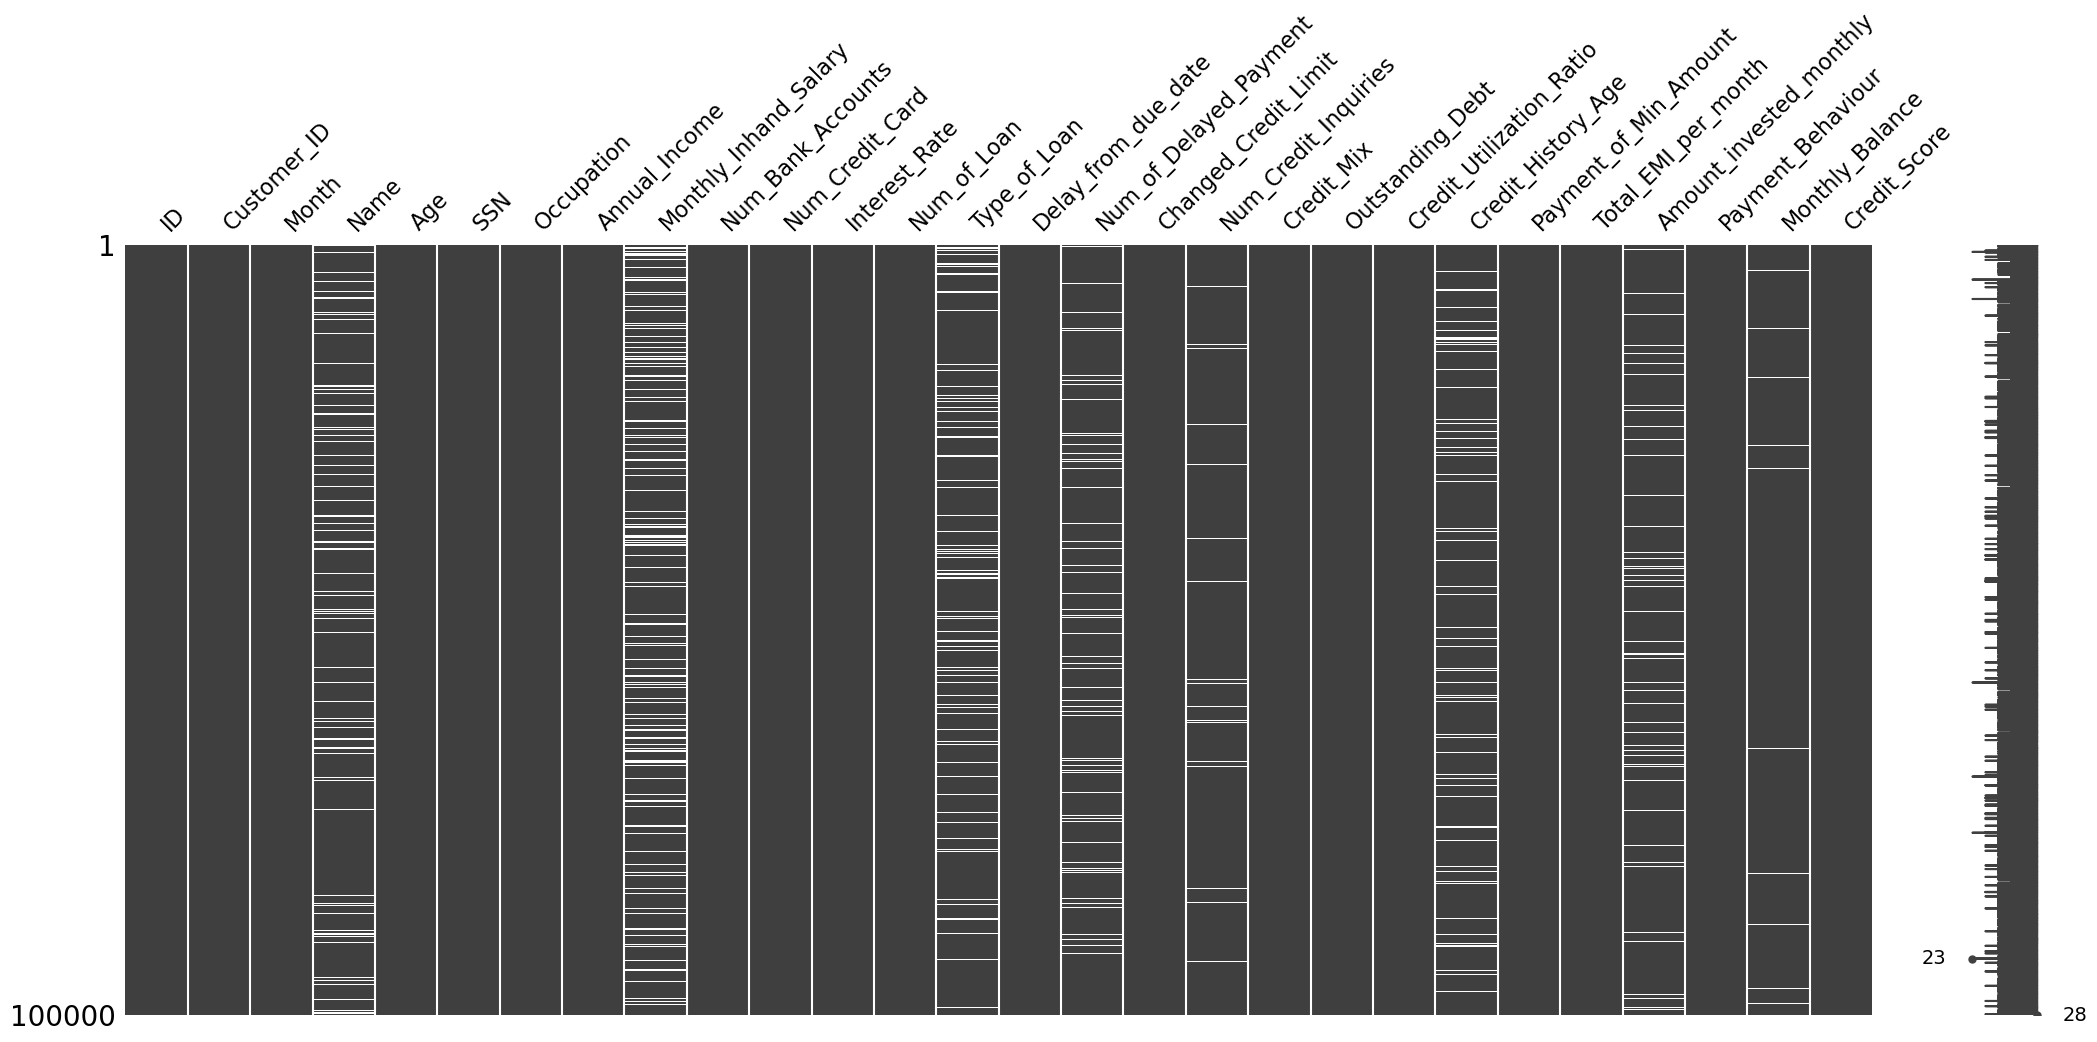

In [6]:
# Visual representation of the missing values in the dataset.
msno.matrix(df_train)

In [7]:
# The percentage of the missing values by column.
(df_train.isnull().mean() * 100).sort_values()

ID                           0.000
Payment_Behaviour            0.000
Total_EMI_per_month          0.000
Payment_of_Min_Amount        0.000
Credit_Utilization_Ratio     0.000
Outstanding_Debt             0.000
Credit_Mix                   0.000
Changed_Credit_Limit         0.000
Delay_from_due_date          0.000
Num_of_Loan                  0.000
Interest_Rate                0.000
Credit_Score                 0.000
Num_Bank_Accounts            0.000
Annual_Income                0.000
Occupation                   0.000
SSN                          0.000
Age                          0.000
Month                        0.000
Customer_ID                  0.000
Num_Credit_Card              0.000
Monthly_Balance              1.200
Num_Credit_Inquiries         1.965
Amount_invested_monthly      4.479
Num_of_Delayed_Payment       7.002
Credit_History_Age           9.030
Name                         9.985
Type_of_Loan                11.408
Monthly_Inhand_Salary       15.002
dtype: float64

In [8]:
# Checking for duplicate entries in the dataframe.
df_train.duplicated().sum()

0

## Exploratory Data Analysis

In [9]:
def density_box_plotter(df):
      '''
      The function plots a density and boxplot for each numeric data column in the given dataframe side by side.
      It also displays the skeness and kurtosis for each density plot.

      Args:
            df(dataframe): The dataframe to iterate through for the plots.

      Returns:
            A pair of plot displaying the density and boxplot for a given numeric column.
      '''
      for col in df.select_dtypes(include='number').columns:
            plt.figure(figsize=(20,10))
            plt.subplot(121)
            sns.histplot(df[col], kde=True, stat='density', kde_kws=dict(cut=3))
            plt.title('Distribution of ' + col)
            plt.subplot(122)
            sns.boxplot(df[col],
                        medianprops={"color": "red"},
                        flierprops={"marker": "x"})
            plt.title('Boxplot of ' + col)
            plt.suptitle(f'Density and Boxplot of the {col}')
            text = '''
                  Skewness: {0}
                  Kurtosis: {1}
                  '''.format(round(df[col].skew(), 3), round(df[col].kurtosis(),3))
            plt.figtext(0.3, 0.6, text, horizontalalignment='left', verticalalignment='top', fontsize = 15)
            plt.show()

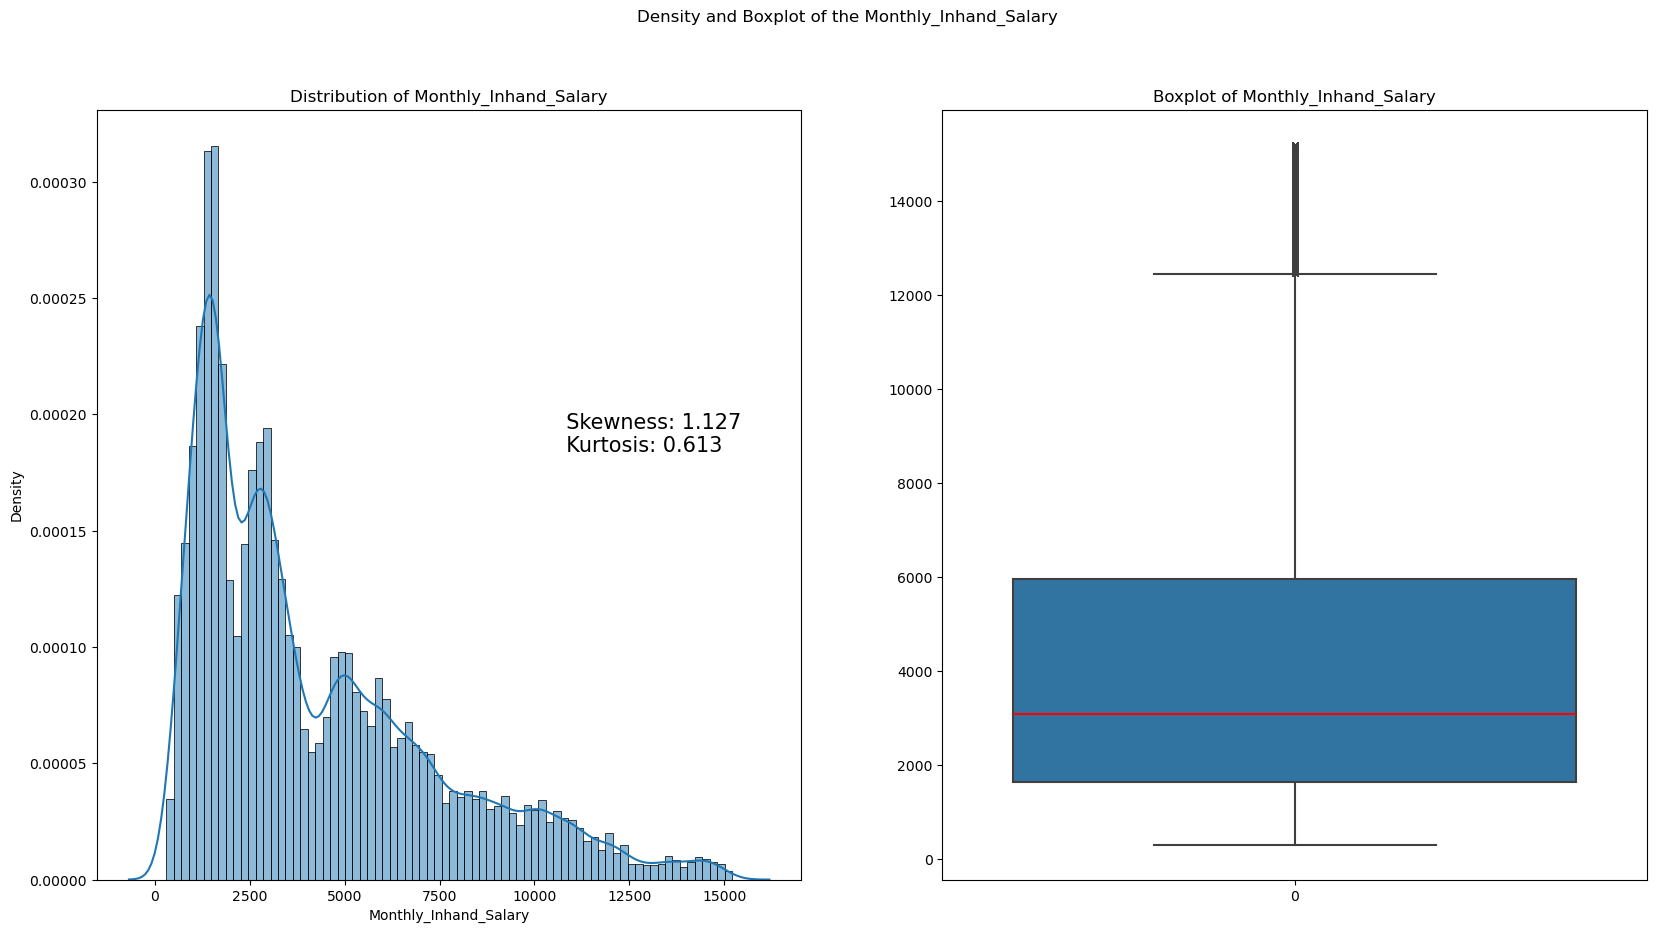

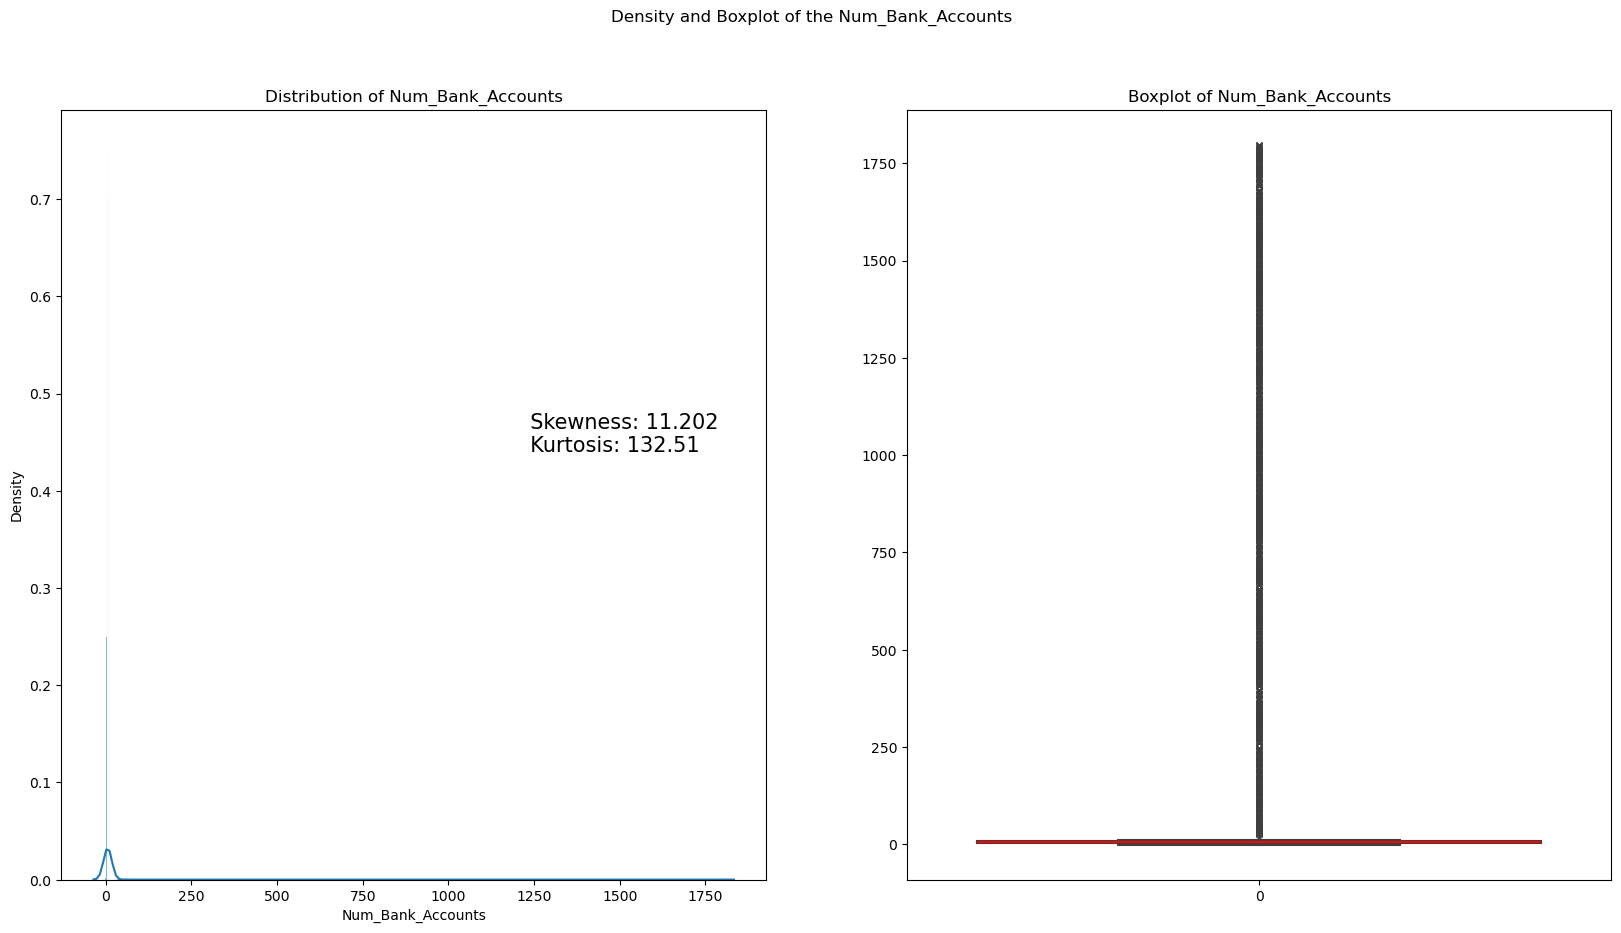

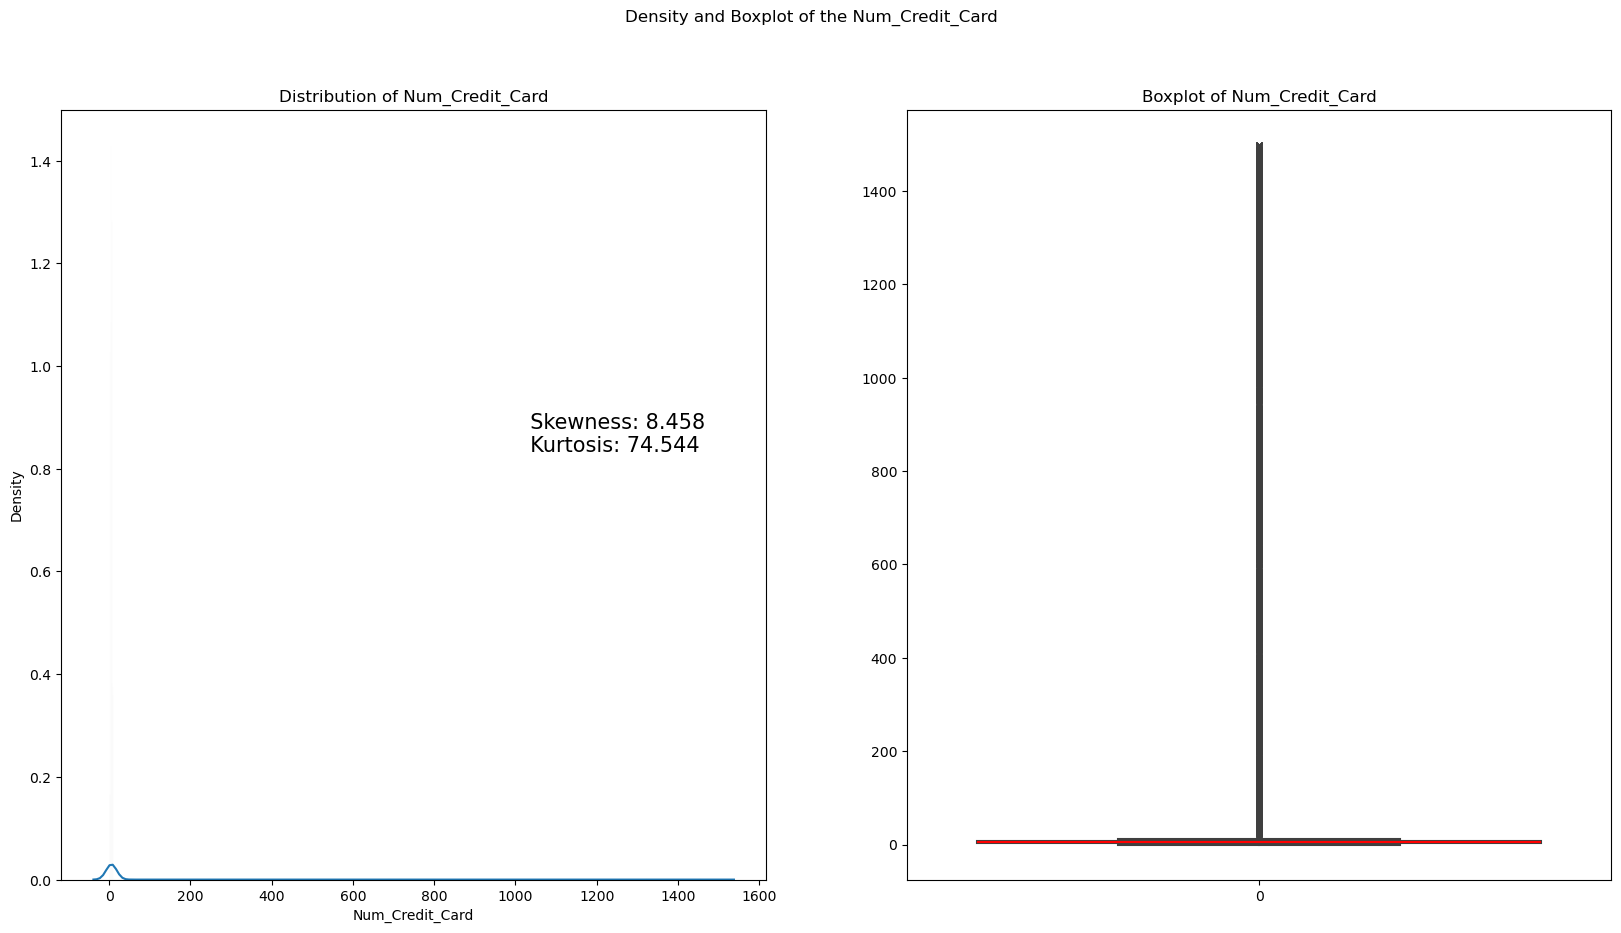

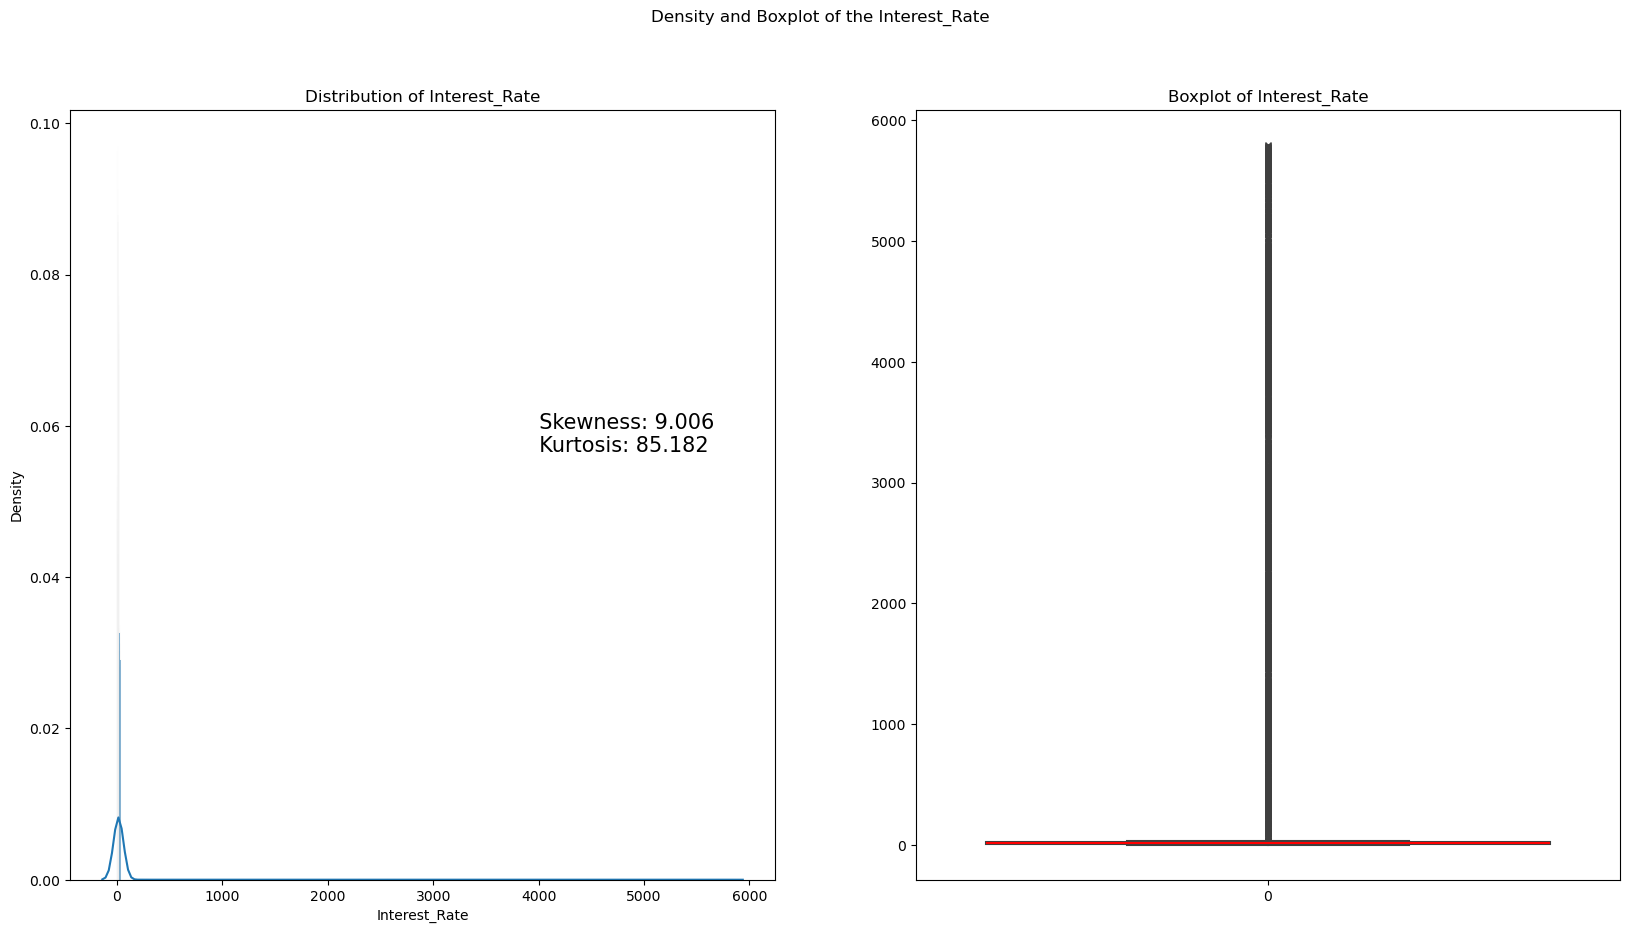

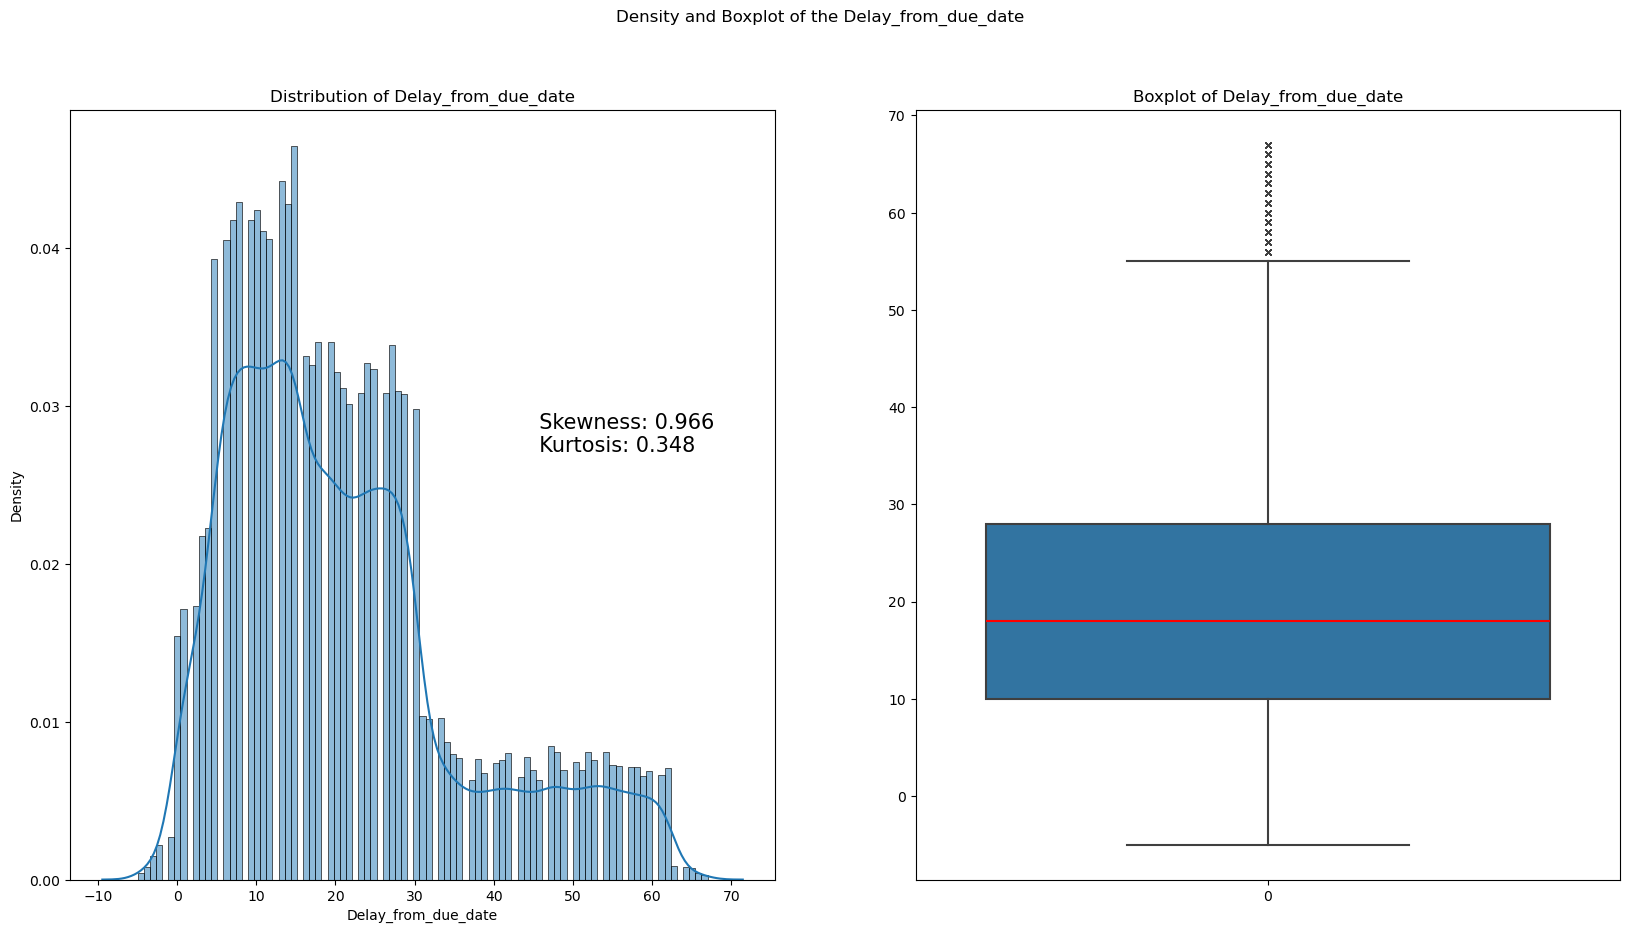

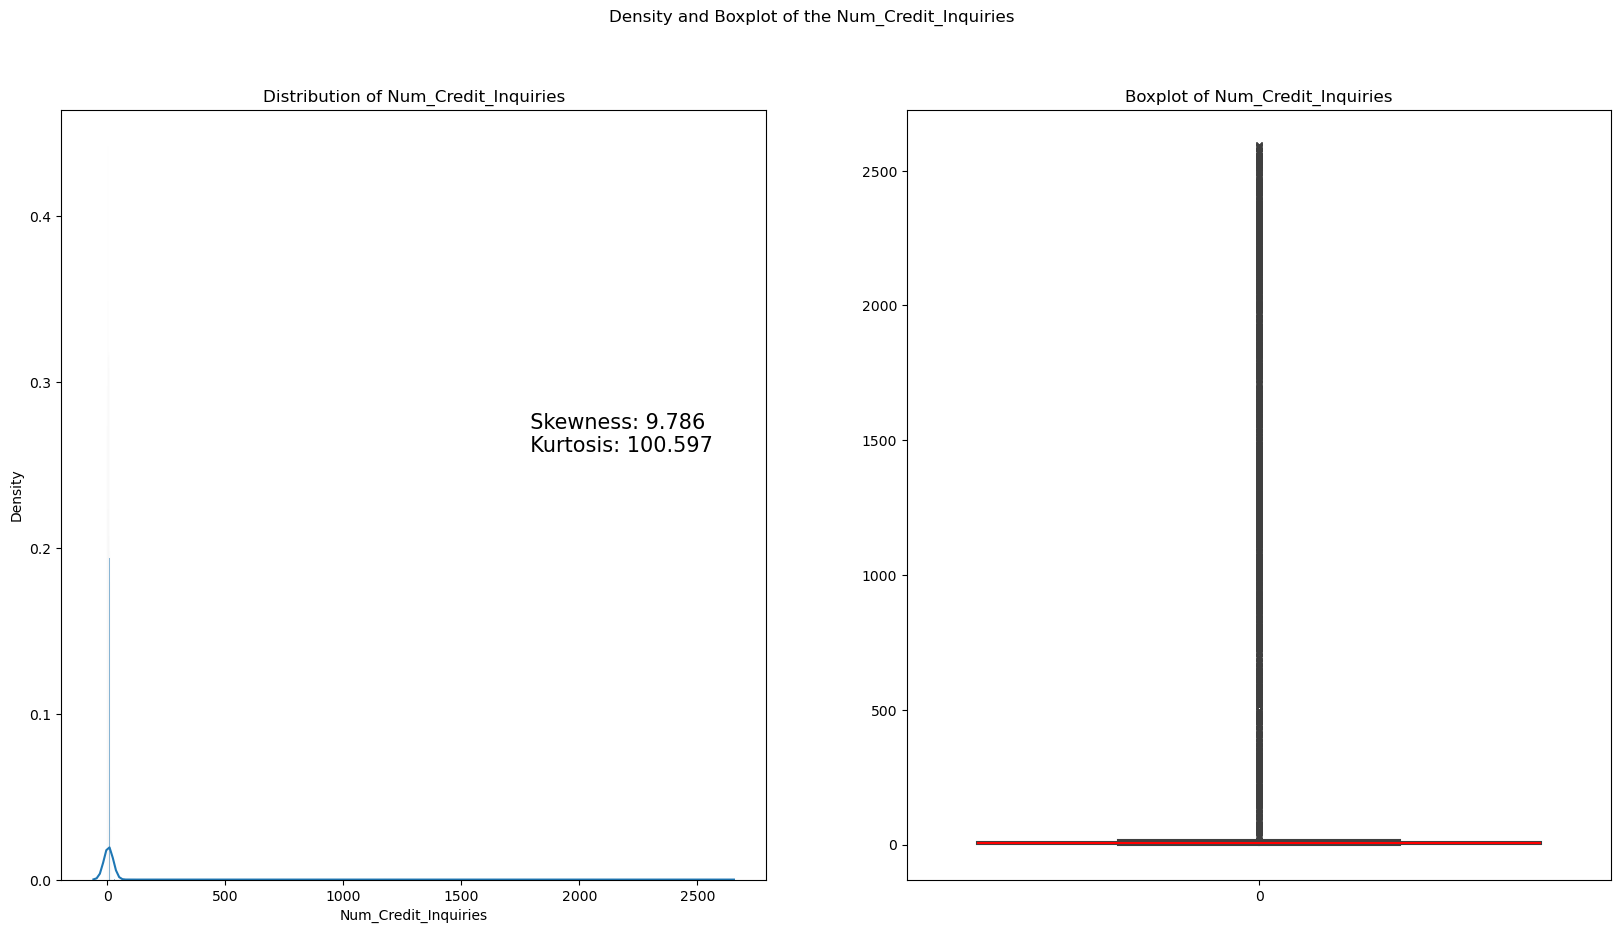

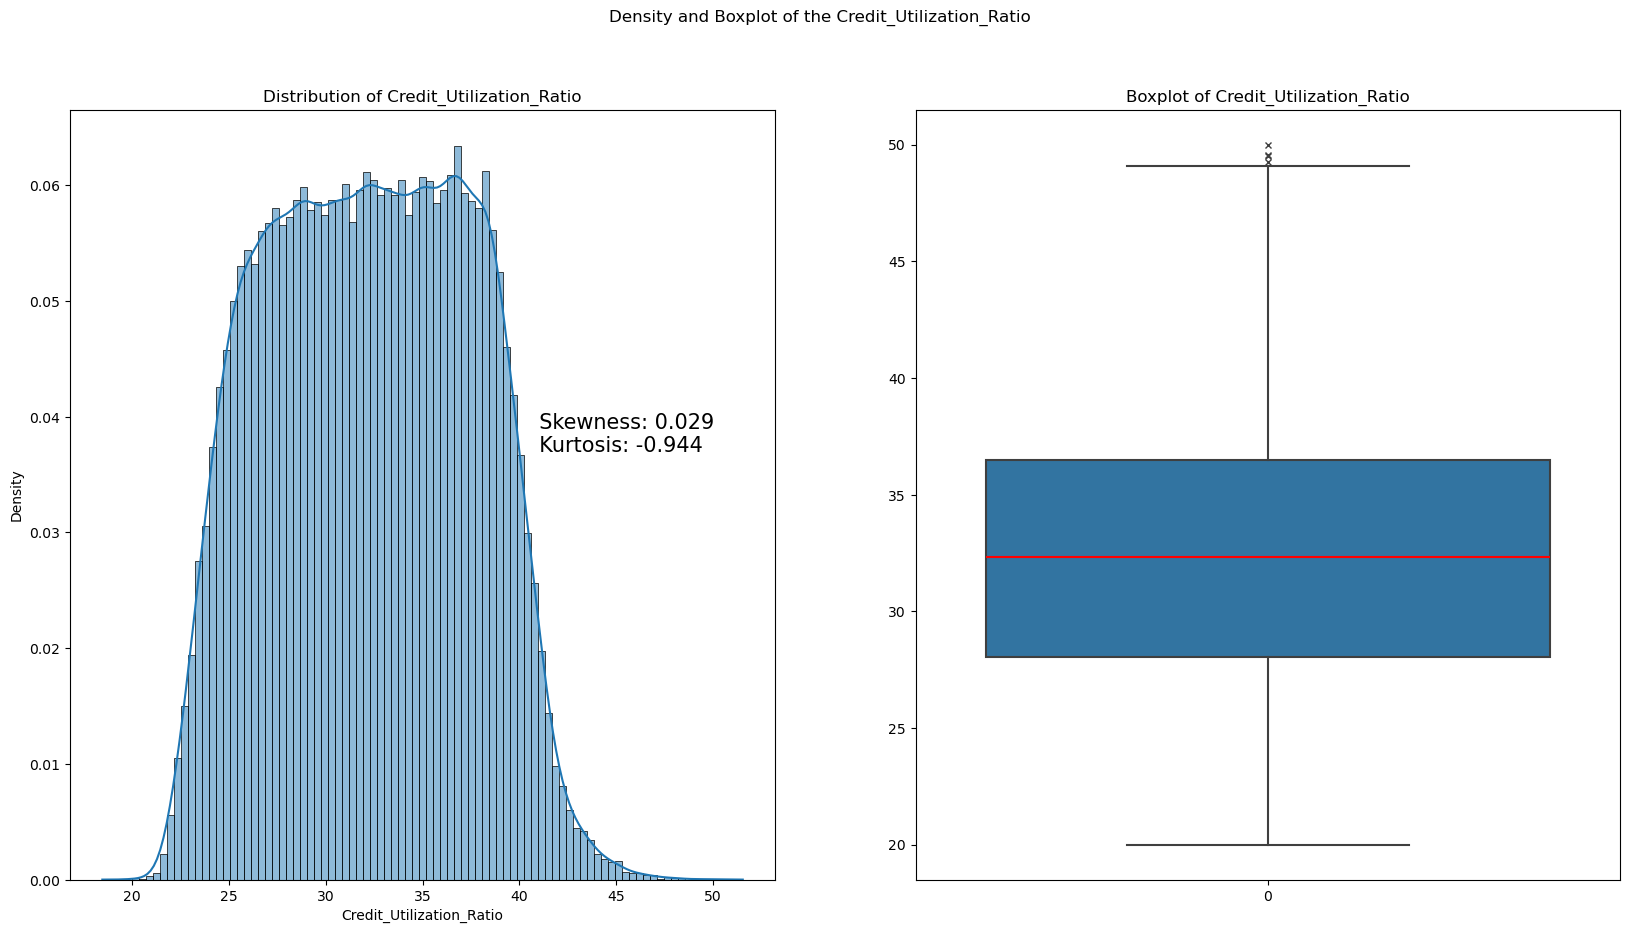

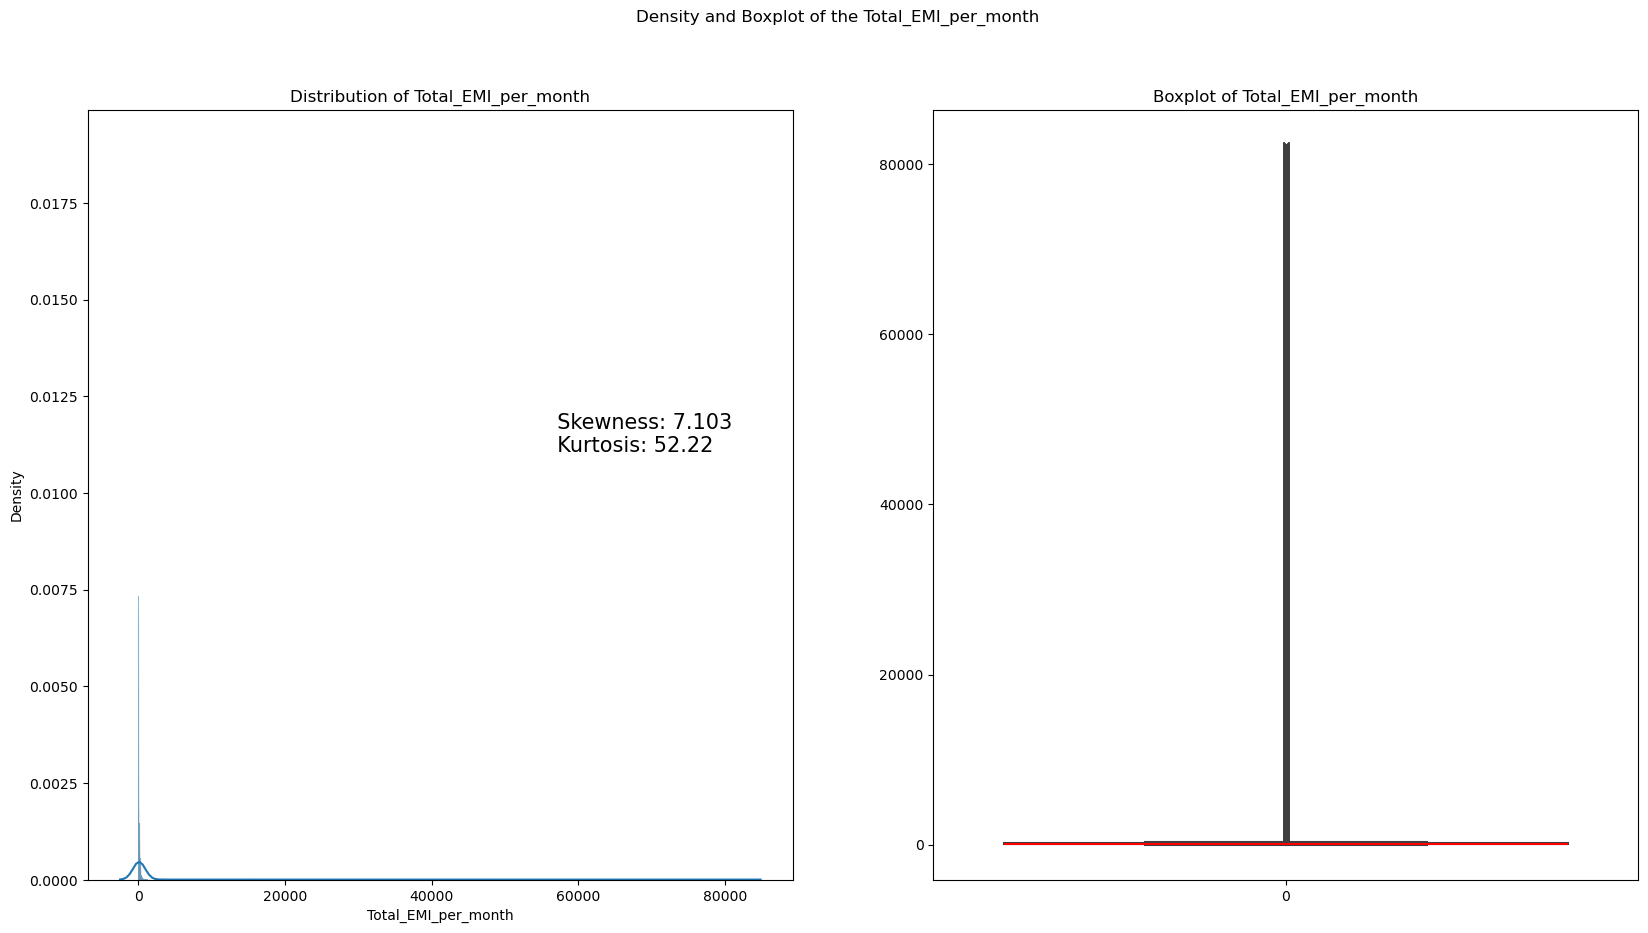

In [10]:
# Function call of the density and boxplot plotter function.
density_box_plotter(df_train)

The numerical features are heavily skewed and there are many outliers.

In [11]:
# The number of times one Occupation is present in the dataframe.
df_train['Occupation'].value_counts()

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

<Axes: title={'center': 'The distribution of Credit Score for all  Occupation'}, xlabel='Occupation', ylabel='The value count of the credit scores for each occupation'>

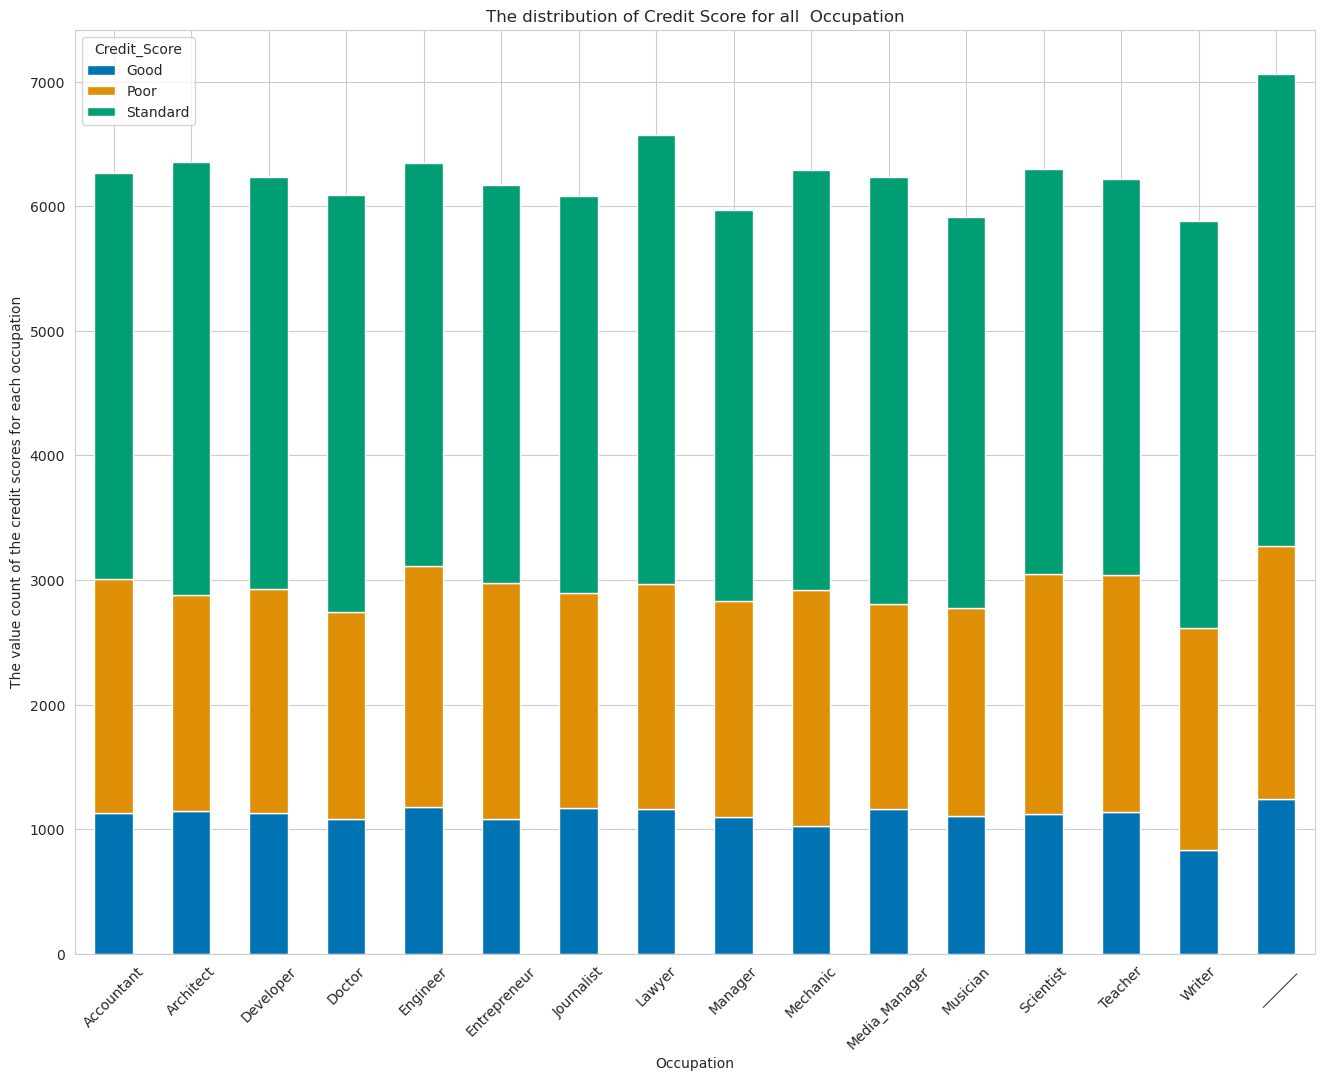

In [12]:
# Setting style and palette for the plots.
sns.set_style('whitegrid')
sns.set_palette('colorblind')

# The distribution of Credit Score outcome among all the Occupations
pd.crosstab(df_train['Occupation'], df_train['Credit_Score']).plot(kind = 'bar',
                                                                   stacked = True,
                                                                   rot=45,
                                                                   title='The distribution of Credit Score for all  Occupation',
                                                                   ylabel='The value count of the credit scores for each occupation')

The credit score distribution amond the occupation seems nearly balanced. However there is one non existing occupation that need to be handled when cleaning the data.

In [13]:
# The number of records for each month.
df_train['Month'].value_counts()

Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64

The records are from January to August with an even number of observations in each month. It means that there are 12500 customers and each of them has exactly eight month of records.

In [14]:
# The Payment Behaviour count accross all customers and month.
df_train['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

<Axes: title={'center': 'The distribution of Credit Score in terms of Payment Behaviour'}, xlabel='Payment_Behaviour', ylabel='The value count of the different spending habits'>

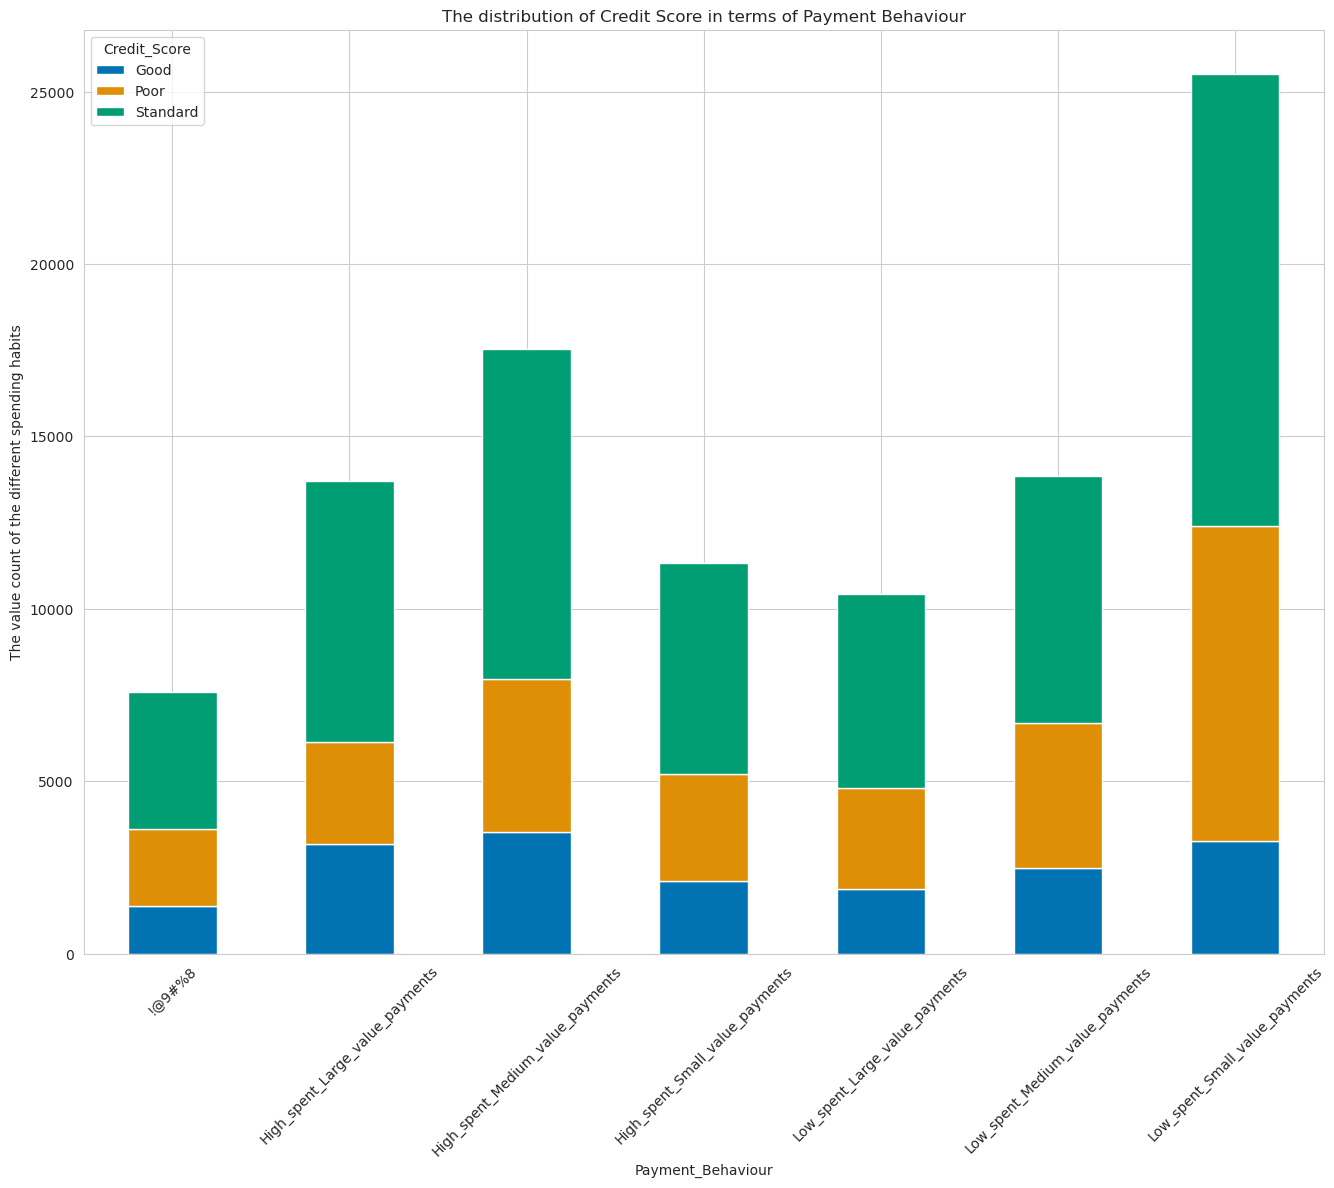

In [15]:
# The Payment Behaviour by Credit Score for all entries in the dataframe.
pd.crosstab(df_train['Payment_Behaviour'], df_train['Credit_Score']).plot(kind = 'bar',
                                                                          stacked = True,
                                                                          rot=45,
                                                                          title='The distribution of Credit Score in terms of Payment Behaviour',
                                                                          ylabel='The value count of the different spending habits')

There are six categories for transaction behavior and one extra impractical that need to be handled.

In [16]:
# Number of times whether the customers paid the minimum amount or less/more.
df_train['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

In [17]:
# Credit Score Mix count
df_train['Credit_Mix'].value_counts()

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

In [18]:
num_loan = df_train['Num_of_Loan'].value_counts()
num_loan.head(n=10)

Num_of_Loan
3       14386
2       14250
4       14016
0       10380
1       10083
6        7405
7        6930
5        6865
-100     3876
9        3542
Name: count, dtype: int64

In [19]:
# The top ten rows of Credit History. 
df_train['Credit_History_Age'].head(n=10)

0    22 Years and 1 Months
1                      NaN
2    22 Years and 3 Months
3    22 Years and 4 Months
4    22 Years and 5 Months
5    22 Years and 6 Months
6    22 Years and 7 Months
7                      NaN
8    26 Years and 7 Months
9    26 Years and 8 Months
Name: Credit_History_Age, dtype: object

In [20]:
# The Credit Score count for each category for all the records.
df_train['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

<Axes: title={'center': 'The distribution of Credit Score in terms of Credit Mix'}, xlabel='Credit_Mix', ylabel='The value count of the different catrgoties'>

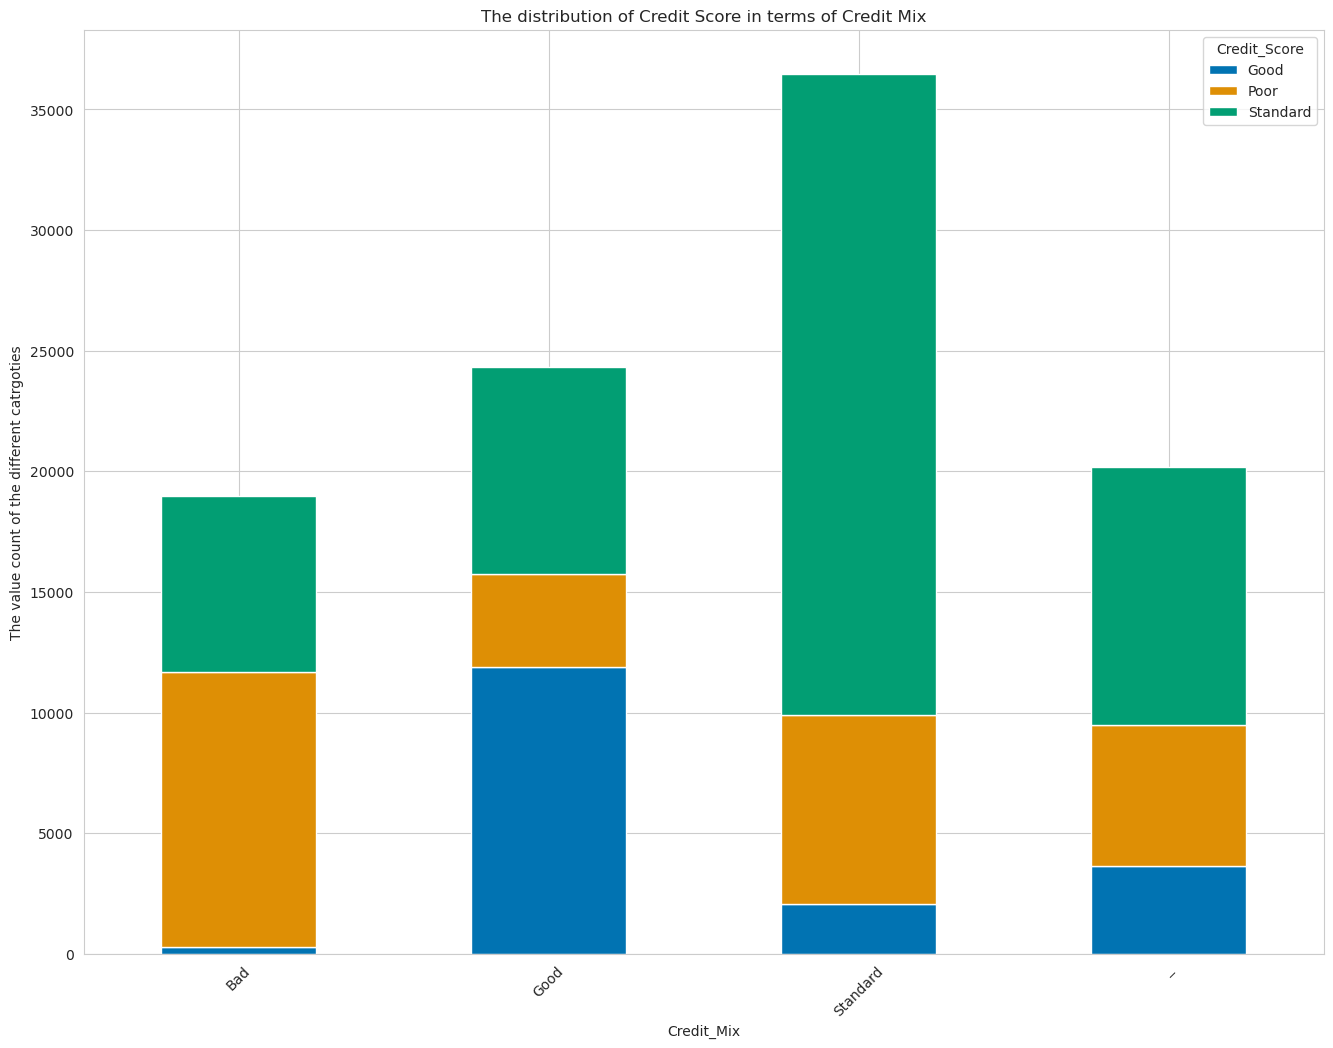

In [21]:
# The distribution of credit score category in terms of credit mix
pd.crosstab(df_train['Credit_Mix'], df_train['Credit_Score']).plot(kind = 'bar',
                                                                   stacked = True,
                                                                   rot=45,
                                                                   title='The distribution of Credit Score in terms of Credit Mix',
                                                                   ylabel='The value count of the different catrgoties')

The credit score is heavily imbalanced. This means that we have to do oversampling to balance the target variable so that is won't cause bias during the modelling process.

There are many issues with the dataset that was explored during the EDA.
- There are columns that not necessary for our analysis hence we can remove them.
- Variables are in the wrong type. Many numerical type present as strings. They need to be cleaned as well.
- Many missing data present that needs to be handled.
- Outliers need to be treated. Also the zeros and negative values where necessary needs correction.
- Categorical data needs to be encoded.
- Data cleanning with the removal of unecessary characters.
- Converting credit history age to be in month and converting.
- Balancing the target variable.
- Transforming data to be Gaussian like.

## Data Cleaning

### Helper functions

Defining the functions to be used during the data cleaning process.

In [22]:
def outlier_treatment(col):
    '''
    Function that calculates the upper, lower limits and interquartile range of a numeric column for outlier treatment.
    If any value is outside the limits, it is replaced with NaN values.

    Args:
        col(DataFrame Series): The column from a dataframe

    Returns:

    '''

    twenty_fifth = df_train[col].quantile(0.25)
    seventy_fifth = df_train[col].quantile(0.75)

    iqr_range = seventy_fifth - twenty_fifth

    upper_limit = round(seventy_fifth + (1.5 * iqr_range))
    lower_limit = twenty_fifth - (1.5 * iqr_range)
    lower_limit = (0 if lower_limit < 0 else lower_limit)

    df_train.loc[df_train[col] > upper_limit, col] = np.NaN
    df_train.loc[df_train[col] < lower_limit, col] = np.NaN

def group_imputer(col):
    '''
    Function that imputes data for a customer where inconsistent data is present

    Args:
        col(DataFrame Series): The column from a dataframe
    '''

    grped_df = df_train.groupby('Customer_ID')[col]
    df_dict = {}
    for id, group in grped_df:
        new_grp = group.fillna(method = 'ffill').fillna(method = 'bfill')
        kv = {id : new_grp}
        df_dict.update(kv)

    for value in df_dict.values():
        val = pd.DataFrame(value)
        for i in val.iterrows():
            id = i[0]
            value = i[1][0]
            df_train.loc[df_train.index == id, col] = value

def group_imputer_mode(col):
    '''
    The function imputes the most frequent value in a given column for a customer.

    Args:
        col(DataFrame Series): The column from a dataframe
    '''
    grp_mode = df_train.groupby('Customer_ID')[col].transform(lambda x: x.mode().iat[0])
    df_train[col] = df_train[col].fillna(grp_mode)

def credit_history_converter_to_integer(value):
    '''
    The function converts the credit history from 'x years and y months' into an integer value.

    Args:
        value(str): The value from the lambda iteration.
    Returns:
        value (int): The converted value, number of months.
        value (np.NaN): Returns the original value (NaN) is there is nothing to convert.
    '''

    if value is not np.NaN:
        year = int(value.split(' ')[0])
        month = int(value.split(' ')[3])

        return ((year*12) + month)
    else:
        return value
    
def credit_history_age_imputer(value):
    '''
    The function imputes the missing values for a customer by interpolating the missing values forward and backward,
    hence rebuilding the customer credit history age.

    Example: values before - 20, 21, Nan, Nan, 24, 25, 26, Nan
             values after - 20, 21, 22, 23, 24, 25, 26, 27

    Args:
        value (pd.Series): pandas series from the grouped values 
    
    Returns:
        pandas Series with the interpolated values.
    '''
    for i in value:
        val = pd.DataFrame(value).interpolate(method = 'linear').interpolate(method = 'linear', limit_direction = 'backward')
        return val

def histogram_plot_by_column(col):
    '''
    The function makes a histplot for a given column.

    Args:
        col(DataFrame Series): The column from a dataframe
    '''
    df_train[col].hist(bins = 30, color = 'darkorange')
    plt.title(f'The histogram of the column {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Number of observations')
    plt.show()

def count_plot_by_column(col):
    '''
    The function makes a countplot for a given column.

    Args:
        col(DataFrame Series): The column from a dataframe
    '''
    sns.countplot(data = df_train, x = col)
    plt.title(f'The countplot of the column {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Number of observations')
    plt.show()

### General cleaning of the dataframe

Removing columns that doesn't necessary for the classification and not going to be used.

Removing underscore and gibberish data that can be imputed accordingly for each customer.

In [23]:
# Dropping unnecessary columns form the dataframe.
df_train.drop(['ID','Name', 'SSN'], inplace = True, axis = 1)

In [24]:
# Replacing in each column the underscores and gibberish with NaN's.
for col in df_train.columns:
    # Replacing values where there is only underscore or random characters.
    df_train[col] = df_train[col].replace(['_','!@9#%8'],np.nan)
    # Stripping underscores from values if there is any in it.
    if df_train[col].dtypes == object:
        df_train[col] = df_train[col].str.strip('_')
df_train.isna().sum().sort_values()

Customer_ID                     0
Total_EMI_per_month             0
Payment_of_Min_Amount           0
Credit_Utilization_Ratio        0
Outstanding_Debt                0
Delay_from_due_date             0
Num_of_Loan                     0
Interest_Rate                   0
Credit_Score                    0
Num_Bank_Accounts               0
Annual_Income                   0
Occupation                      0
Age                             0
Month                           0
Num_Credit_Card                 0
Monthly_Balance              1200
Num_Credit_Inquiries         1965
Changed_Credit_Limit         2091
Amount_invested_monthly      4479
Num_of_Delayed_Payment       7002
Payment_Behaviour            7600
Credit_History_Age           9030
Type_of_Loan                11408
Monthly_Inhand_Salary       15002
Credit_Mix                  20195
dtype: int64

### Credit Mix column cleaning

In [25]:
# Replacing the missing values for the Credit Mix with a new category
df_train['Credit_Mix'] = df_train['Credit_Mix'].replace(np.NaN, 'Unknown')
df_train['Credit_Mix'].value_counts()

Credit_Mix
Standard    36479
Good        24337
Unknown     20195
Bad         18989
Name: count, dtype: int64

The underscores have been replaced with an "Unknown" category.

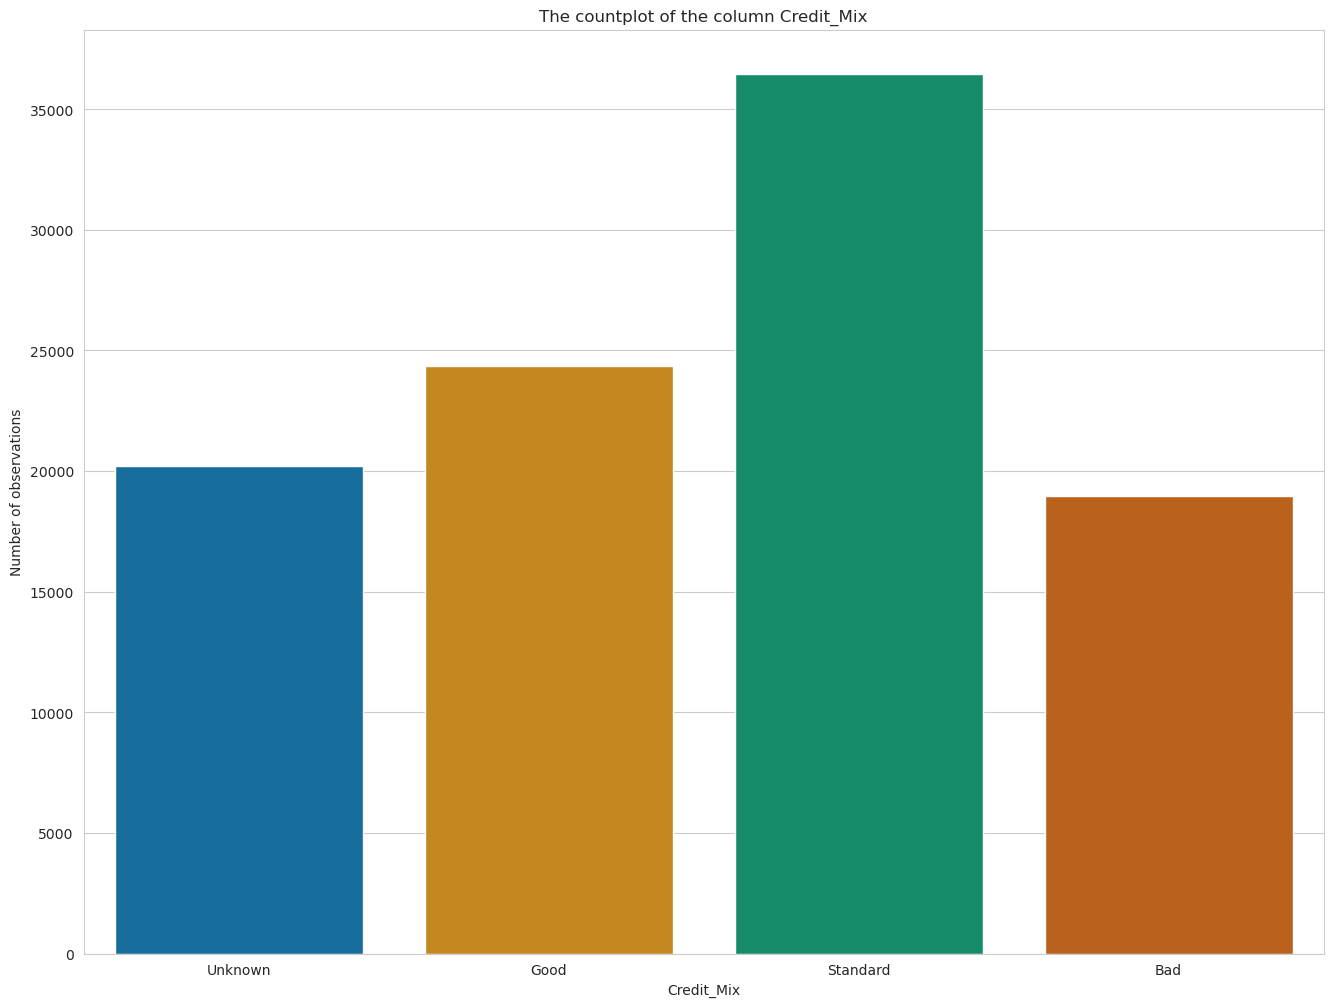

In [26]:
# Function call to display the countplot
count_plot_by_column('Credit_Mix')

### Age column cleaning

We can assume that age values above 100 are outliers and false data.

In [27]:
# Remove anything that is not a digit from the Age column.
df_train['Age'] = df_train['Age'].str.replace(r'\D+','')

# Convert the variable to int
df_train['Age'] = df_train['Age'].astype('float32')

In [28]:
df_train[df_train['Age'] <= 100]['Age'].value_counts()

Age
 38.0     2994
 28.0     2968
 31.0     2955
 26.0     2945
 32.0     2884
 36.0     2868
 35.0     2866
 25.0     2861
 27.0     2859
 39.0     2846
 34.0     2837
 44.0     2824
 19.0     2793
 41.0     2785
 22.0     2785
 20.0     2744
 37.0     2742
 29.0     2735
 43.0     2734
 30.0     2727
 21.0     2716
 24.0     2714
 23.0     2654
 45.0     2642
 40.0     2609
 42.0     2577
 33.0     2543
 18.0     2385
 46.0     1621
 15.0     1574
 17.0     1502
 16.0     1455
 48.0     1385
 49.0     1375
 55.0     1366
 52.0     1356
 53.0     1354
 54.0     1311
 51.0     1291
 50.0     1273
 47.0     1227
 14.0     1175
-500.0     886
 56.0      362
 95.0        3
 99.0        1
 100.0       1
Name: count, dtype: int64

The age normally is between 0 and 100 so everything above is treated as not valuable information.   
We also know that every customer has 8 month of recordings so the ages 95, 99 and 100 seems also outlier, possibly not right so we replace these values also.   
Grouping each customer and imputing it's real age.

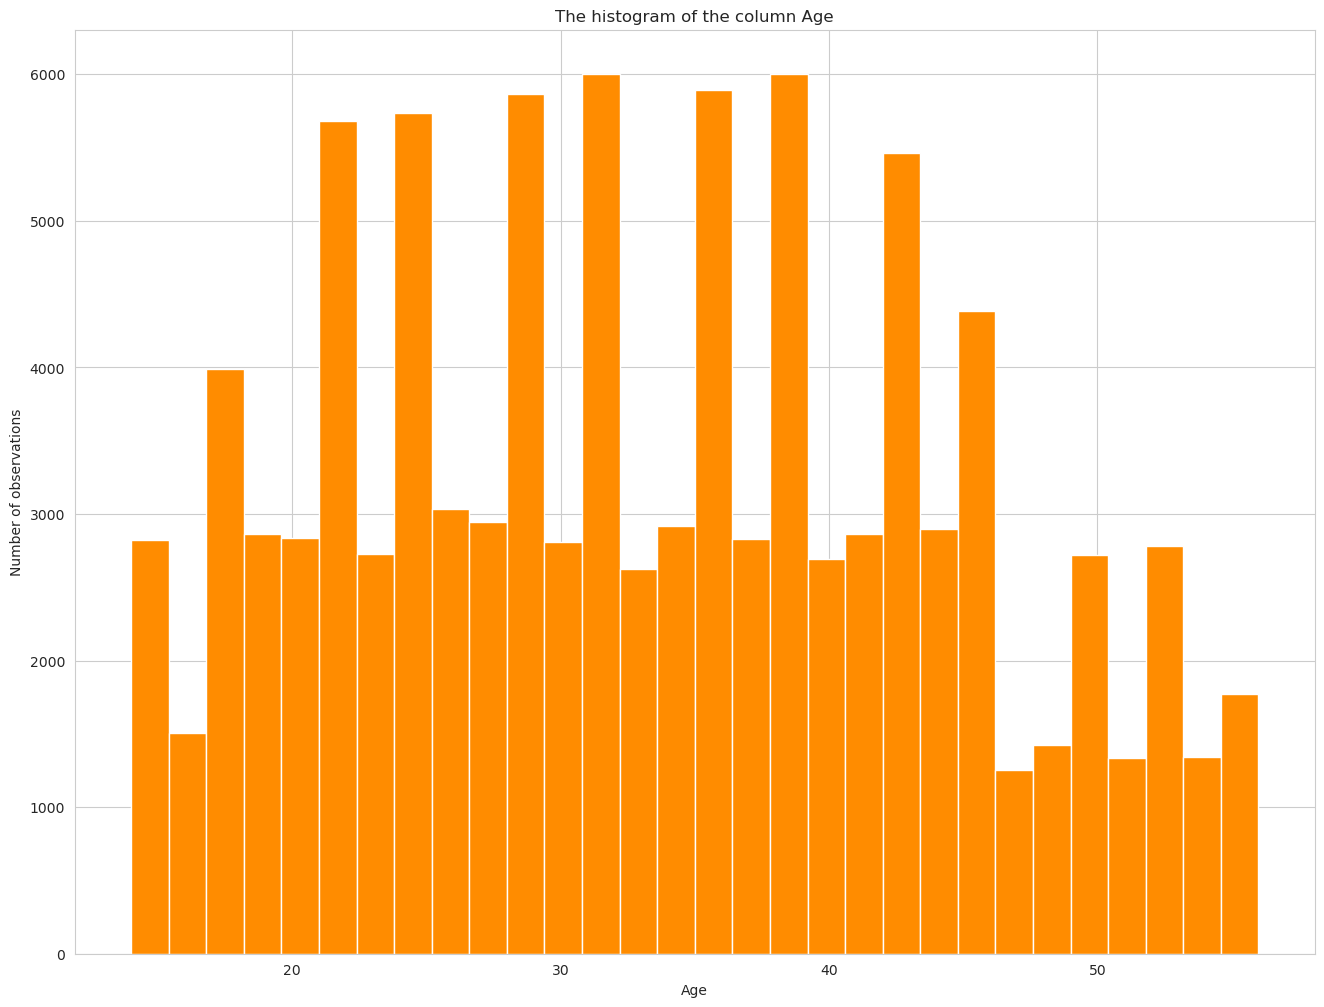

In [29]:
# Subset those rows where we have age more then 80 years and replacing them with NaNs.
df_train.loc[df_train['Age'] >=80, 'Age'] = np.NaN
df_train.loc[df_train['Age'] < 0, 'Age'] = np.NaN

# Groupping the customers and imputing their real age.
group_imputer_mode('Age')
histogram_plot_by_column('Age')

### Occupation column cleaning

Replacing the underscores from the Occupation column and than checking the number of recods for each customer.

In [30]:
df_train['Occupation'] = df_train['Occupation'].replace('', np.nan)
grpd_month = df_train.groupby('Customer_ID')['Month'].count()
grpd_month.value_counts()

Month
8    12500
Name: count, dtype: int64

All of the customers have 8 months of records from January to August. Now subsetting this for only the missing values and grouping them again.    
If there is a customer with 8 month of missing values from the Occupation then we can be sure that it has never given any details before, otherwise we can use the Occupation that has been assigned to that customer once and we don't need to guess.   
We make the assumption that during that 8 months the occupation of the customer hasn't changed.

In [31]:
missing_occupation = df_train[df_train['Occupation'].isna()]
missing_occupation = missing_occupation.groupby('Customer_ID')['Month'].count()
missing_occupation.value_counts()

Month
1    4248
2    1113
3     169
4      19
5       1
Name: count, dtype: int64

It seems that there is no customer with 8 months of missing records hence all the customers have previous data for their Occupation and we don't have to guess.

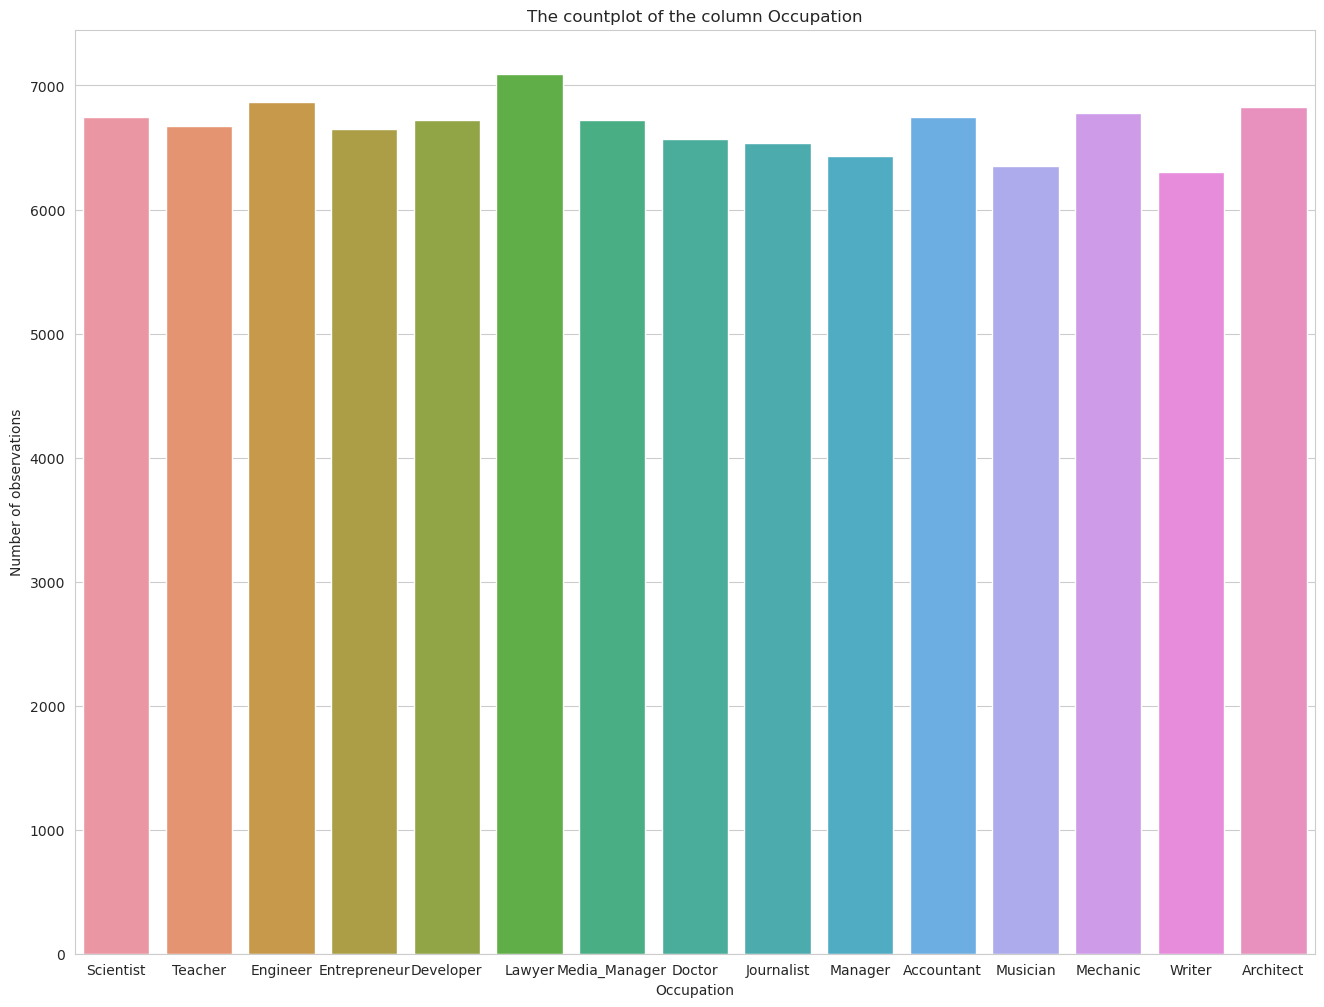

In [32]:
group_imputer_mode('Occupation')
count_plot_by_column('Occupation')

### Annual Income column cleaning

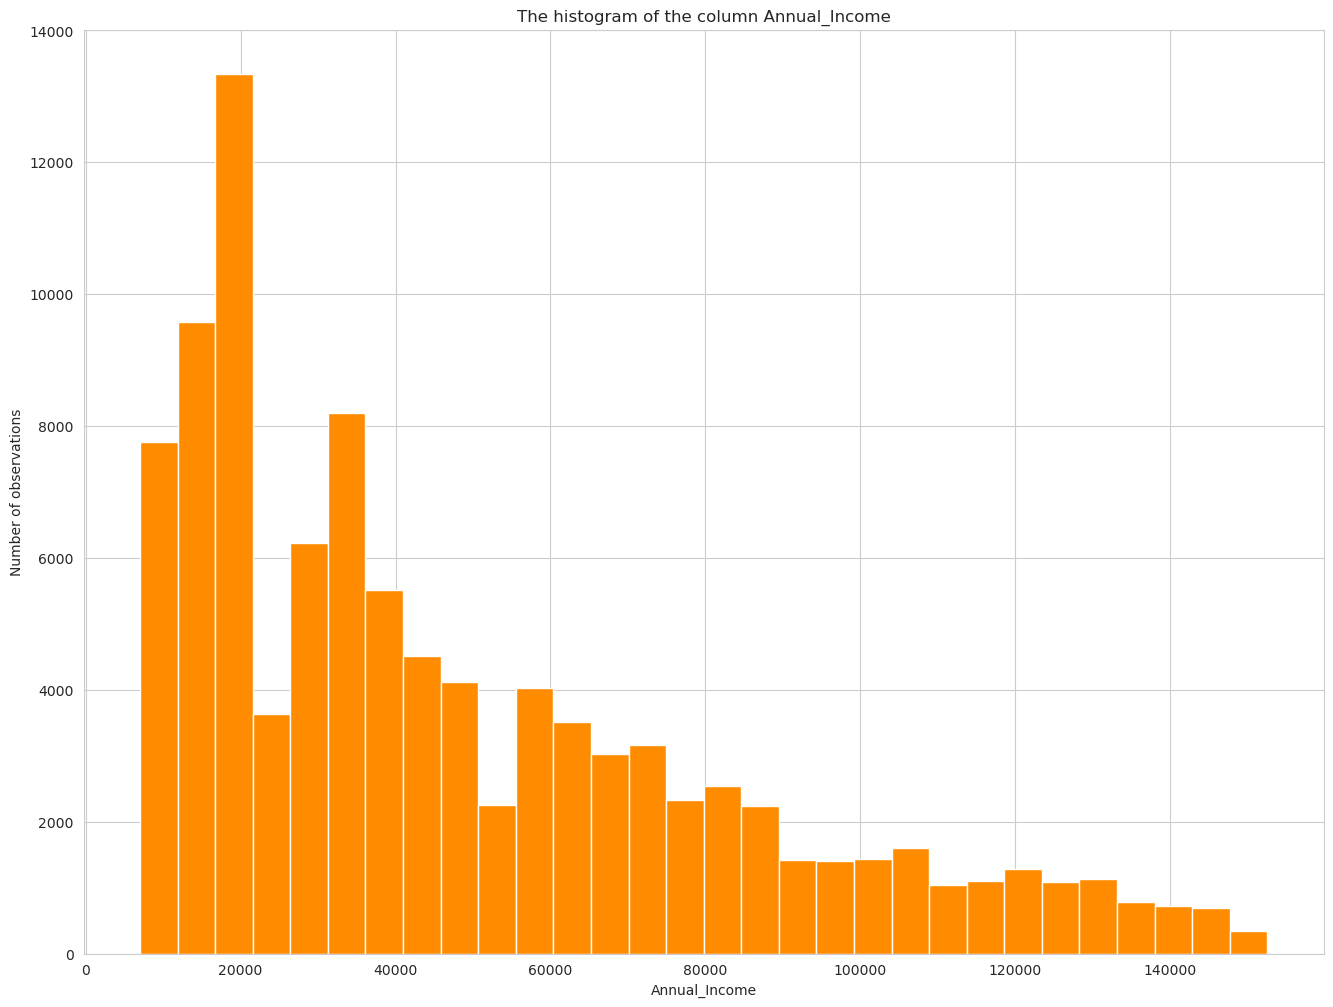

In [33]:
# Convert to float
df_train['Annual_Income'] = df_train['Annual_Income'].astype('float64')

# Remove outliers and impute by customer
outlier_treatment('Annual_Income')
group_imputer('Annual_Income')

# Impute the mean for customers where data has been removed and couldn't impute anything at the first time
df_train_AnnInc = pd.DataFrame(df_train['Annual_Income'])
iter_imputer = IterativeImputer()
df_train_AnnInc = pd.DataFrame(iter_imputer.fit_transform(df_train_AnnInc))
df_train['Annual_Income'] = df_train_AnnInc

histogram_plot_by_column('Annual_Income')

### Monthly Inhand Salary column cleaning

Customers Monthly Inhand Salary salary is consistent and we assume that it hasn't changed during that 8 months period. We simply impute the monthly salary by customer based on their existing one hence avoiding any inconsistency.

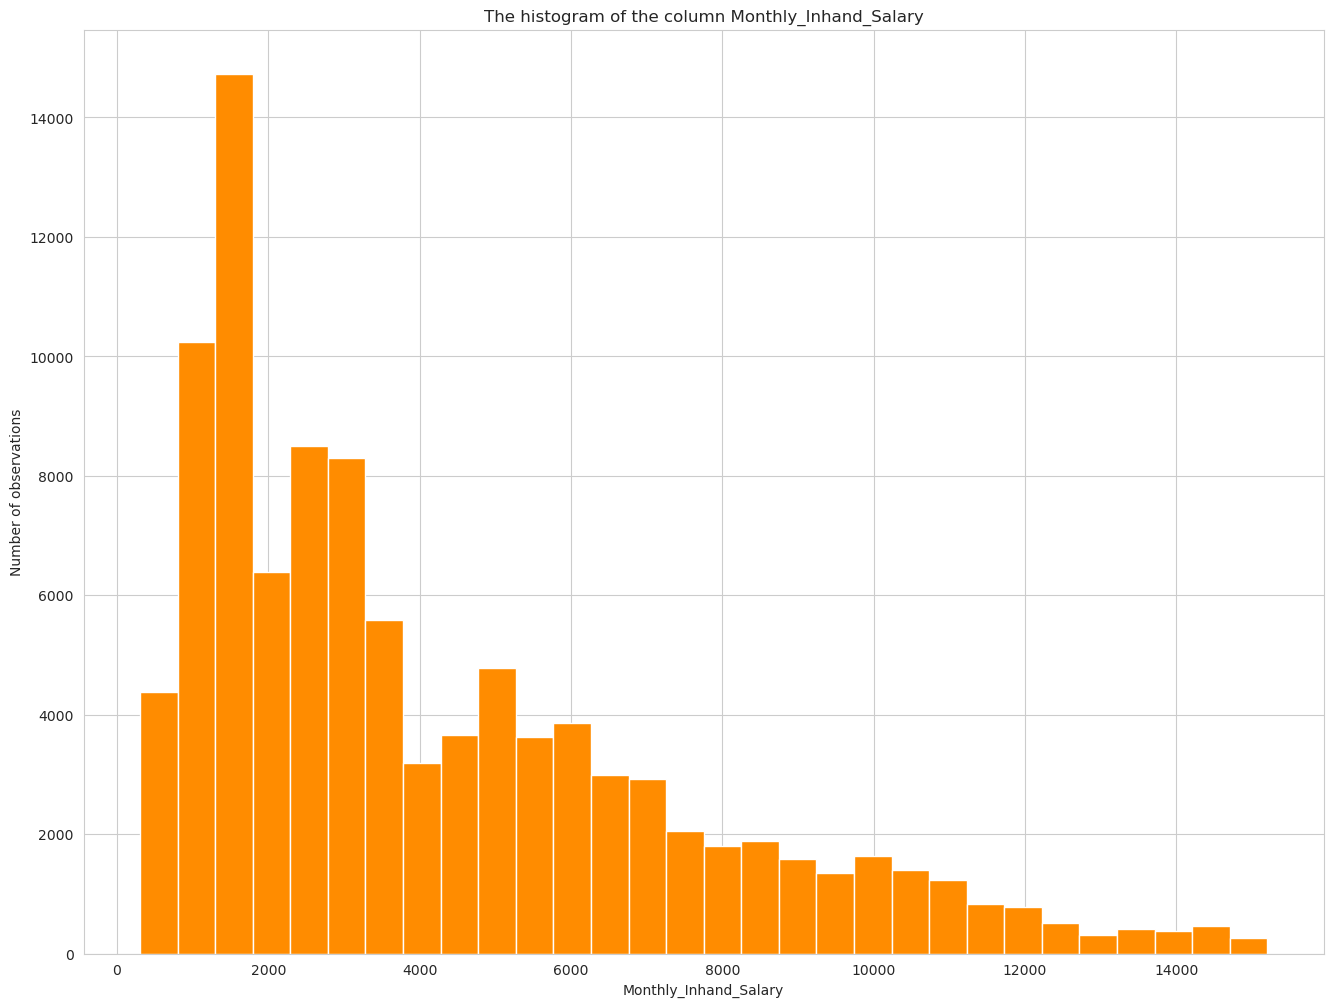

In [34]:
group_imputer_mode('Monthly_Inhand_Salary')

histogram_plot_by_column('Monthly_Inhand_Salary')

### Number of Bank Accounts column cleaning

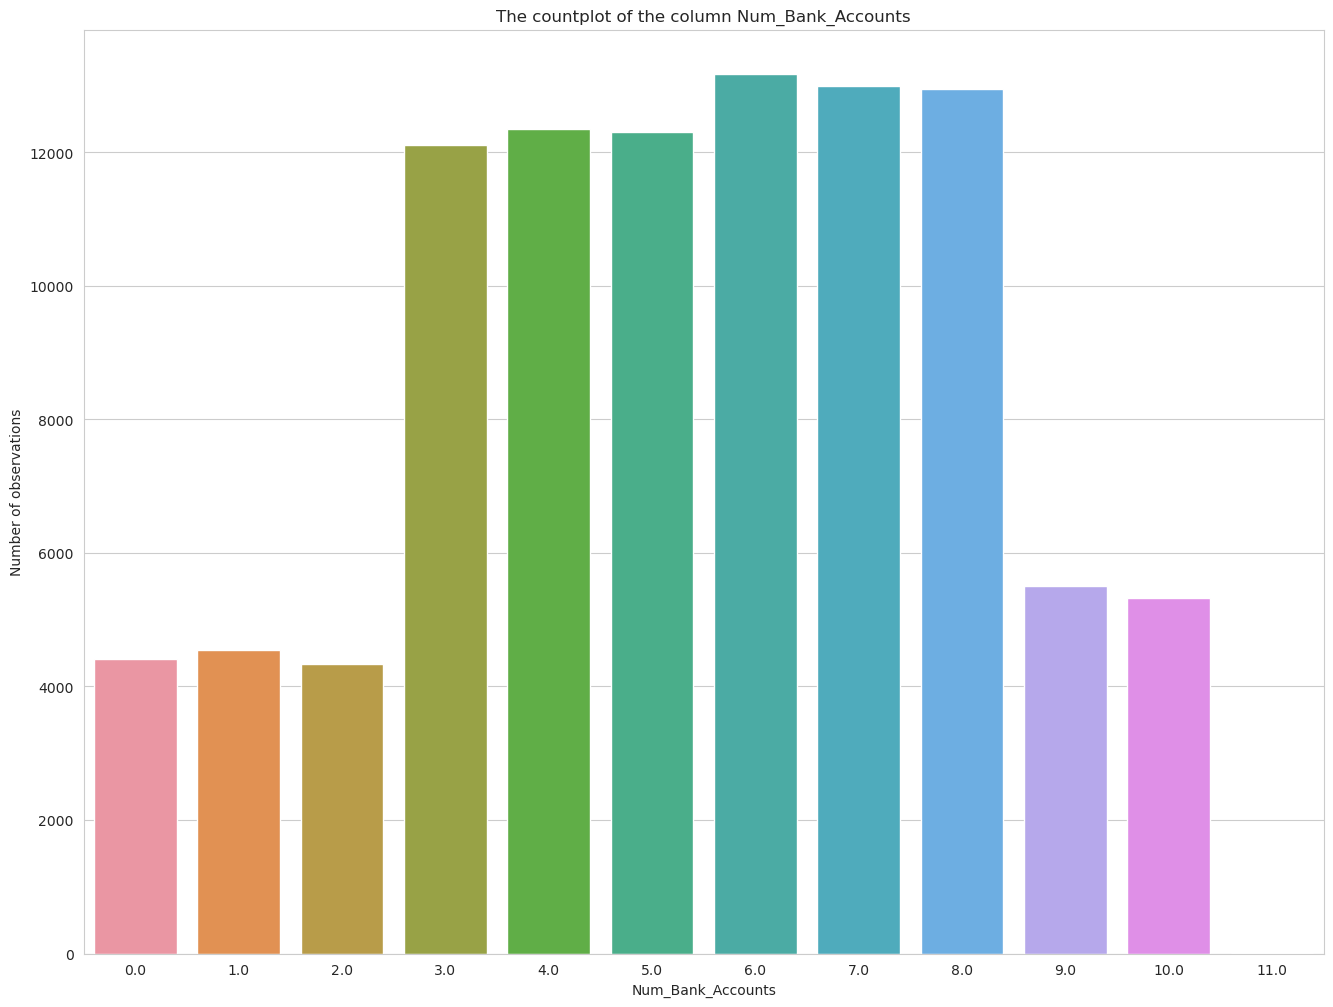

In [35]:
# Removing the outliers and replacing them with NaNs
outlier_treatment('Num_Bank_Accounts')

# Imputing the most frequent number of accounts
group_imputer_mode('Num_Bank_Accounts')

# Countplot
count_plot_by_column('Num_Bank_Accounts')

### Number of Credit Card column cleaning

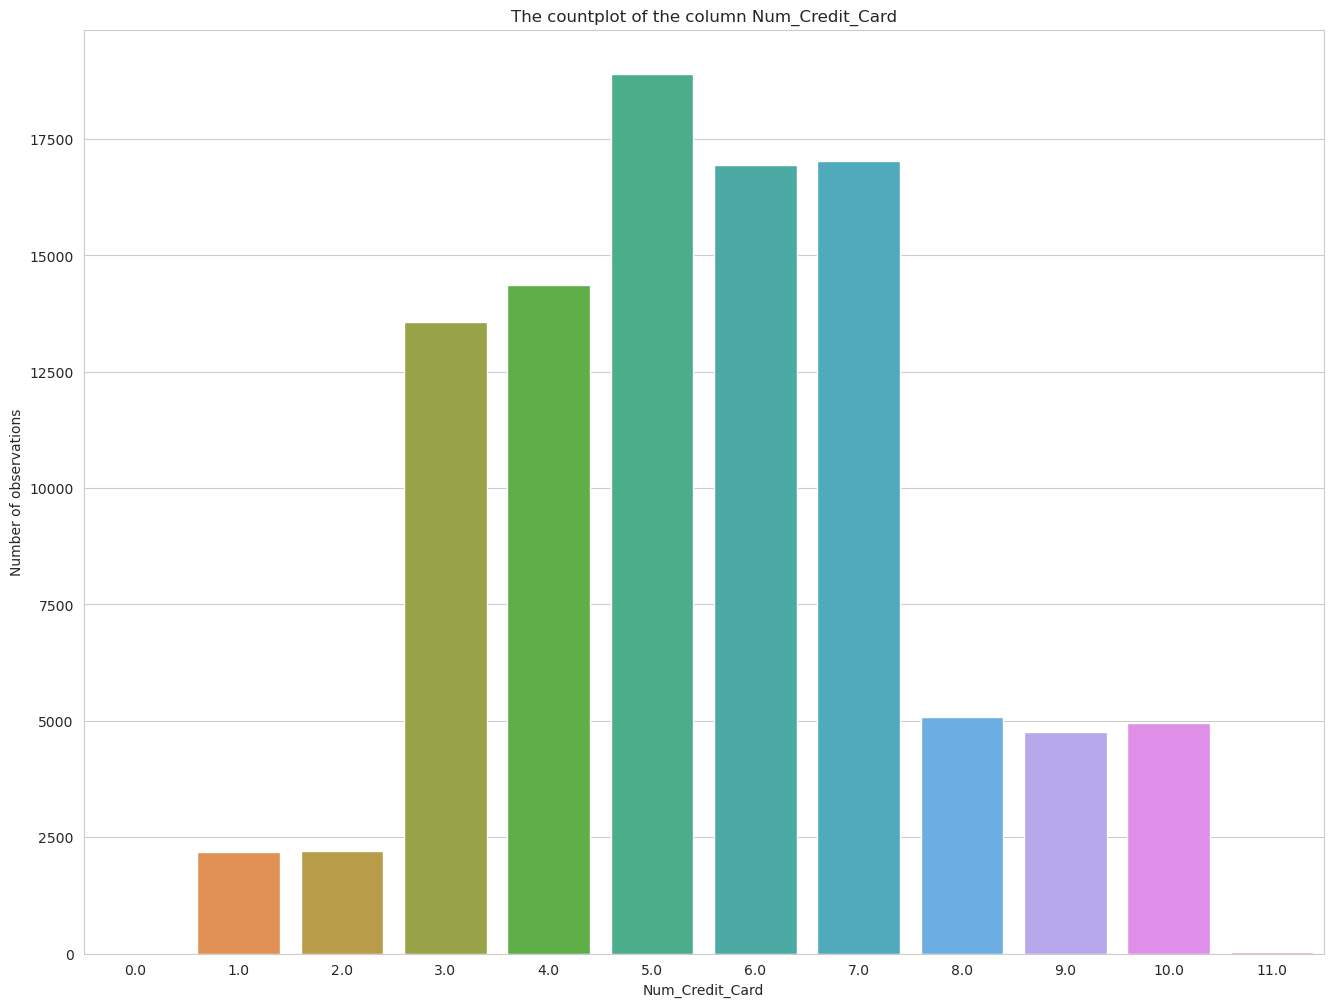

In [36]:
# Removing the outliers and replacing them with NaNs
outlier_treatment('Num_Credit_Card')

# Imputing the most frequent number of accounts
group_imputer_mode('Num_Credit_Card')

# Countplot
count_plot_by_column('Num_Credit_Card')

### Interest Rate column cleaning

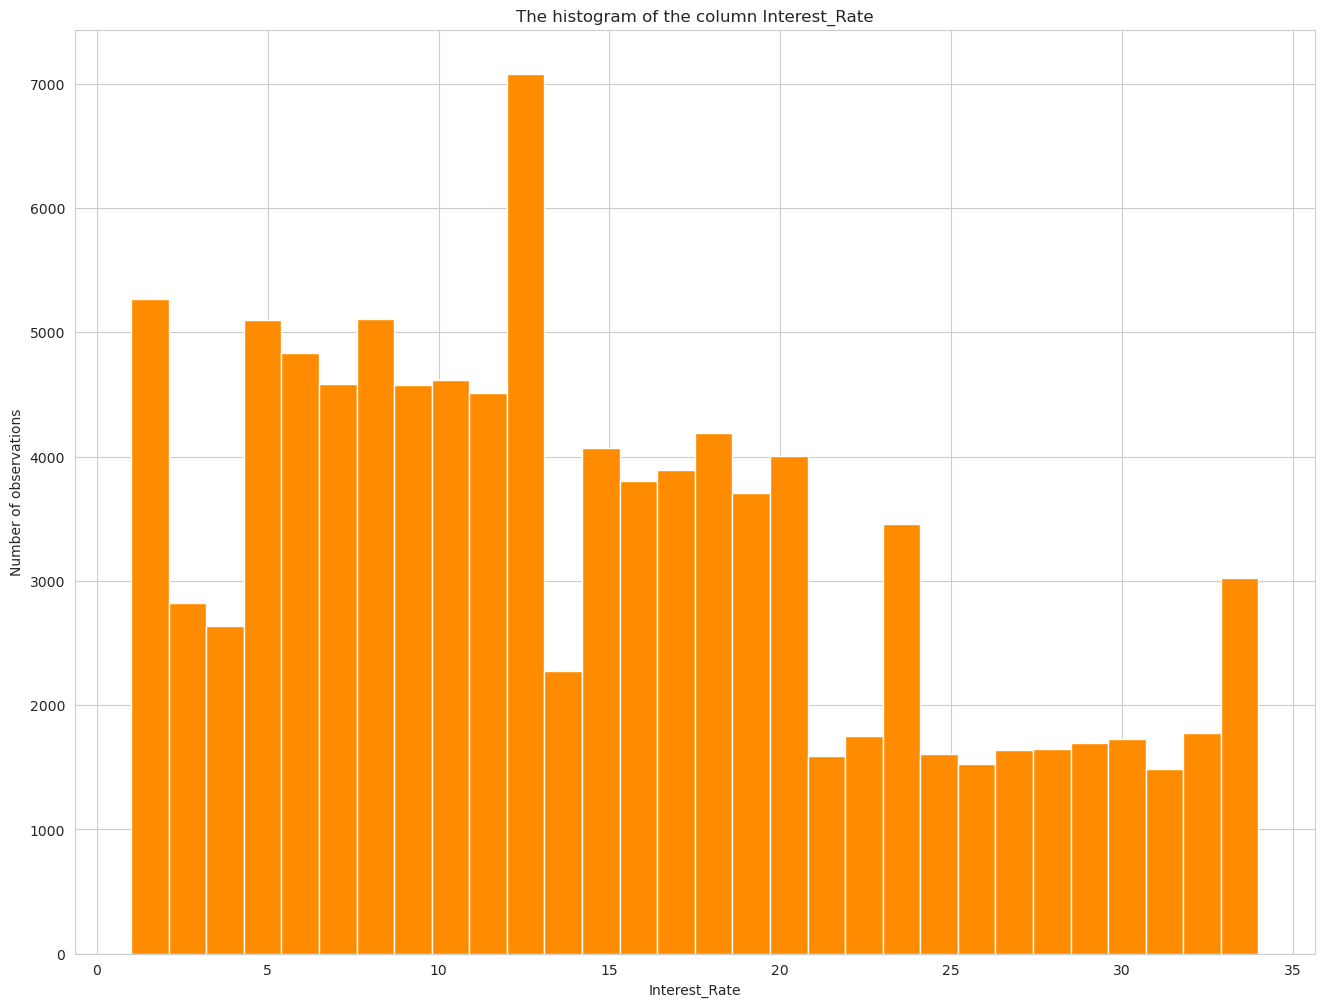

In [37]:
# Removing any outliers
outlier_treatment('Interest_Rate')

# Imputing the interest rate for each customer based on their existing rate.
group_imputer_mode('Interest_Rate')

# Countplot
histogram_plot_by_column('Interest_Rate')


### Number of Loan column cleaning

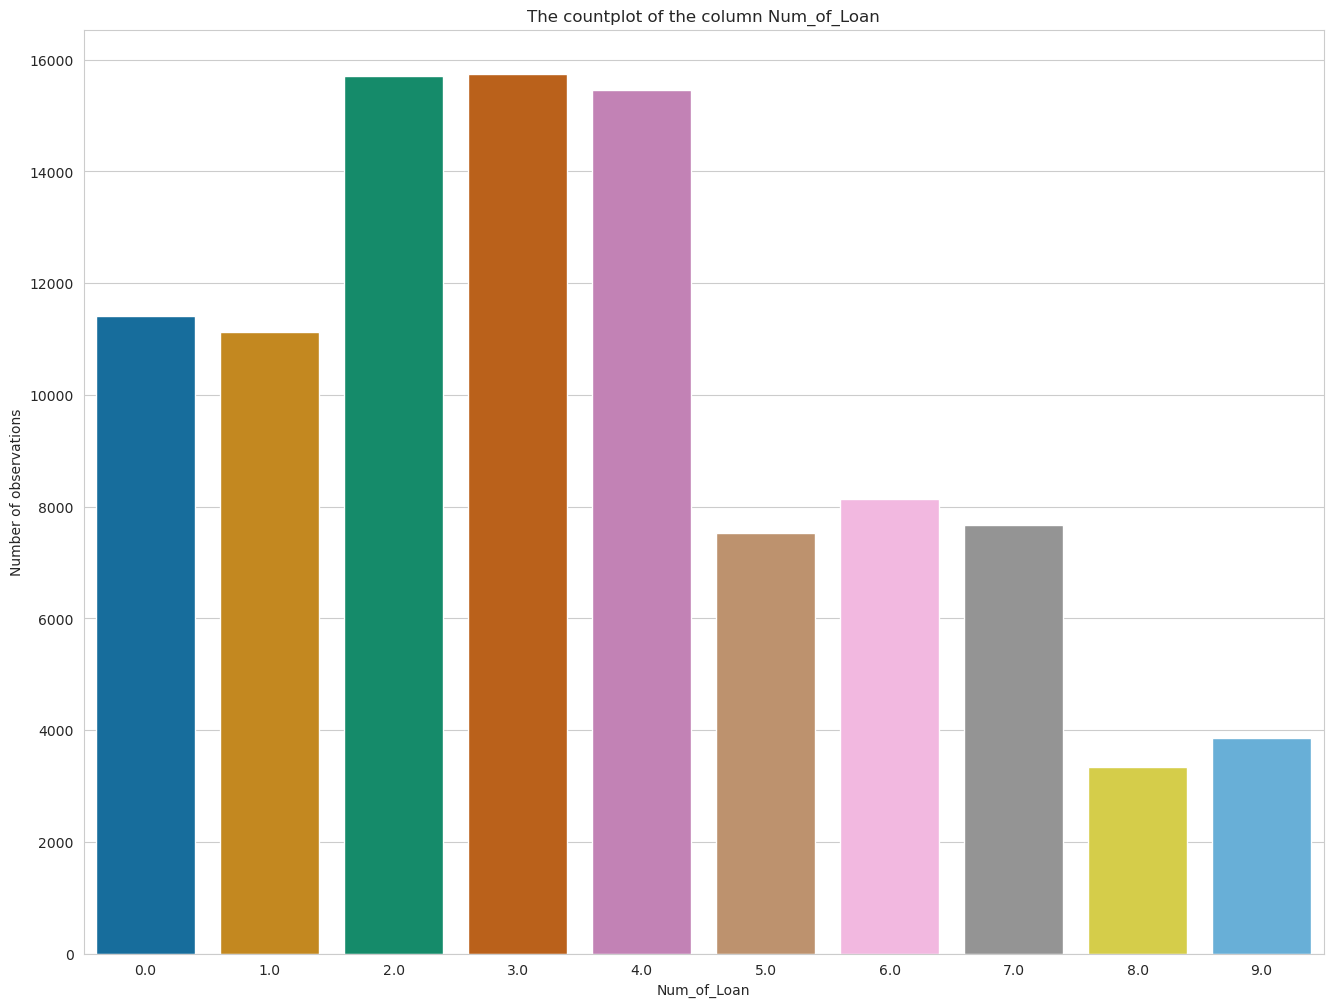

In [38]:
# Convert to float
df_train['Num_of_Loan'] = df_train['Num_of_Loan'].astype('float32')

# Removing outliers
outlier_treatment('Num_of_Loan')

# Imputing the inumber of loan for each customer based on their existing ones.
group_imputer_mode('Num_of_Loan')

# Countplot
count_plot_by_column('Num_of_Loan')

### Type of Loan column cleaning

In [39]:
df_train['Type_of_Loan'] = df_train['Type_of_Loan'].apply(lambda x: x.lower().replace('and ', '').replace(', ', ',').strip() if pd.notna(x) else x)
df_train['Type_of_Loan'].unique()

array(['auto loan,credit-builder loan,personal loan,home equity loan',
       'credit-builder loan', 'auto loan,auto loan,not specified', ...,
       'home equity loan,auto loan,auto loan,auto loan',
       'payday loan,student loan,mortgage loan,not specified',
       'personal loan,auto loan,mortgage loan,student loan,student loan'],
      dtype=object)

In [40]:
df_train_type_loan = pd.DataFrame(df_train['Type_of_Loan'])
simple_imputer = SimpleImputer(strategy = 'most_frequent')
df_train_type_loan = pd.DataFrame(simple_imputer.fit_transform(df_train_type_loan))
df_train['Type_of_Loan'] = df_train_type_loan

### Delay from due date column cleaning

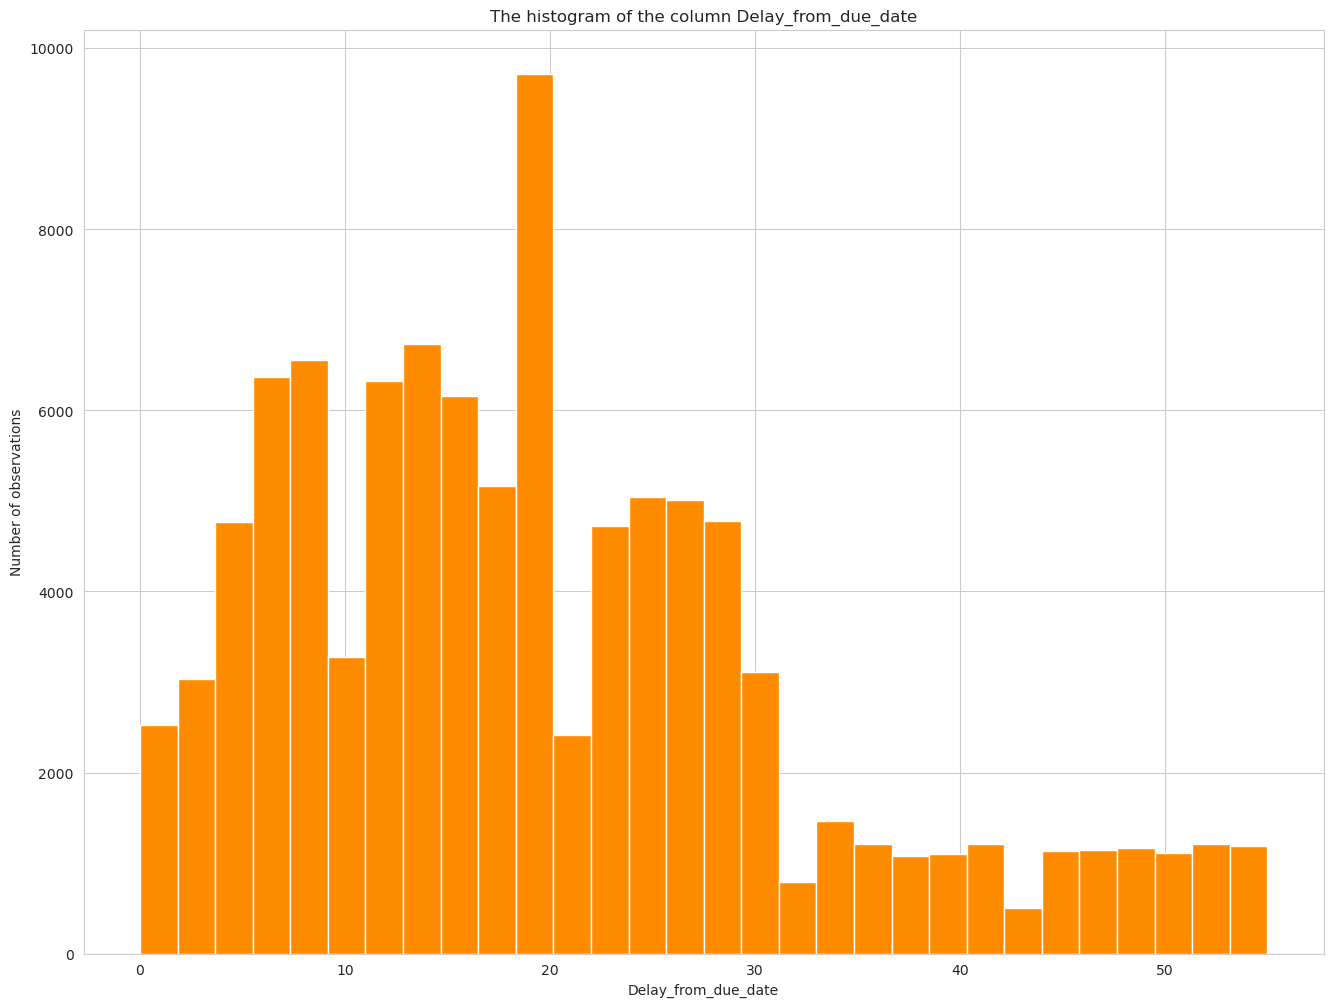

In [41]:
# Remove outliers
outlier_treatment('Delay_from_due_date')

df_train_delay = pd.DataFrame(df_train['Delay_from_due_date'])
simple_imputer = SimpleImputer(strategy = 'mean')
df_train_delay = pd.DataFrame(simple_imputer.fit_transform(df_train_delay))
df_train['Delay_from_due_date'] = df_train_delay

histogram_plot_by_column('Delay_from_due_date')

### Number of delayed payment column payment

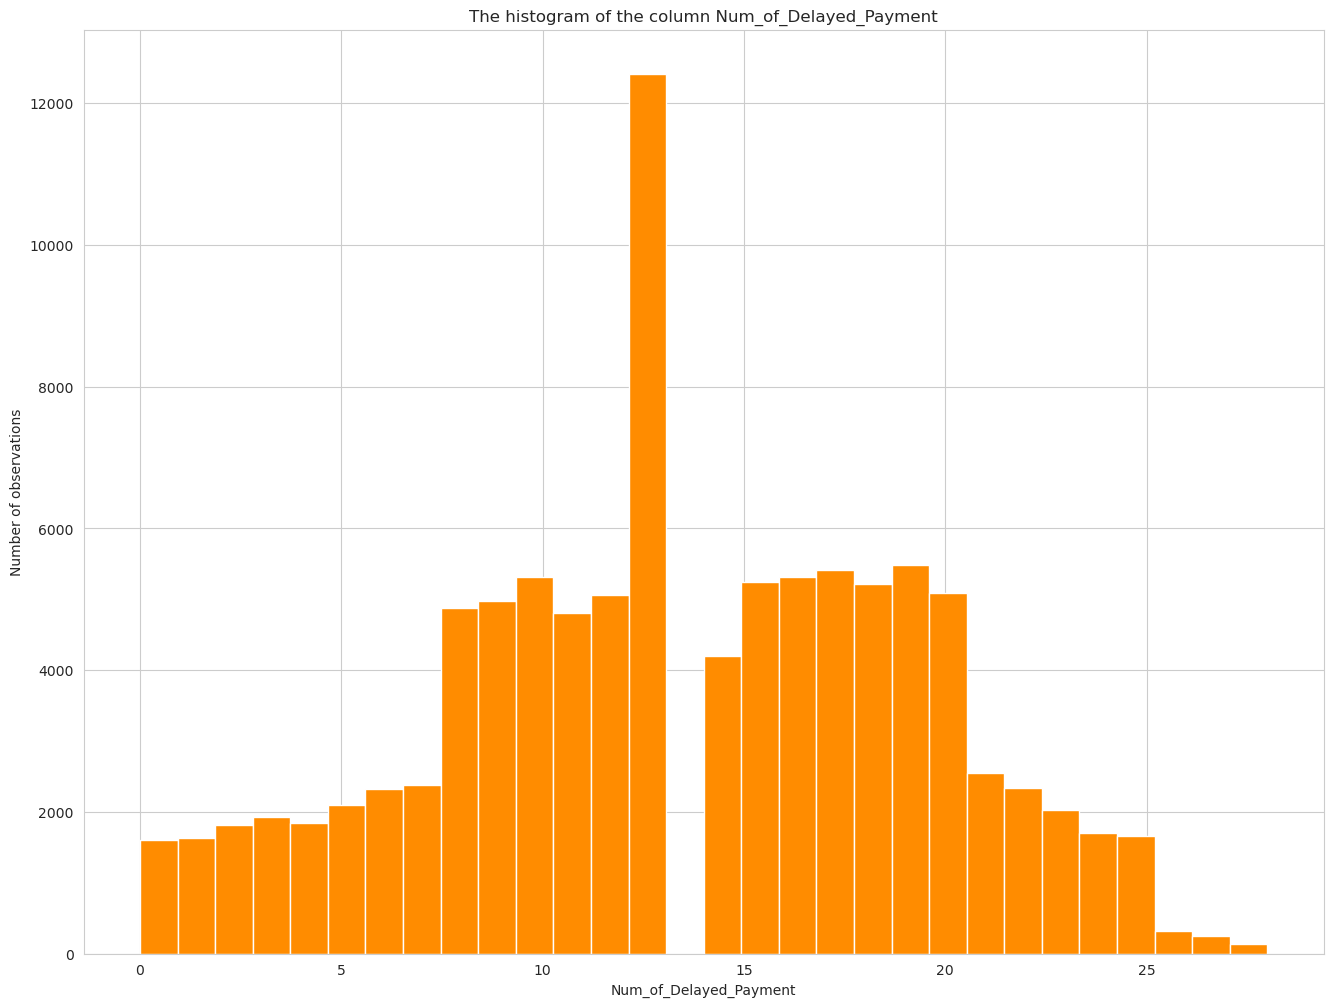

In [42]:
df_train.loc[df_train['Num_of_Delayed_Payment'] == 'NaN', 'Num_of_Delayed_Payment'] = np.NaN
df_train['Num_of_Delayed_Payment'] = df_train['Num_of_Delayed_Payment'].astype('float32')

outlier_treatment('Num_of_Delayed_Payment')

df_train_num_delay = pd.DataFrame(df_train['Num_of_Delayed_Payment'])
simple_imputer = SimpleImputer(strategy = 'mean')
df_train_num_delay = pd.DataFrame(simple_imputer.fit_transform(df_train_num_delay))
df_train['Num_of_Delayed_Payment'] = round(df_train_num_delay)

histogram_plot_by_column('Num_of_Delayed_Payment')

### Changed Credit Limit column cleaning

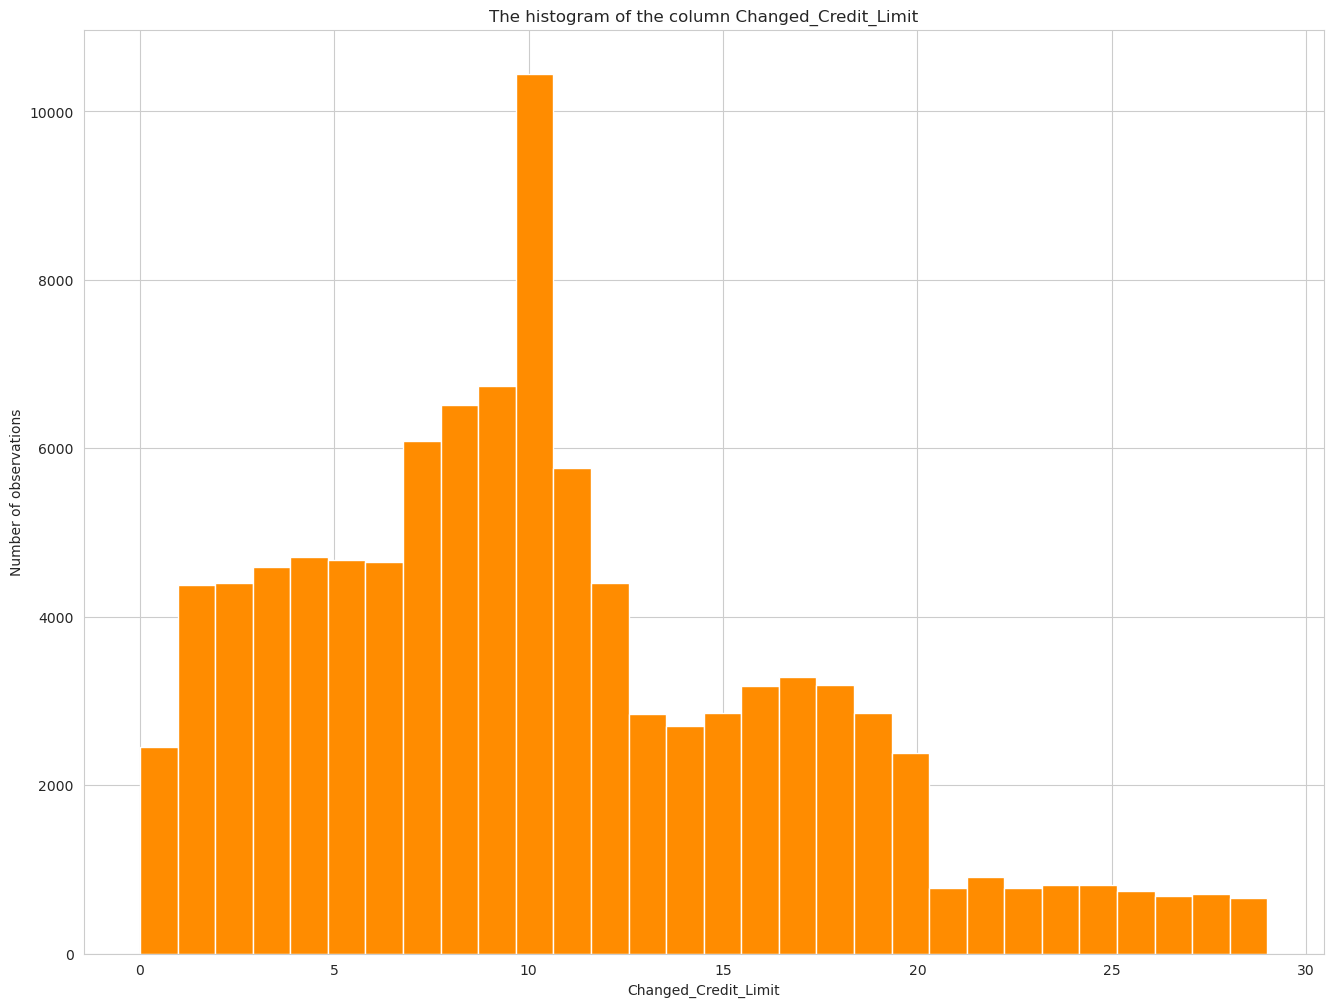

In [43]:
df_train.loc[df_train['Changed_Credit_Limit'] == 'NaN', 'Changed_Credit_Limit'] = np.NaN
df_train['Changed_Credit_Limit'] = df_train['Changed_Credit_Limit'].astype('float32')

outlier_treatment('Changed_Credit_Limit')

df_train_credit_change = pd.DataFrame(df_train['Changed_Credit_Limit'])
simple_imputer = SimpleImputer(strategy = 'mean')
df_train_credit_change = pd.DataFrame(simple_imputer.fit_transform(df_train_credit_change))
df_train['Changed_Credit_Limit'] = df_train_credit_change

histogram_plot_by_column('Changed_Credit_Limit')

### Number of Credit Inquiries column cleaning

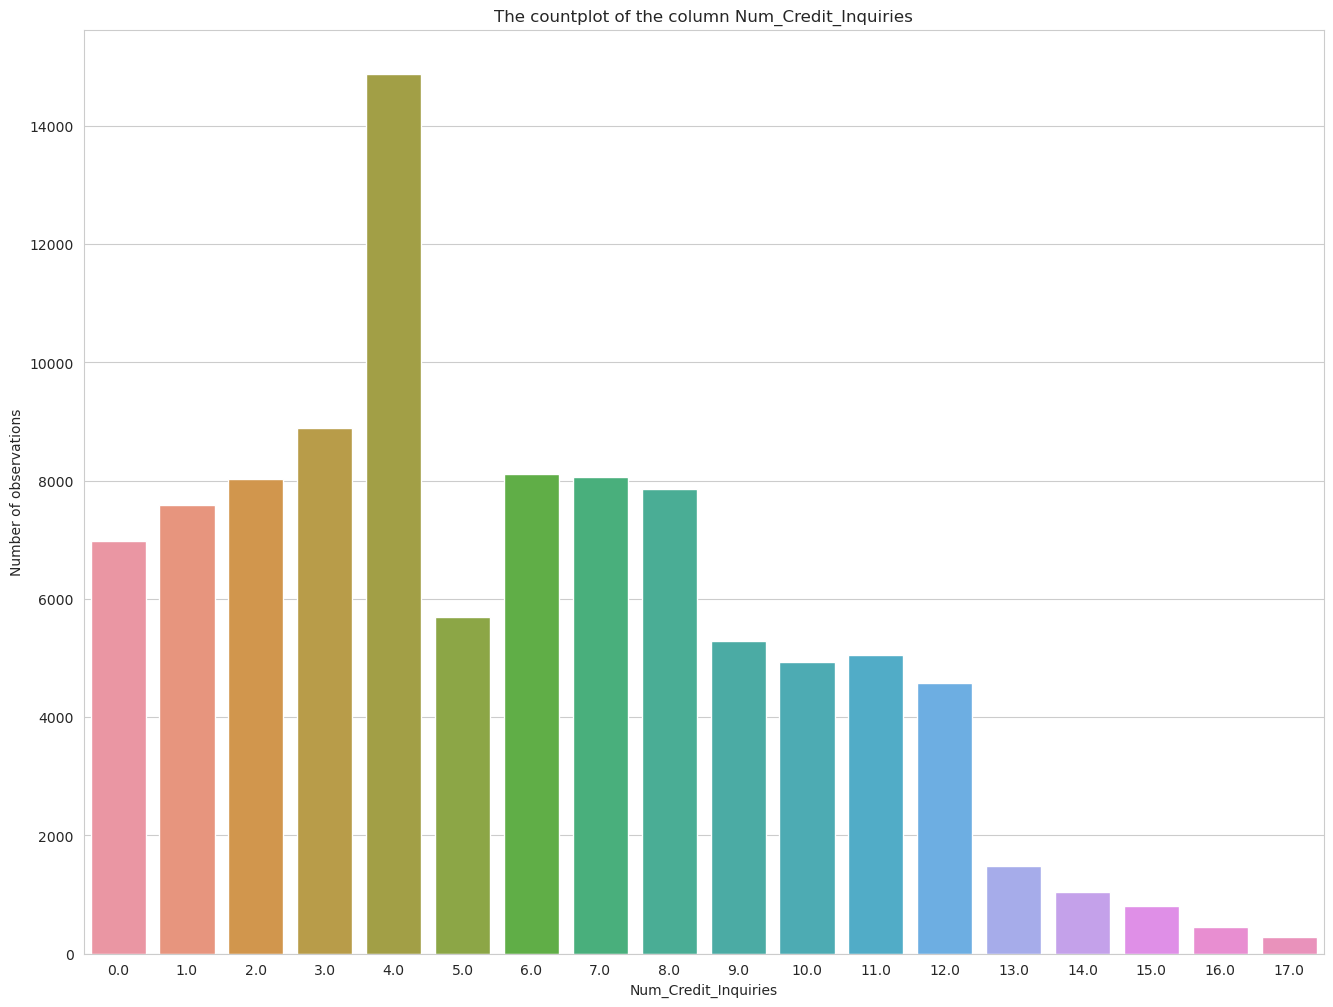

In [44]:
outlier_treatment('Num_Credit_Inquiries')

df_train_credit_inq = pd.DataFrame(df_train['Num_Credit_Inquiries'])
simple_imputer = SimpleImputer(strategy = 'most_frequent')
df_train_credit_inq = pd.DataFrame(simple_imputer.fit_transform(df_train_credit_inq))
df_train['Num_Credit_Inquiries'] = df_train_credit_inq
df_train['Num_Credit_Inquiries'] = df_train['Num_Credit_Inquiries'].astype('float32')

count_plot_by_column('Num_Credit_Inquiries')

### Outstanding Debt column cleaning

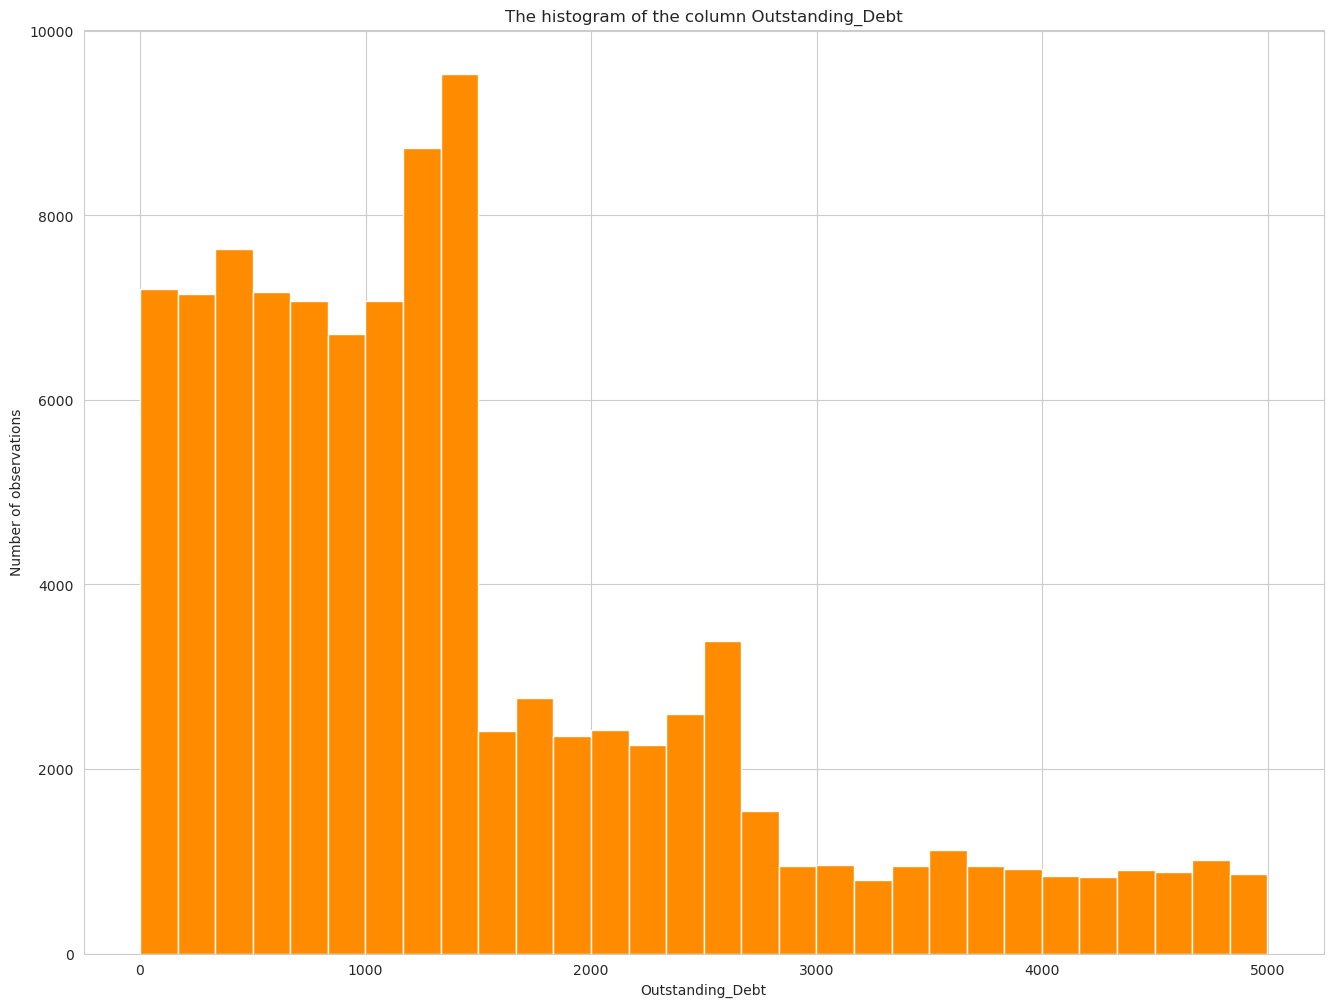

In [45]:
df_train['Outstanding_Debt'] = df_train['Outstanding_Debt'].astype('float32')
histogram_plot_by_column('Outstanding_Debt')

### Total EMI per month - equated monthly installment - column cleaning

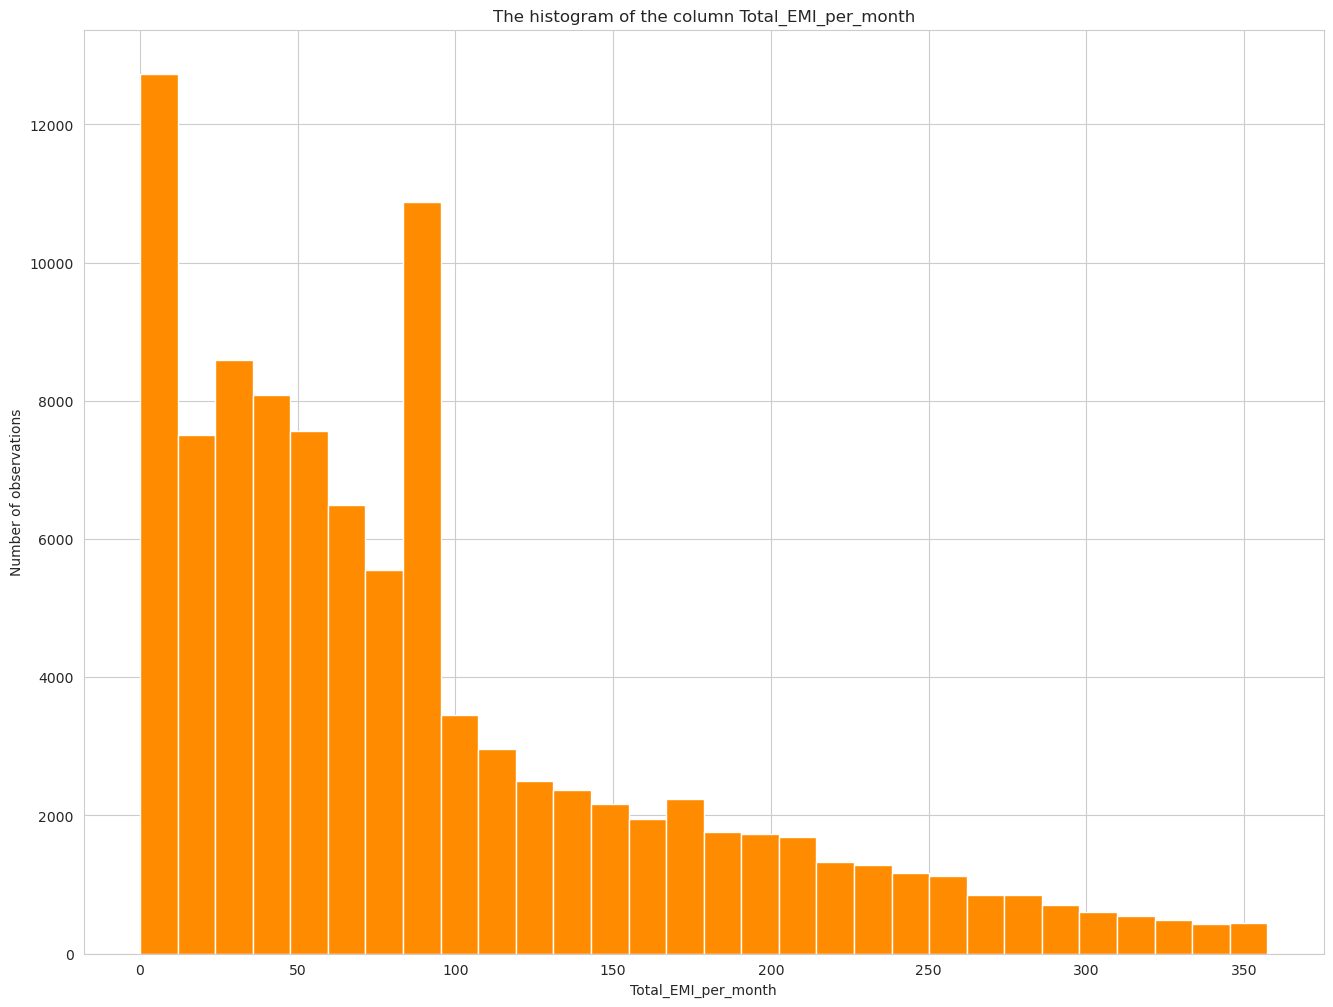

In [46]:
# Removing outliers but this time with a higher upper limit.
#df_train.loc[df_train['Total_EMI_per_month'] > 600, 'Total_EMI_per_month'] = np.NaN
outlier_treatment('Total_EMI_per_month')

#Imputung the mean of the monthly installments
df_train_EMI = pd.DataFrame(df_train['Total_EMI_per_month'])
simple_imputer = SimpleImputer(strategy = 'mean')
df_train_EMI = pd.DataFrame(simple_imputer.fit_transform(df_train_EMI))
df_train['Total_EMI_per_month'] = df_train_EMI

histogram_plot_by_column('Total_EMI_per_month')

### Credit History Age column cleaning

The credit history age need to be converted from years and months to months only meanwhile making sure that it is increasing gradually for each consectutive months for each customer.   
For this we use linear interpolation on our data to impute the missing values.

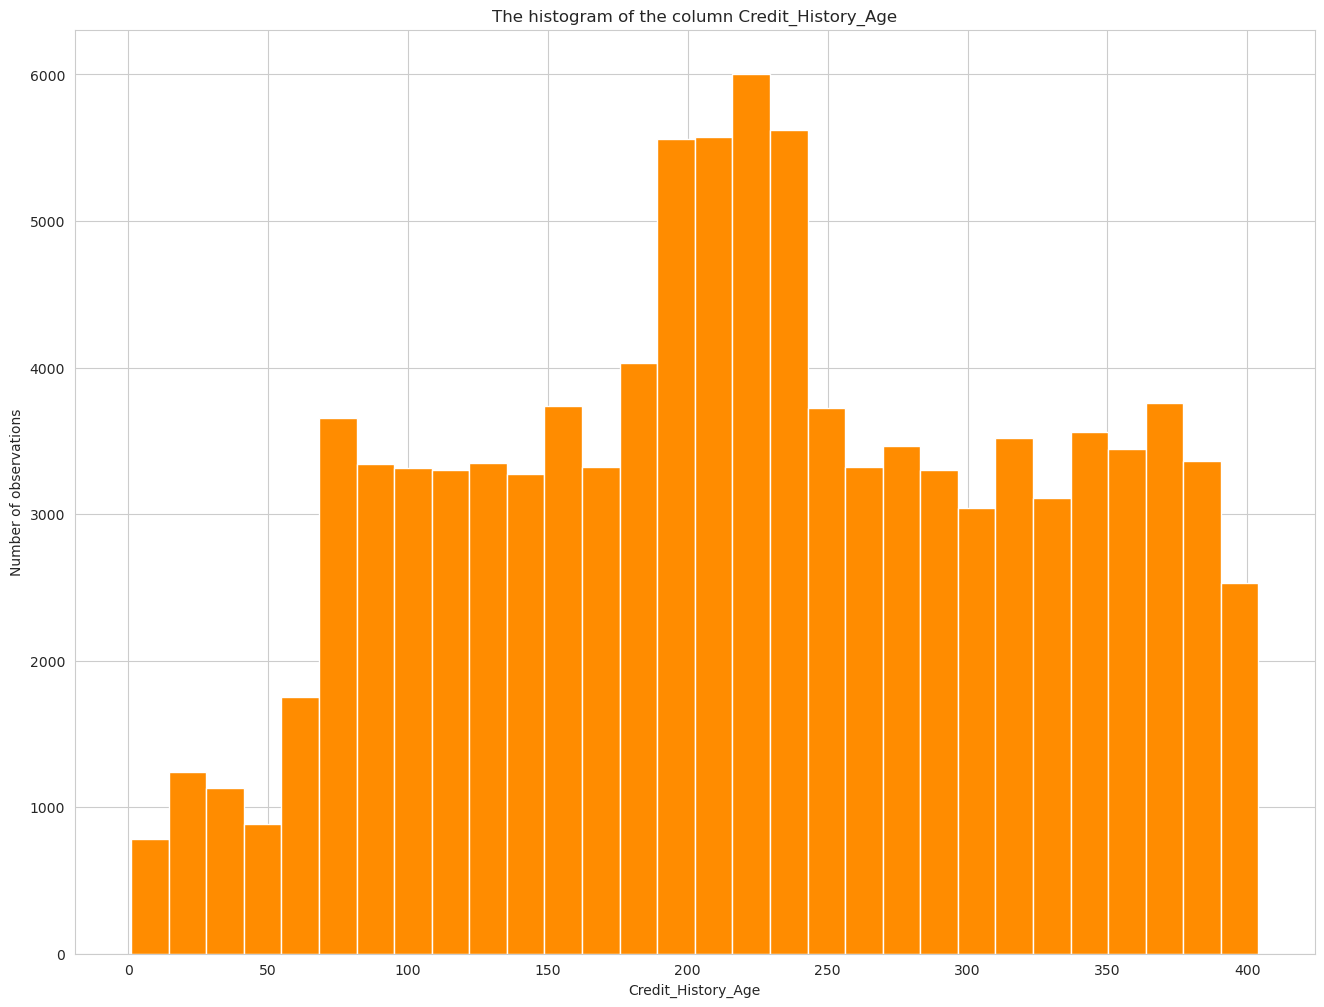

In [47]:
df_train['Credit_History_Age'] = (df_train['Credit_History_Age'].apply(lambda value: credit_history_converter_to_integer(value)))

grped_df = df_train.groupby('Customer_ID')['Credit_History_Age']
df_dict = {}
for id, group in grped_df:
    new_grp = (credit_history_age_imputer(group))
    kv = {id : new_grp}
    df_dict.update(kv)

for key, value in df_dict.items():
    for i in value.iterrows():
        id = i[0]
        val = i[1][0]
        df_train.loc[df_train.index == id, 'Credit_History_Age'] = val

histogram_plot_by_column('Credit_History_Age')

### Amount Invested Monthly column cleaning

Imputing for each customer based on their monthly most amount invested monthly.

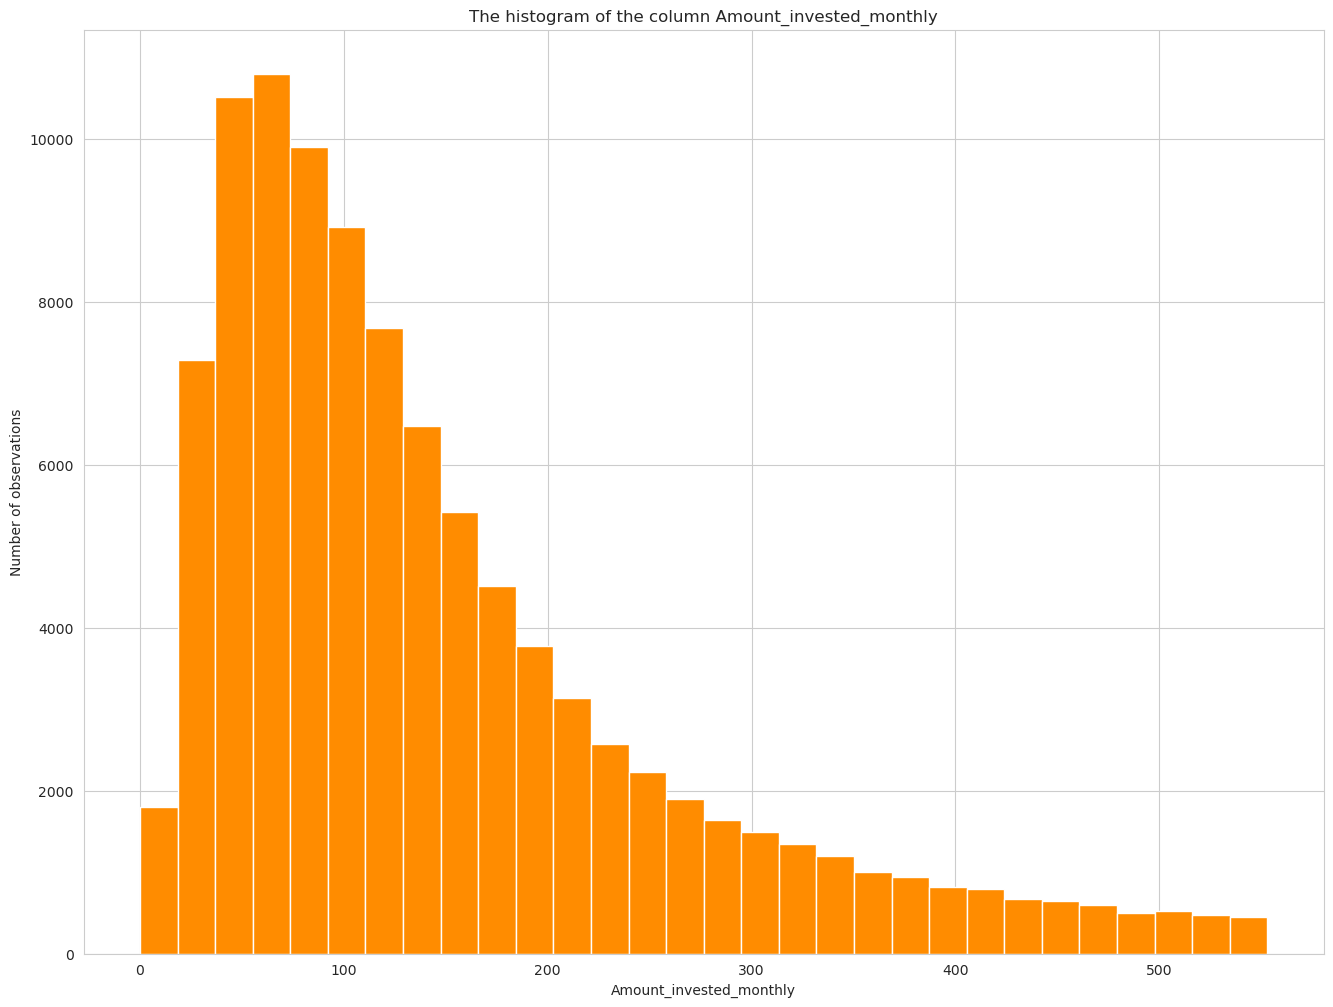

In [48]:
# Converting to numeric and imputing.
df_train['Amount_invested_monthly'] = df_train['Amount_invested_monthly'].astype('float32')
outlier_treatment('Amount_invested_monthly')
group_imputer_mode('Amount_invested_monthly')

histogram_plot_by_column('Amount_invested_monthly')

### Payment Behaviour column cleaning

We simply imputing the last transaction behaviour for the missing values so that the data to be more consistent.

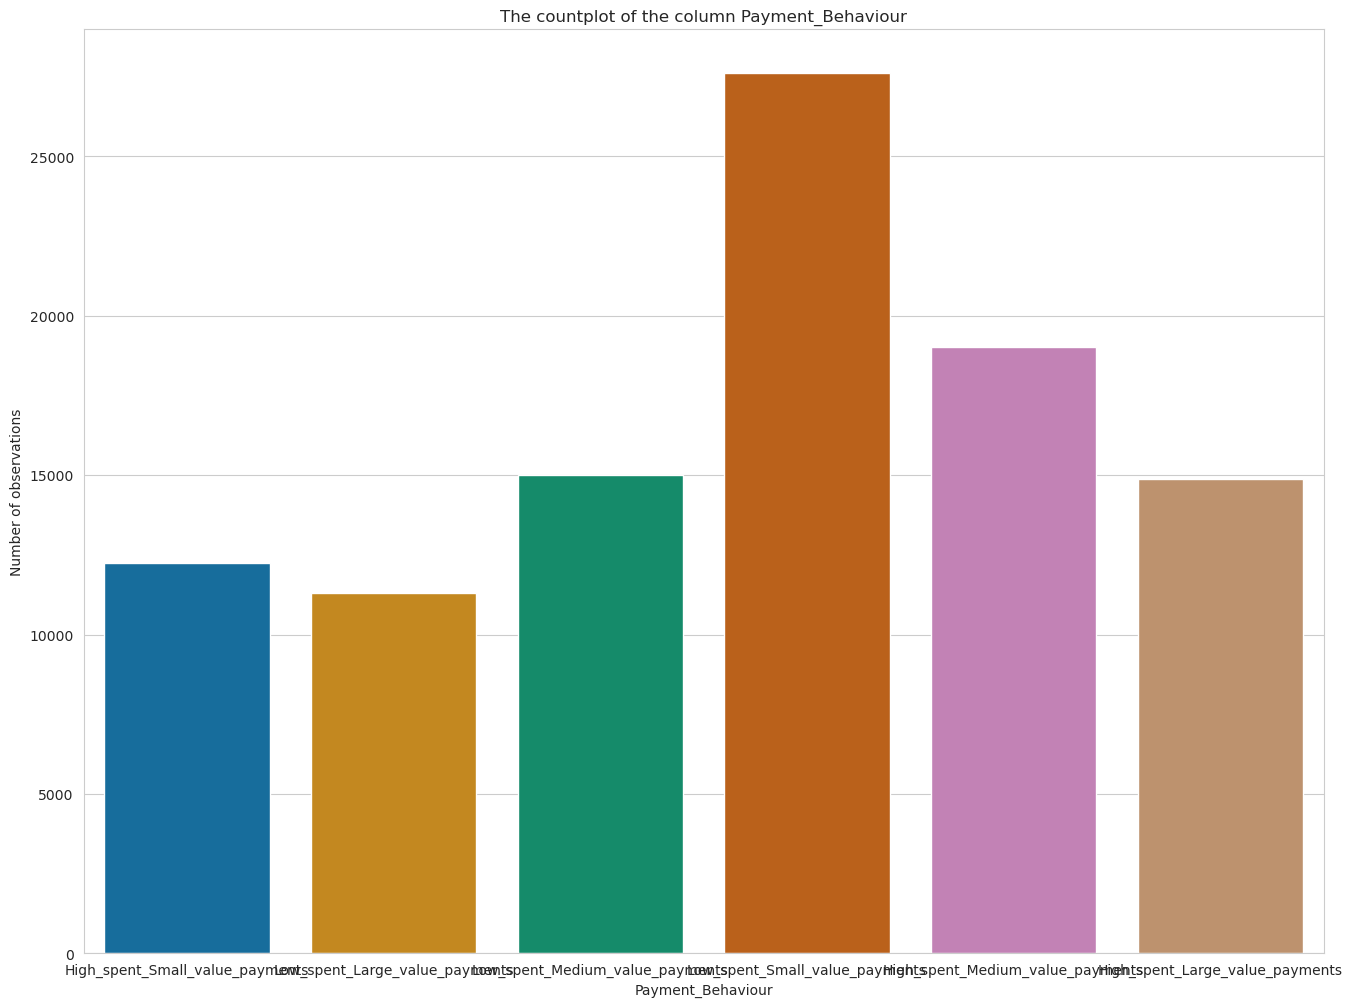

In [49]:
df_train['Payment_Behaviour'].fillna(method = 'ffill', inplace = True)

#Countplot
count_plot_by_column('Payment_Behaviour')

### Monthly Balance column cleaning

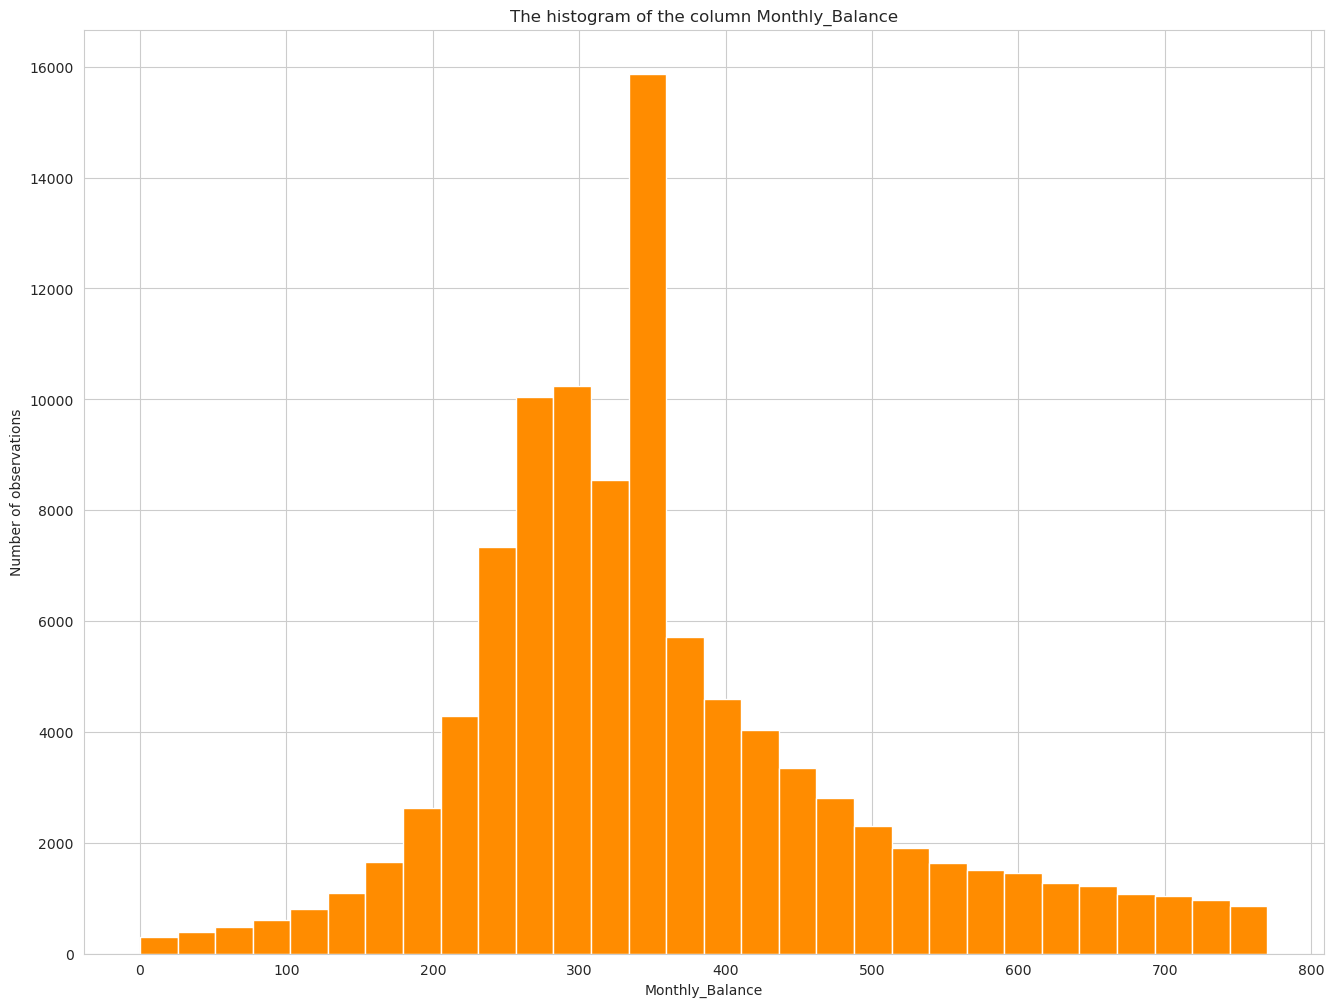

In [50]:
# Convert variabel to numeric and removing negative values.
df_train['Monthly_Balance'] = df_train['Monthly_Balance'].astype('float32')
df_train.loc[df_train['Monthly_Balance'] < 0, 'Monthly_Balance'] = np.NaN
outlier_treatment('Monthly_Balance')

# Imputing for the missing values.
df_train_monthly_bal = pd.DataFrame(df_train['Monthly_Balance'])
knn_imputer = KNNImputer(n_neighbors = 2)
df_train_monthly_bal = pd.DataFrame(knn_imputer.fit_transform(df_train_monthly_bal))
df_train['Monthly_Balance'] = df_train_monthly_bal

histogram_plot_by_column('Monthly_Balance')

<Axes: >

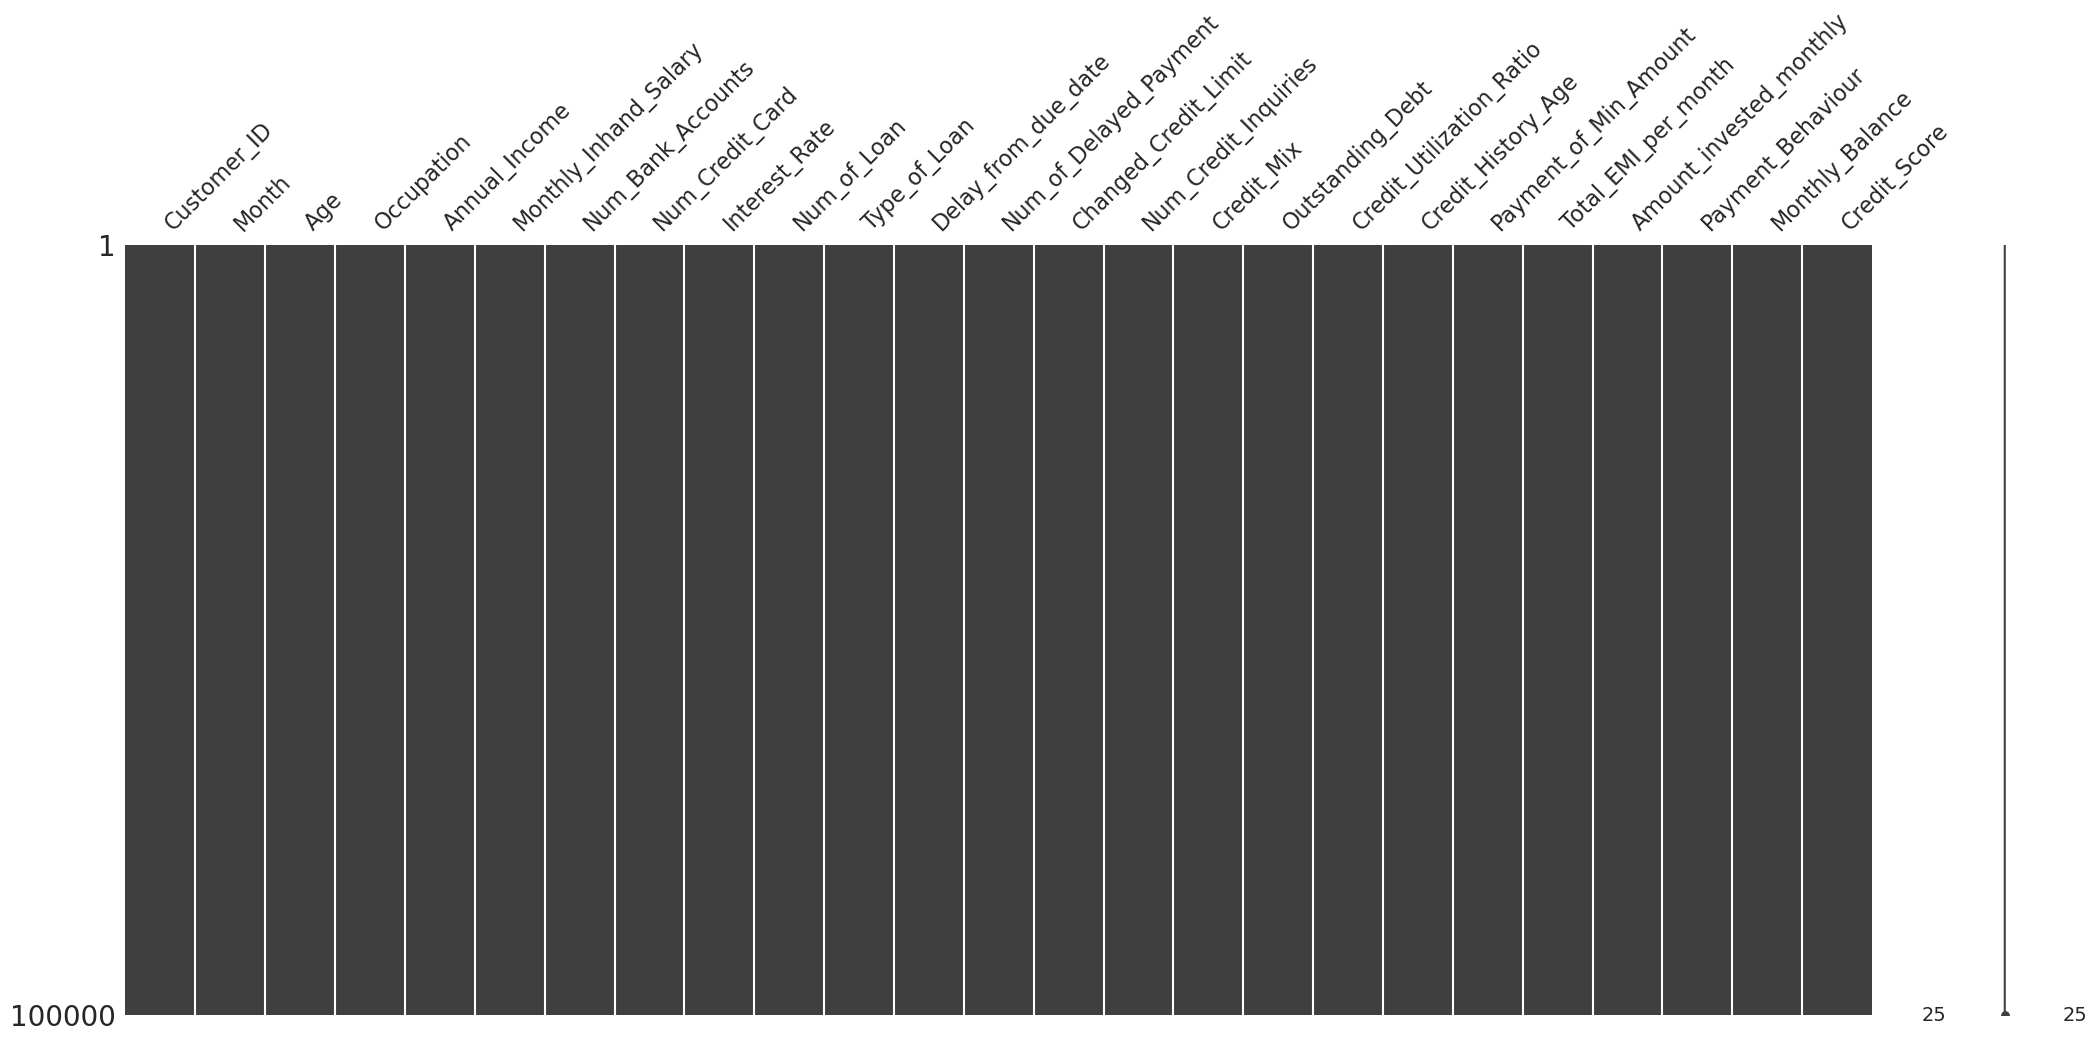

In [51]:
msno.matrix(df_train)

There are no missing values, all the variables have been cleaned.  
Let's have a look on the distribution of these numeric columns.

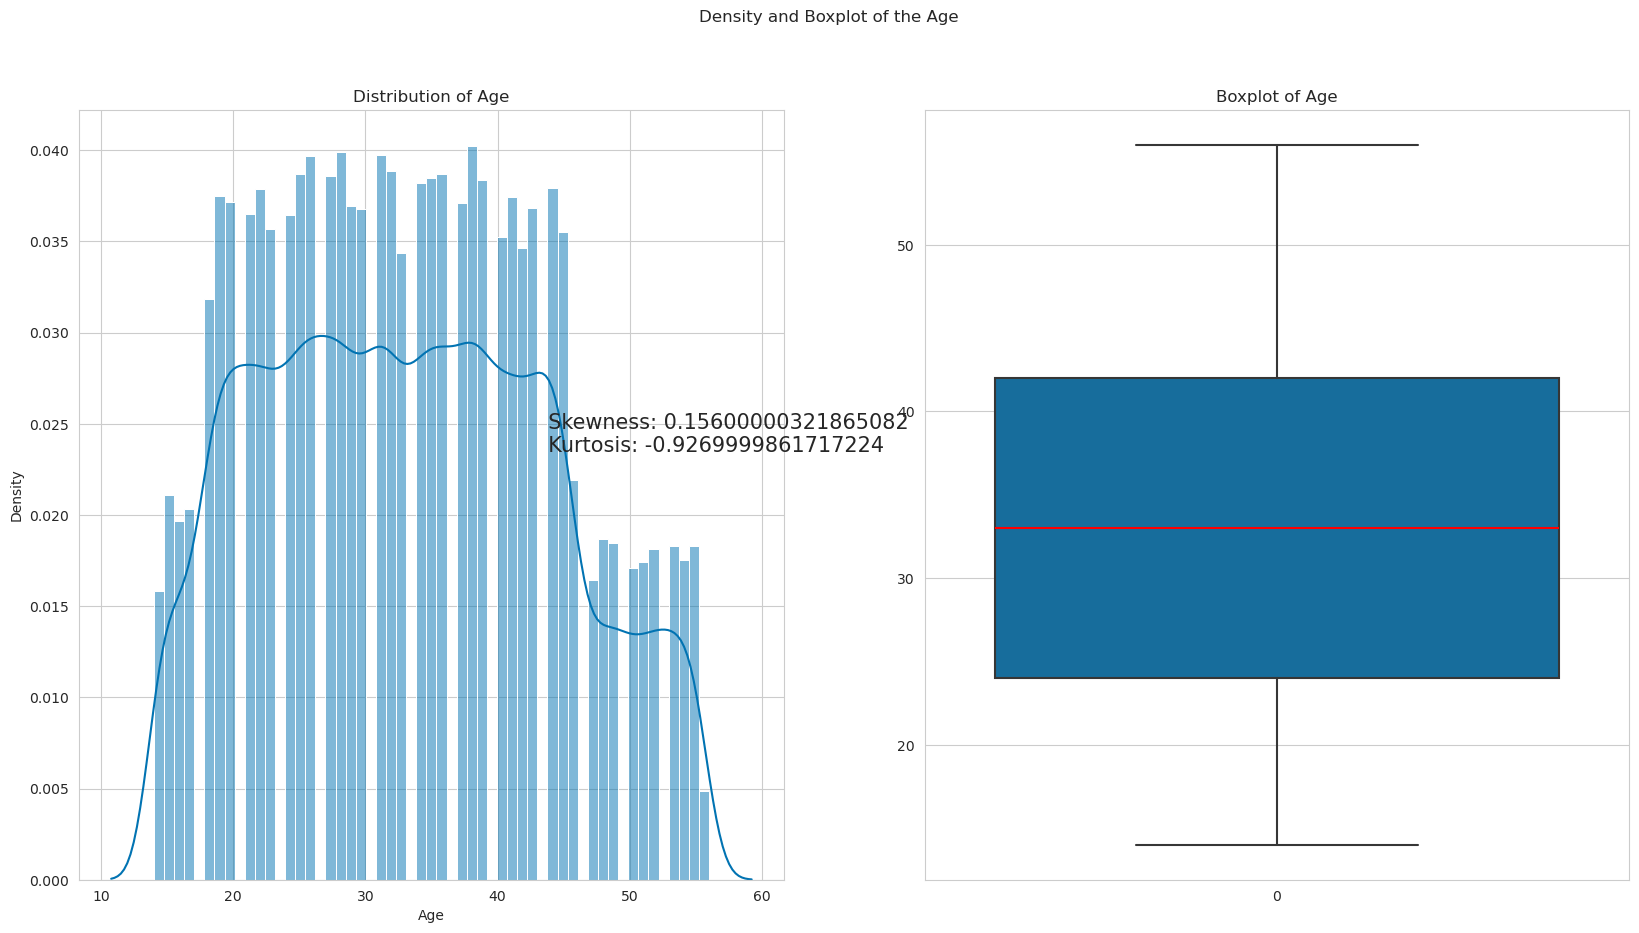

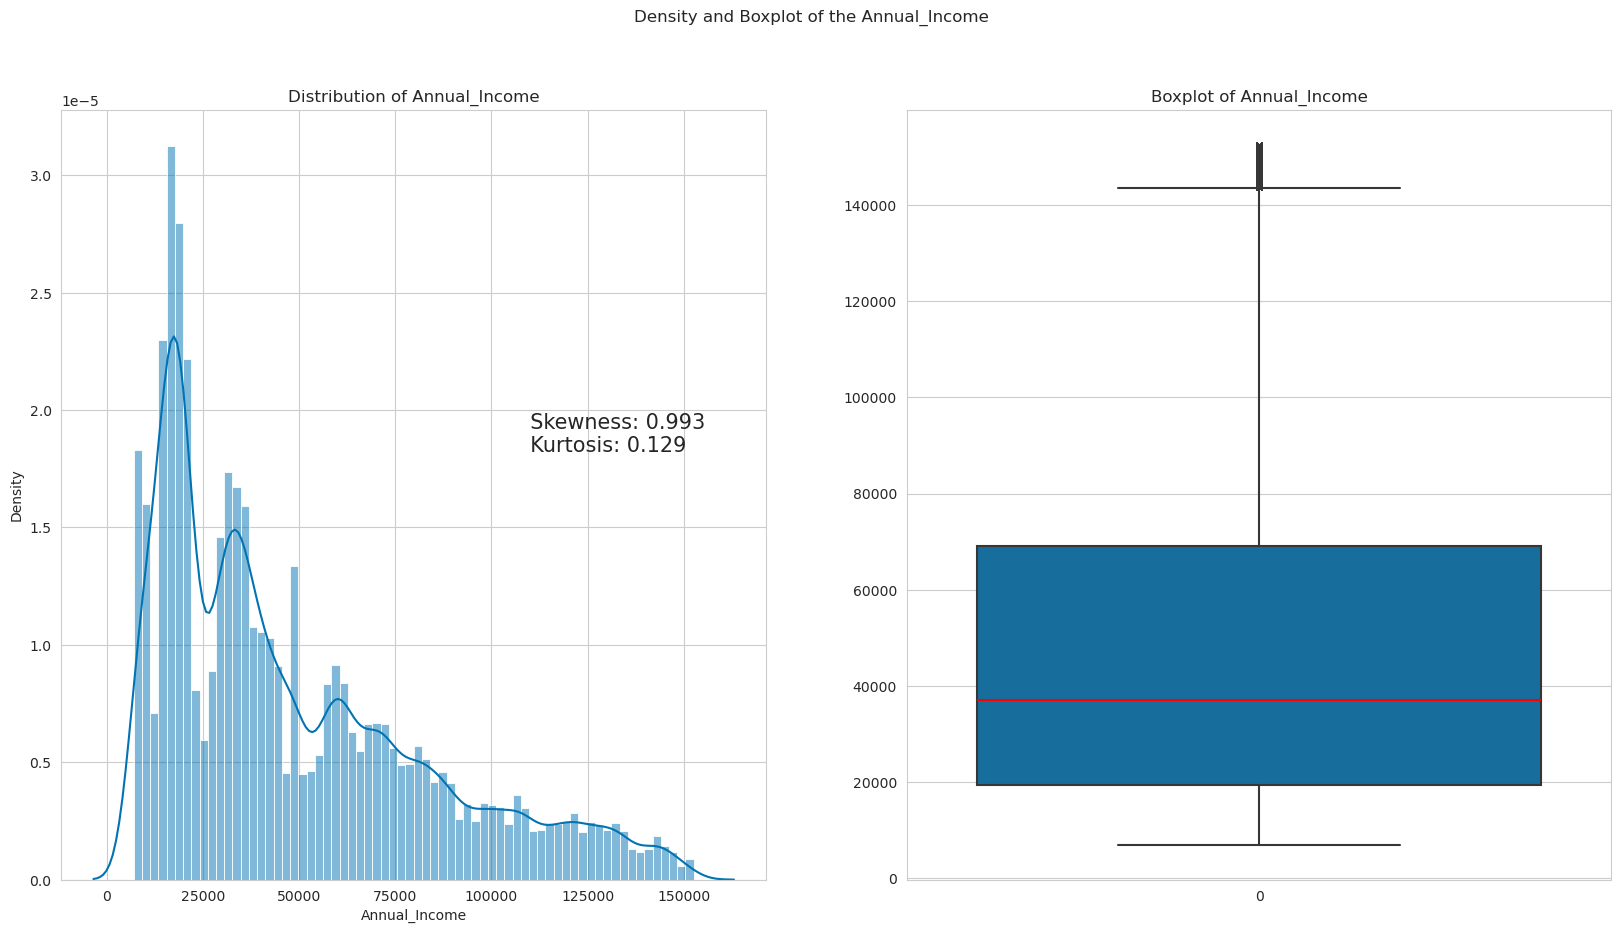

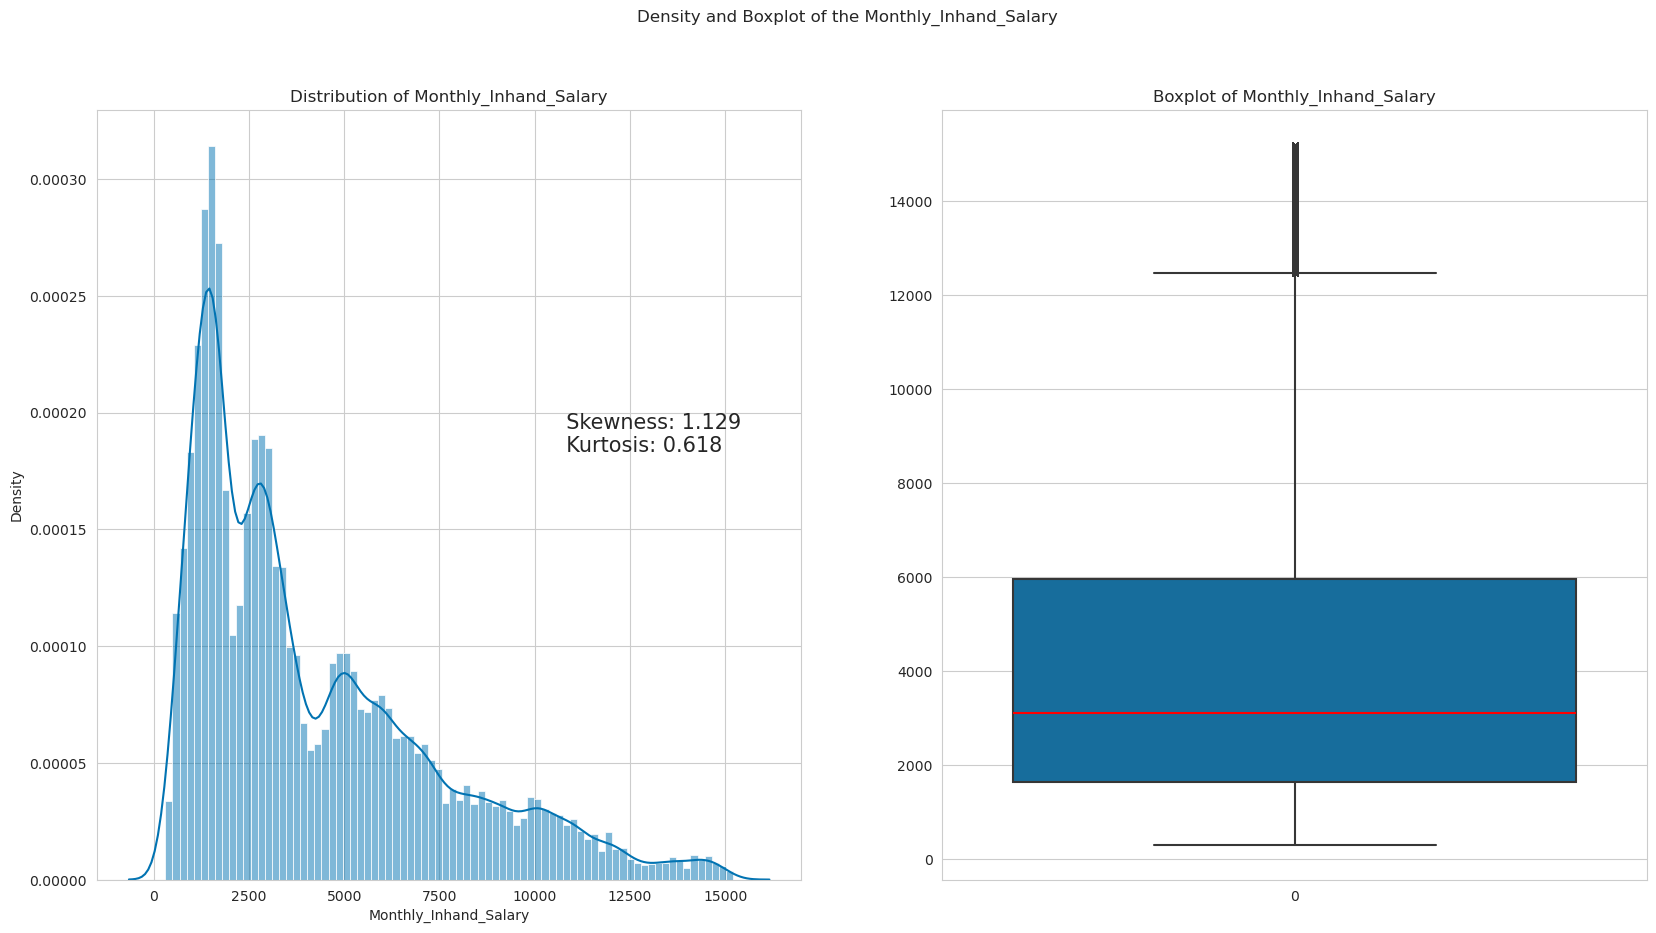

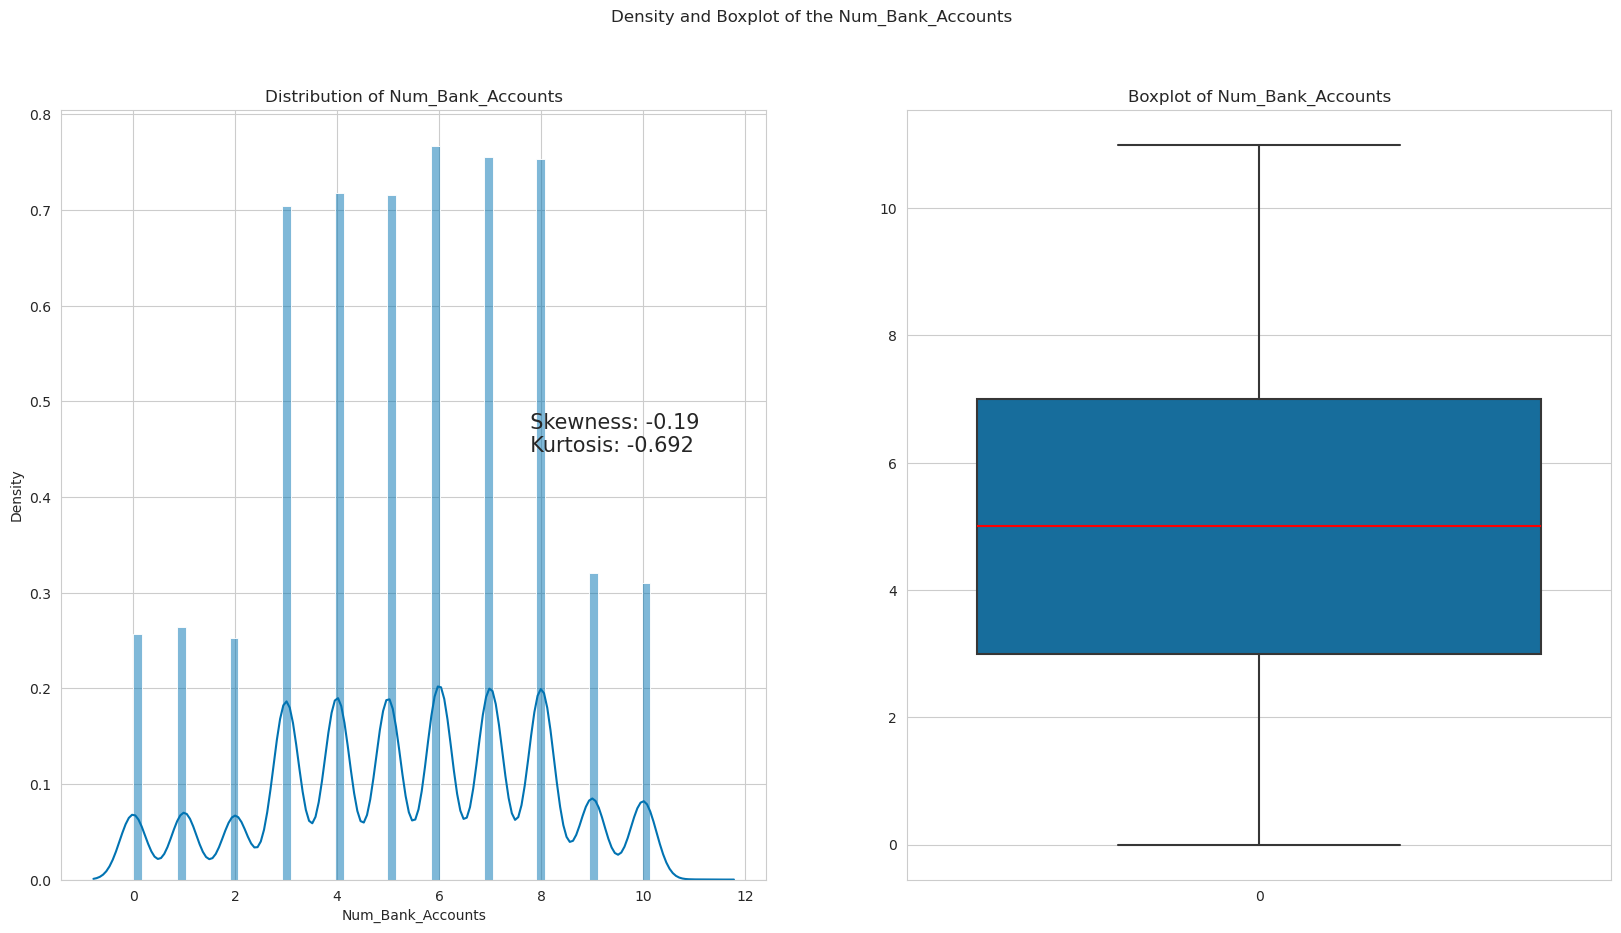

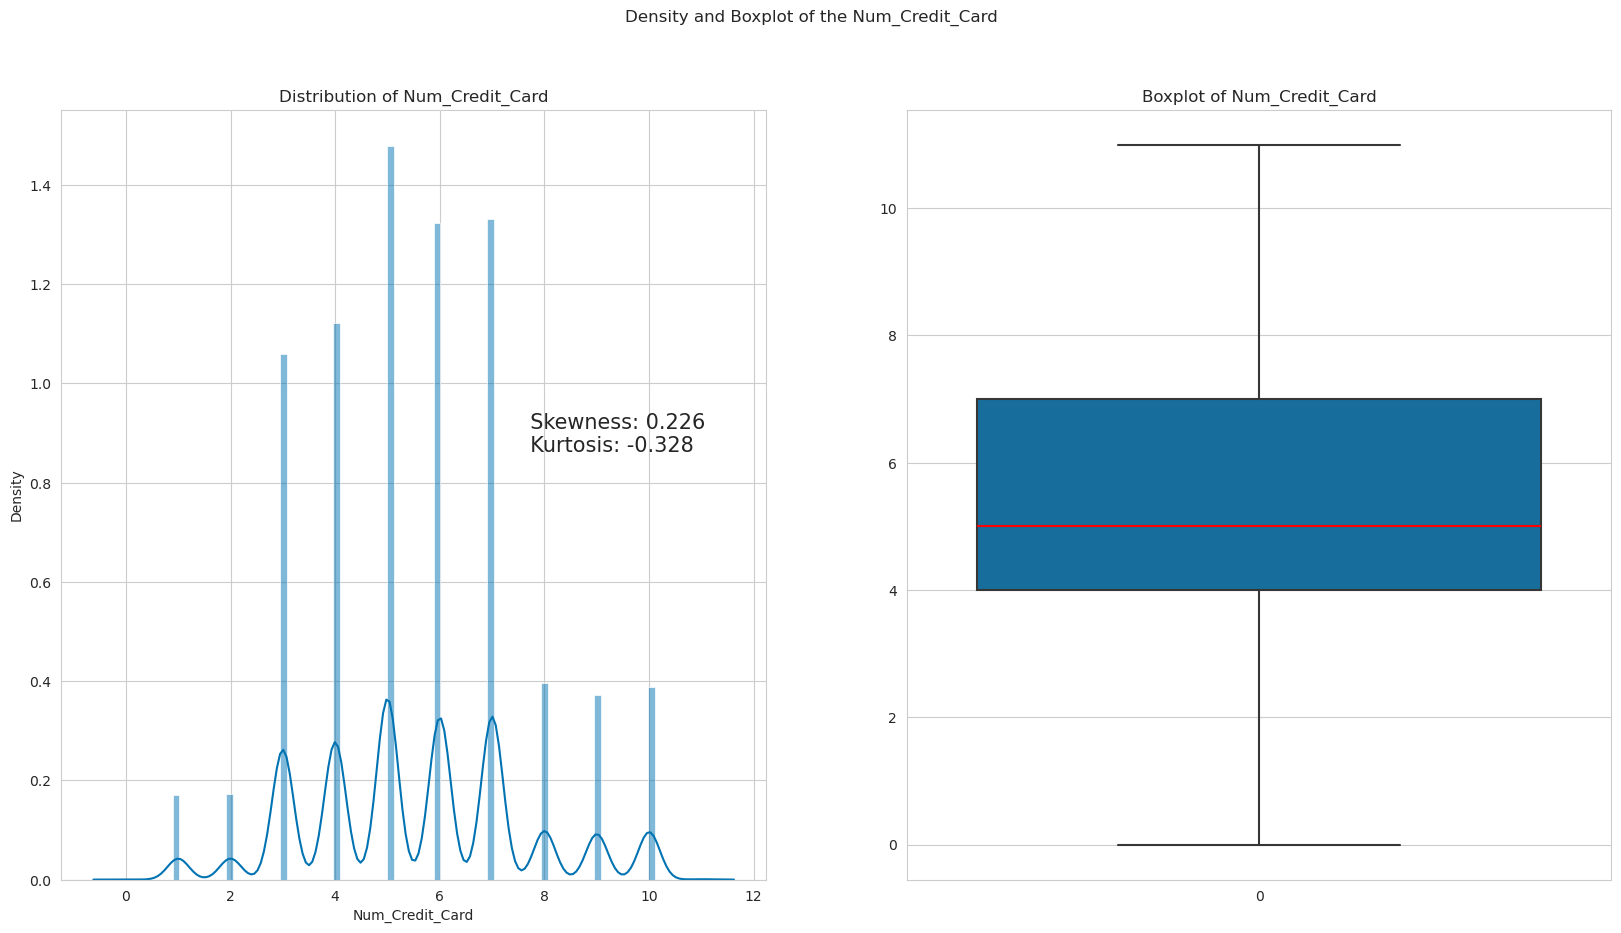

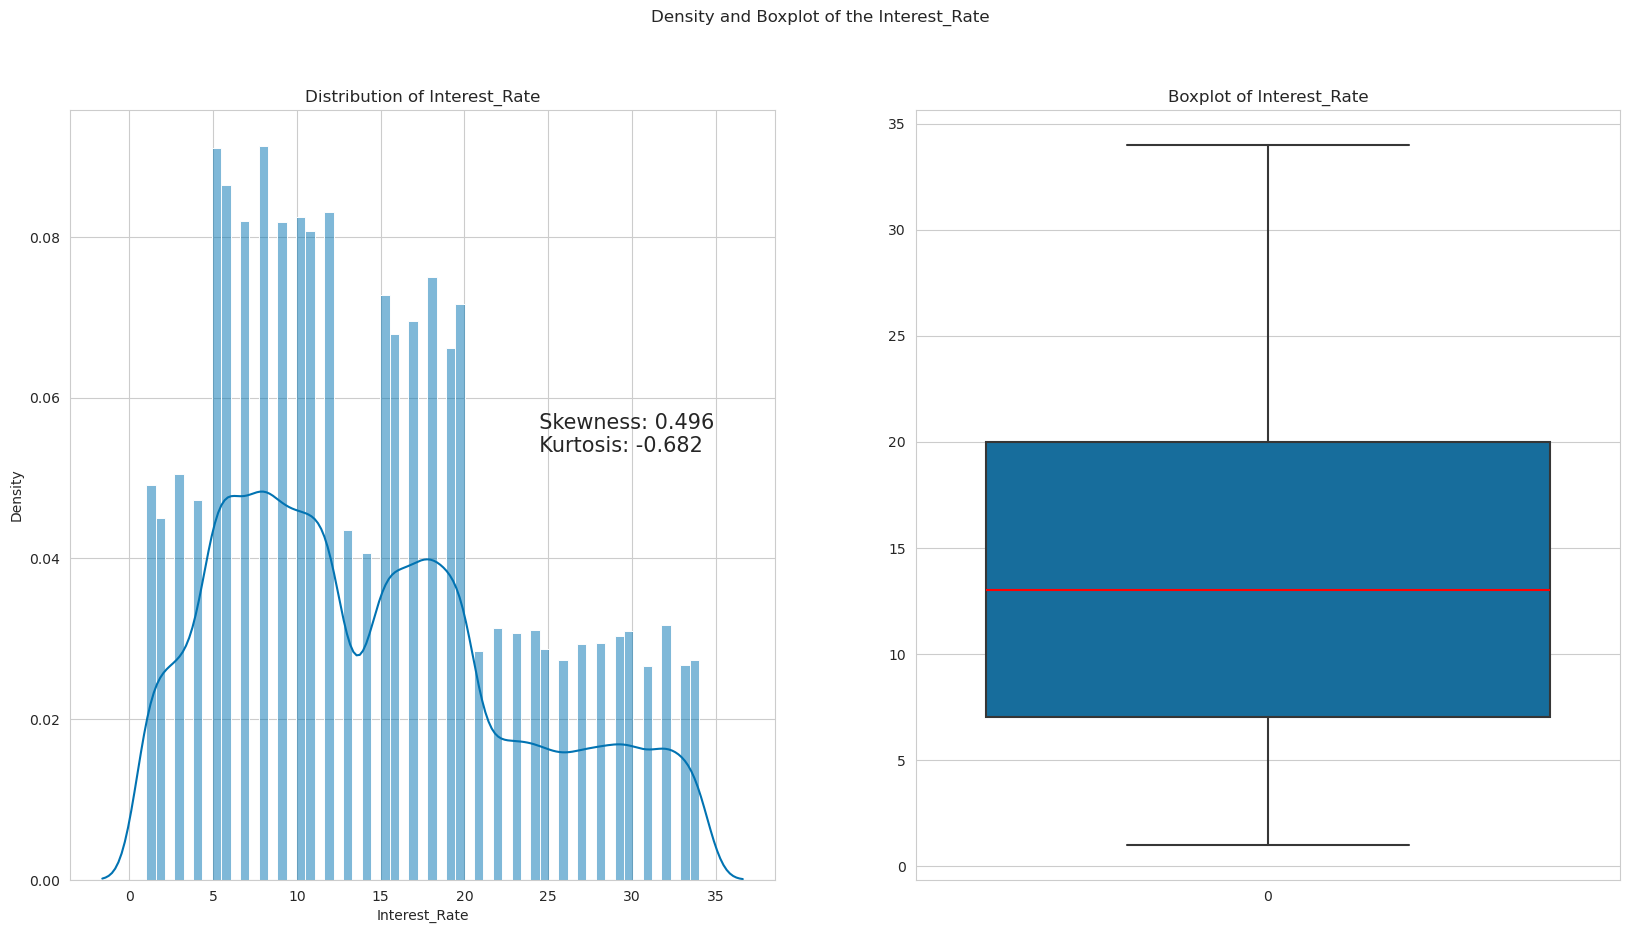

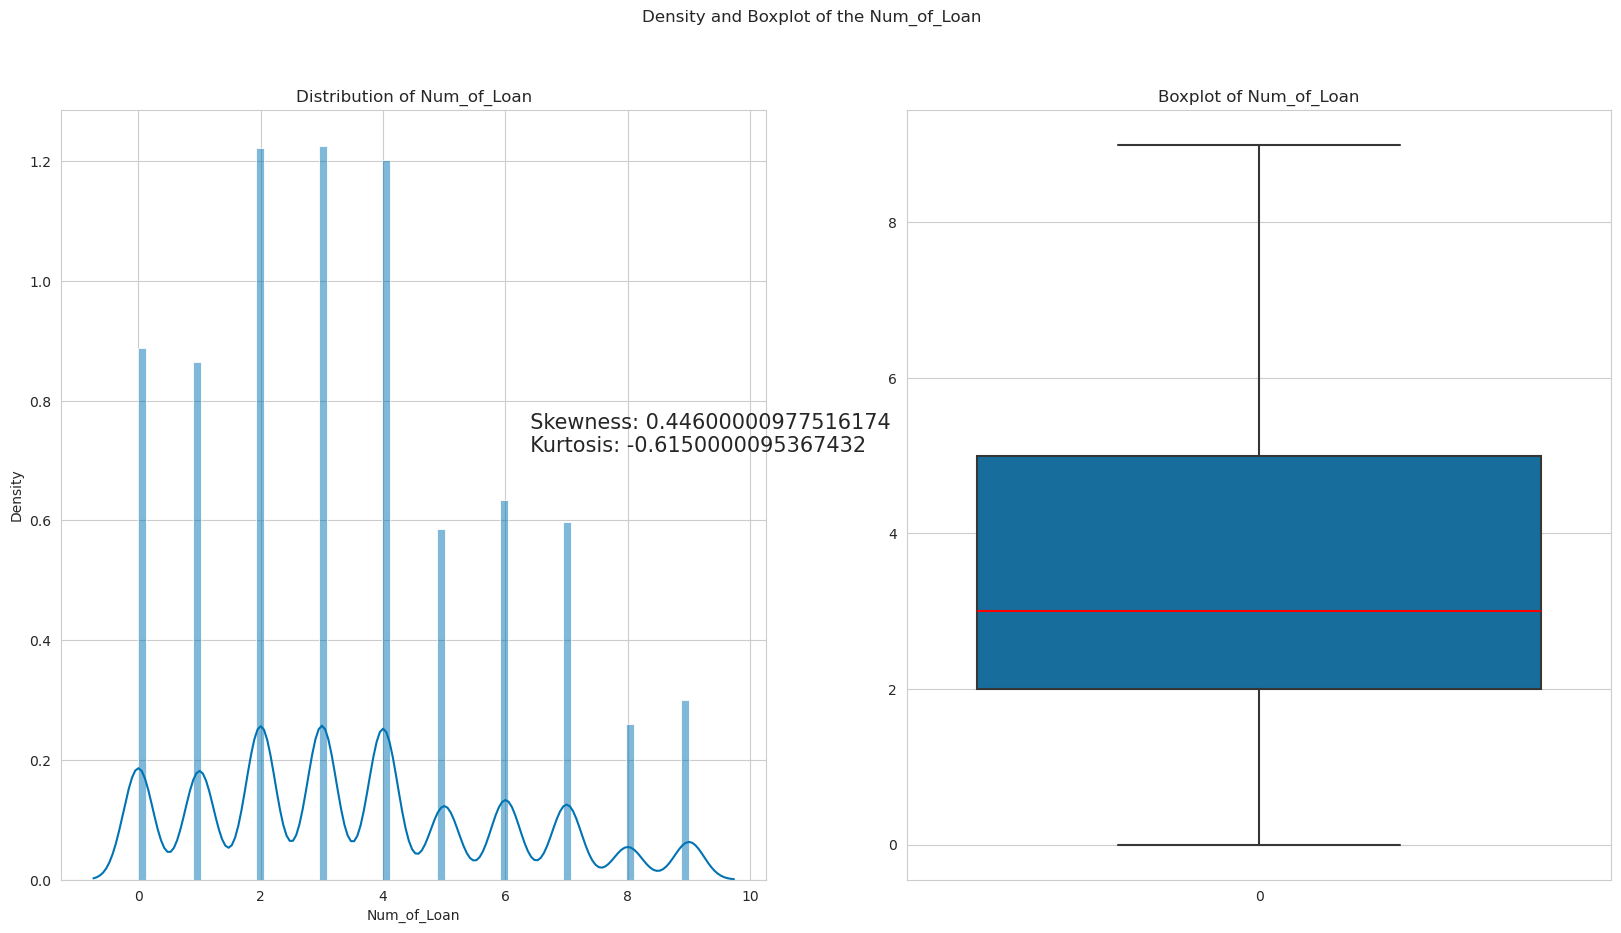

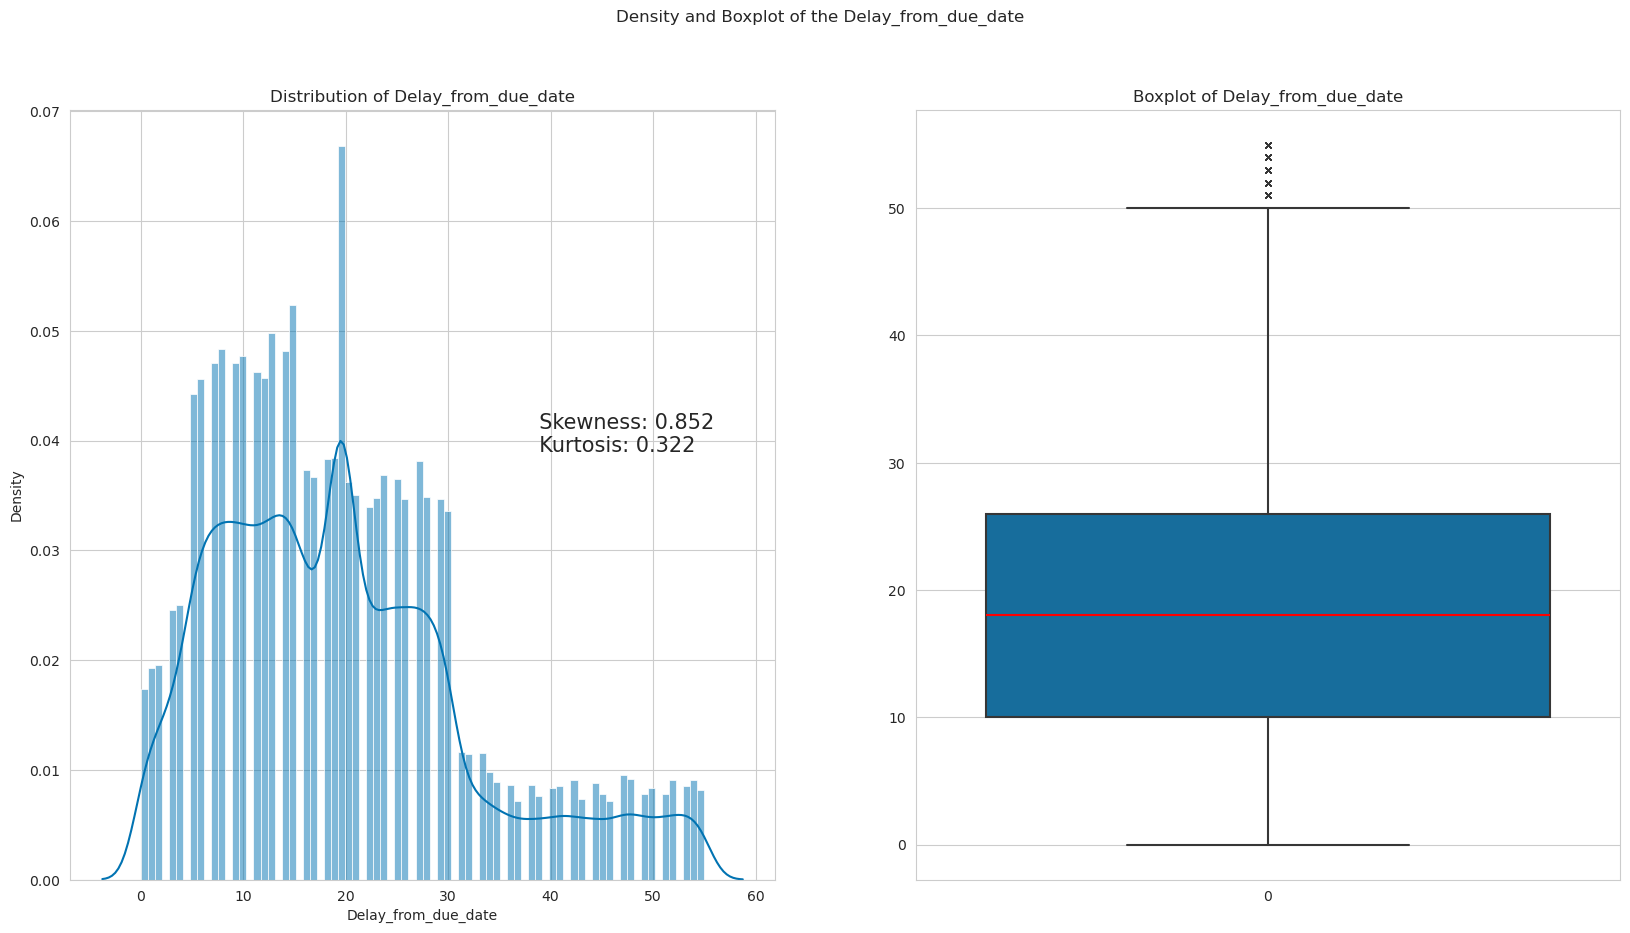

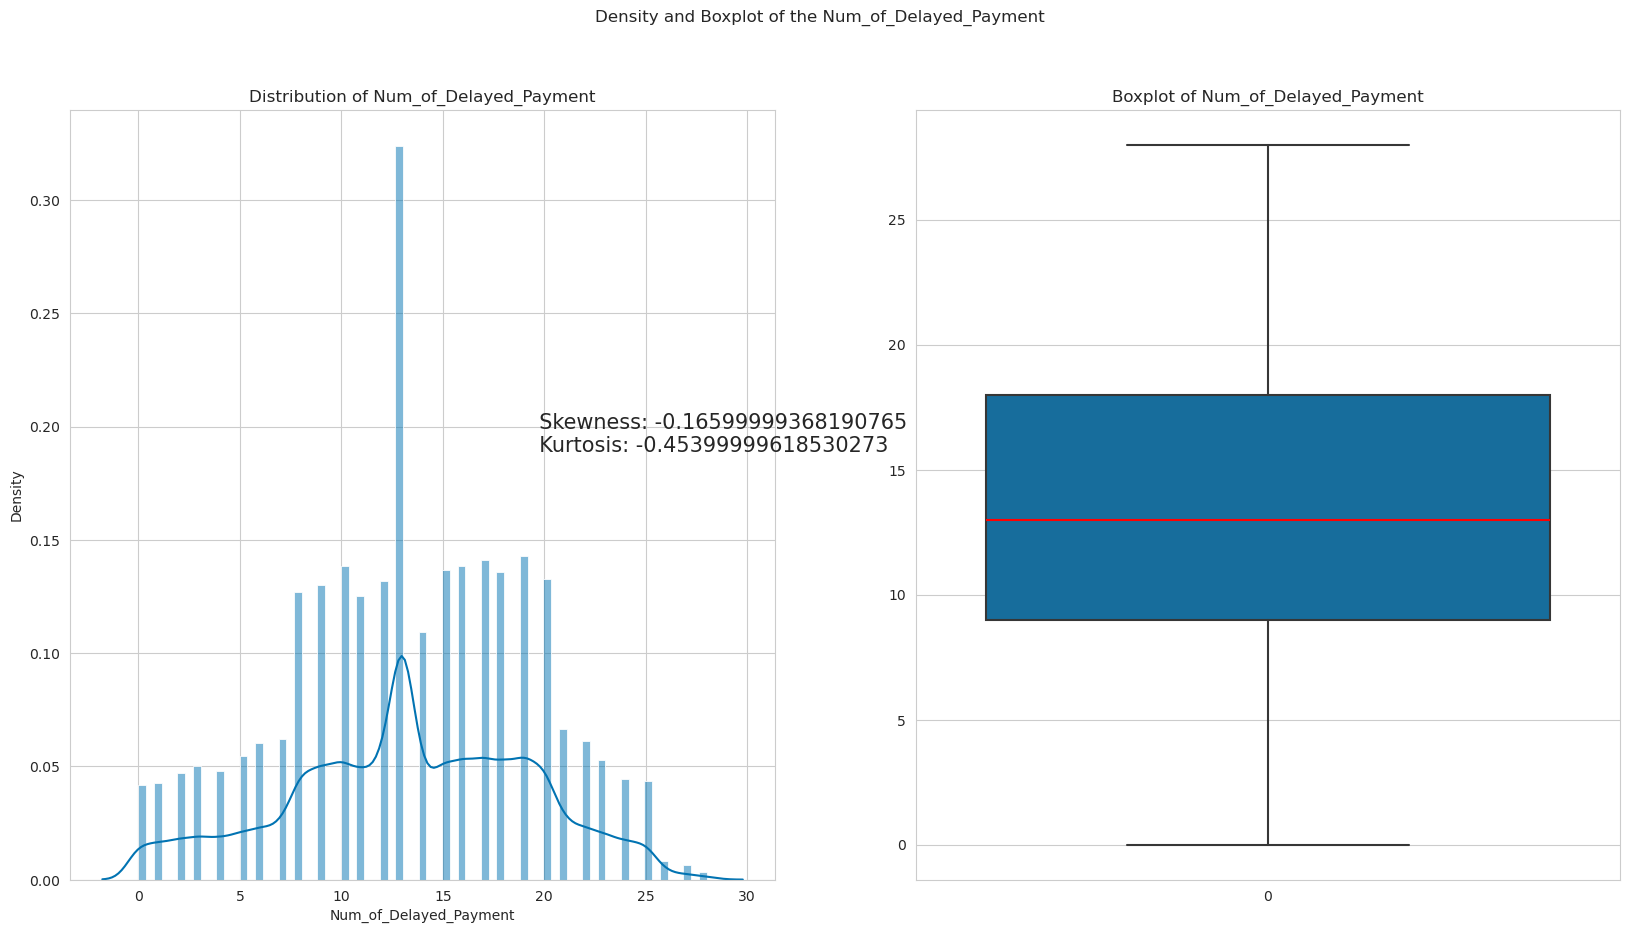

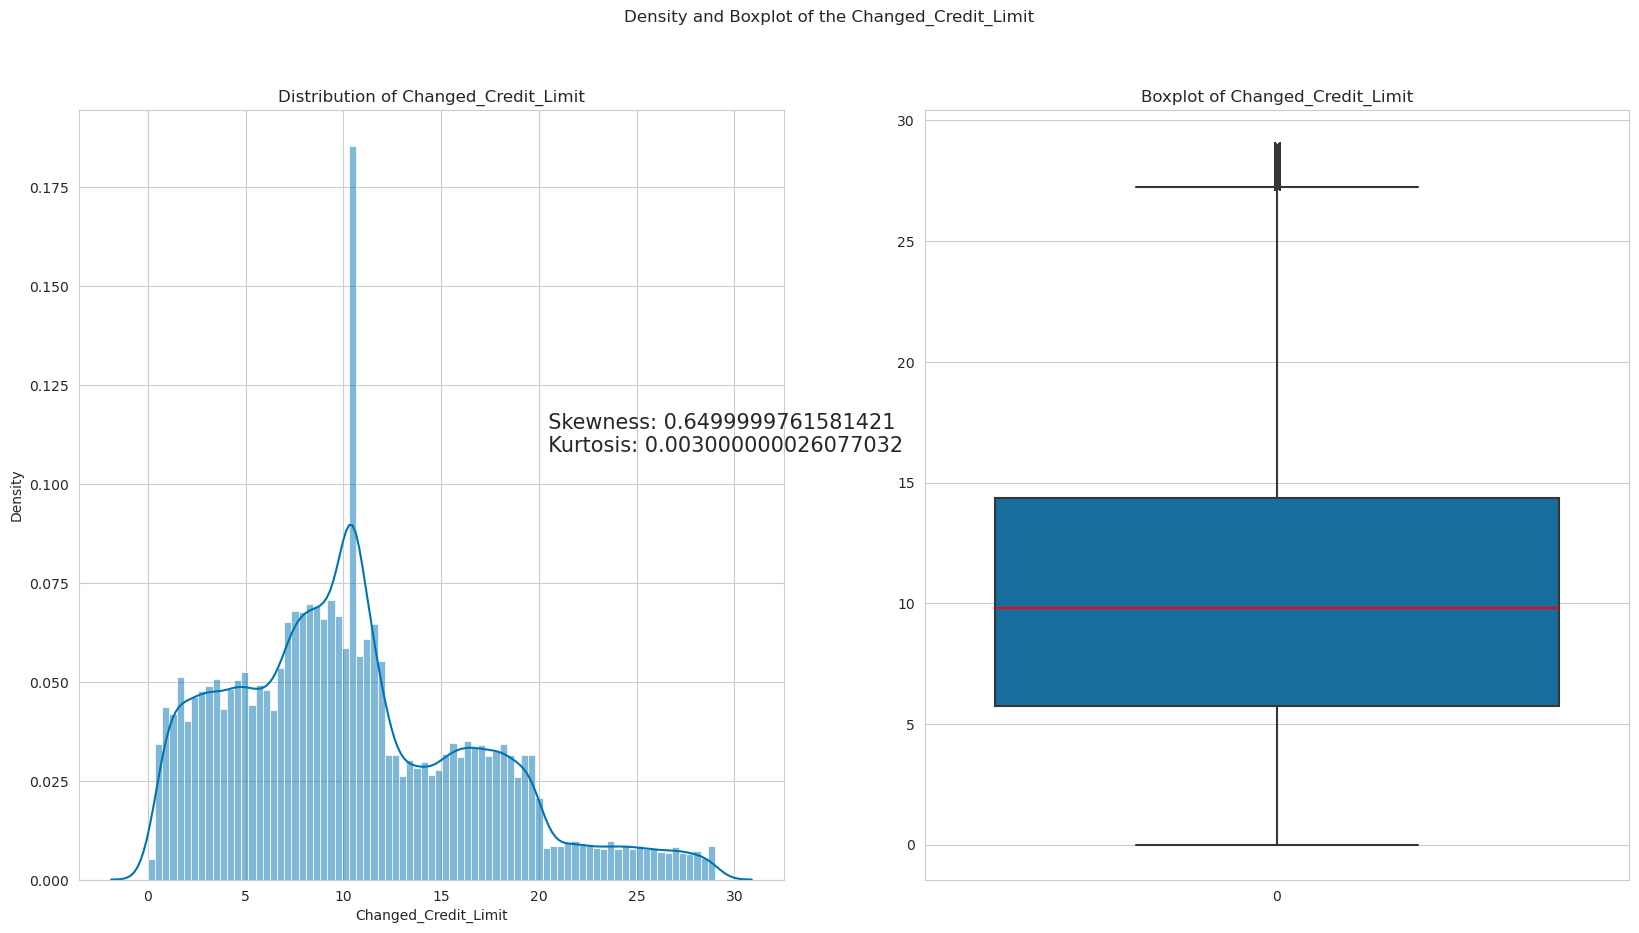

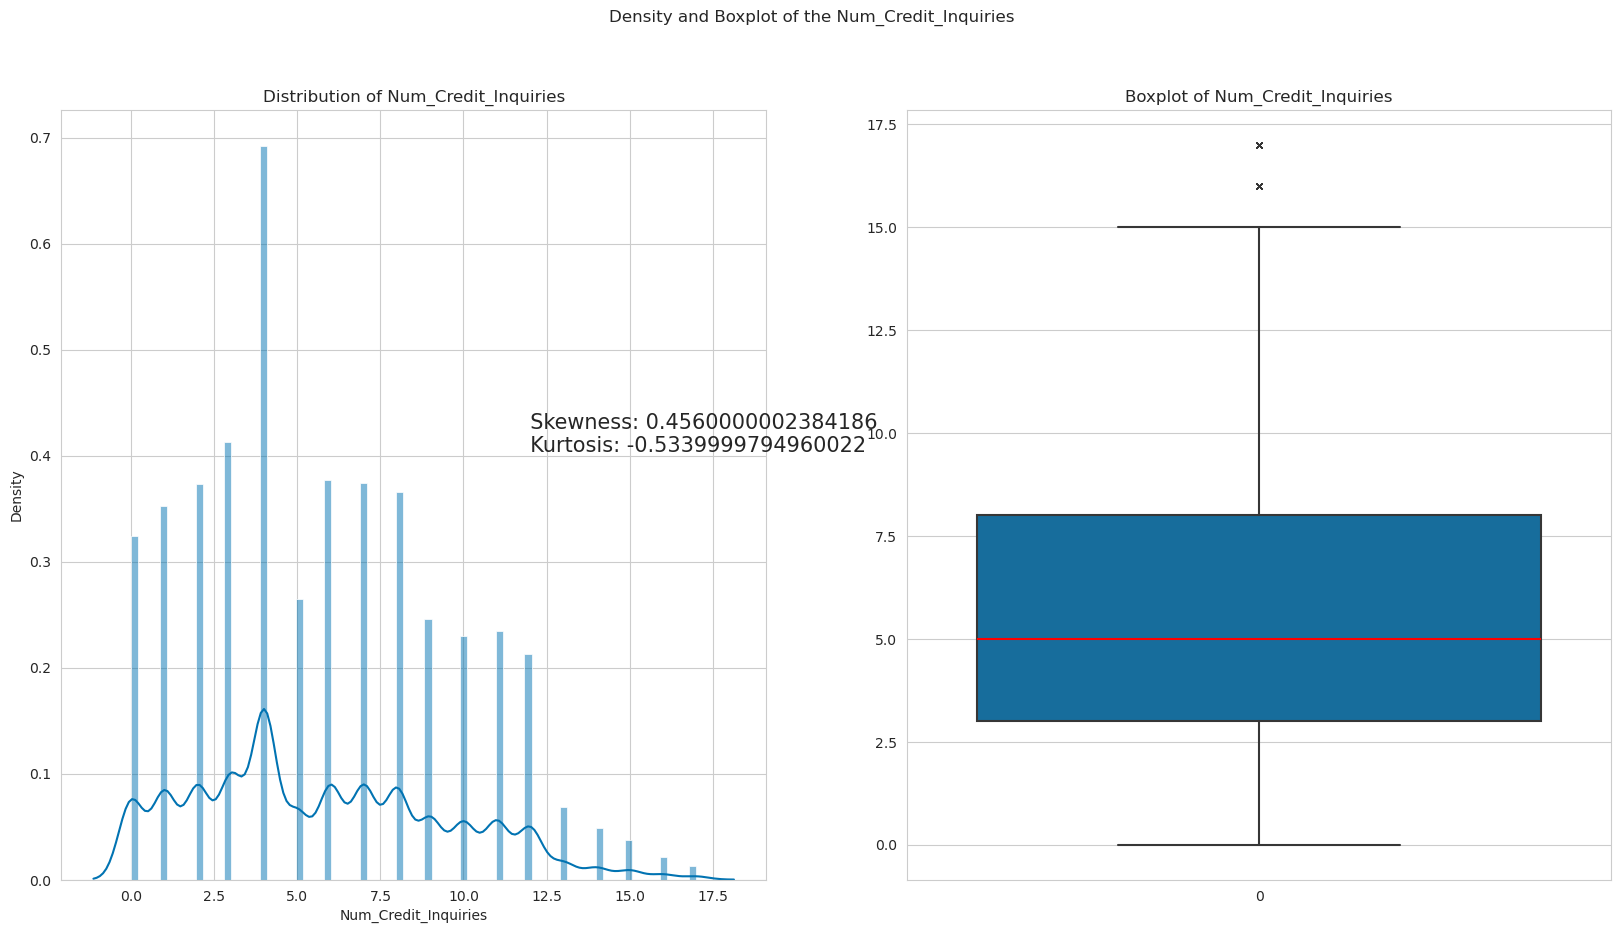

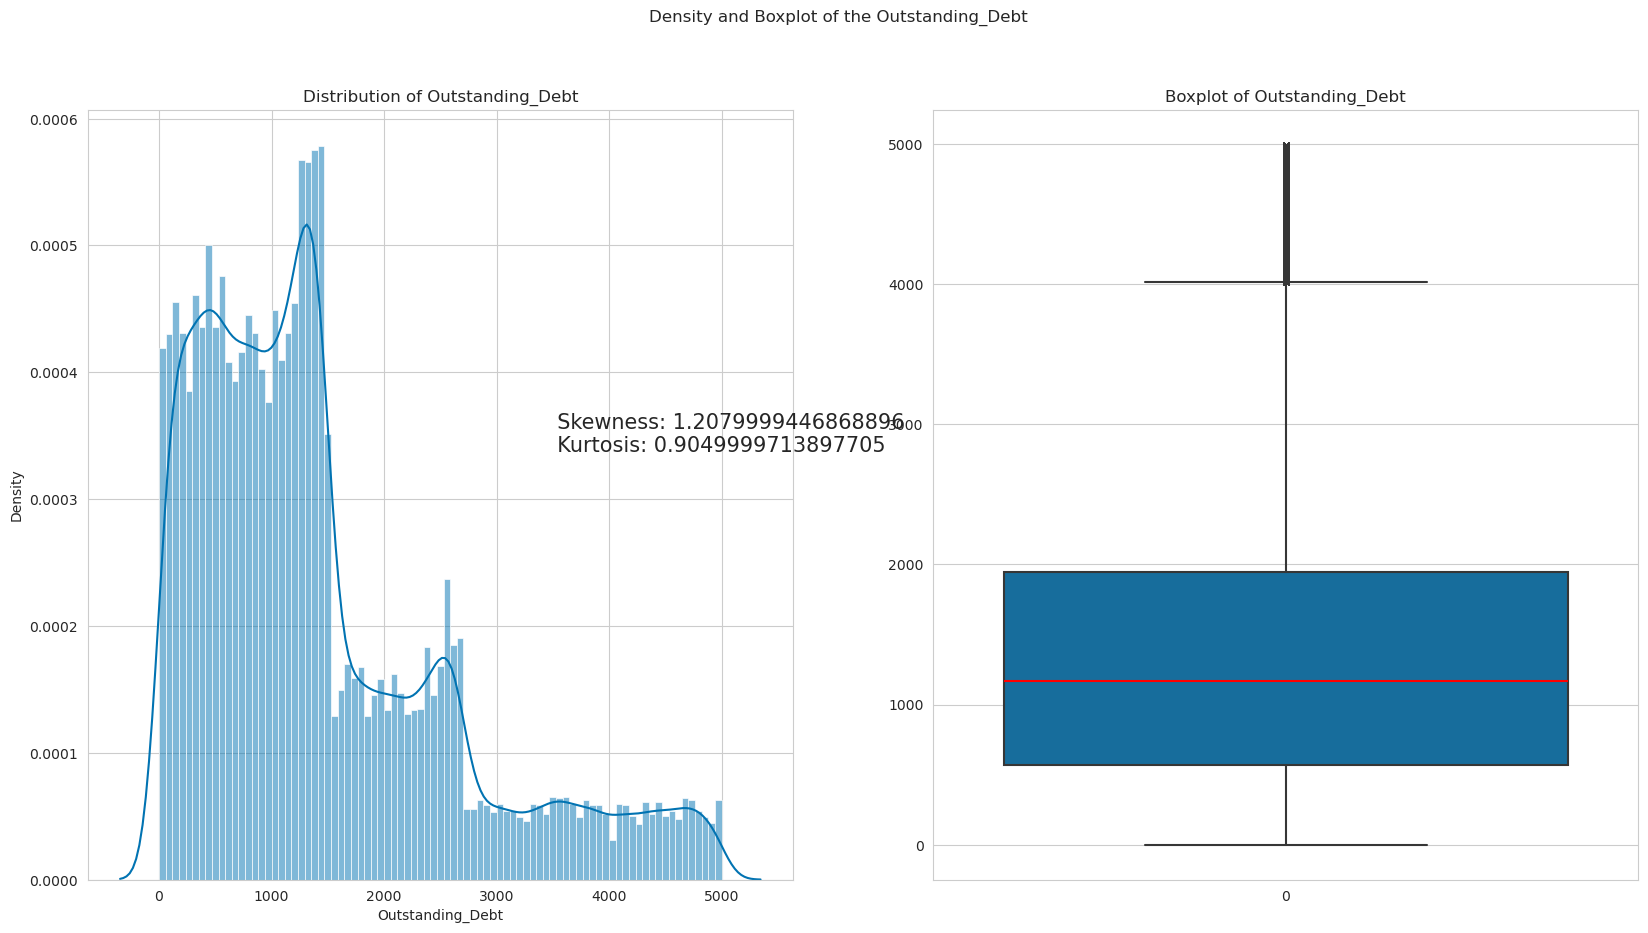

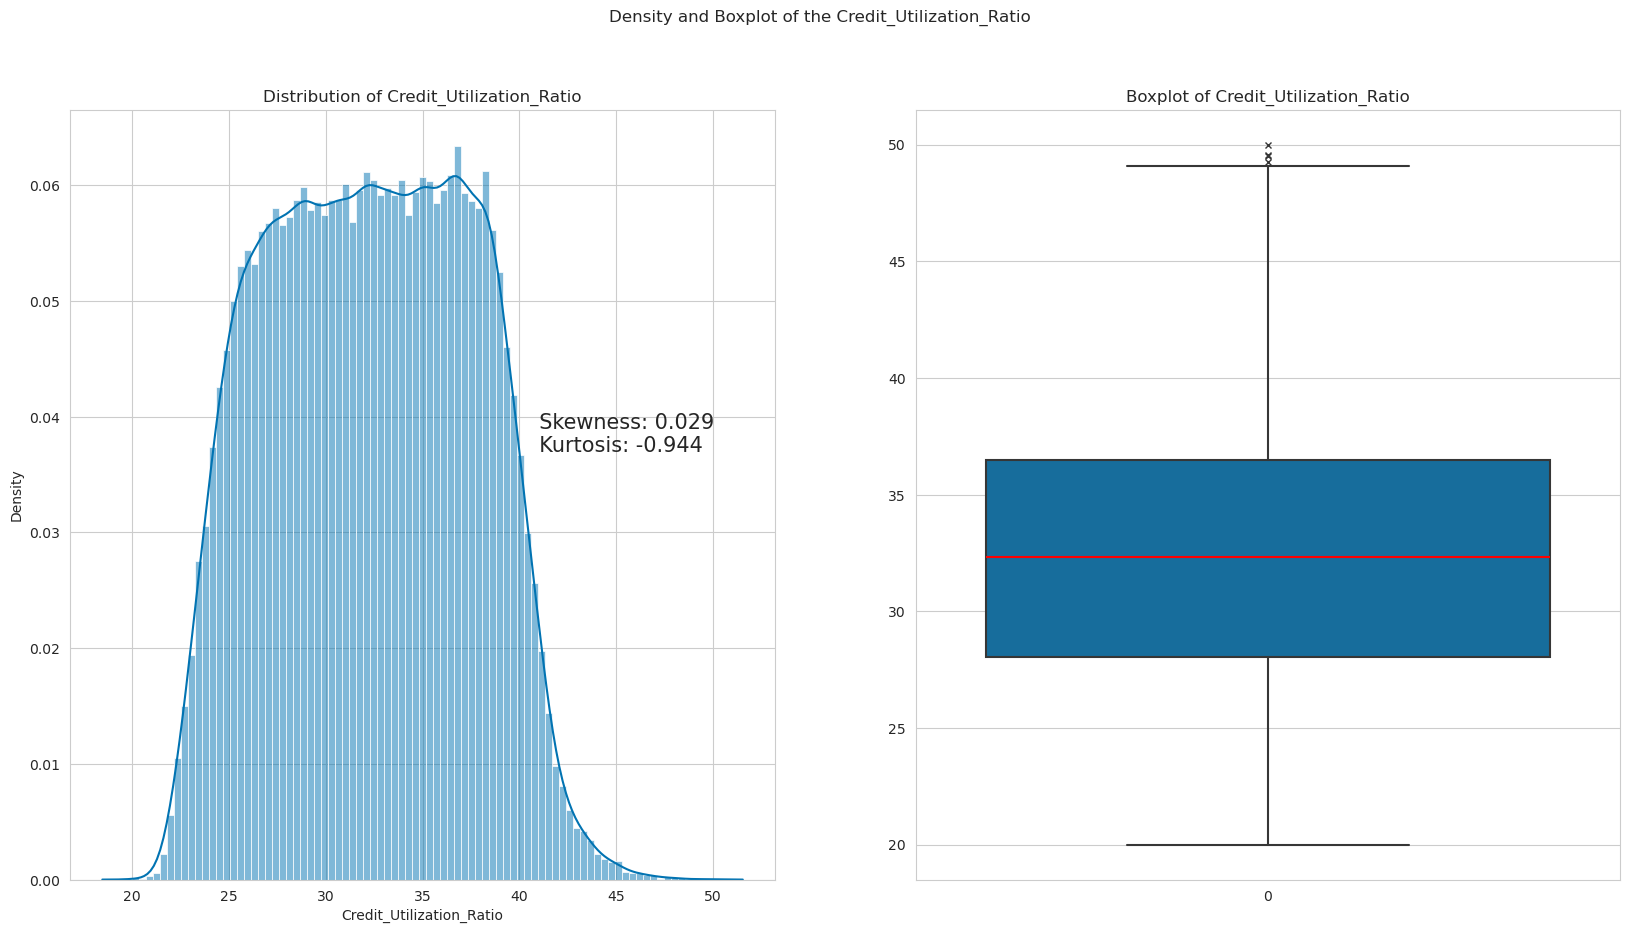

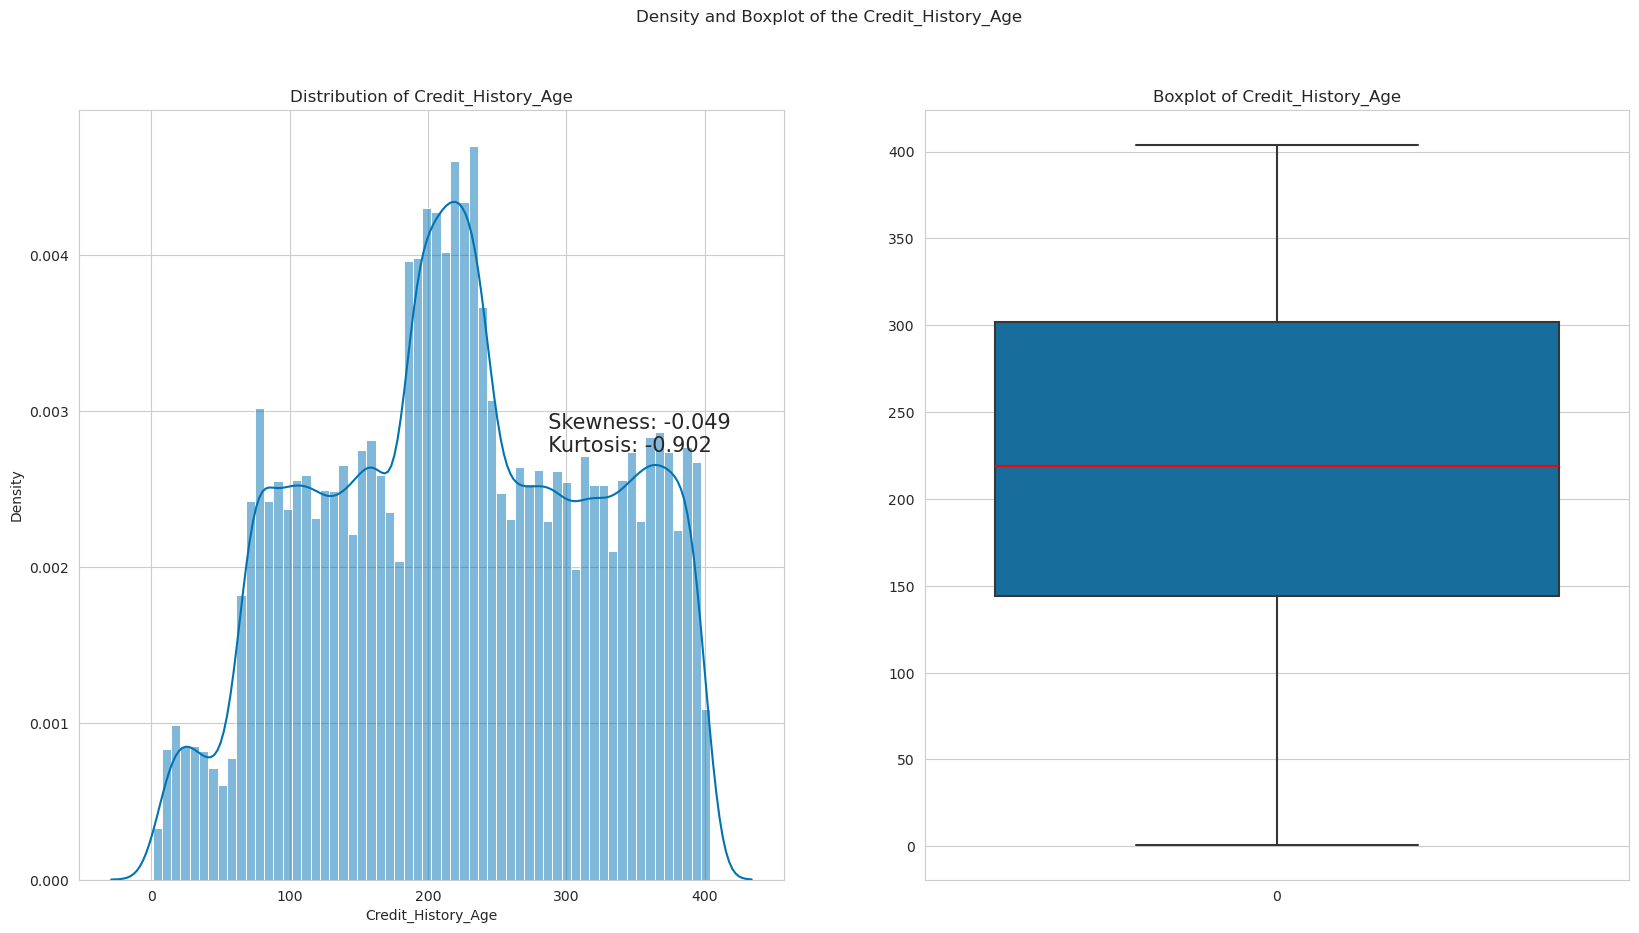

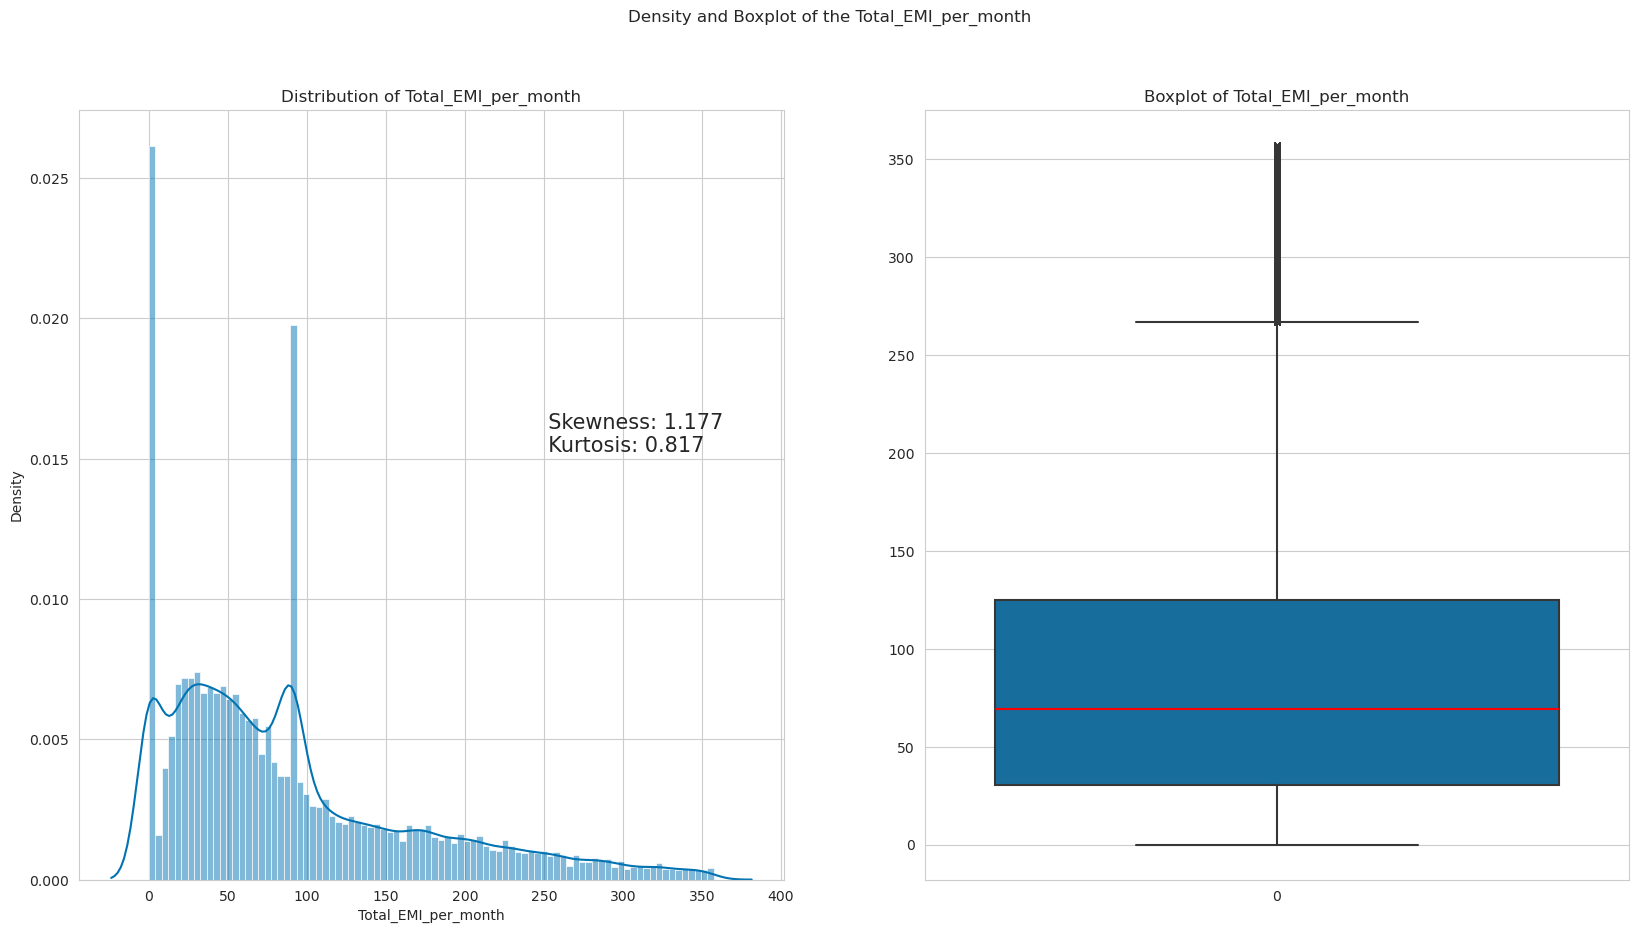

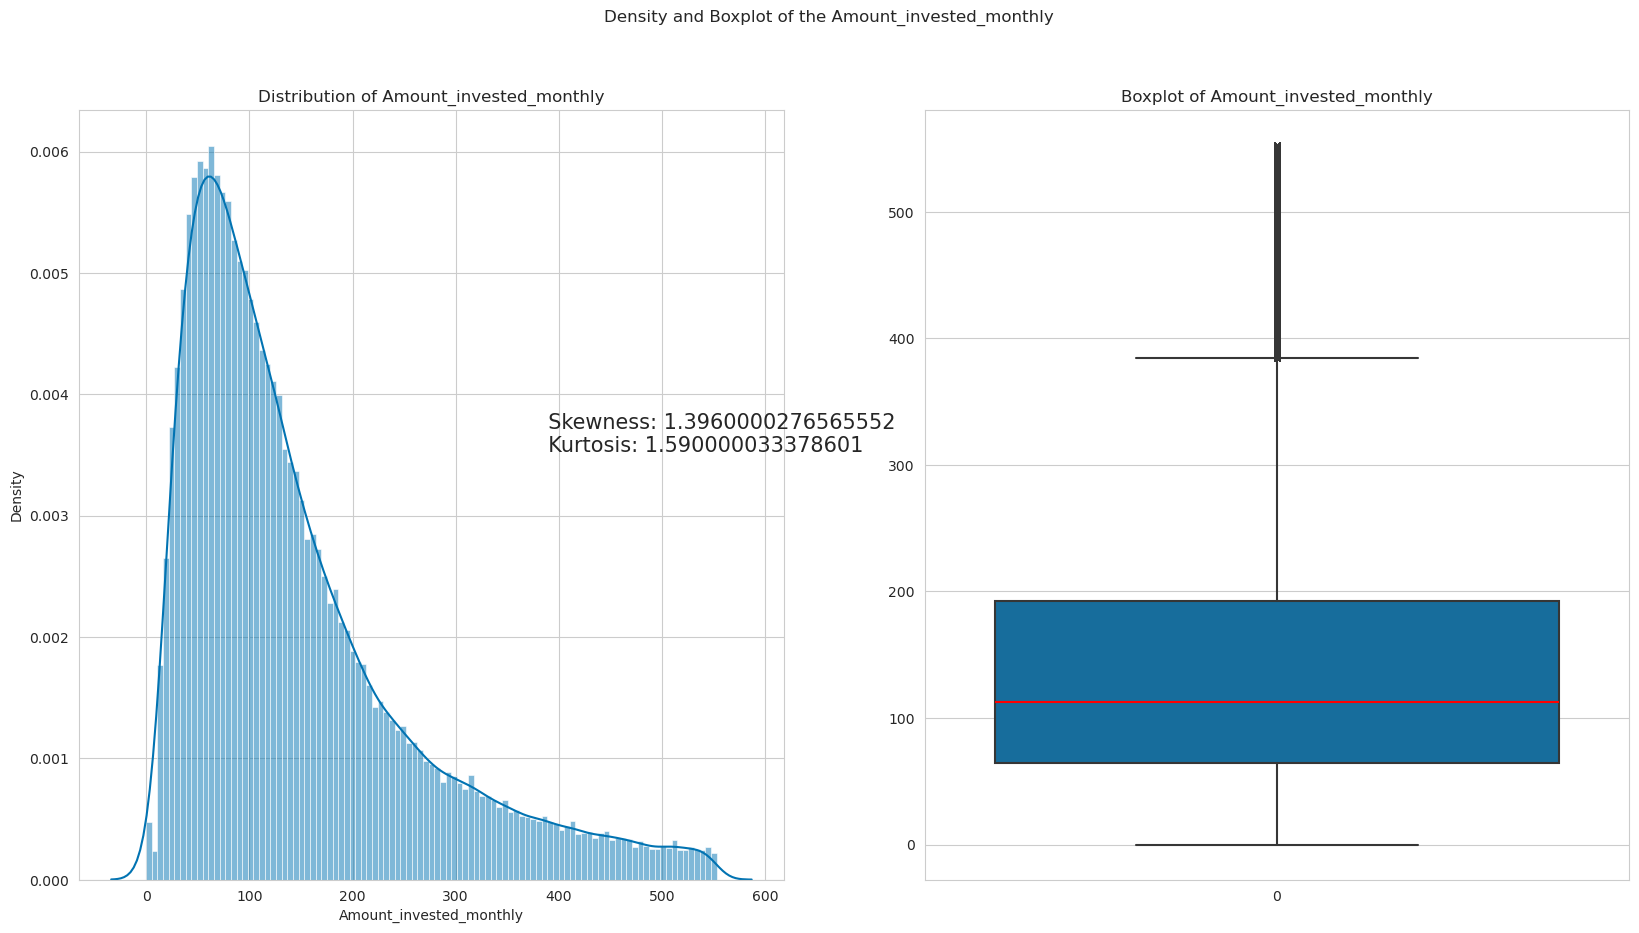

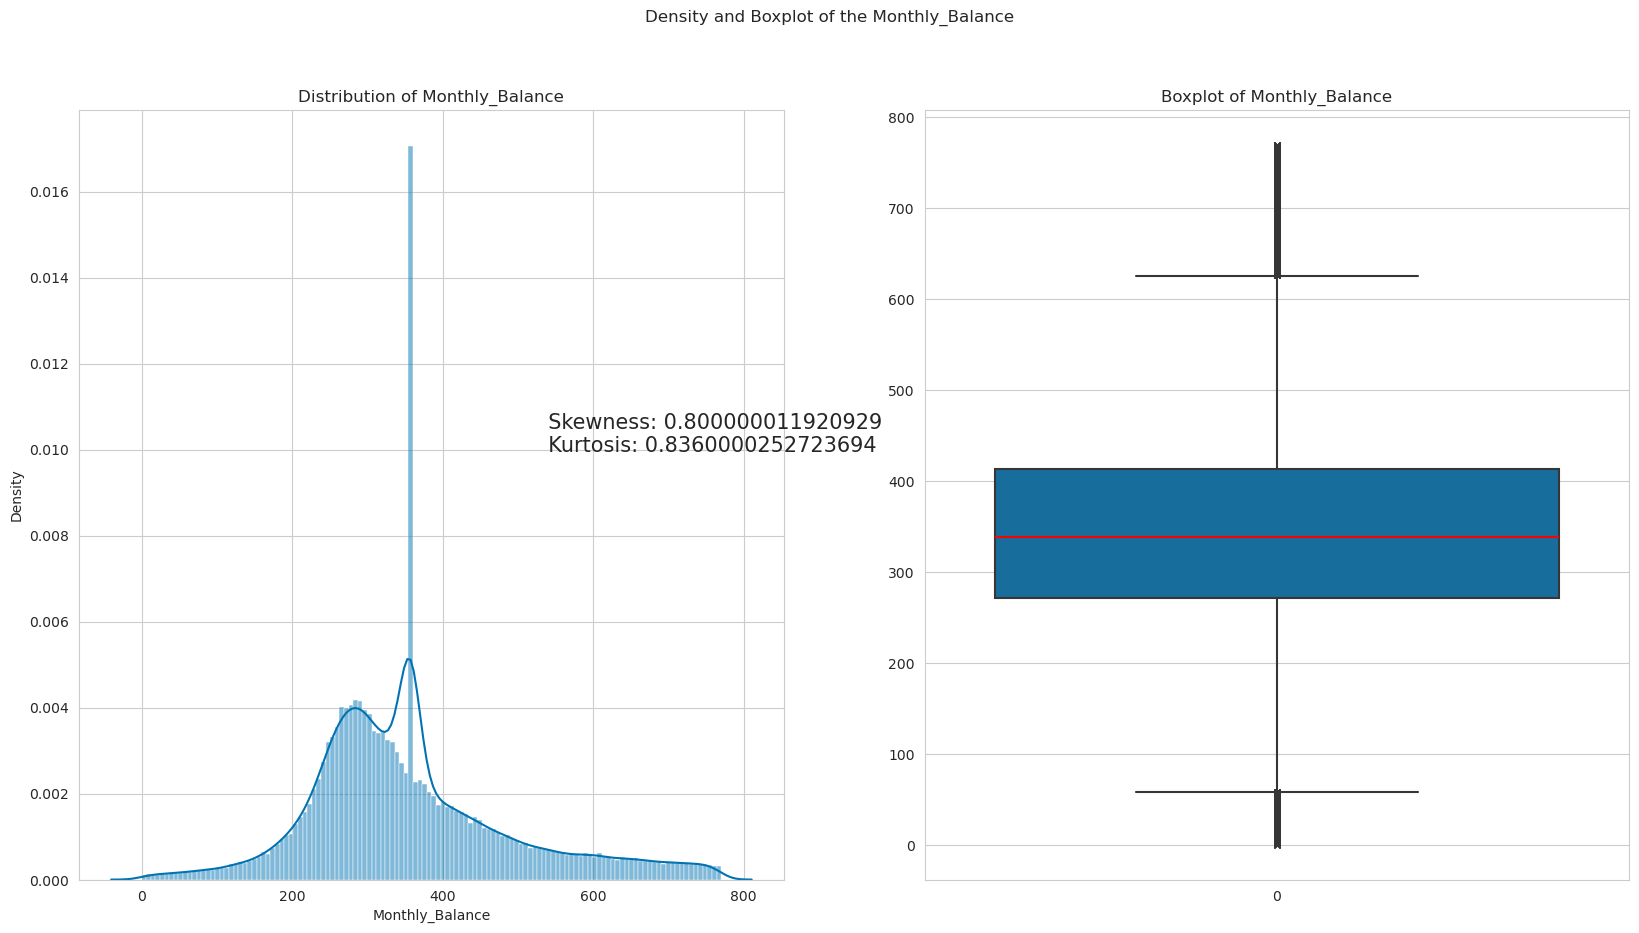

In [52]:
density_box_plotter(df_train)

Most of the data is substantially or moderately skewed hence we need to transform them.

## Data Preprocessing

In [53]:
df_train.select_dtypes(include = ['int','float']).var()

Age                         1.158726e+02
Annual_Income               1.213985e+09
Monthly_Inhand_Salary       1.015953e+07
Num_Bank_Accounts           6.725064e+00
Num_Credit_Card             4.273008e+00
Interest_Rate               7.641085e+01
Num_of_Loan                 5.984172e+00
Delay_from_due_date         1.568514e+02
Num_of_Delayed_Payment      3.531718e+01
Changed_Credit_Limit        3.931497e+01
Num_Credit_Inquiries        1.447767e+01
Outstanding_Debt            1.334324e+06
Credit_Utilization_Ratio    2.618241e+01
Credit_History_Age          9.936049e+03
Total_EMI_per_month         6.386870e+03
Amount_invested_monthly     1.275073e+04
Monthly_Balance             1.821309e+04
dtype: float64

Due to the high variance on the Annual Income and the Monthly Salary we need to transform these columns. We use log transformation for high variance.

In [54]:
# Feature to transform
log_trans_col = ['Annual_Income', 'Monthly_Inhand_Salary']

# Defining log transformer
log_transformer = FunctionTransformer(np.log1p)

for col in log_trans_col:
    df_train[col] = log_transformer.fit_transform(df_train[col])

For the rest of the data we use Power Transformation to make the date more like Gaussian-like.

In [55]:
# Features to transform
pt_trans_col = ['Outstanding_Debt', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
                'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Credit_Inquiries']

# Defining Power Transformer
pt_transformer = PowerTransformer(method = 'yeo-johnson', standardize = True)

for col in pt_trans_col:
    df_train[col] = pt_transformer.fit_transform(df_train[col].values.reshape(-1,1))

### Ordinal encoding

In [56]:
ord_enc_cols = ['Payment_Behaviour', 'Credit_Mix', 'Credit_Score', 'Payment_of_Min_Amount']
ord_encoder = OrdinalEncoder()
for col in ord_enc_cols:
    df_train[col] = ord_encoder.fit_transform(df_train[col].values.reshape(-1,1))

### One Hot encoding

In [57]:
encoder = LabelBinarizer()
encoder.fit(df_train['Occupation'])
transformed = encoder.transform(df_train['Occupation'])
ohe_df = pd.DataFrame(transformed, columns = encoder.classes_)
df_train = pd.concat([df_train, ohe_df], axis=1).drop(['Occupation'], axis=1)

In [58]:
freq_map = df_train['Type_of_Loan'].value_counts(normalize=True).to_dict()
df_train['Type_of_Loan'] = df_train['Type_of_Loan'].map(freq_map)

<Axes: xlabel='Credit_Score', ylabel='count'>

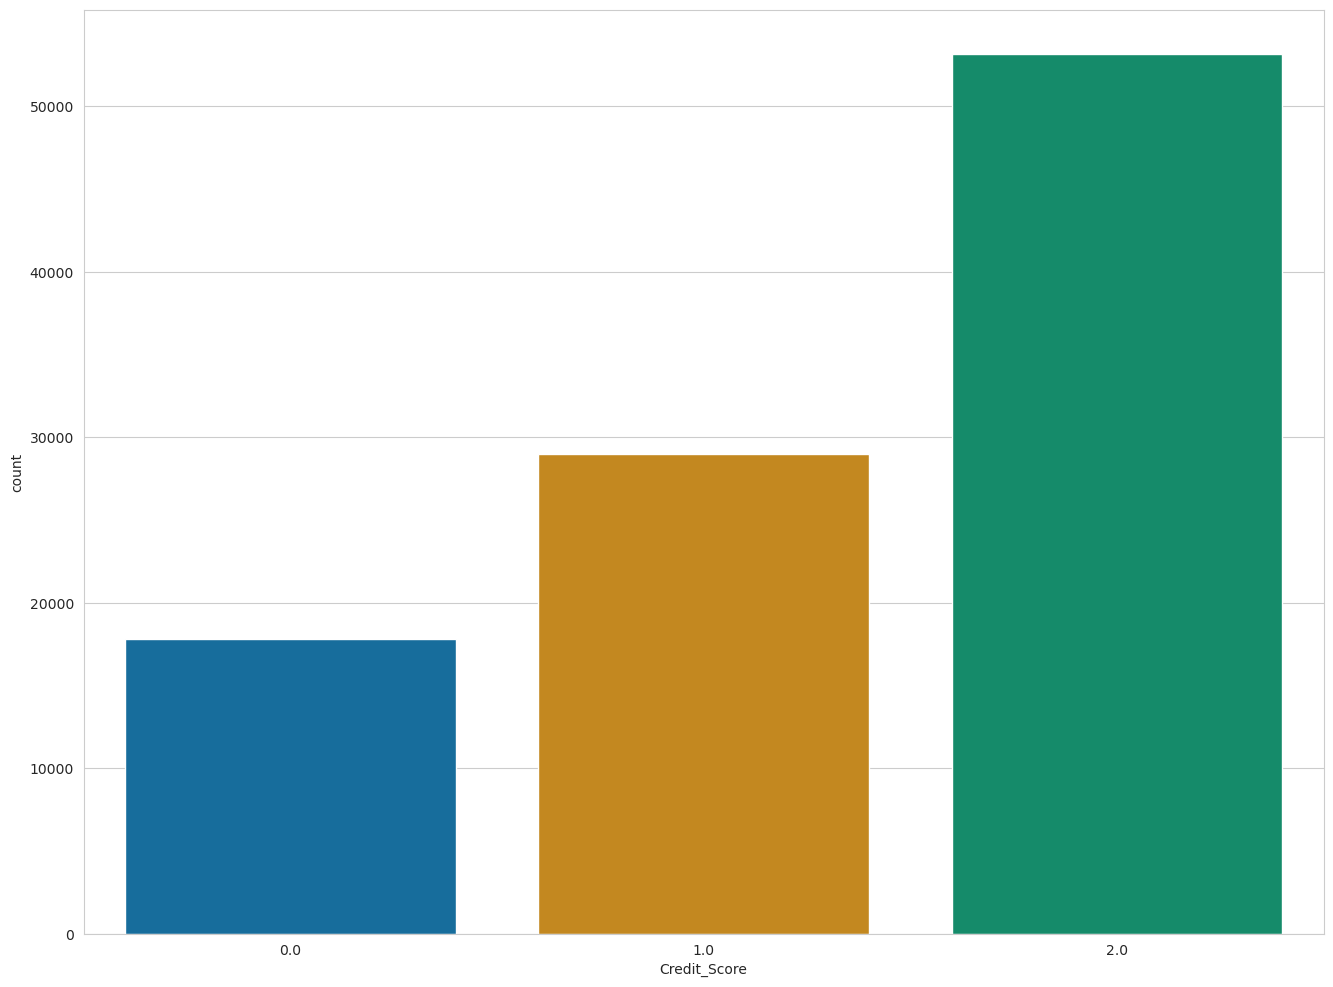

In [59]:
sns.countplot(data = df_train, x = 'Credit_Score')

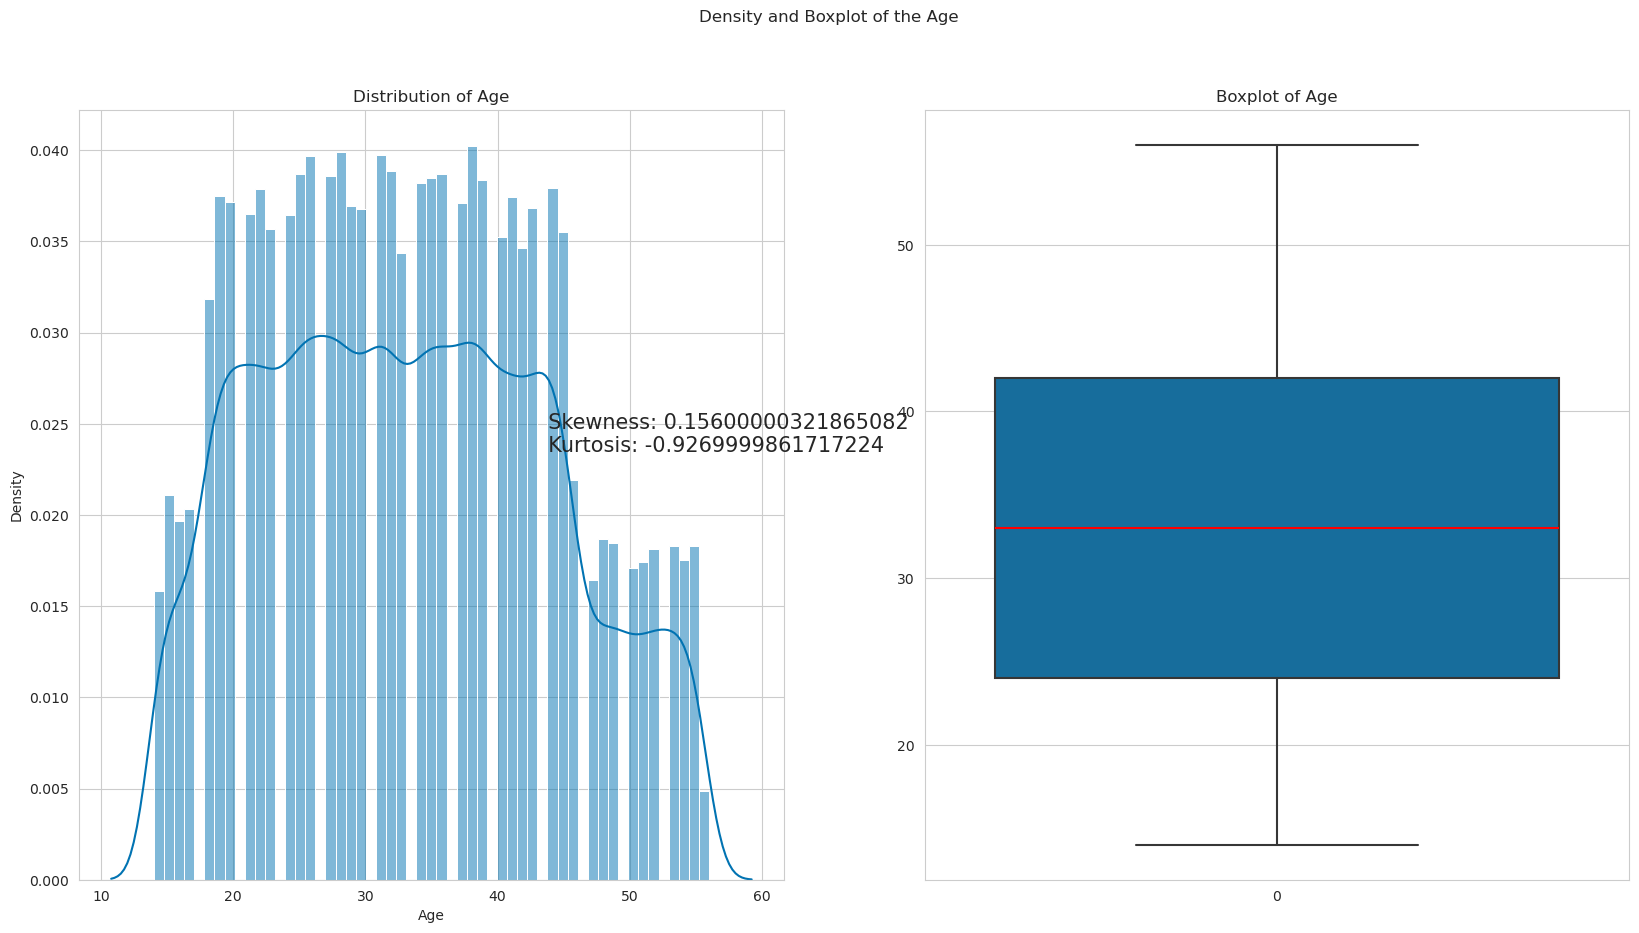

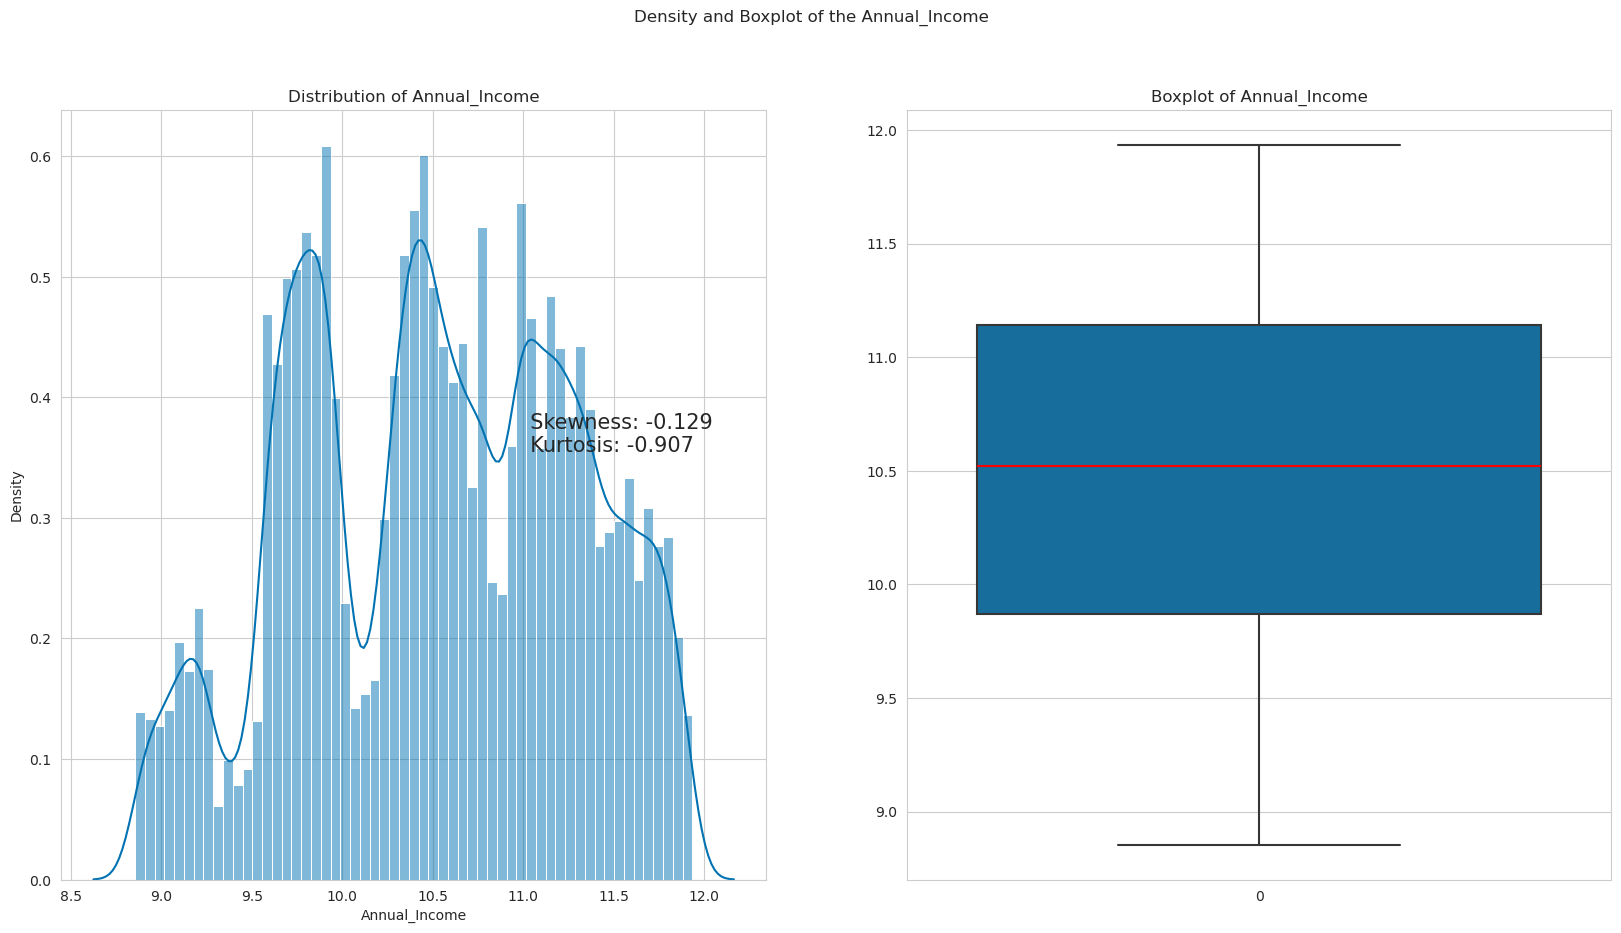

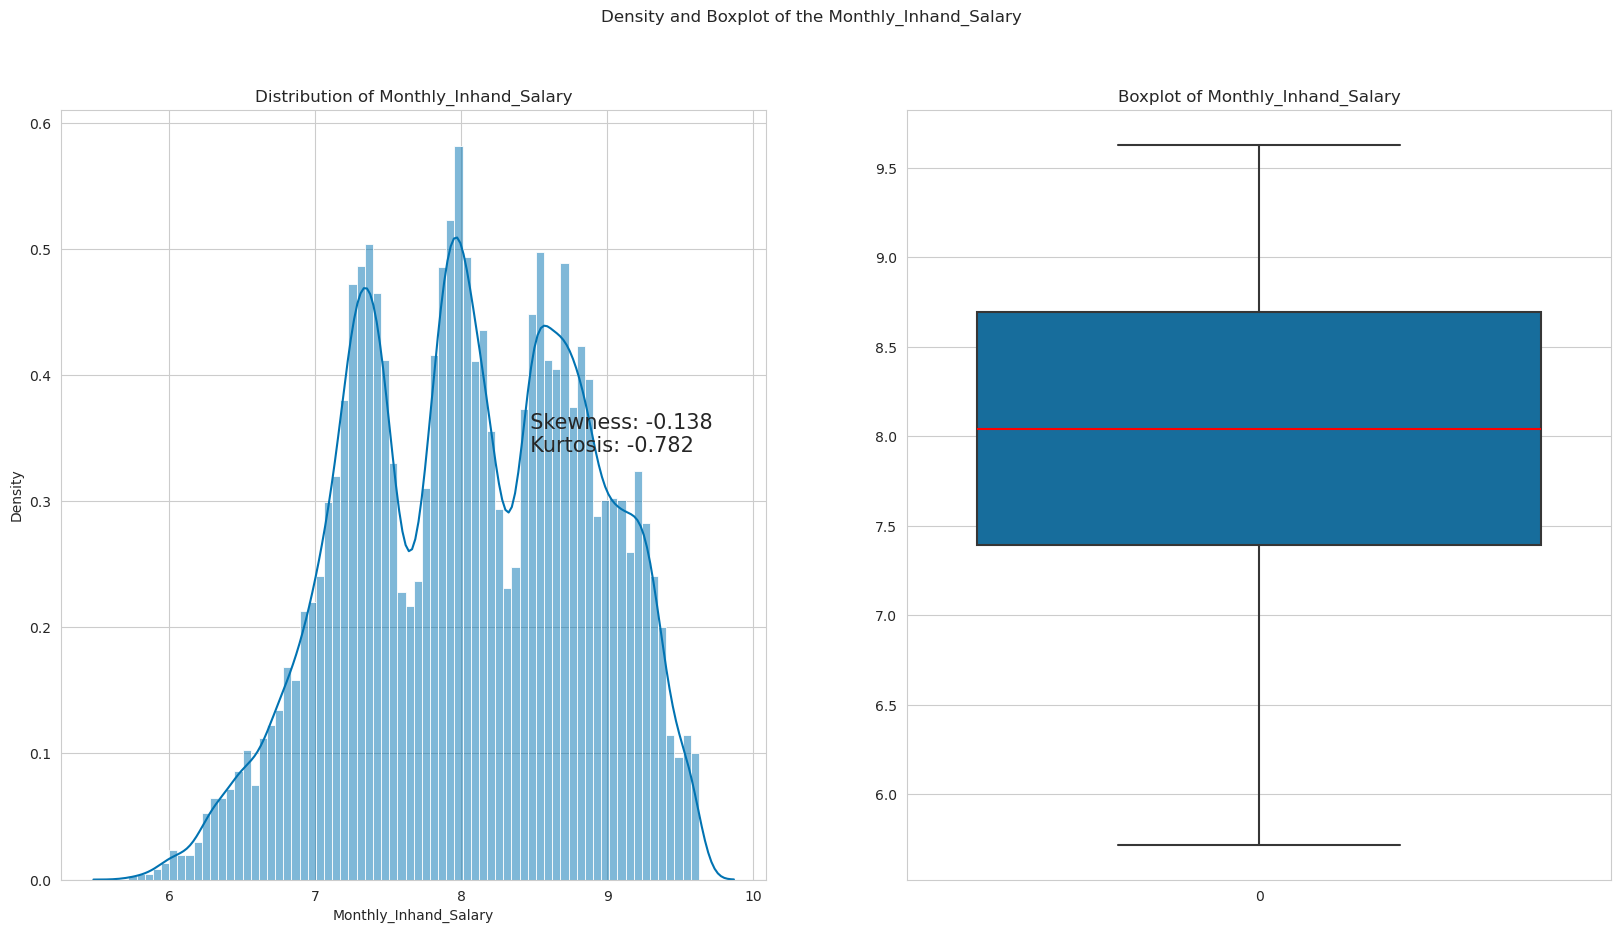

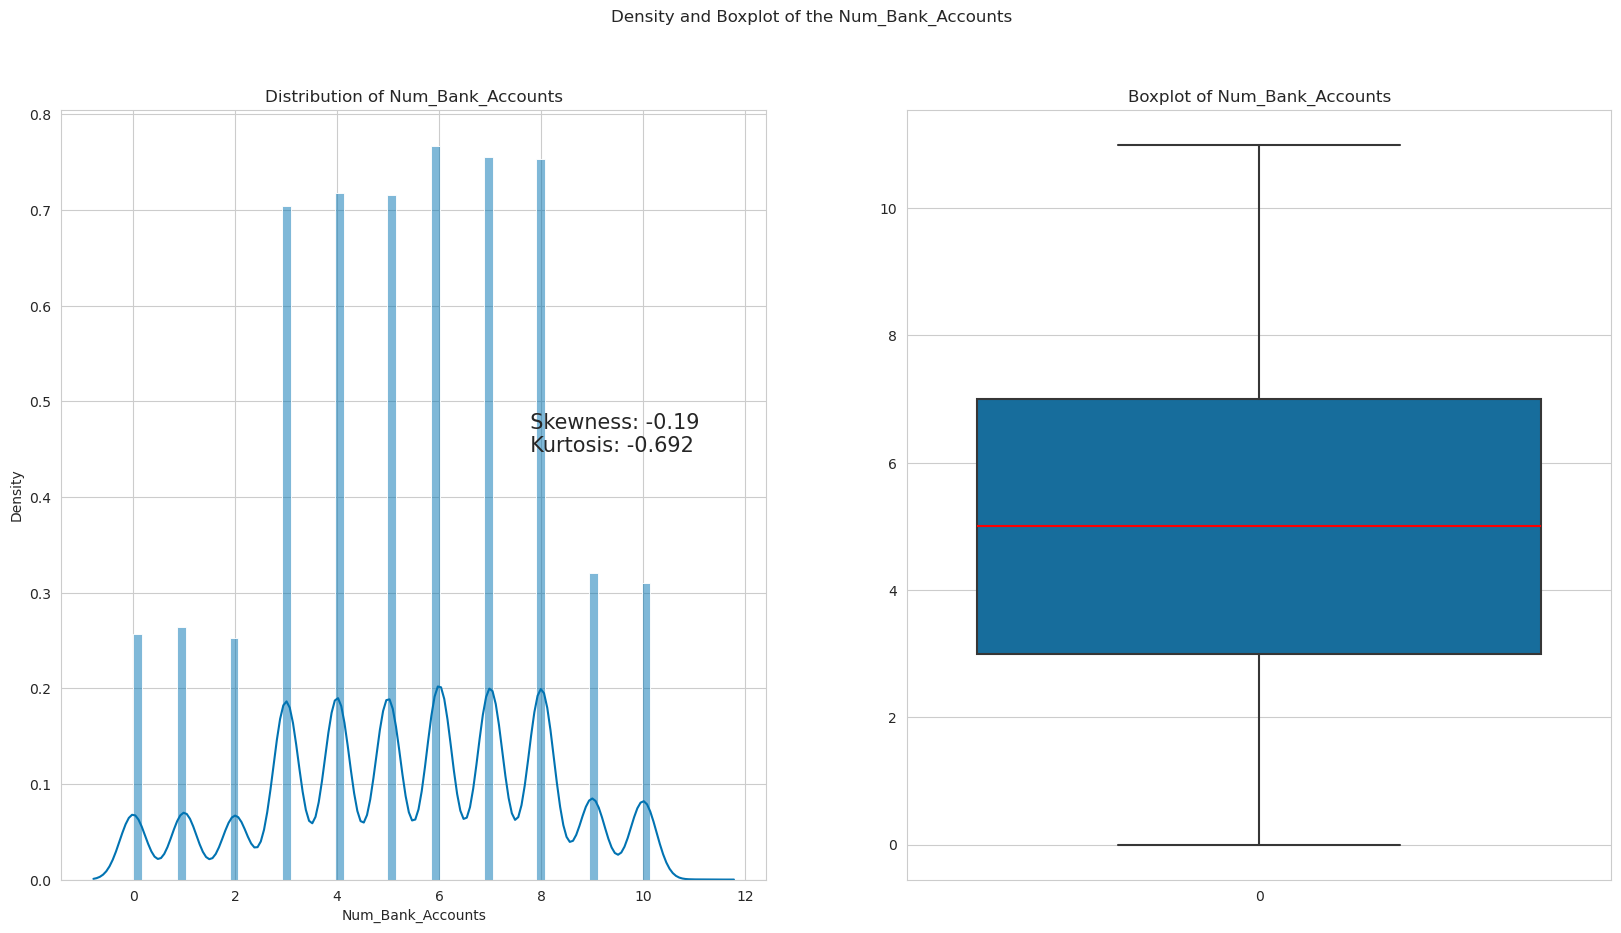

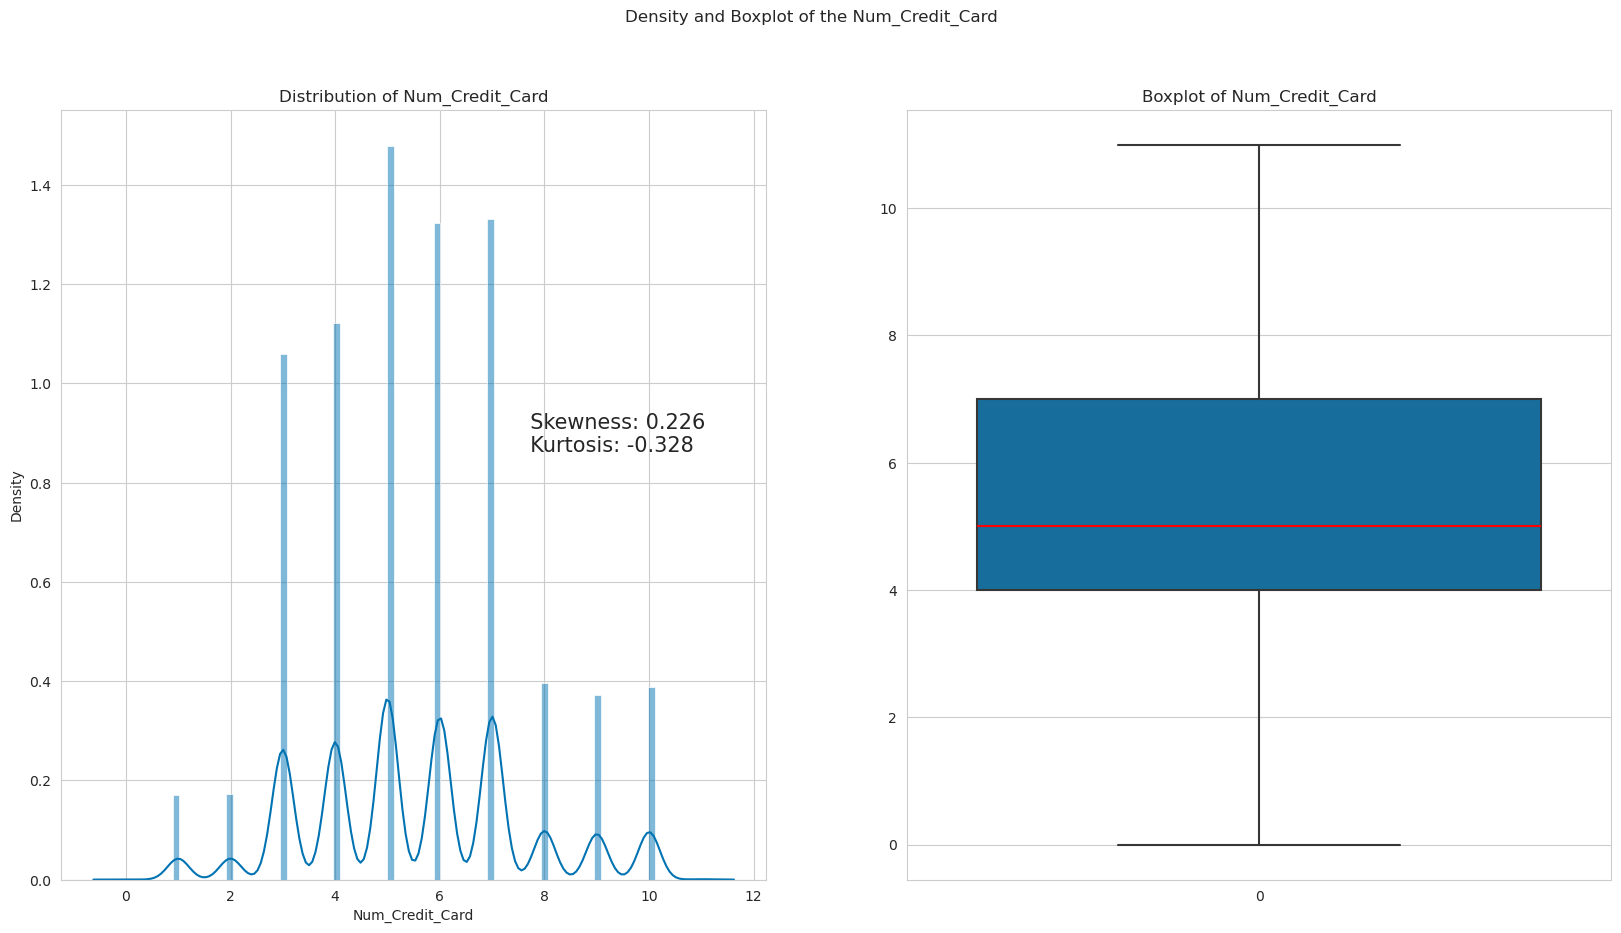

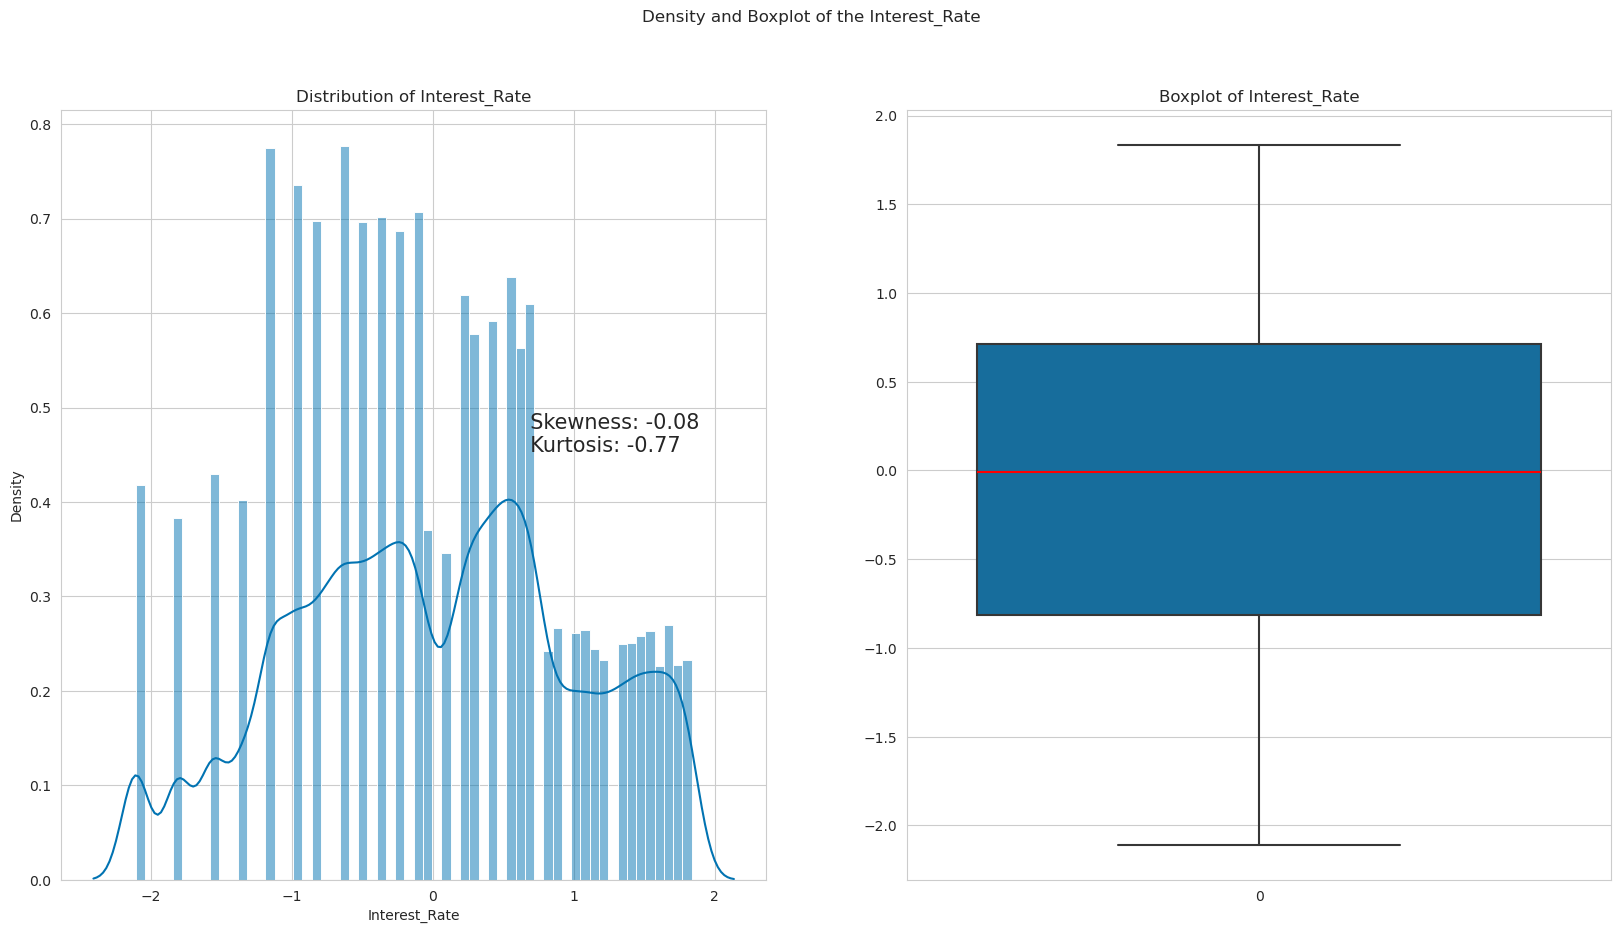

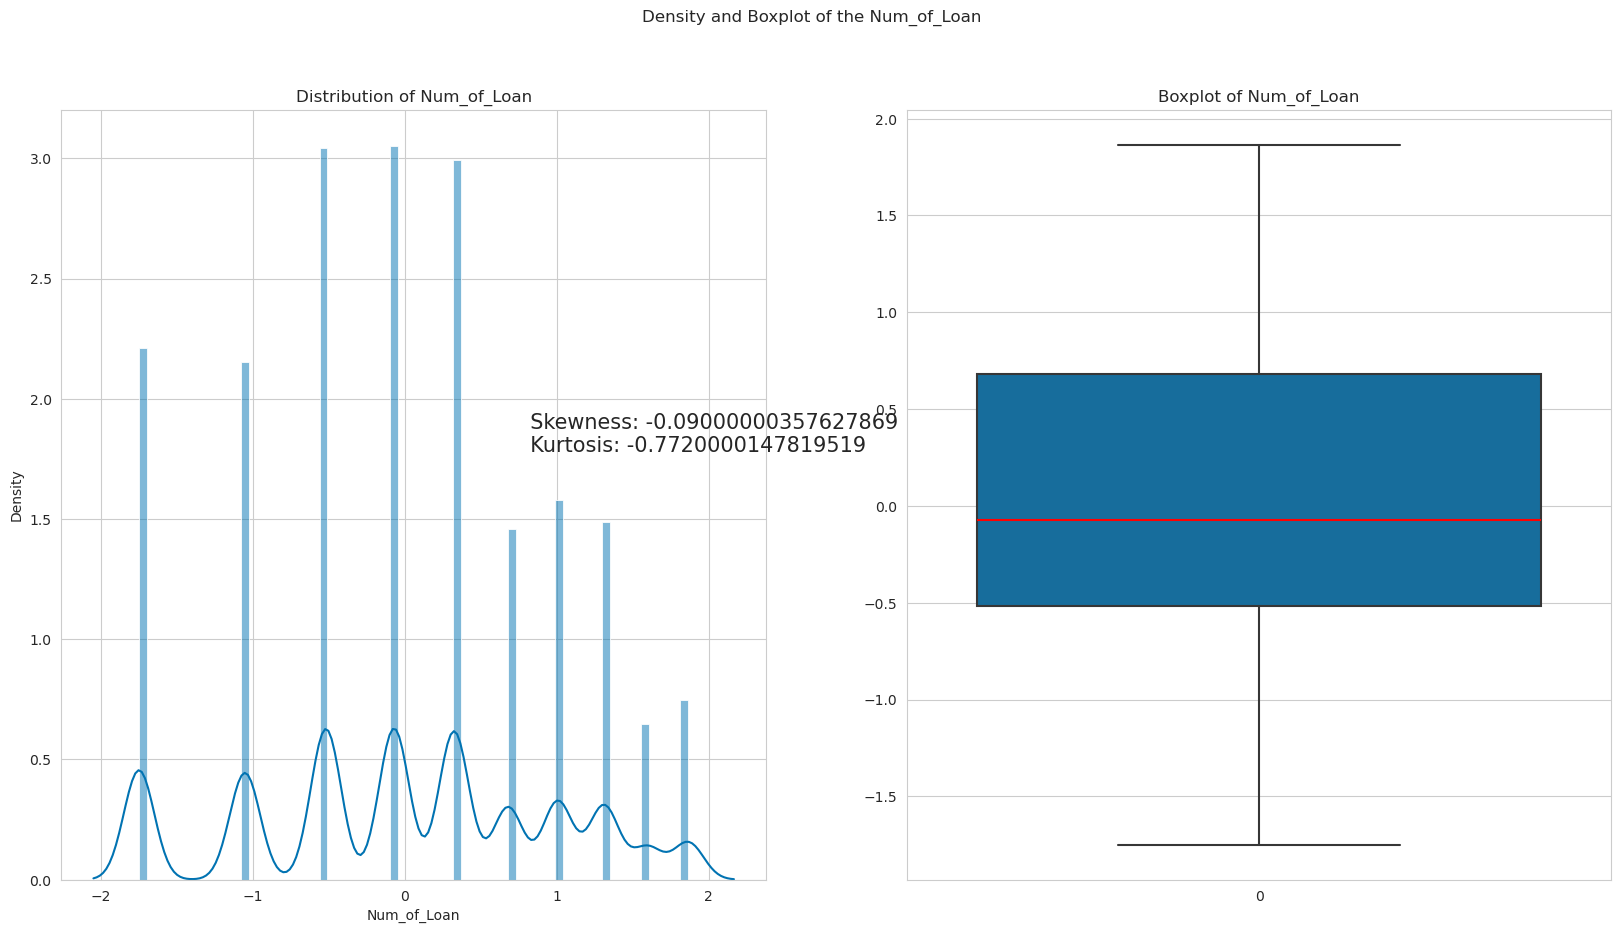

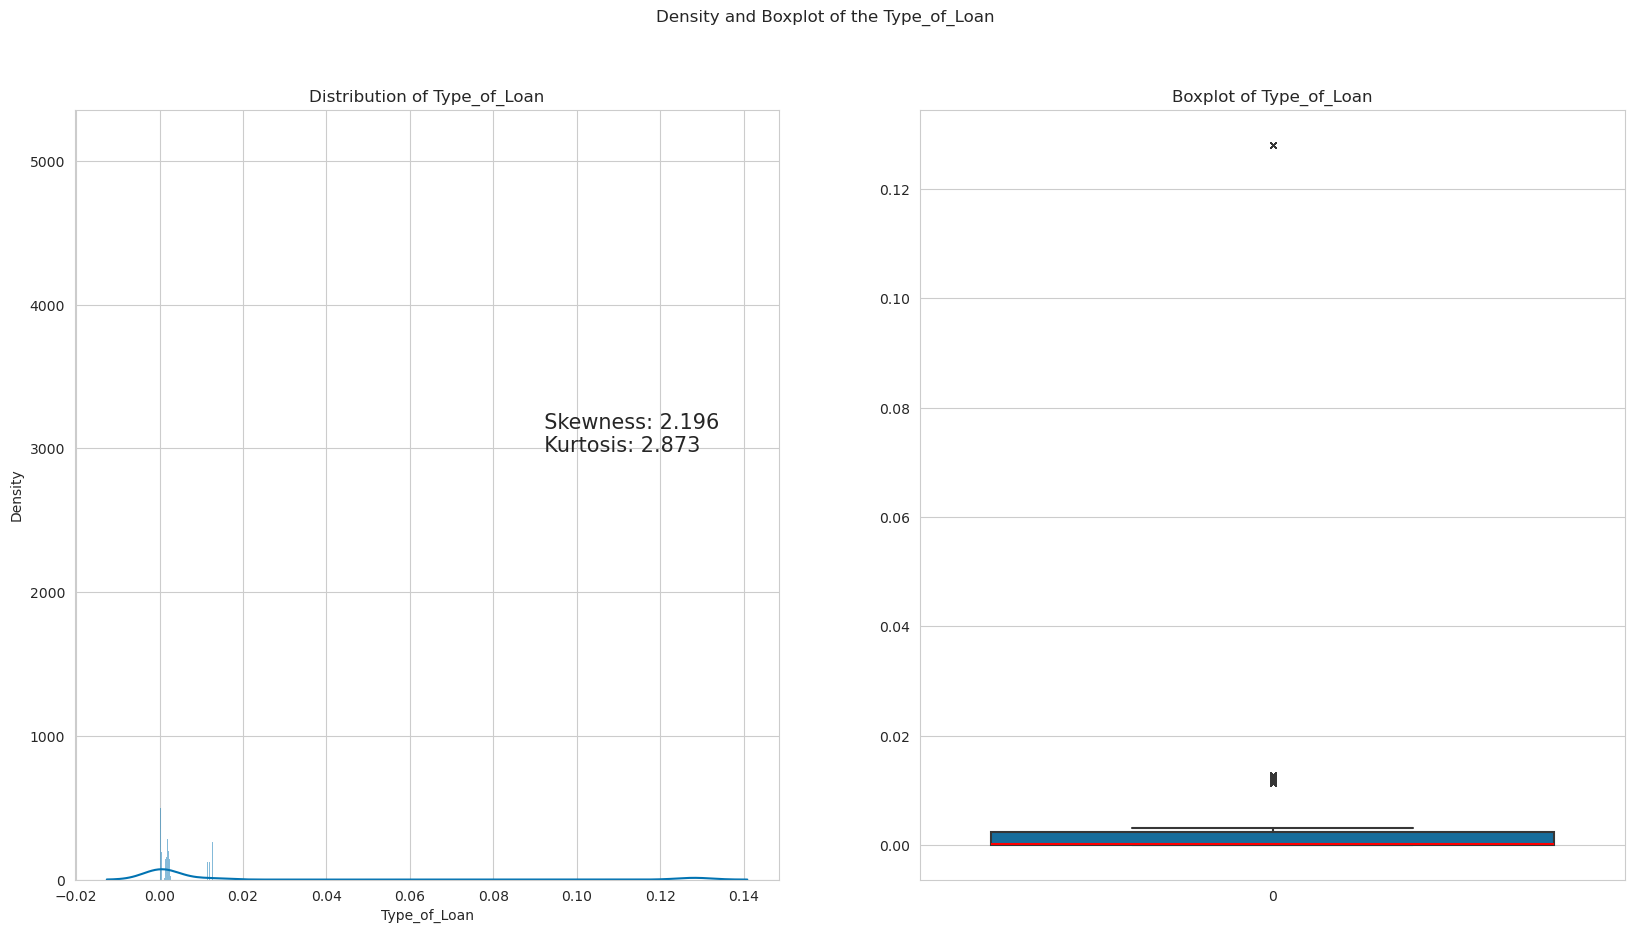

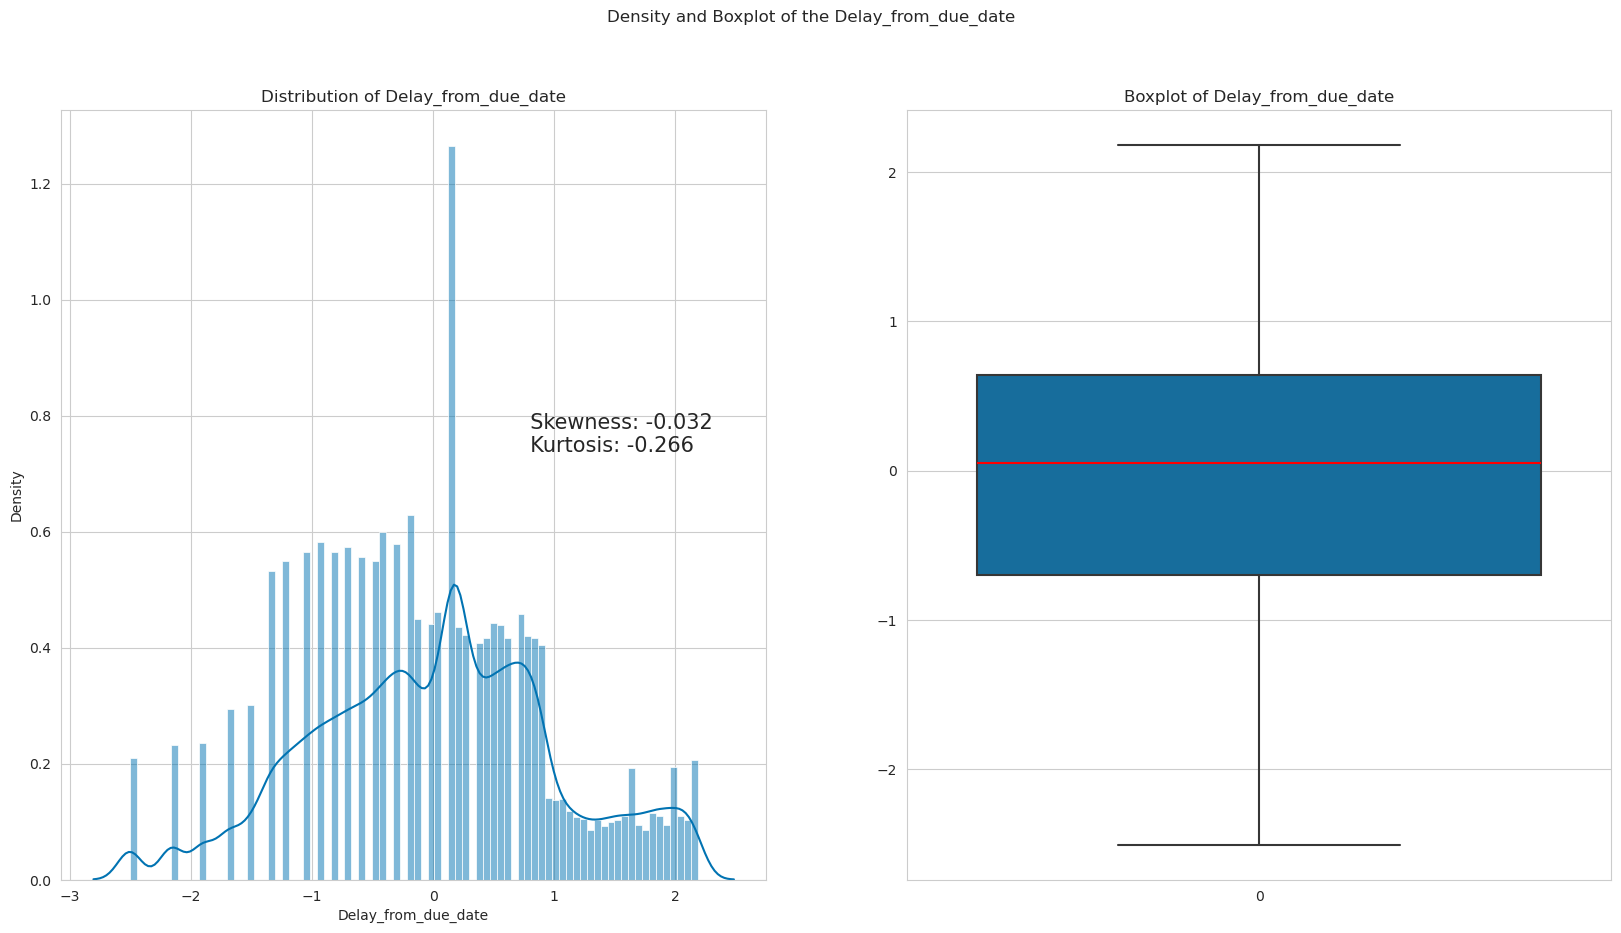

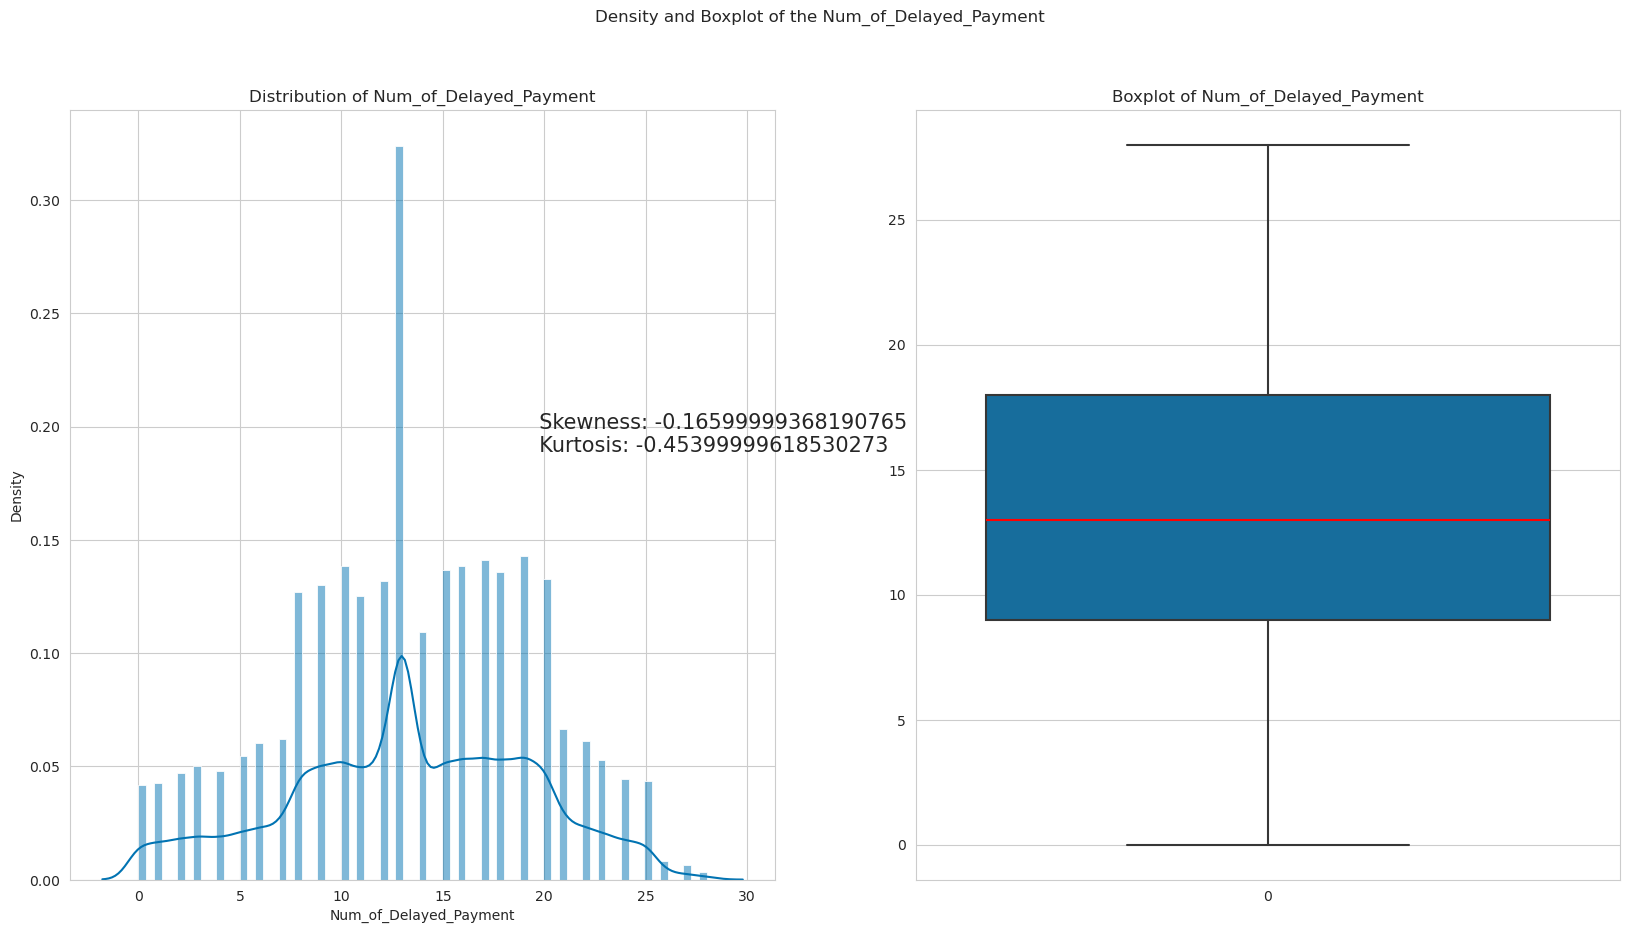

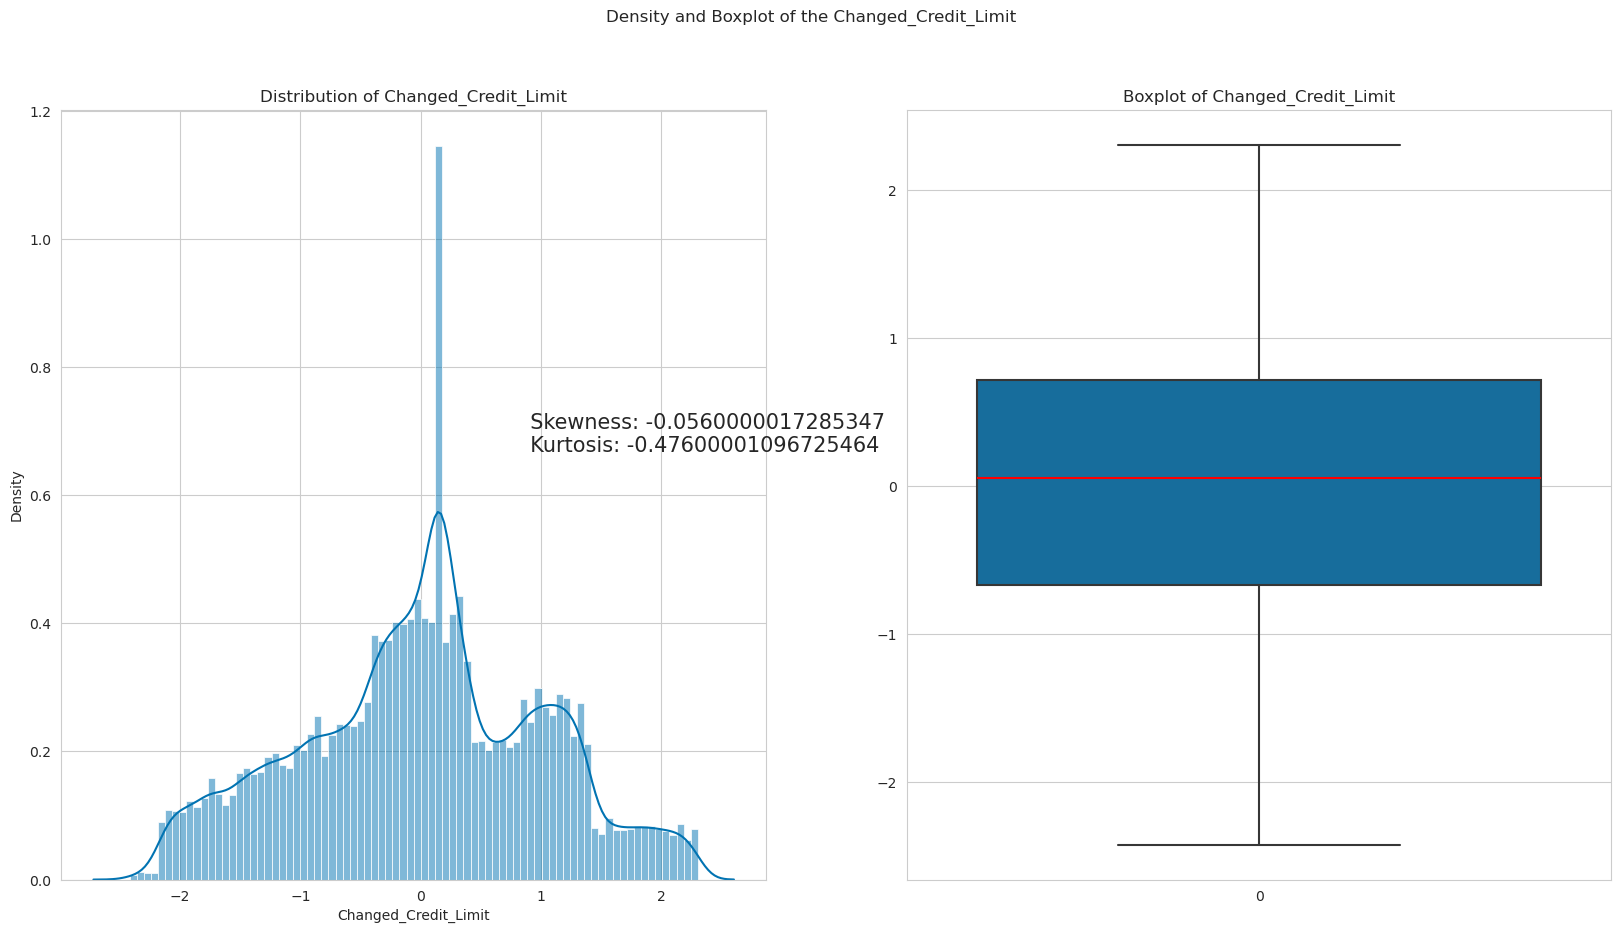

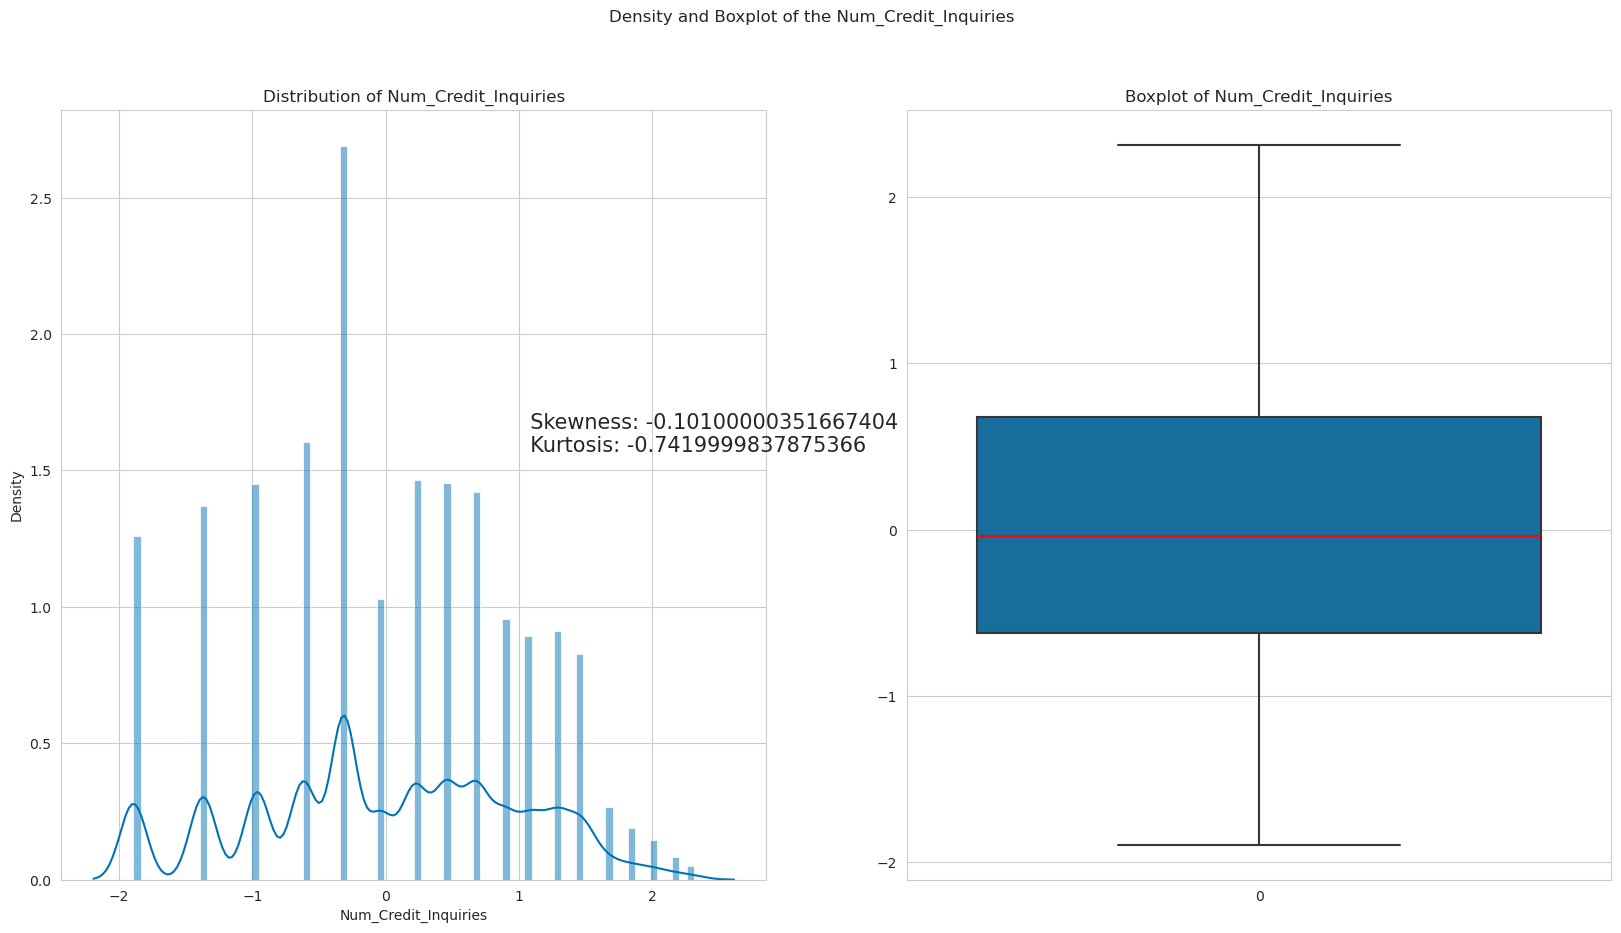

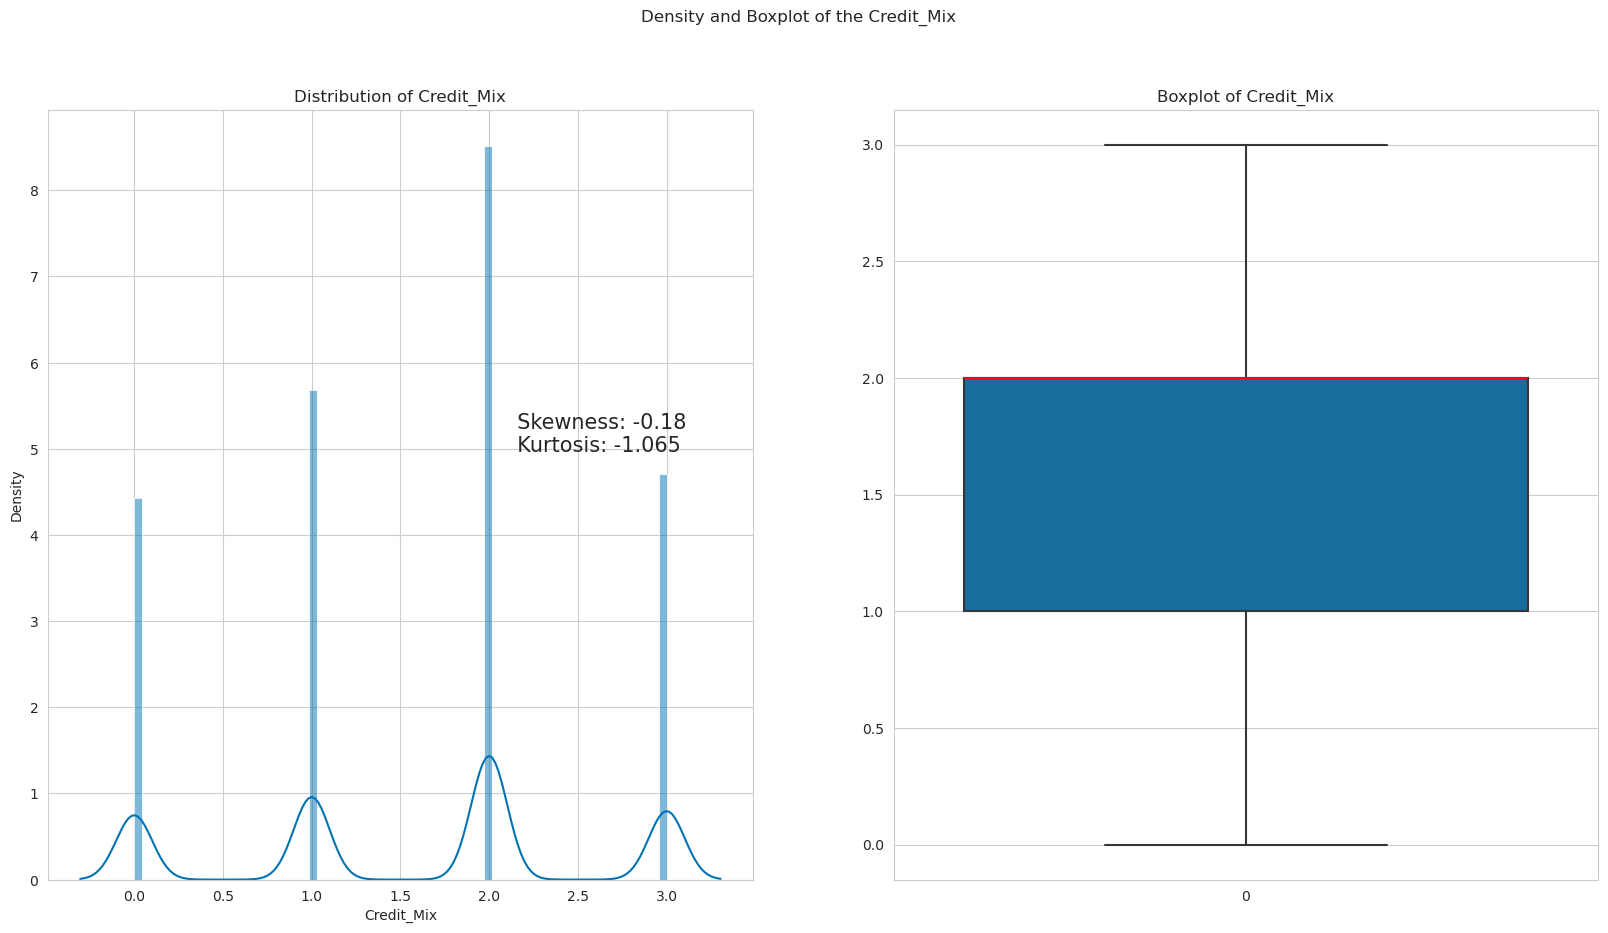

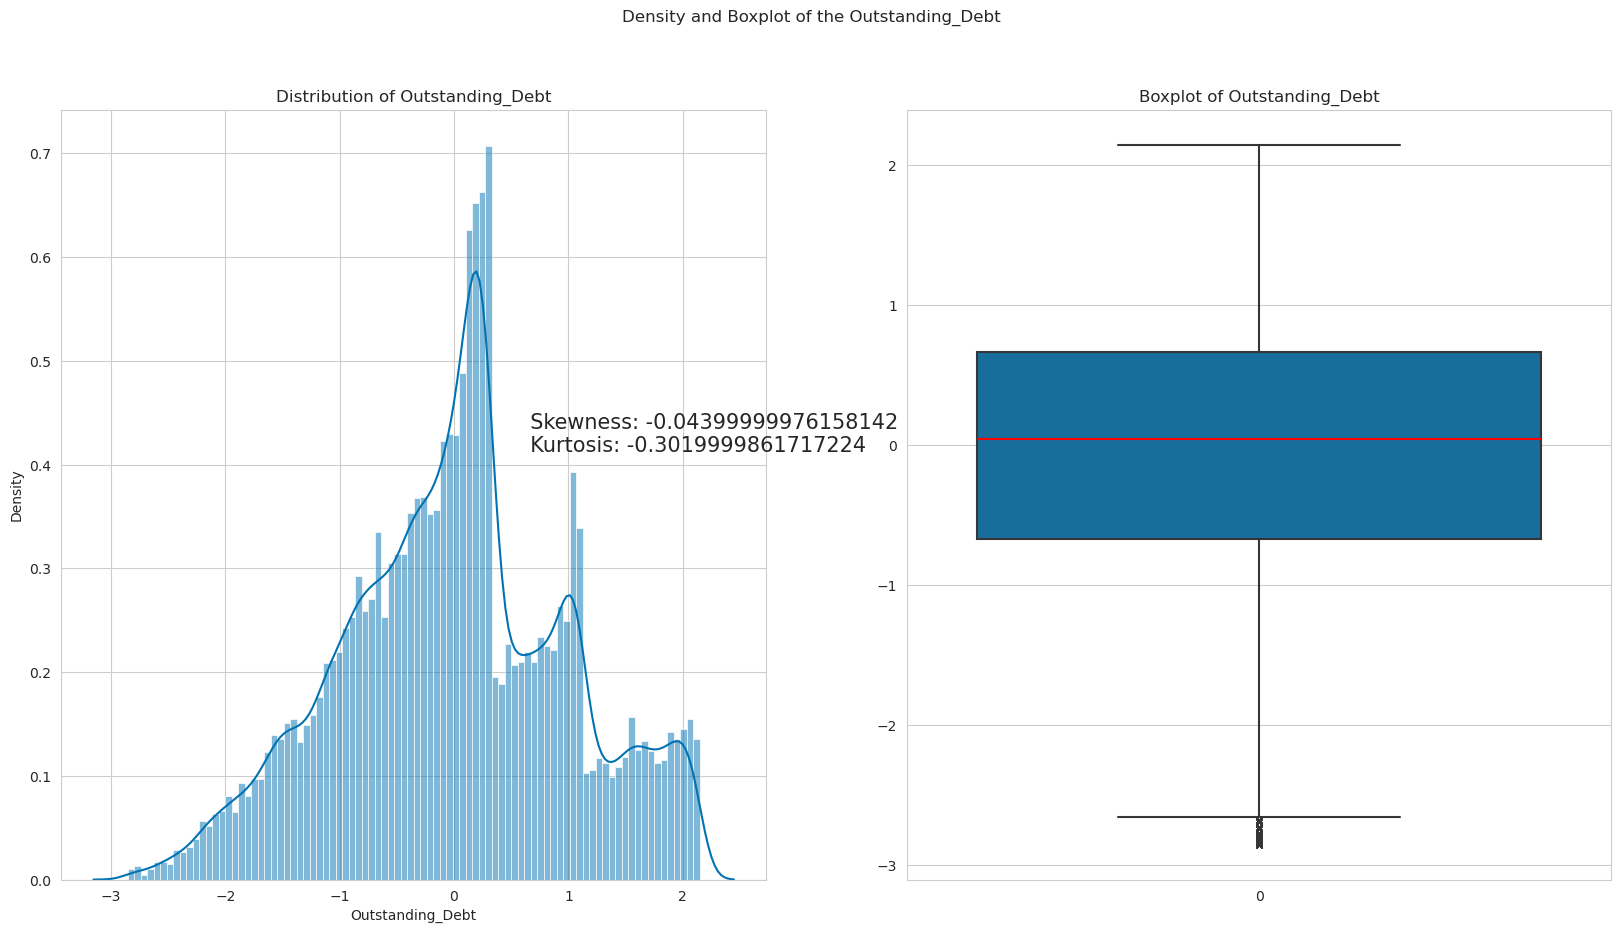

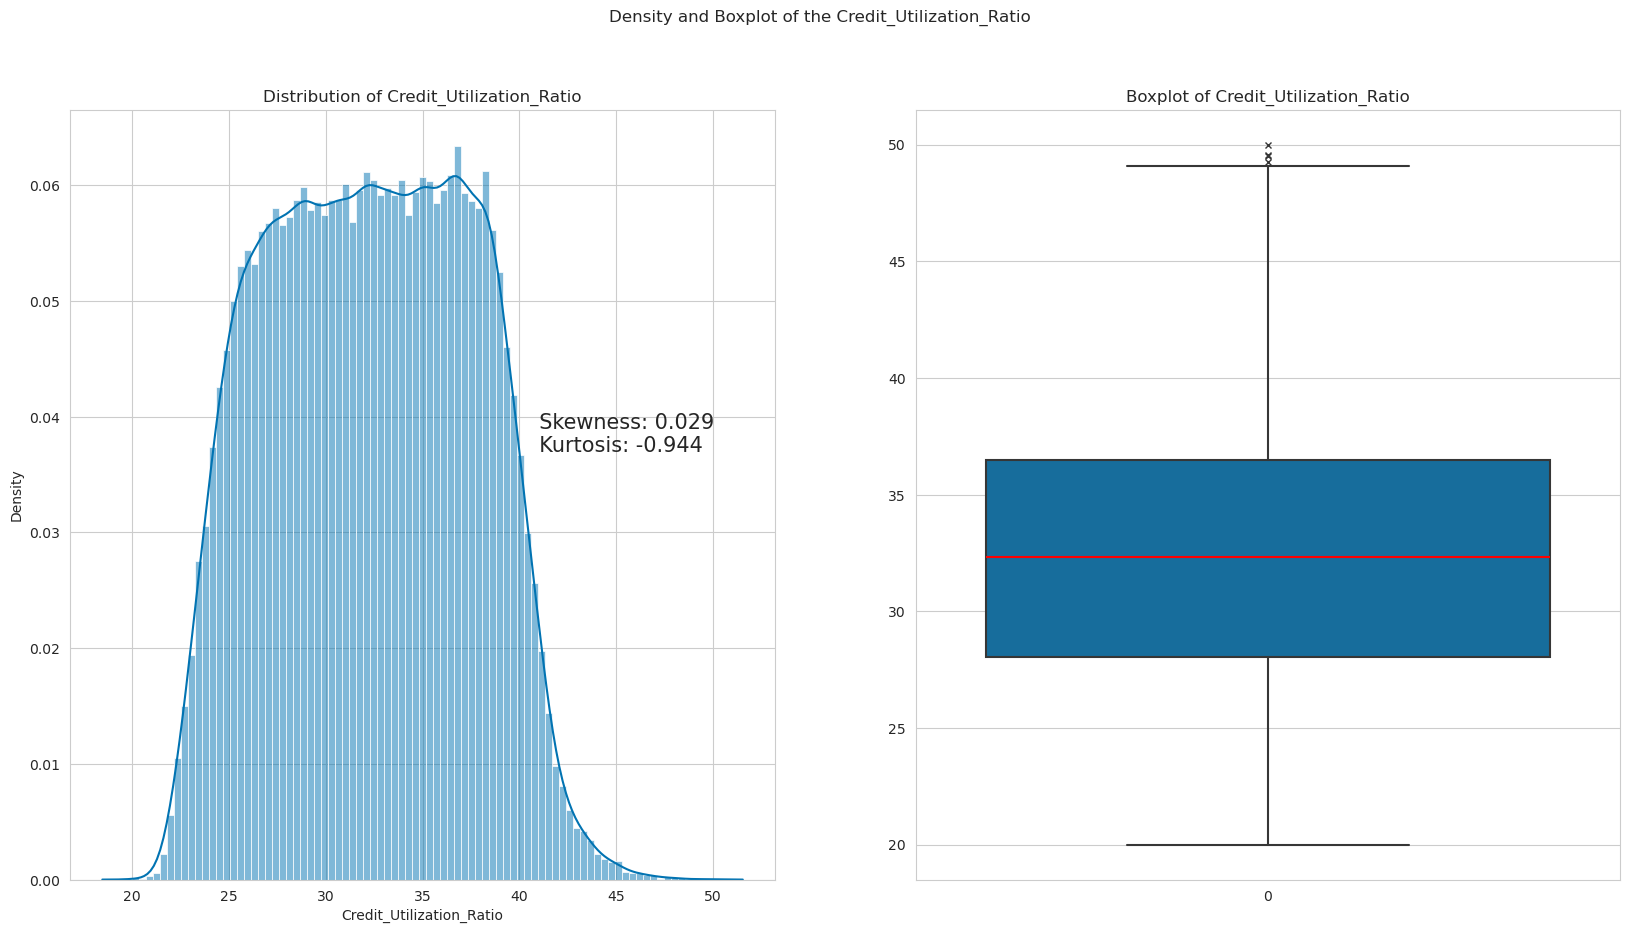

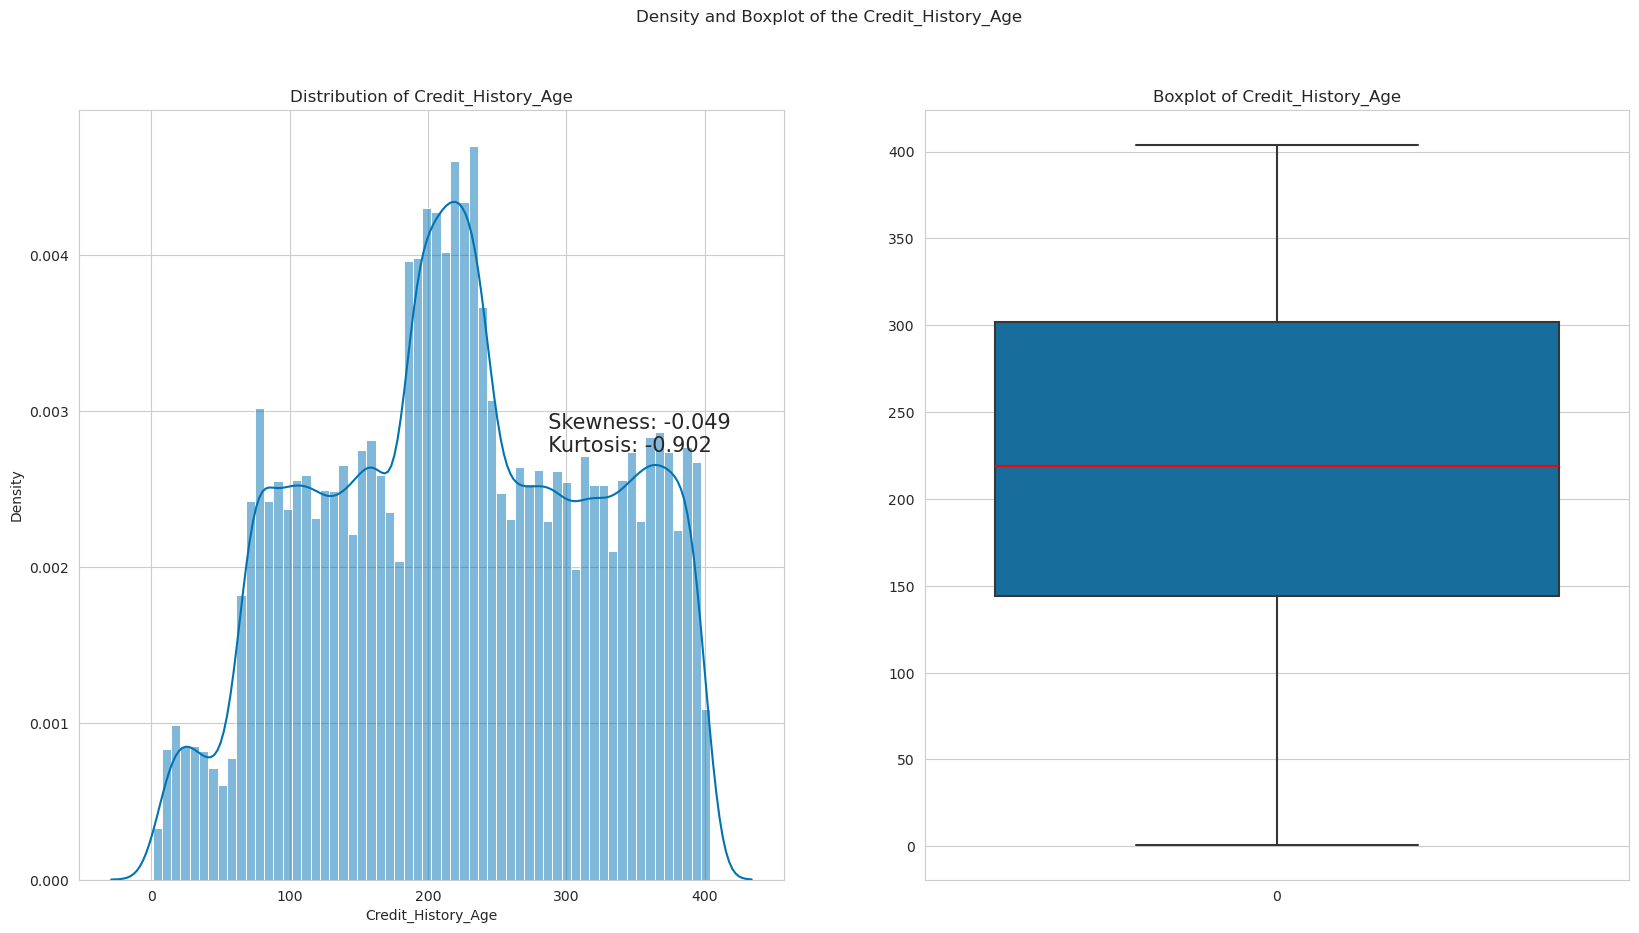

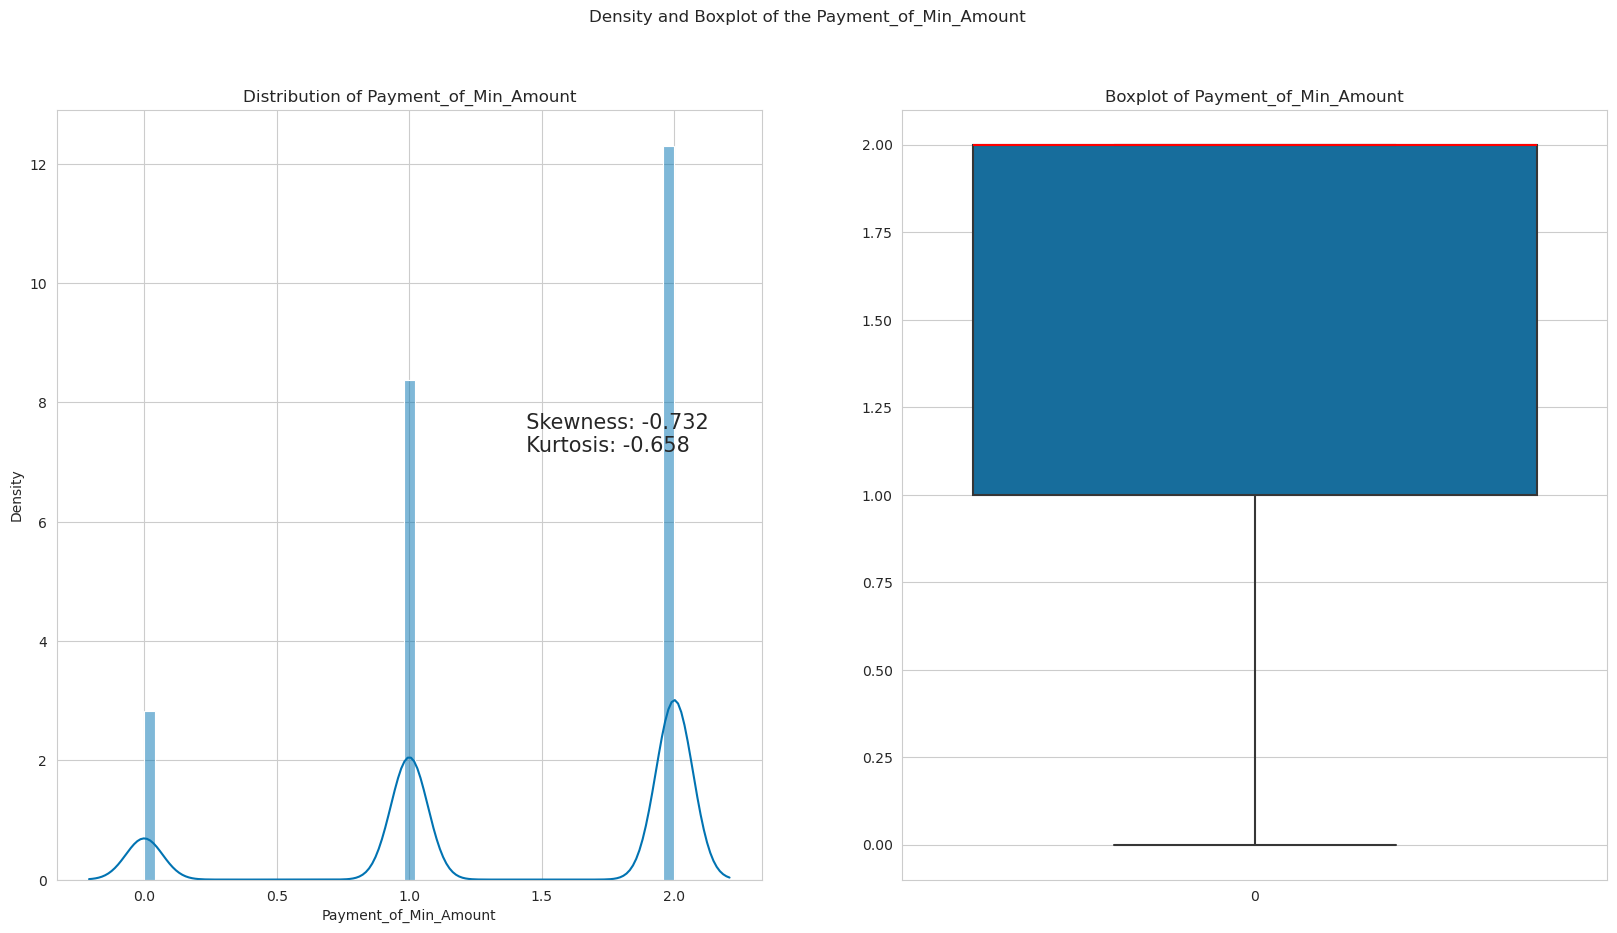

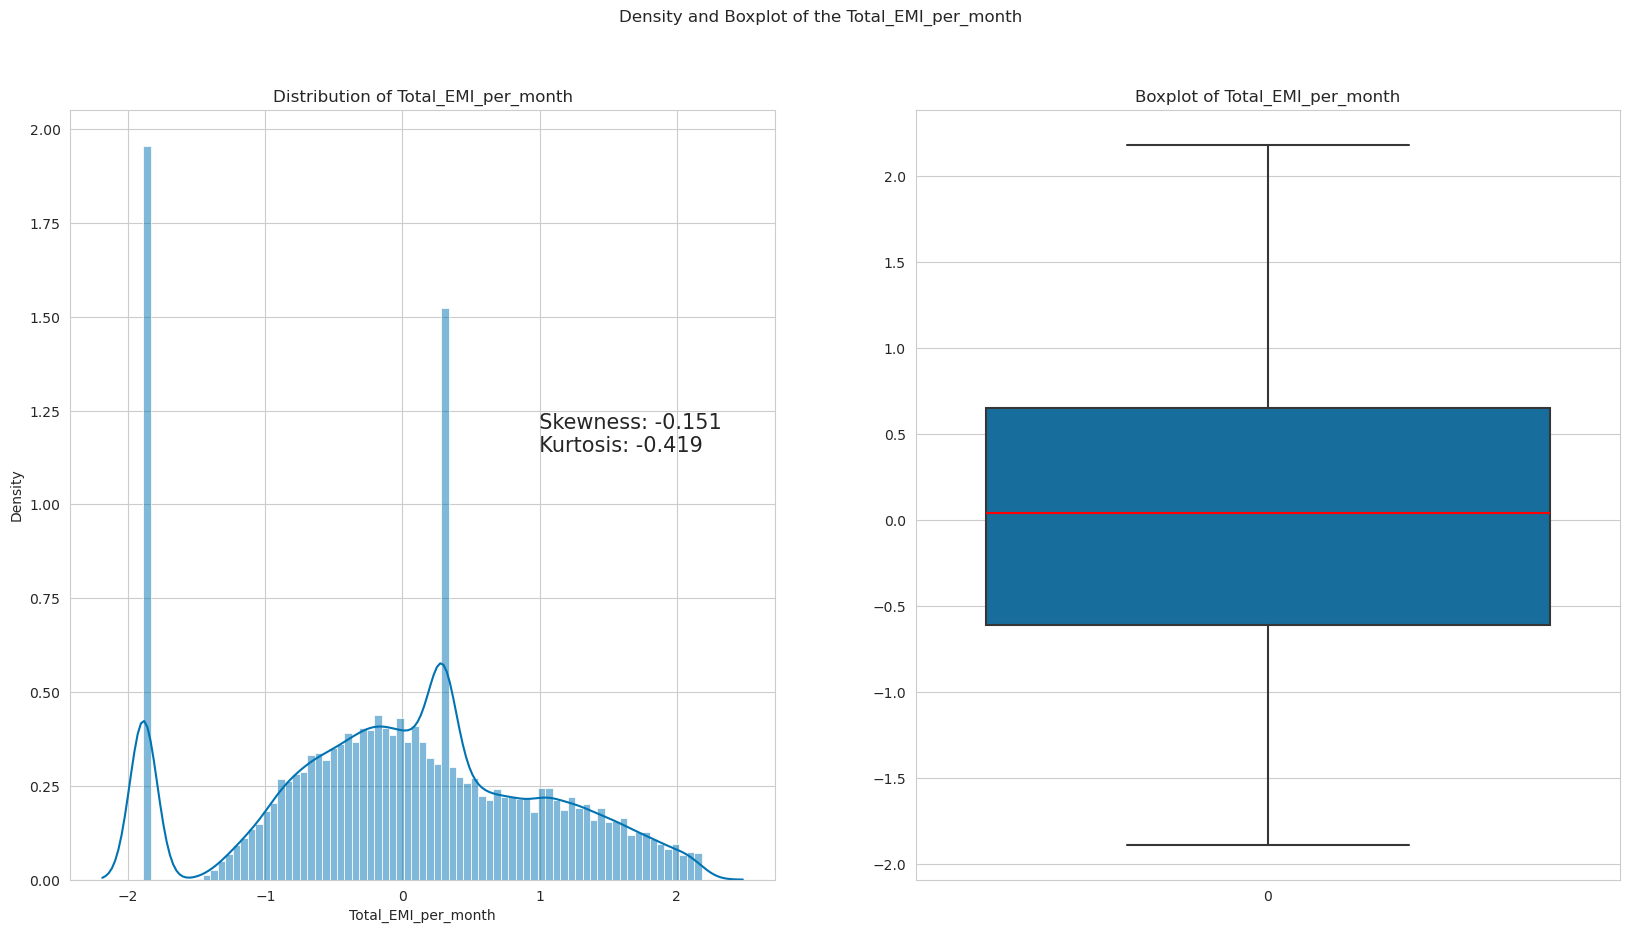

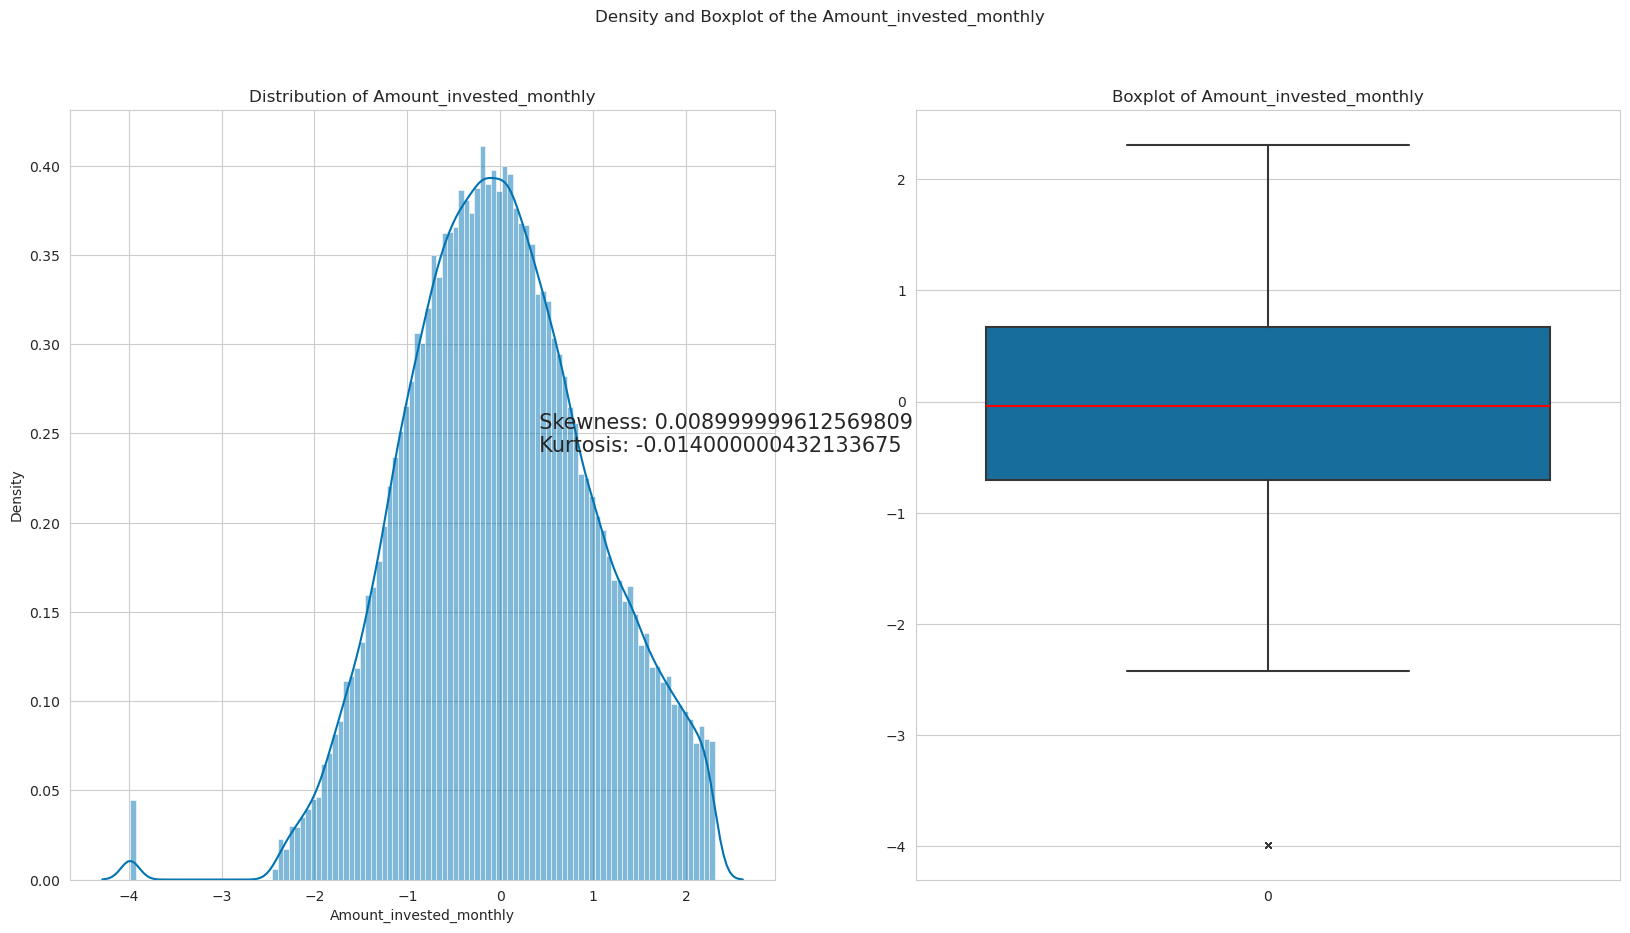

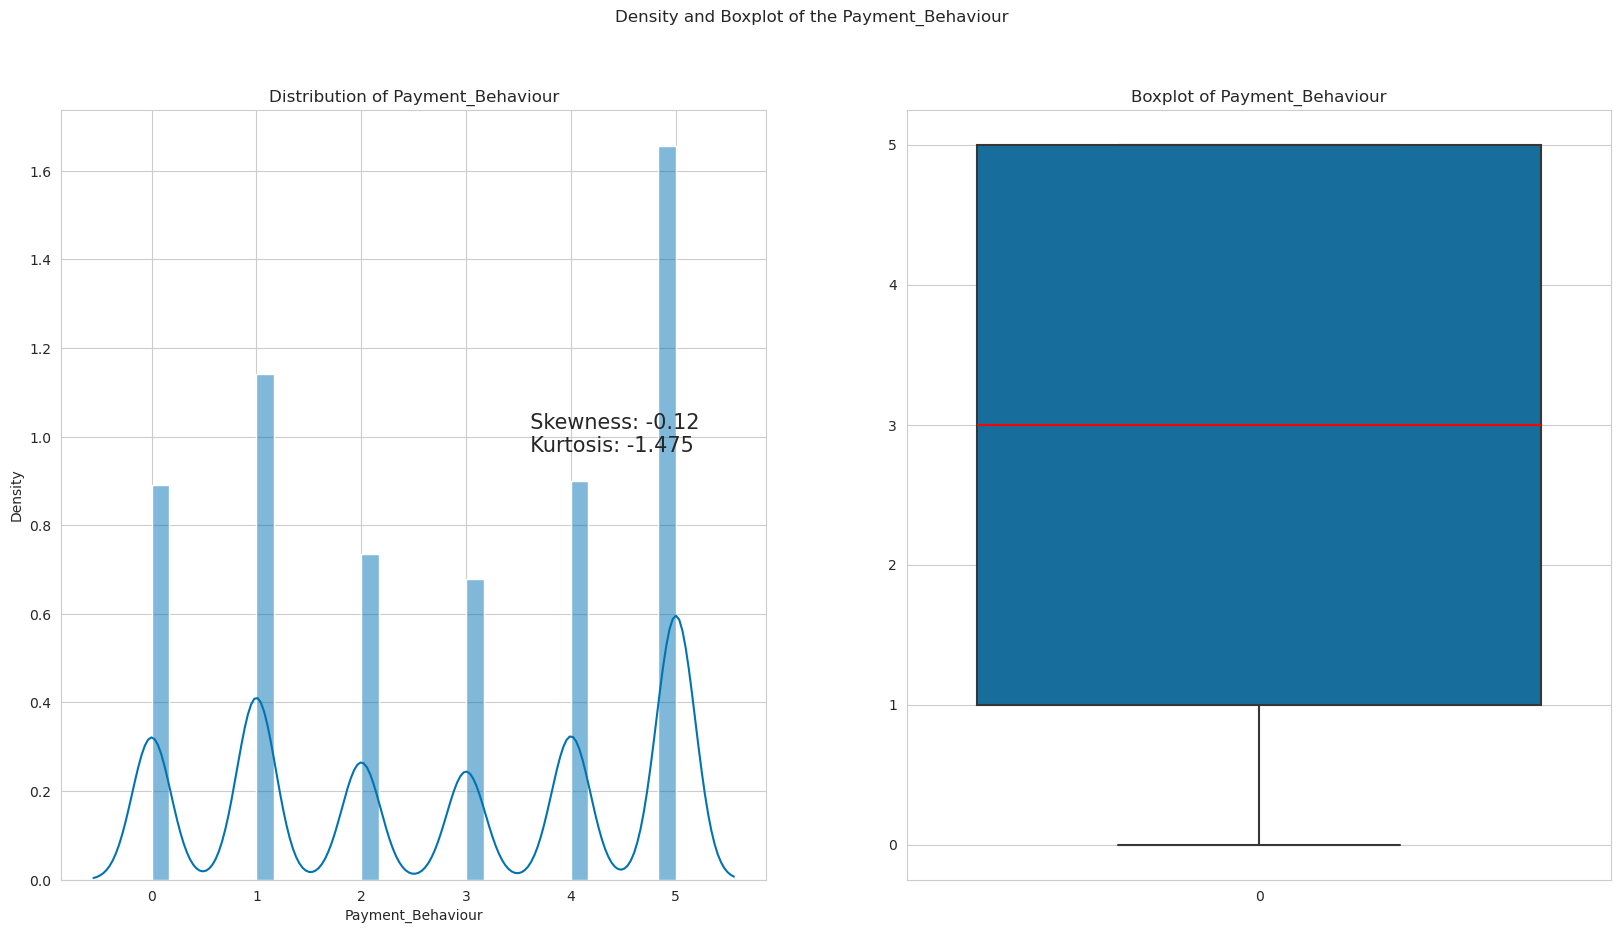

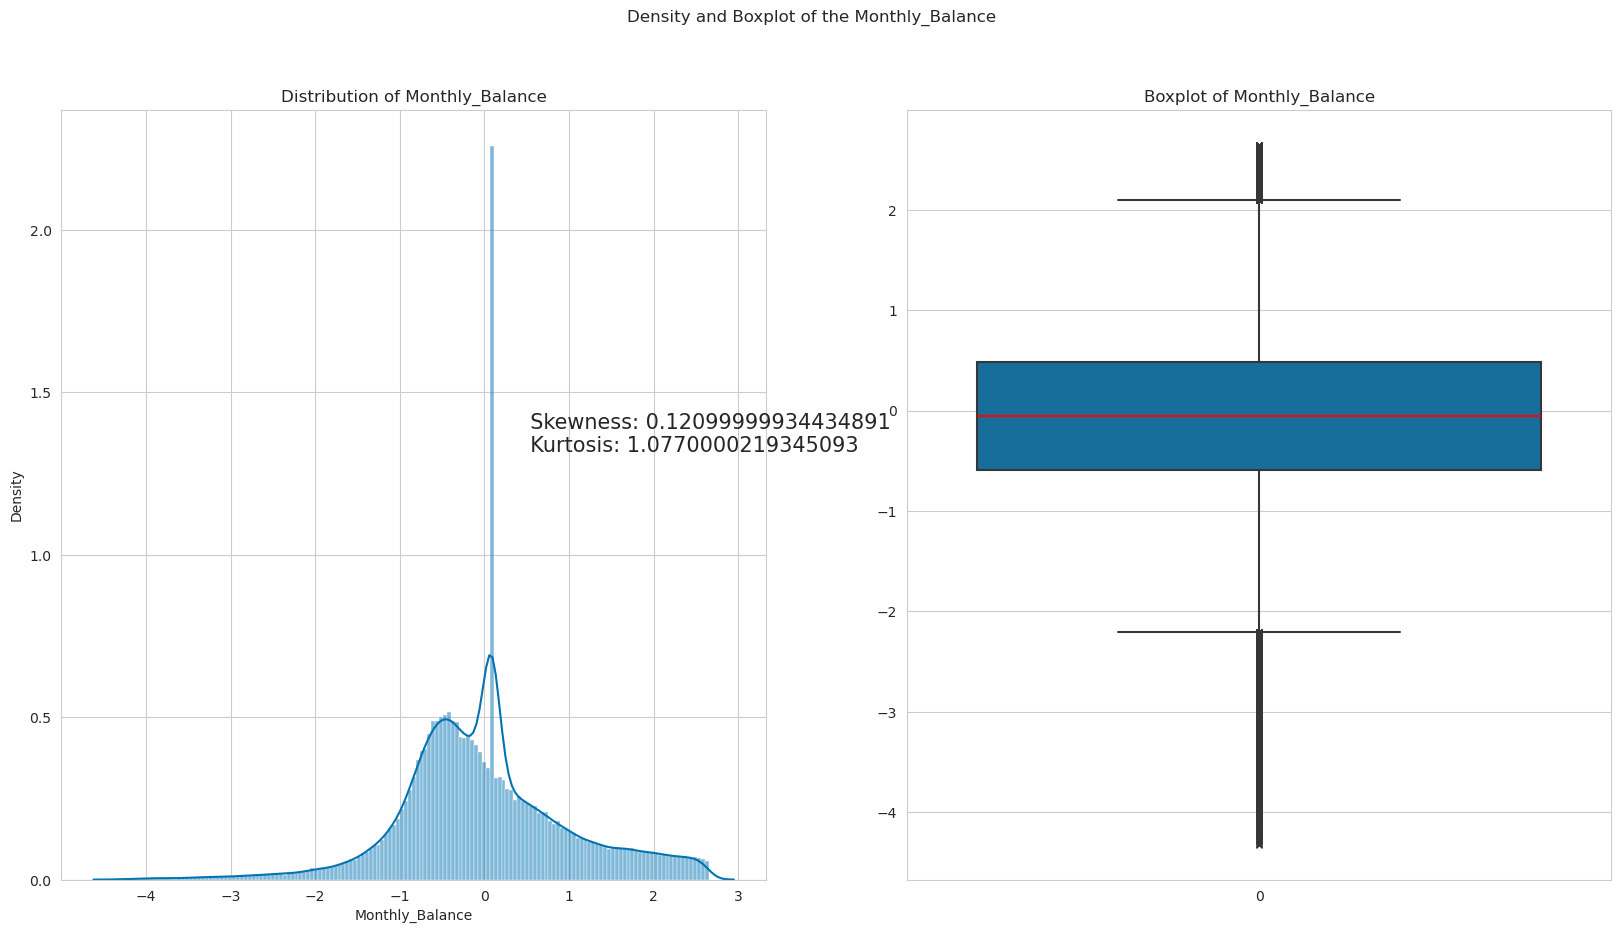

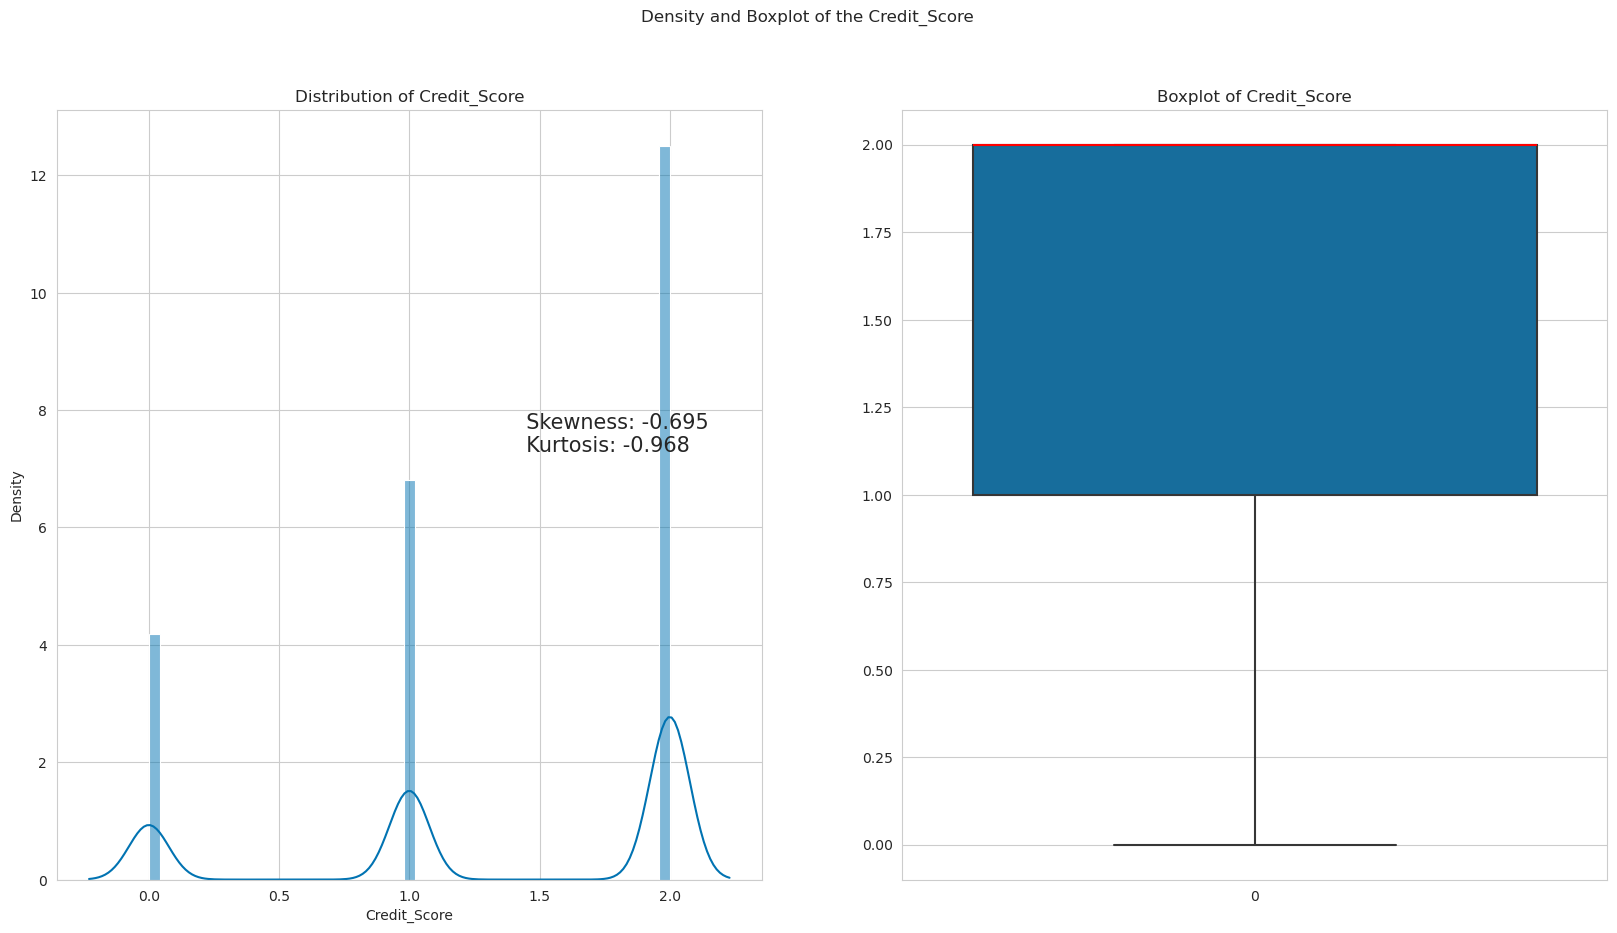

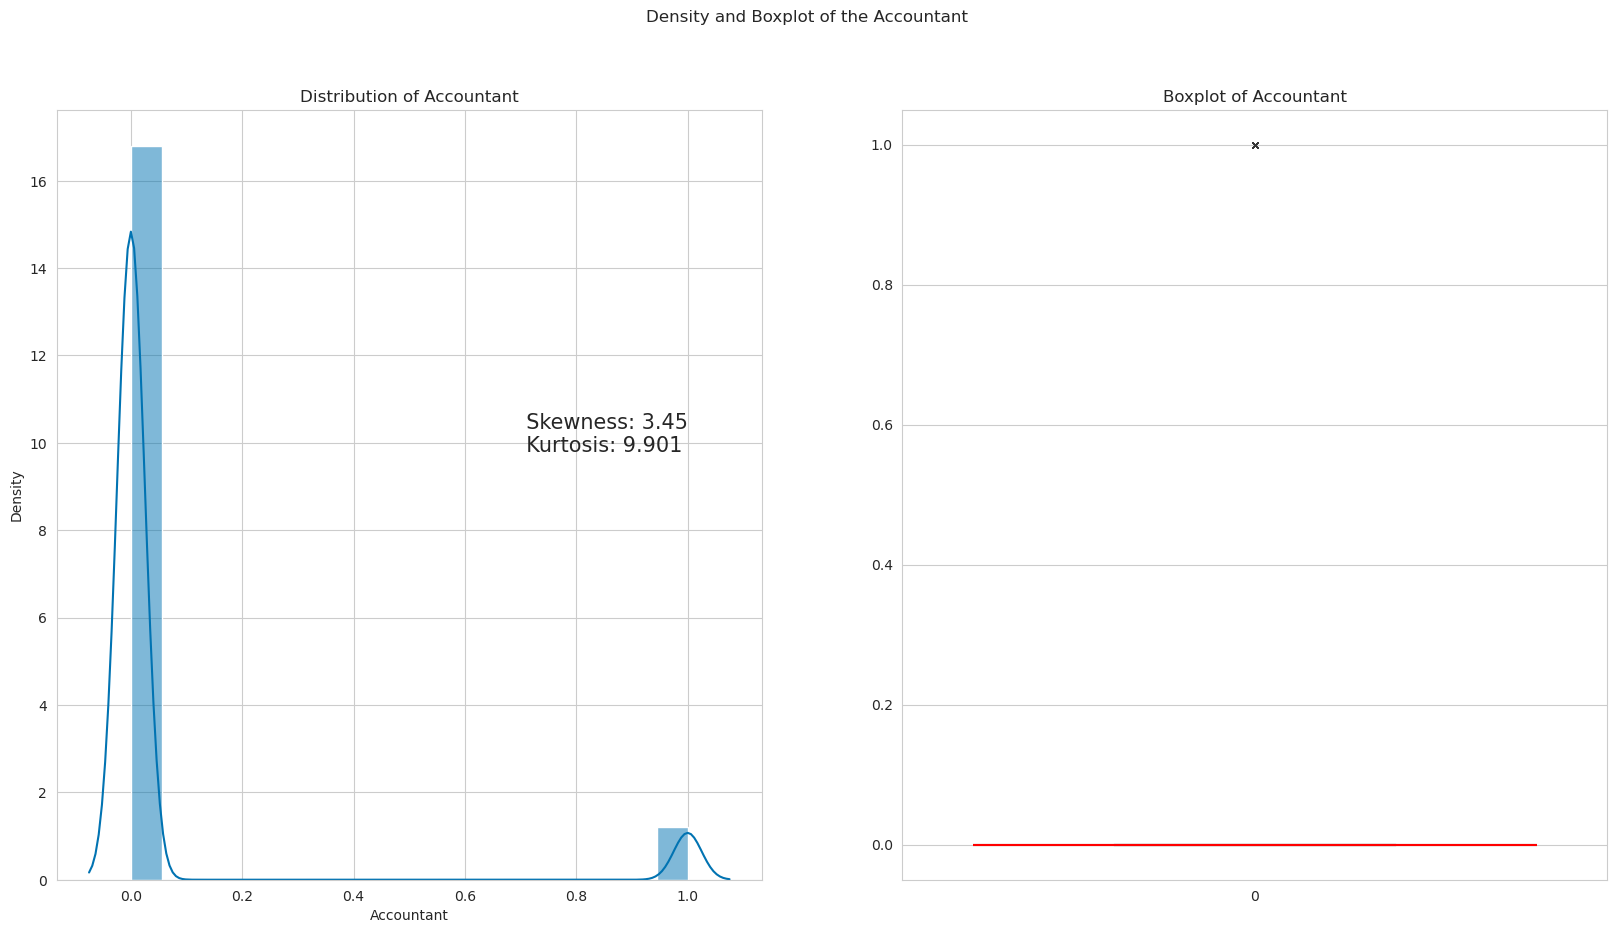

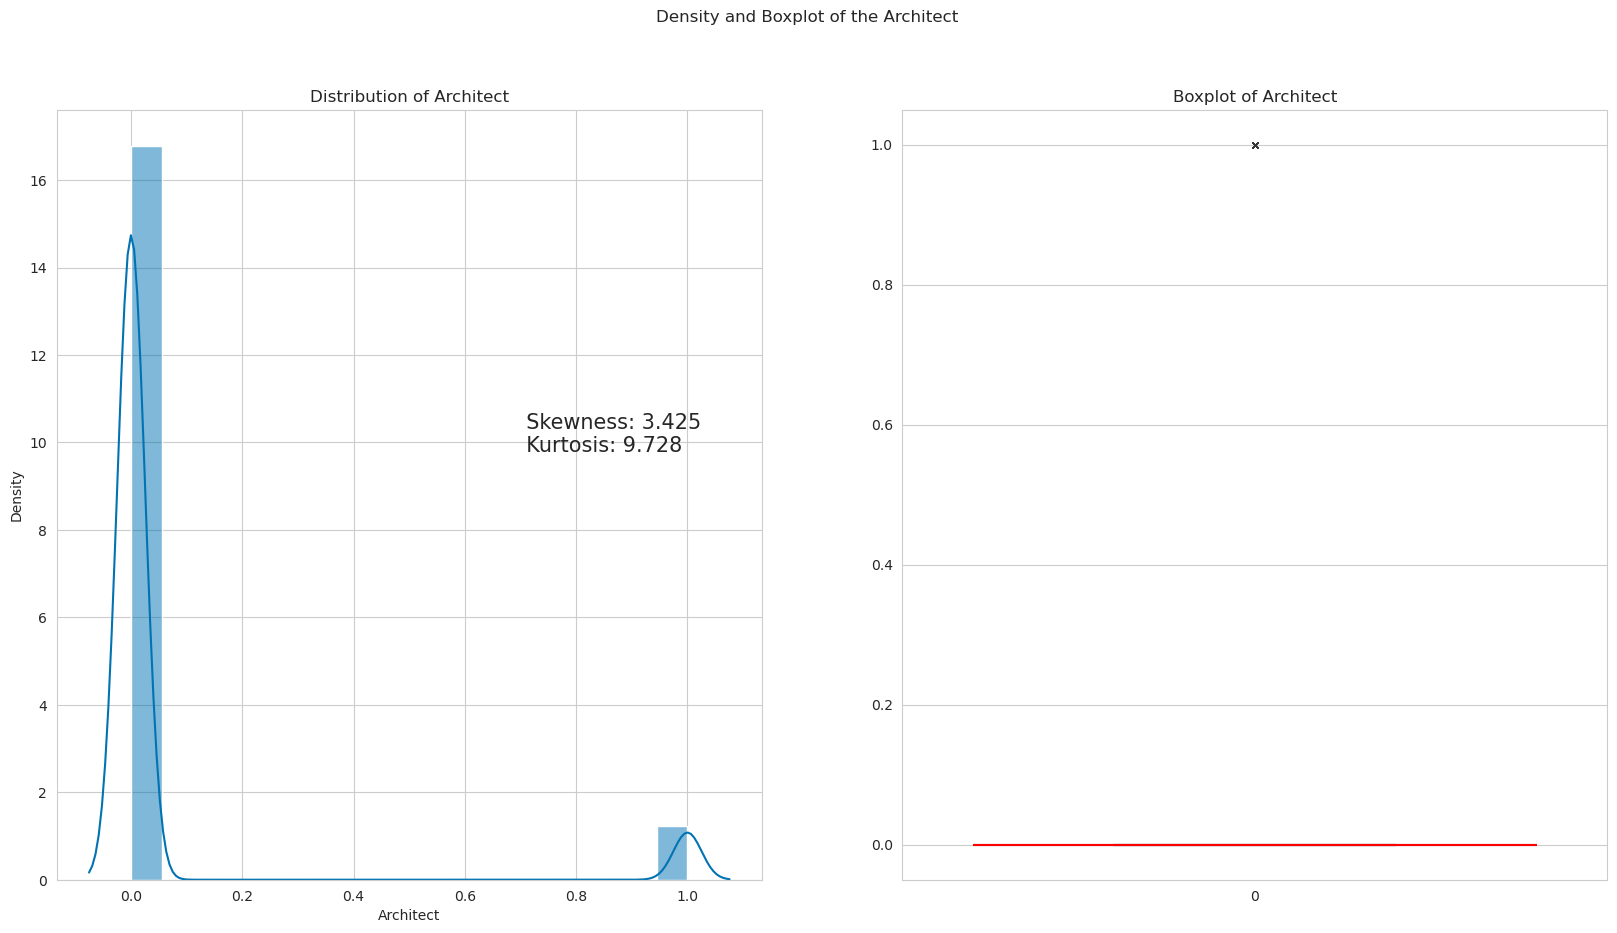

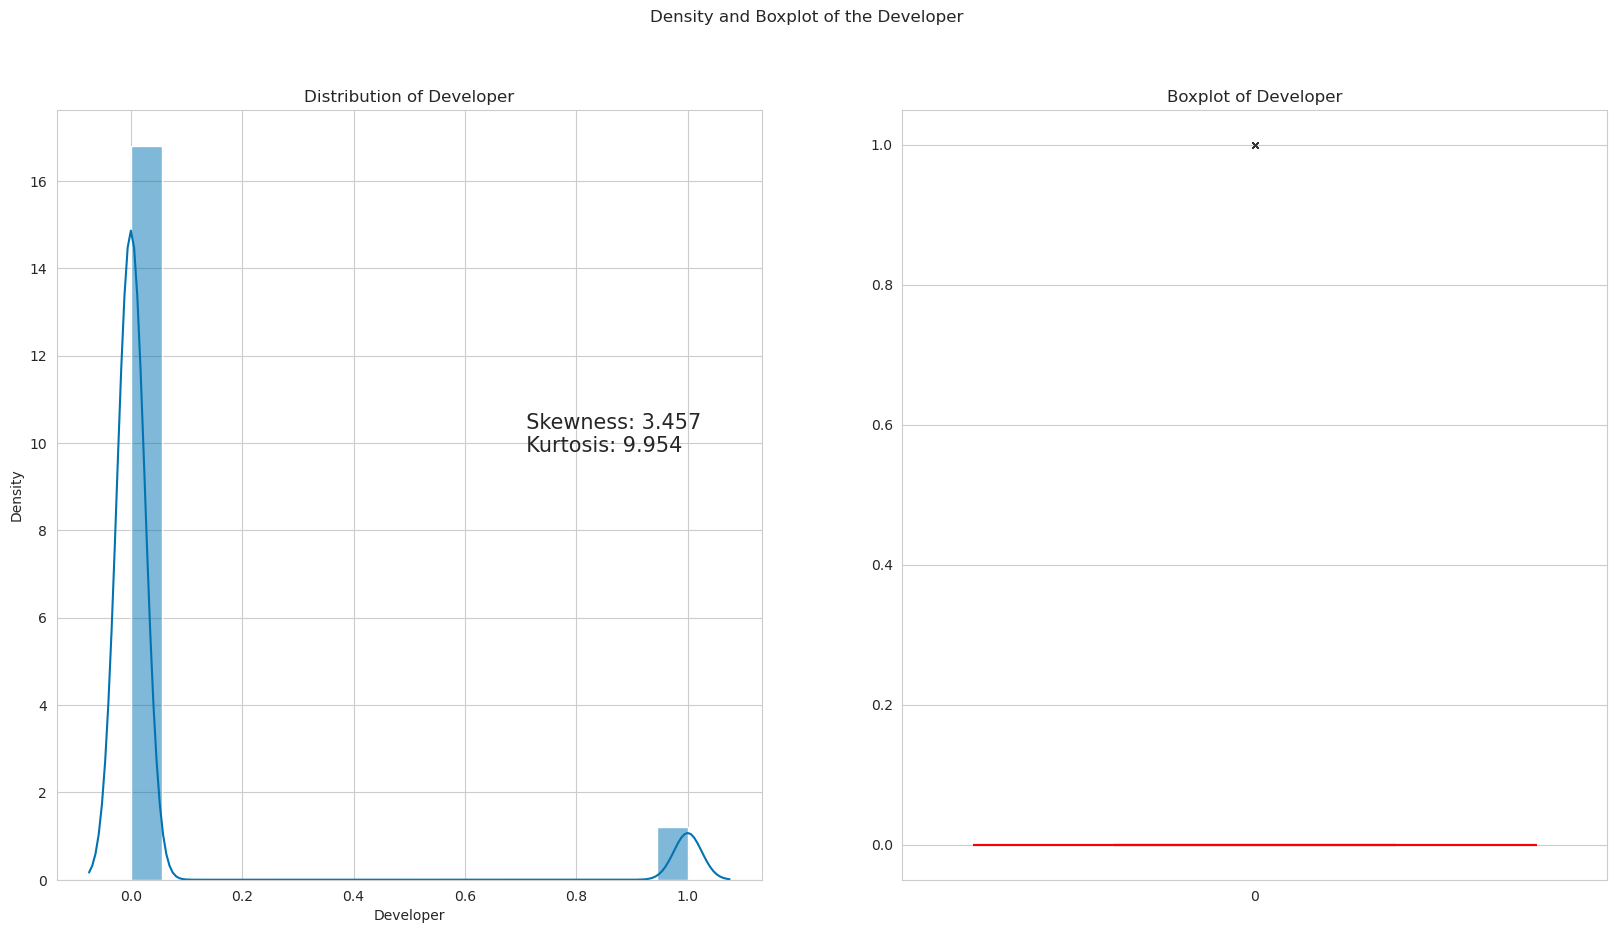

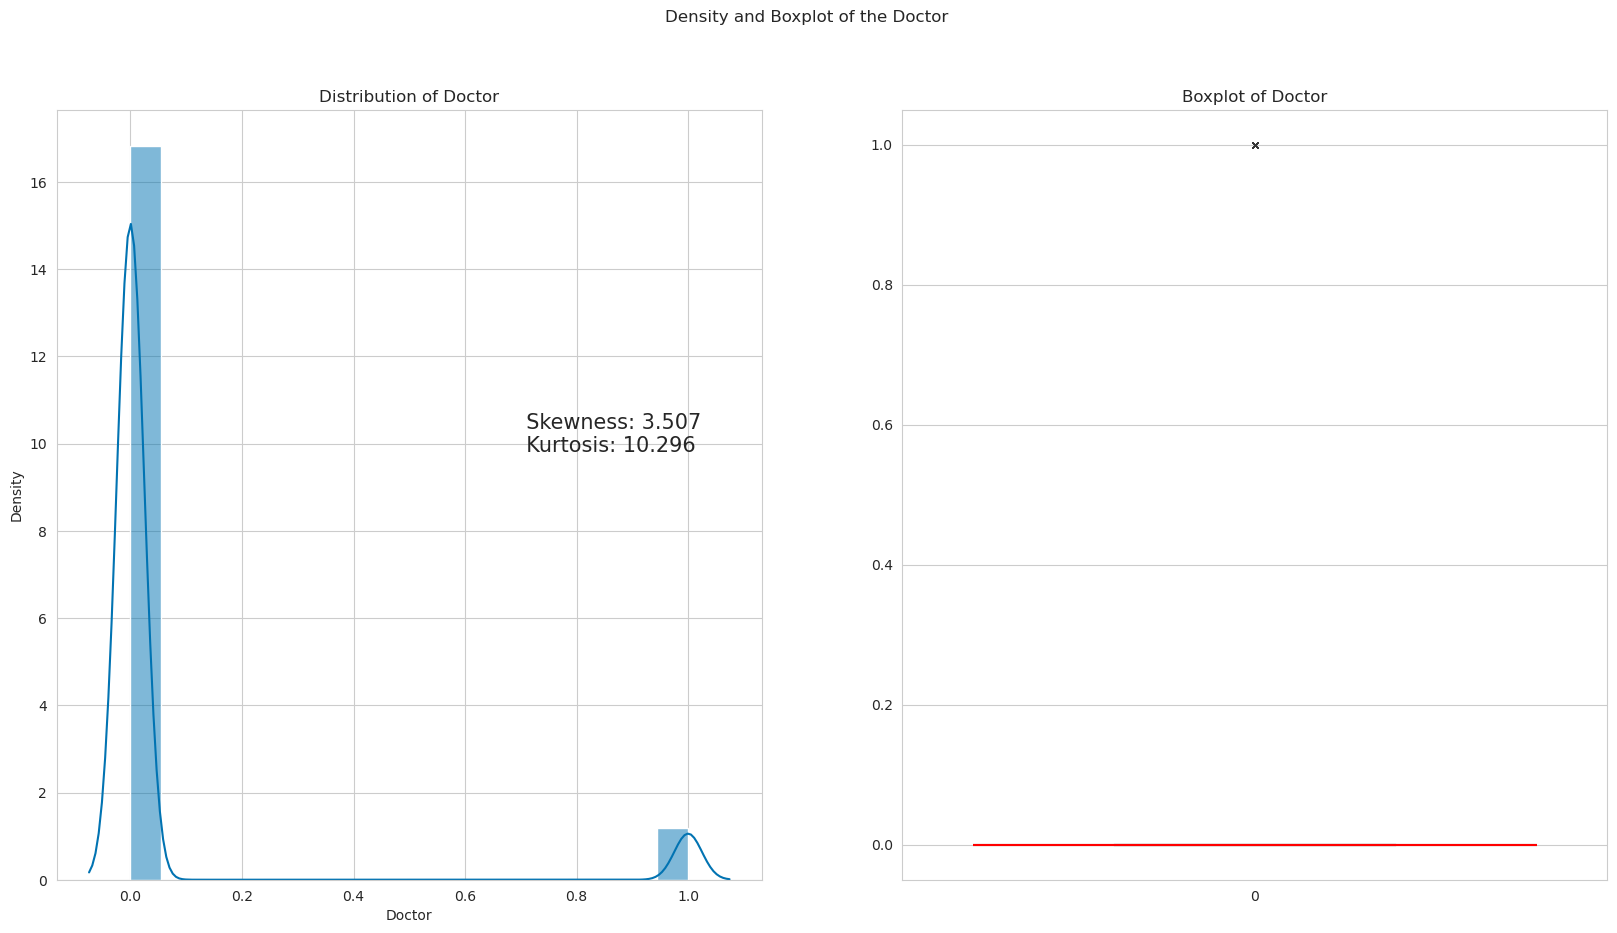

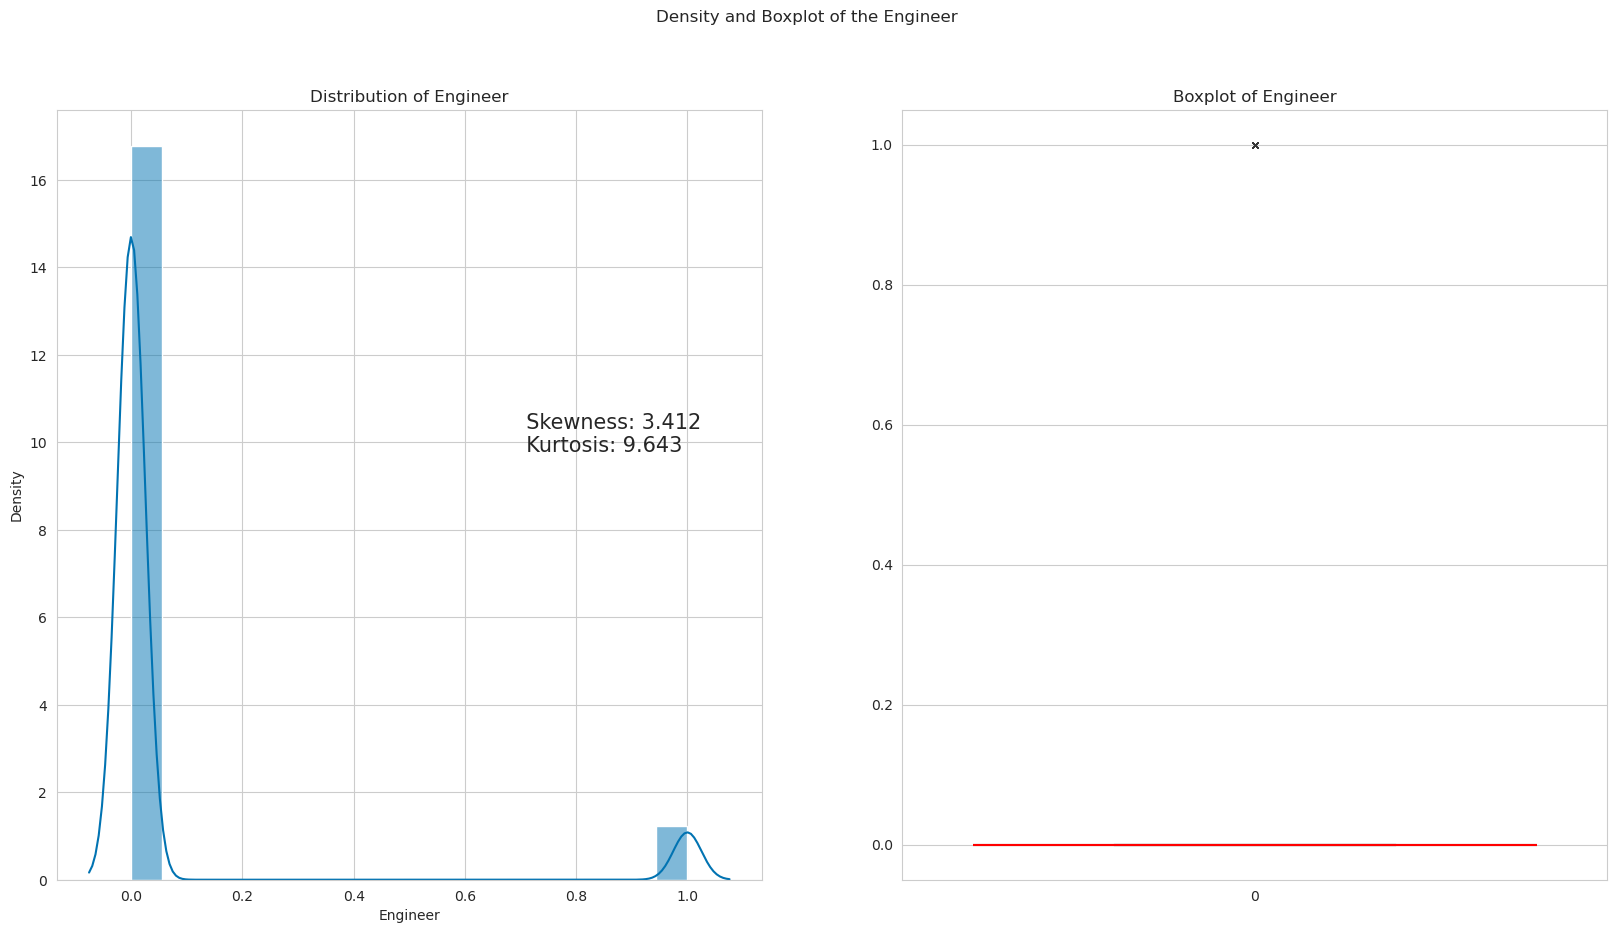

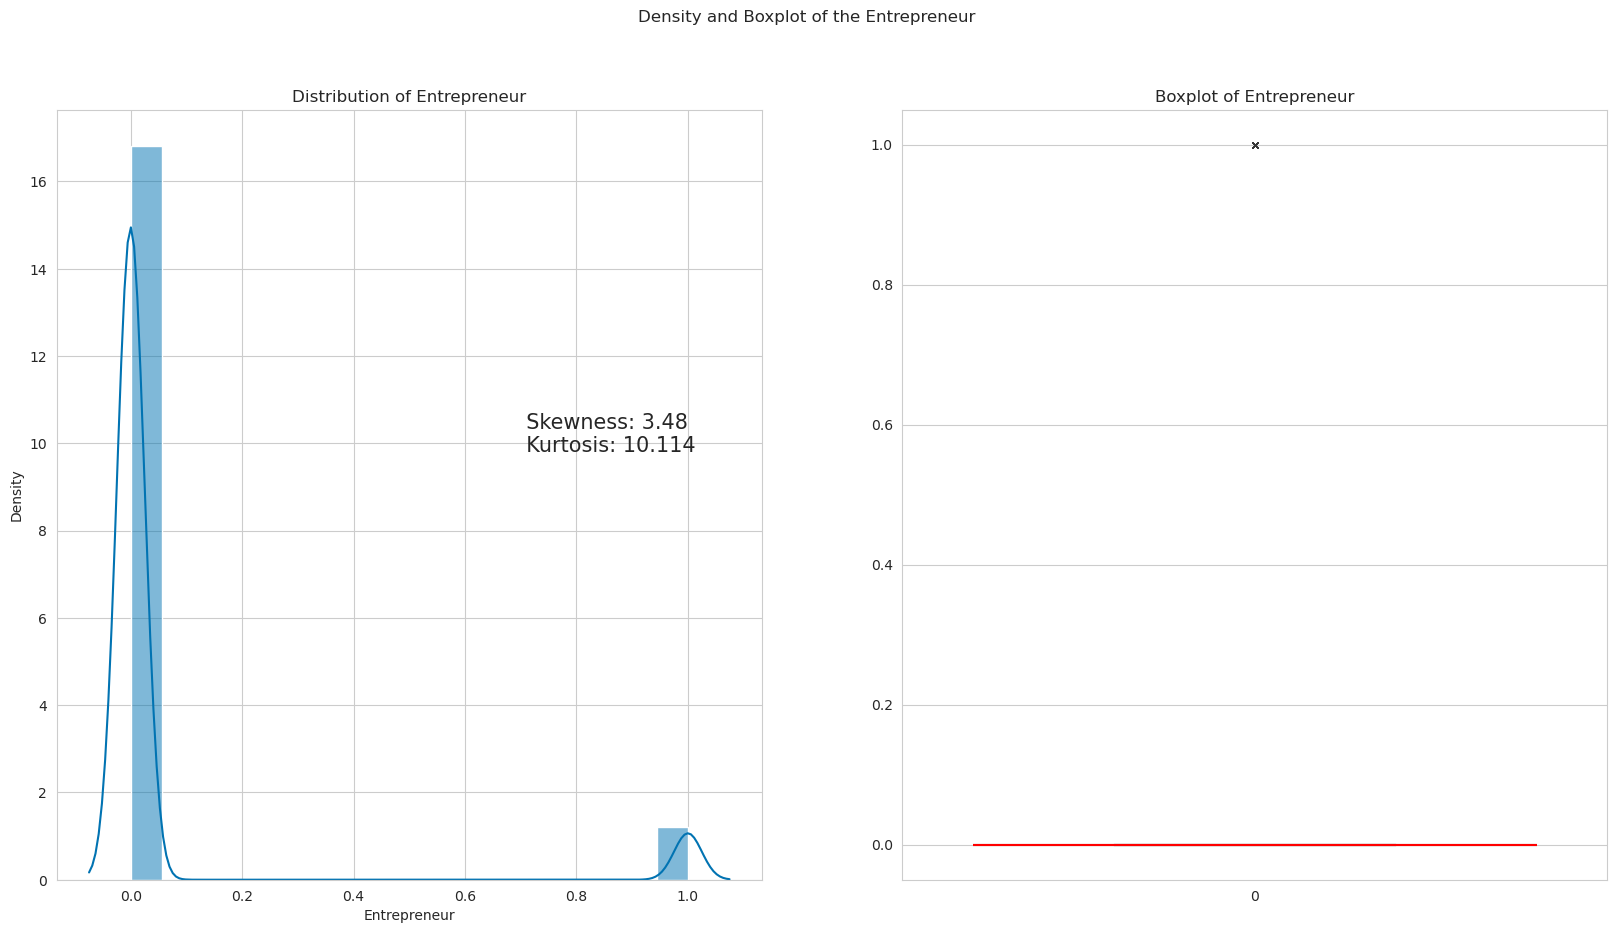

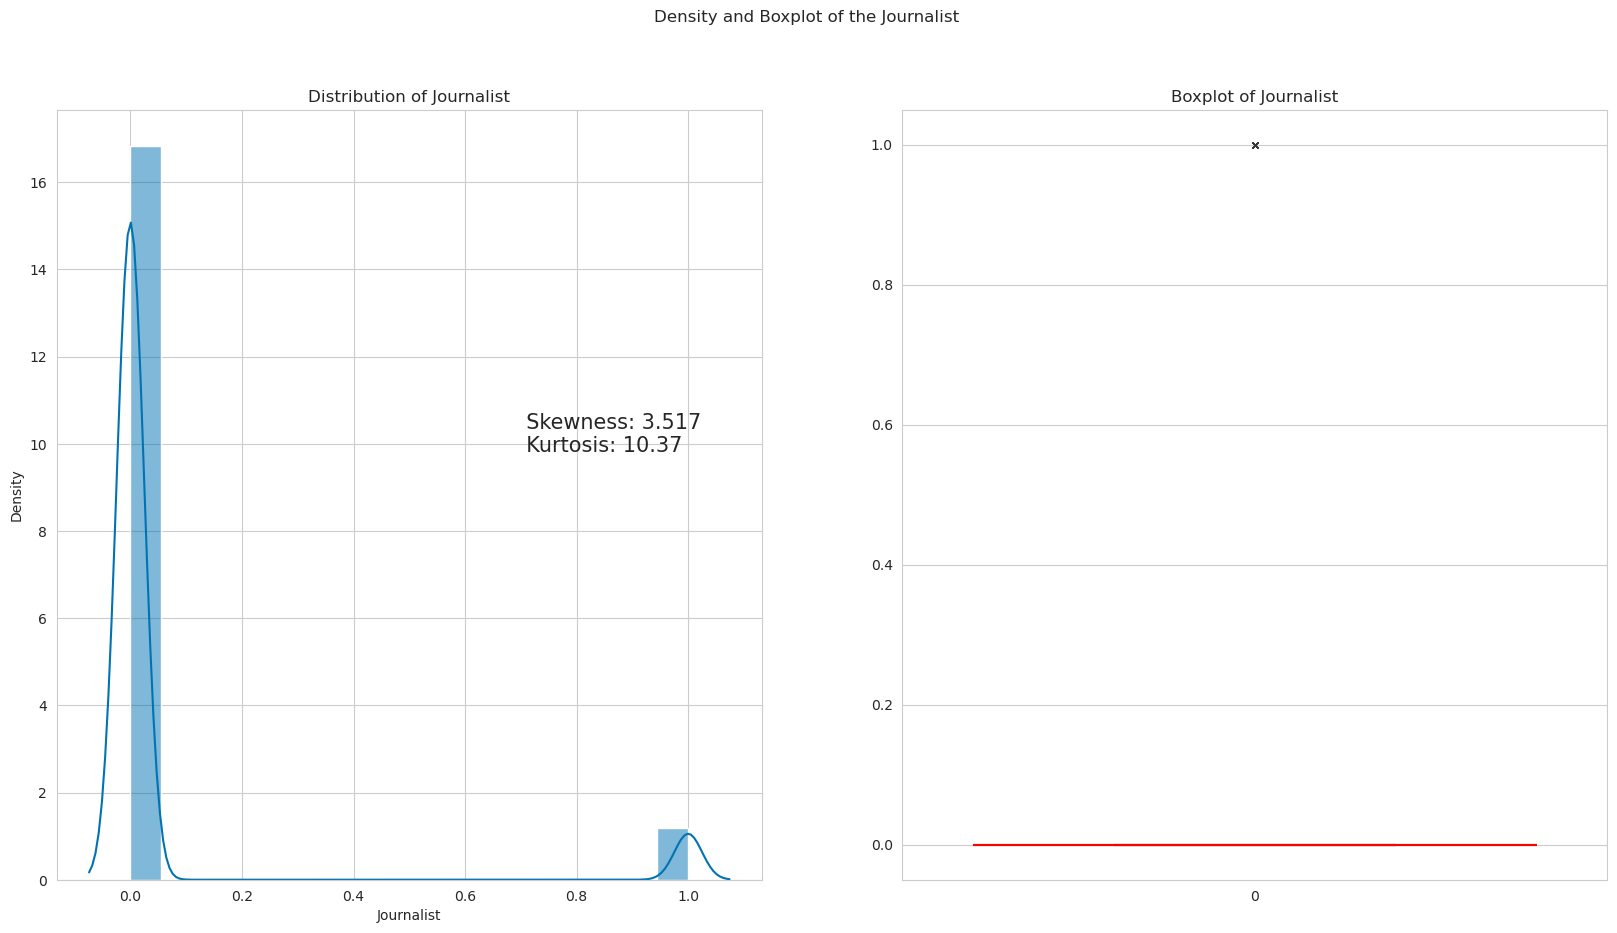

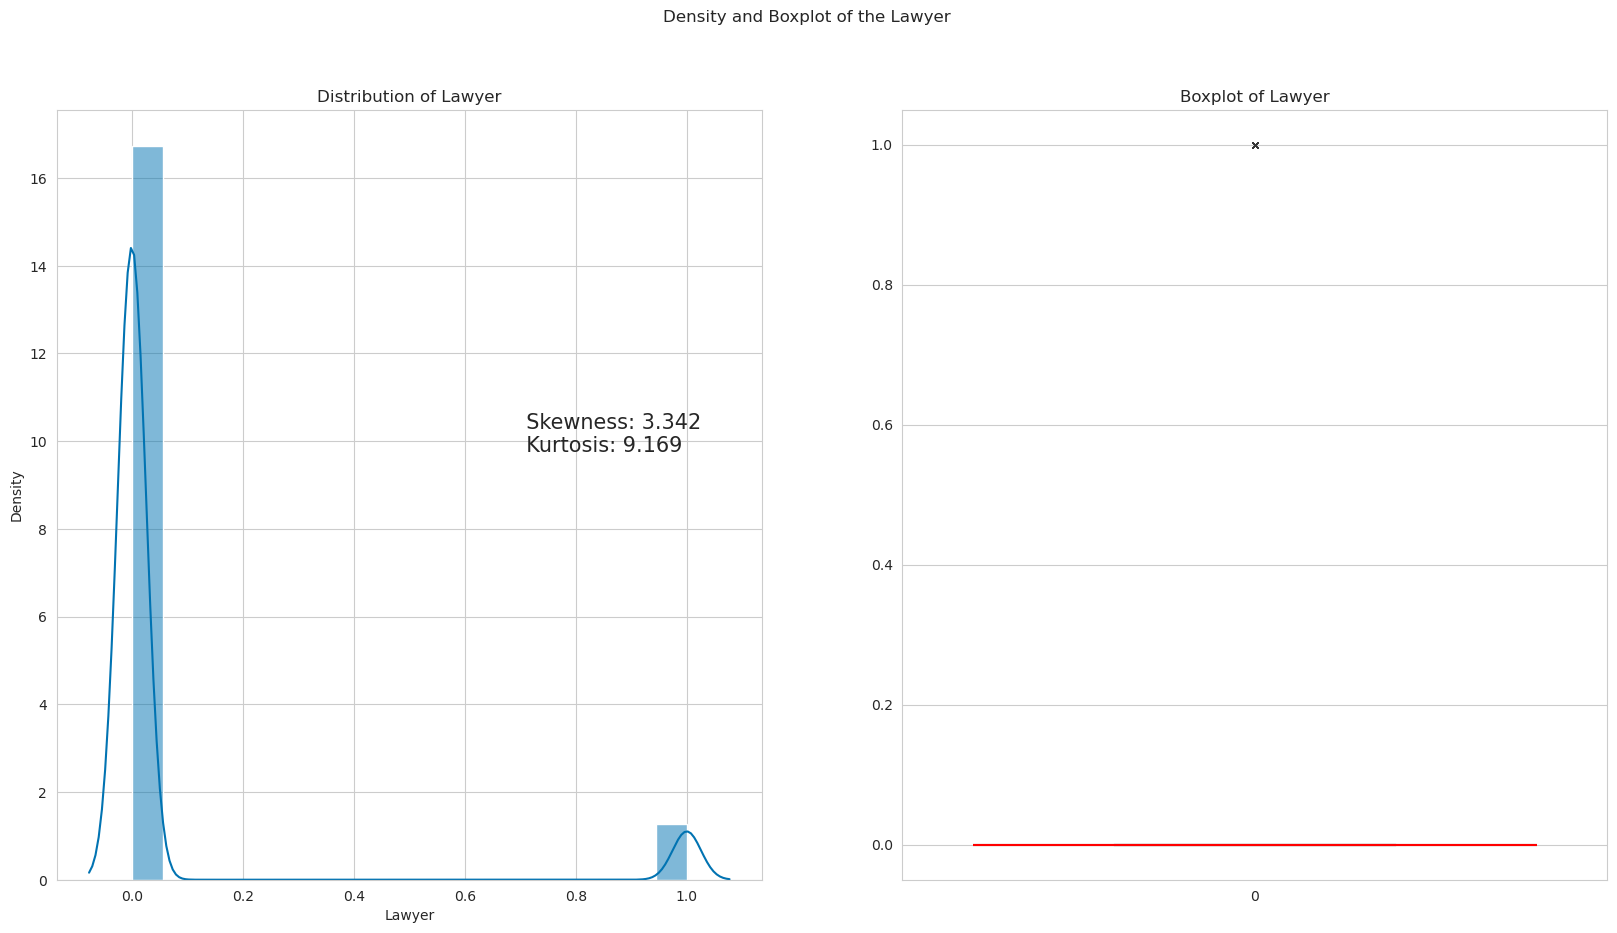

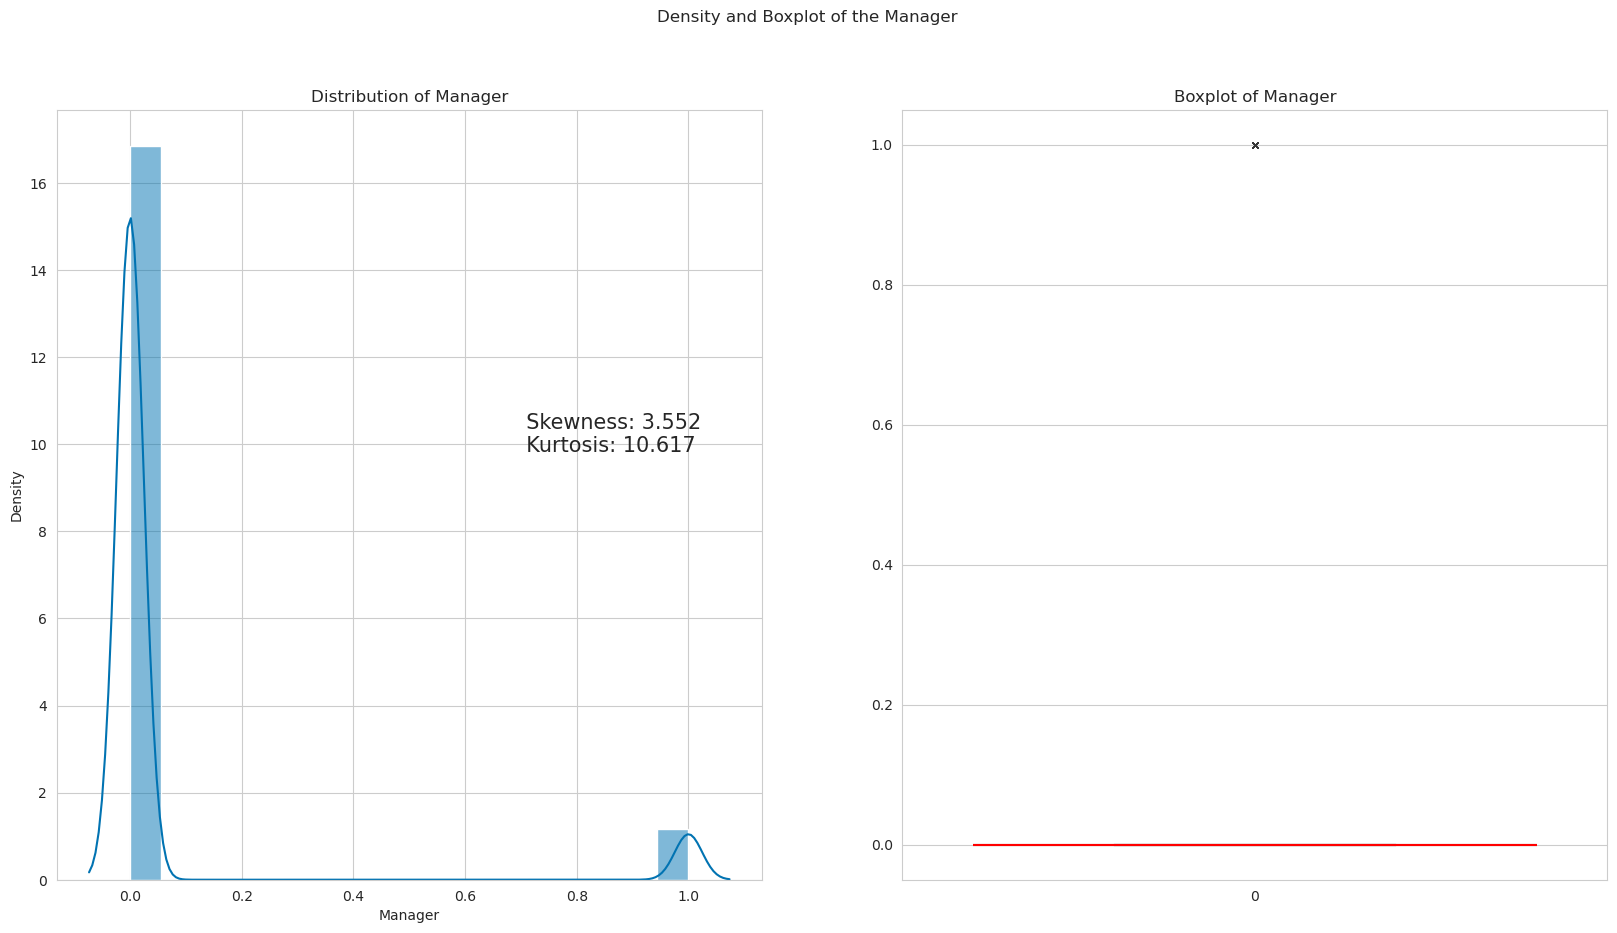

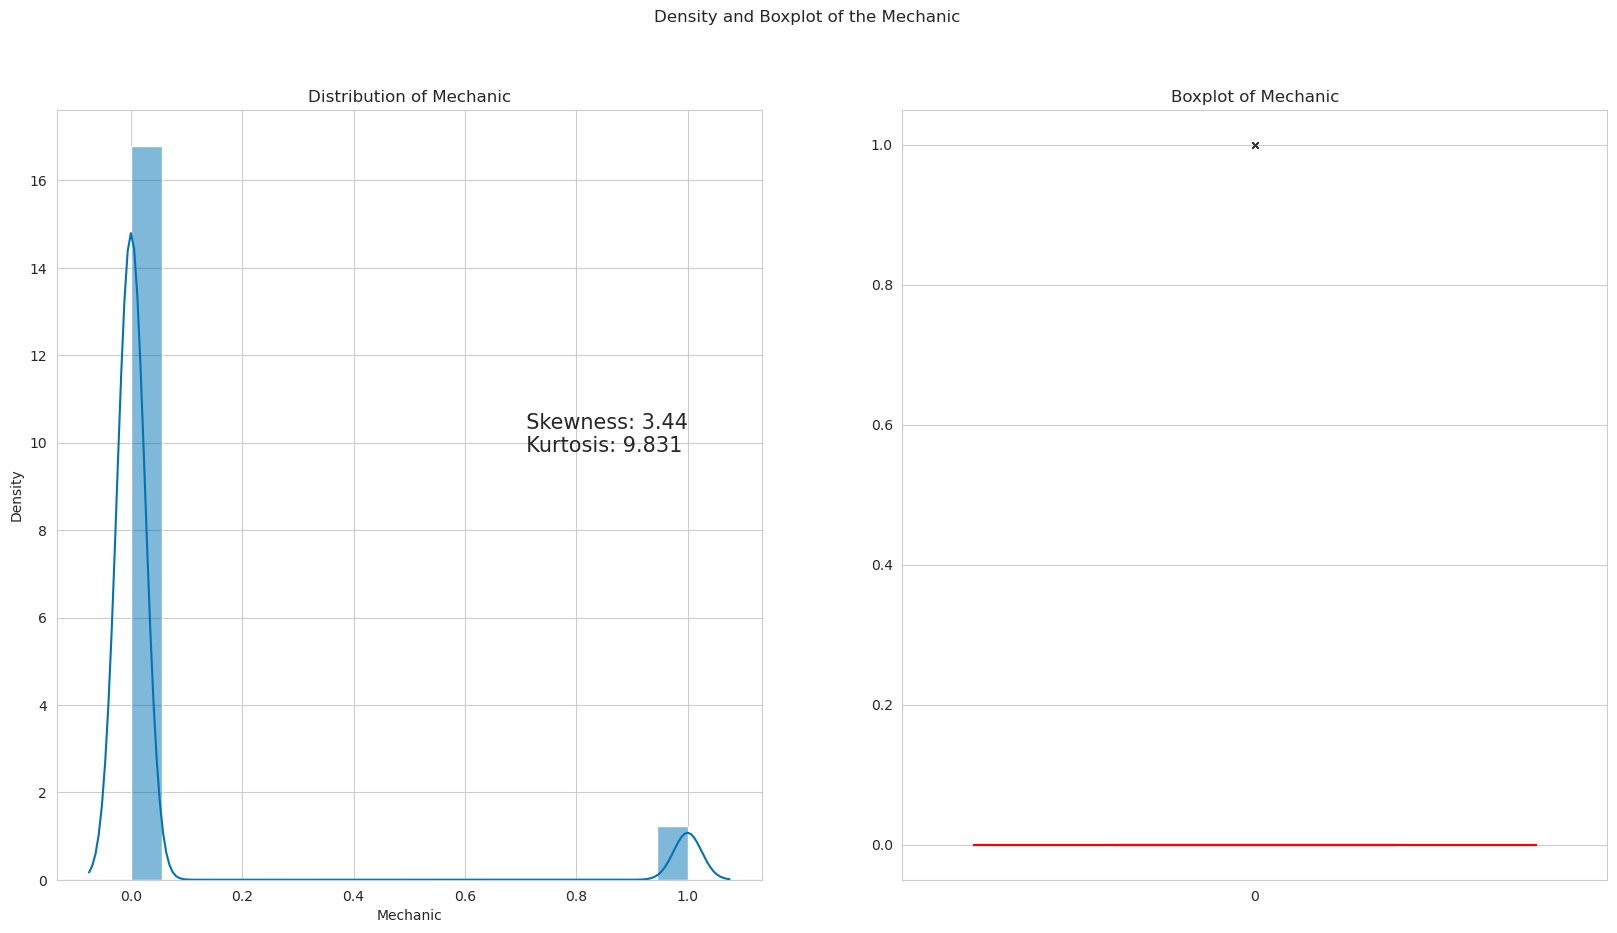

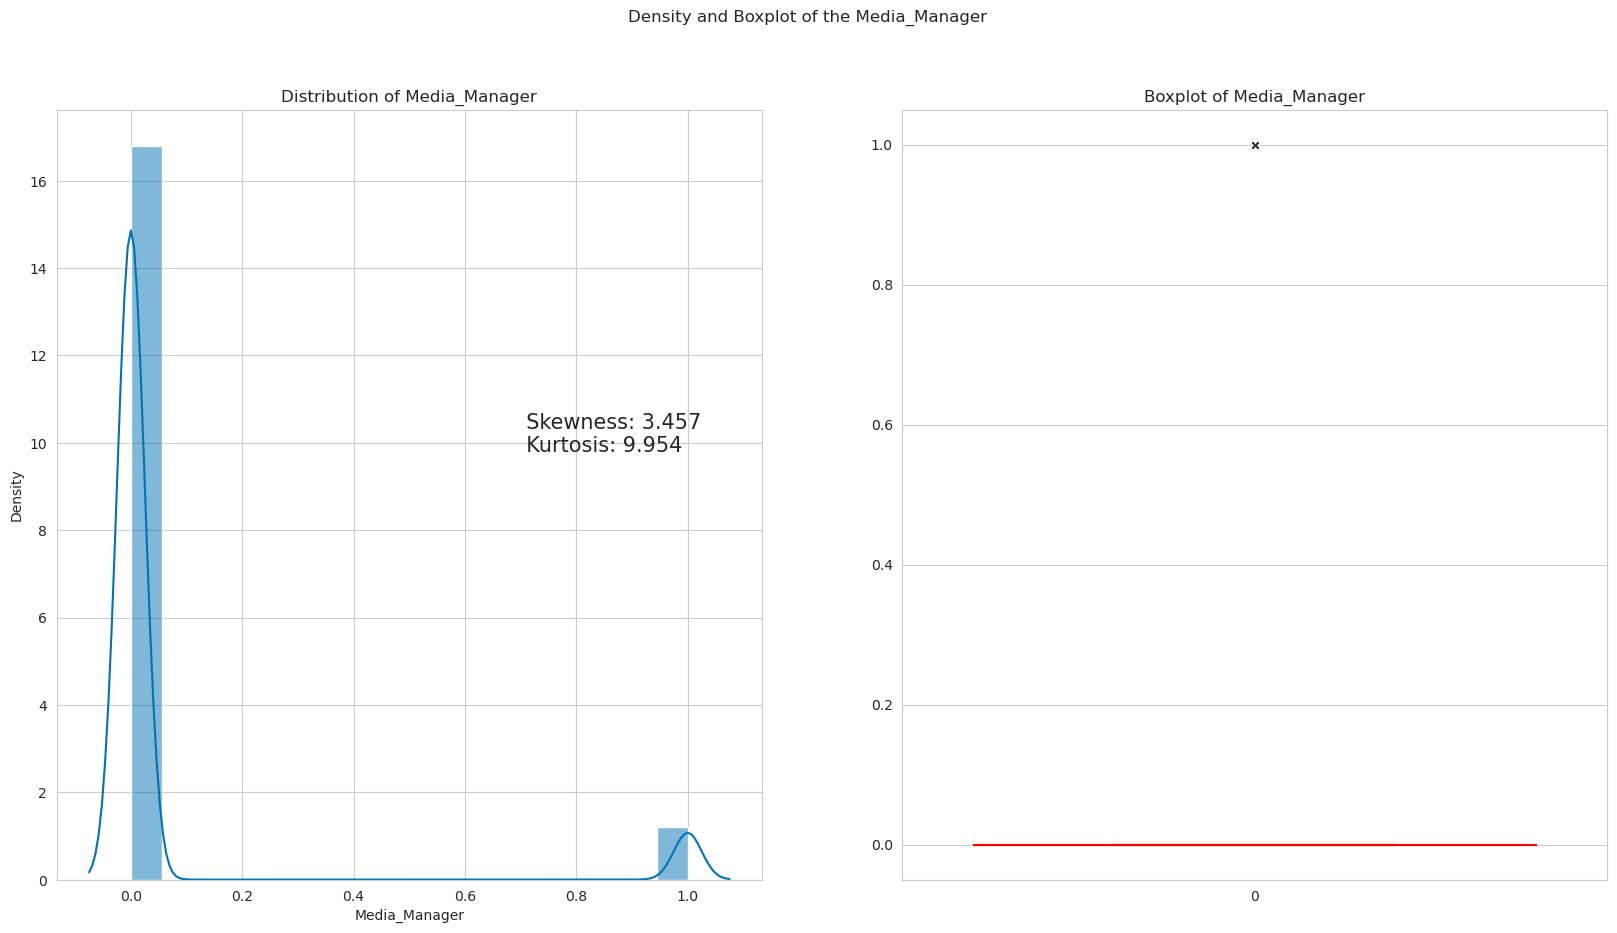

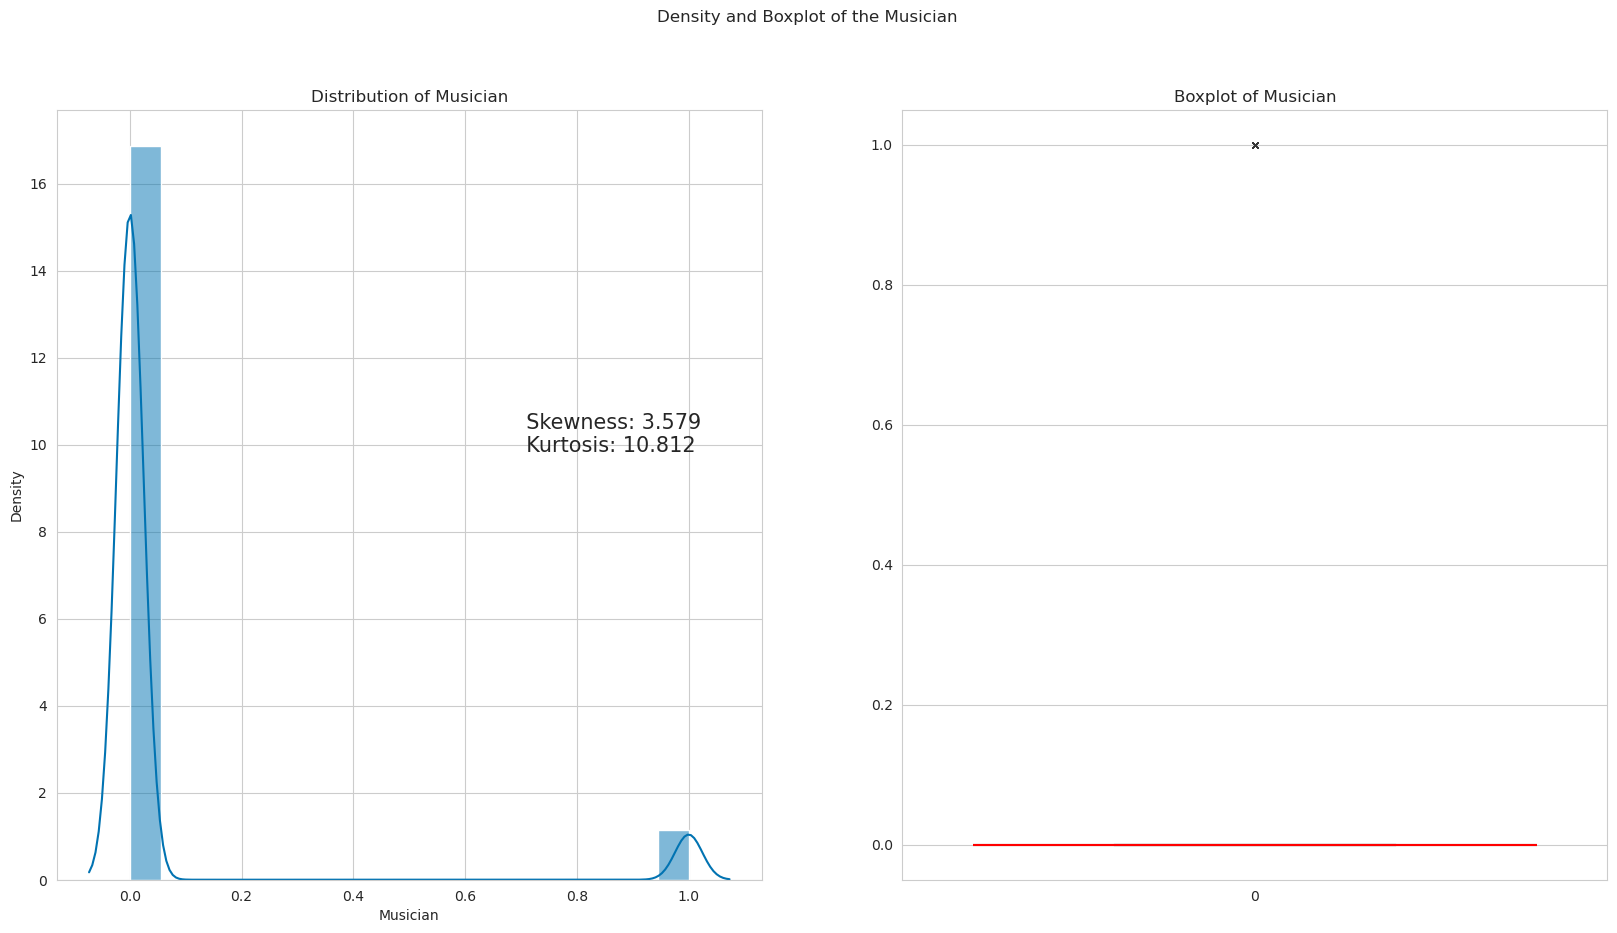

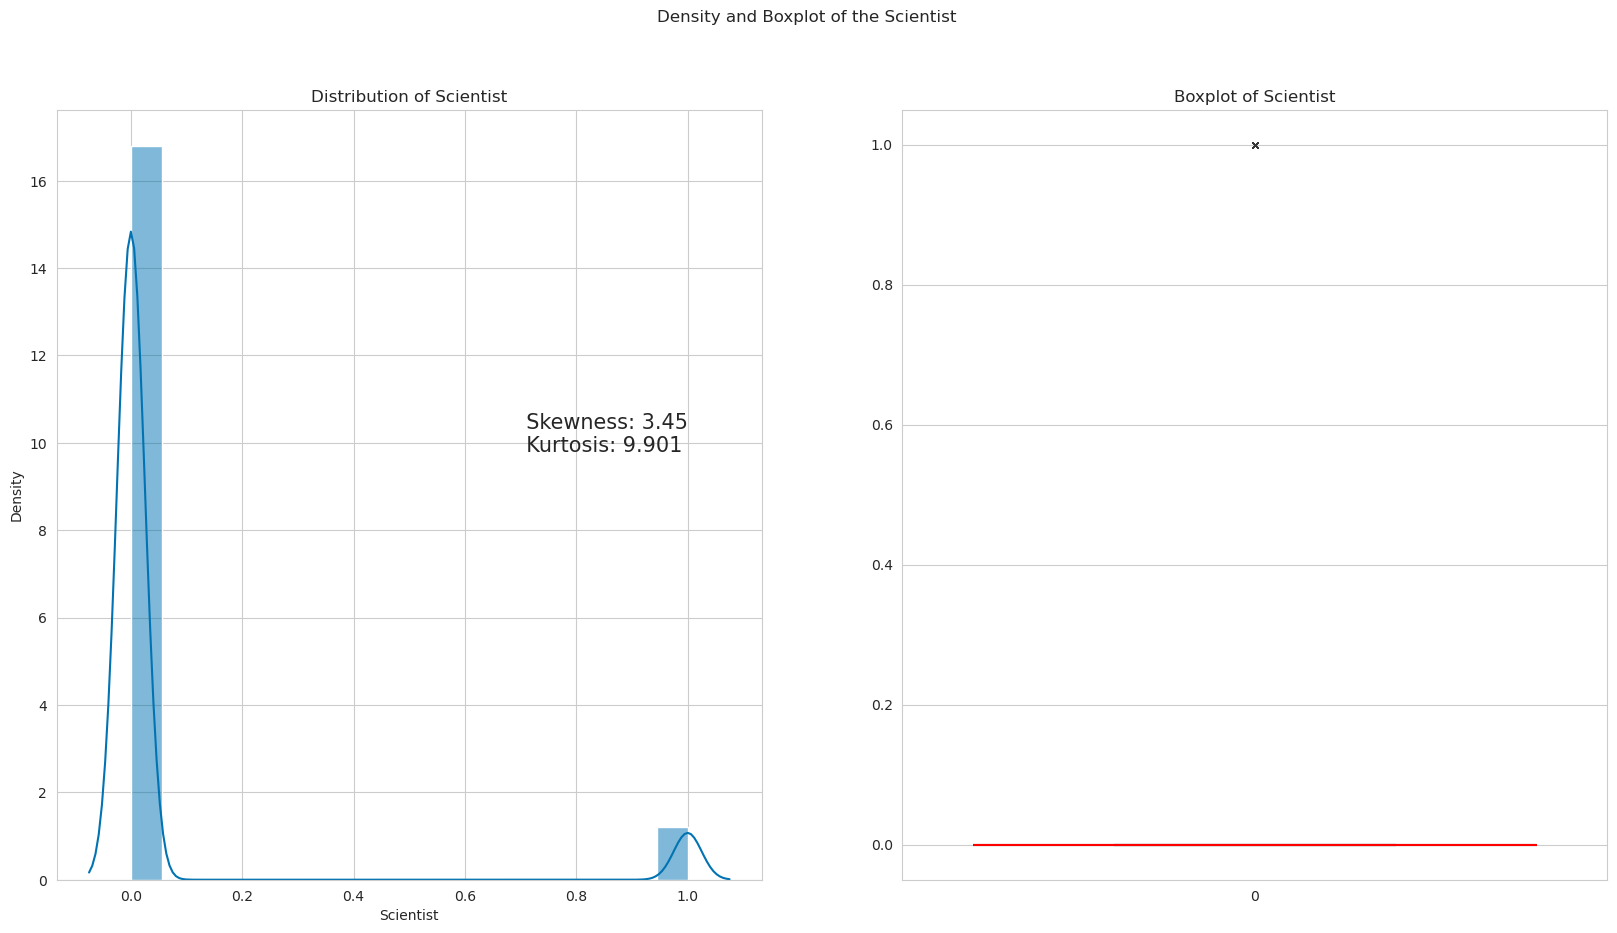

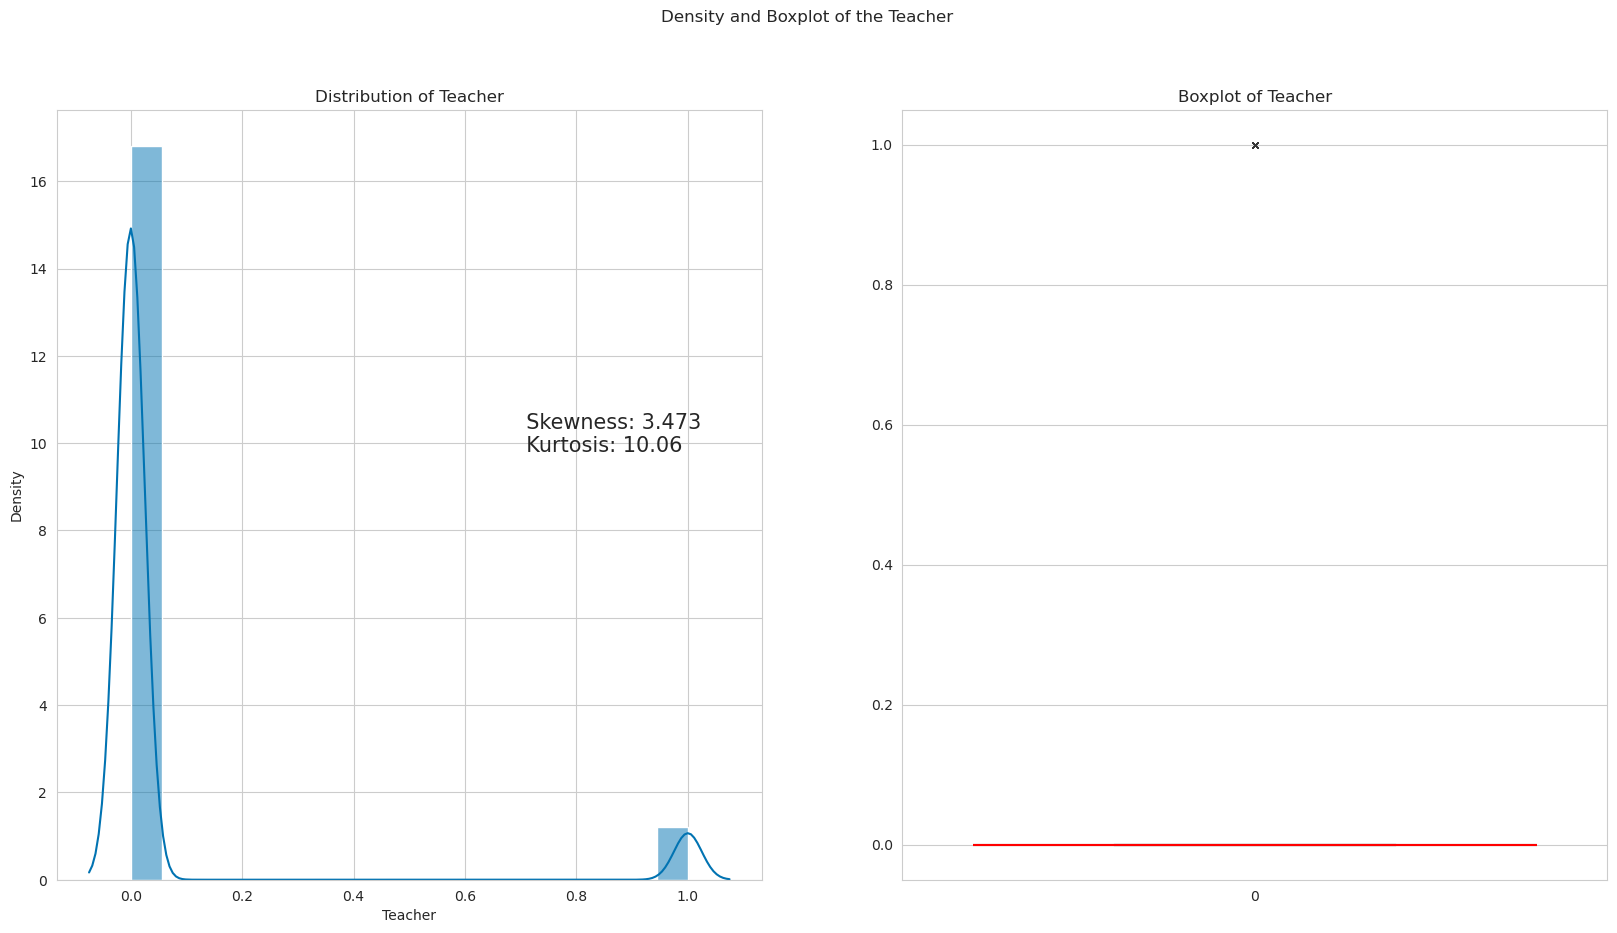

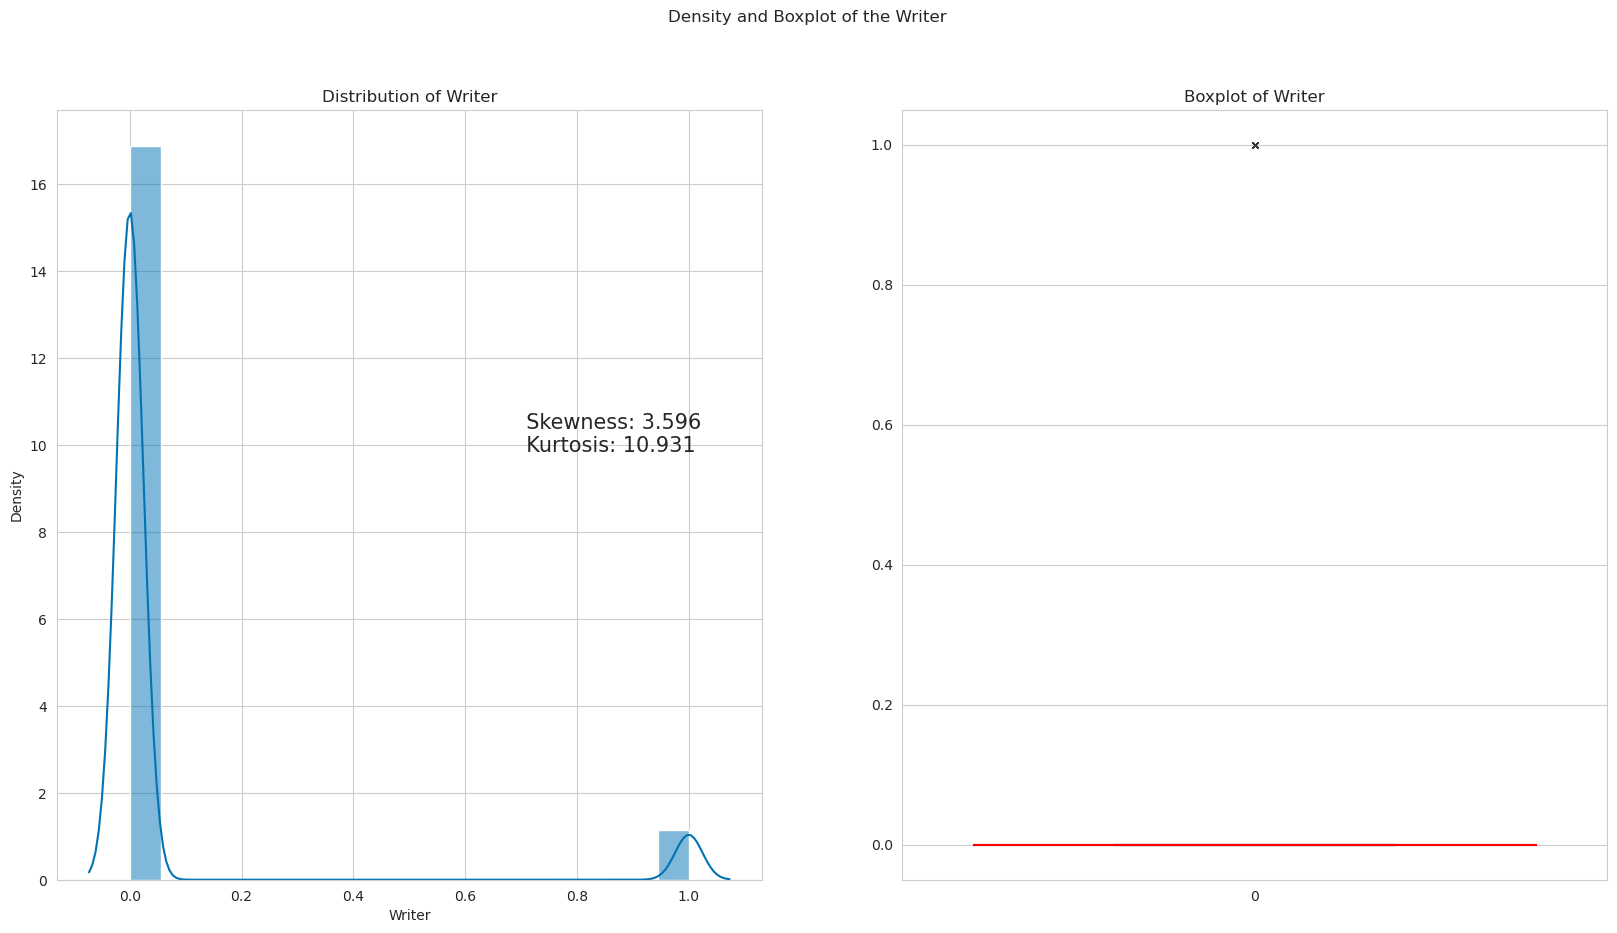

In [60]:
# Function call to plot the density and boxplot of the transformed numeric values.
density_box_plotter(df_train)

## Model Training

In [61]:
# Splitting out data for X and y
X = df_train.drop(columns=['Customer_ID', 'Month', 'Credit_Score']) #,'Type_of_Loan'
y = df_train['Credit_Score']

# As the target variable is heavily imbalanced we use SMOTE technique to balance out the dataset and increase model performance.
smote = imblearn.over_sampling.SMOTE()
X,y = smote.fit_resample(X,y)

# Splitting our data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size = 0.25,
                                                    stratify = y)

model_name_list = []
accuracy_score_list = []
precision_score_list = []
recall_score_list = []
f1_score_list = []

def generateReport(filename, model, class_report, acc_score, prec_sore, rec_score, f1):
    '''
    The function writes the output of the model training int a file.

    Args:
        filename (str): name of the file to write the report
        model (str): name of the model
        class_report (dict): classification report from the model performance
        acc_score (float): accuracy classification score
        prec_score (float): precision of the model
        rec_score (float): the recall score
        f1 (float): balanced F-score or f-score

    Returns:
        Creates a file if none or appends to the file if it exists.
    '''
    with open(filename, "a") as file:
        file.write('\n\n -#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#- \n\n')
        file.write('########## Report for the model: {} ########## \n \n'.format(model))
        file.write('------- Classification report -------- \n\n')
        file.write(str(class_report))
        file.write('\n\n')
        file.write('Accuracy score: ')
        file.write(str(acc_score))
        file.write('\n\n')
        file.write('Precision score: ')
        file.write(str(prec_sore))
        file.write('\n\n')
        file.write('Recall score: ')
        file.write(str(rec_score))
        file.write('\n\n')
        file.write('F1 score: ')
        file.write(str(f1))
        file.write('\n\n -#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#-#- \n\n')

def train_Evaluate(filename,model, x,y,xt,yt):
    '''
    The function ytrains and fits a model to the given dataset and appends the result to a pandas DataFrame.

    Args:
        filename (str):
        model (object):
        x (DataFrame): X_train dataset
        y (DataFrame): y_train dataset
        xt (DataFrame): X_test dataset
        yt (DataFrame): y_test dataset

    Return:
        None. Appends the results into a pandas DataFrame.
    '''
    model.fit(x,y)
    y_pred = model.predict(xt)
    print('The prediction for the model {} is done and report has been generated.'.format(str(model)))
    class_report = classification_report(yt,y_pred)
    acc_score = accuracy_score(y_test,y_pred)
    prec_score = precision_score(y_test,y_pred, average='micro')
    rec_score = recall_score(y_test,y_pred, average='micro')
    f1 = f1_score(y_test,y_pred, average='micro')

    generateReport(filename,model, class_report, acc_score, prec_score, rec_score, f1)

    model_name_list.append(model)
    accuracy_score_list.append(acc_score)
    precision_score_list.append(prec_score)
    recall_score_list.append(rec_score)
    f1_score_list.append(f1)

In [62]:
# Classifiers to train and predict target label
models = [LogisticRegression(), XGBClassifier(), SGDClassifier(), RidgeClassifier(),
          DecisionTreeClassifier(), GaussianNB(), BernoulliNB(), AdaBoostClassifier(), GradientBoostingClassifier(),
          ExtraTreesClassifier(), MLPClassifier(), HistGradientBoostingClassifier(),
          VotingClassifier(estimators=[('RF',RandomForestClassifier()),
                                       ('DT',DecisionTreeClassifier()),
                                       ('HIST',HistGradientBoostingClassifier())],voting='hard'),
          BaggingClassifier()
         ]

for model in models:
    train_Evaluate('model_report_unscaled.txt',model, X_train, y_train, X_test, y_test)

# Creating a dataframe for final scores for each model
model_evaluation = pd.DataFrame({'ModelName': model_name_list, 
                                'AccuracyScore': accuracy_score_list,
                                'PrecisionScore': precision_score_list,
                                'RecallScore': recall_score_list,
                                'F1Score': f1_score_list}).sort_values('AccuracyScore', ascending = False)

model_evaluation

The prediction for the model LogisticRegression() is done and report has been generated.
The prediction for the model XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...) is done and report has been generated.
The prediction for the model SGDClassifier() is done and report has been generated

ModelName  AccuracyScore  \
9   (ExtraTreeClassifier(random_state=1134020708),...       0.872797   
12  VotingClassifier(estimators=[('RF', RandomFore...       0.844889   
13  (DecisionTreeClassifier(random_state=203076483...       0.831173   
1   XGBClassifier(base_score=None, booster=None, c...       0.824001   
11                   HistGradientBoostingClassifier()       0.812317   
8   ([DecisionTreeRegressor(criterion='friedman_ms...       0.761566   
4                            DecisionTreeClassifier()       0.755347   
10                                    MLPClassifier()       0.751561   
7   (DecisionTreeClassifier(max_depth=1, random_st...       0.729320   
3                                   RidgeClassifier()       0.703317   
5                                        GaussianNB()       0.691908   
0                                LogisticRegression()       0.662496   
6                                       BernoulliNB()       0.652341   
2                                     SGDClassifier()       0.554349   

    PrecisionScore  RecallScore   F1Score  
9         0.872797     0.872797  0.872797  
12        0.844889     0.844889  0.844889  
13        0.831173     0.831173  0.831173  
1         0.824001     0.824001  0.824001  
11        0.812317     0.812317  0.812317  
8         0.761566     0.761566  0.761566  
4         0.755347     0.755347  0.755347  
10        0.751561     0.751561  0.751561  
7         0.729320     0.729320  0.729320  
3         0.703317     0.703317  0.703317  
5         0.691908     0.691908  0.691908  
0         0.662496     0.662496  0.662496  
6         0.652341     0.652341  0.652341  
2         0.554349     0.554349  0.554349

In [63]:
# Scaling the date
scaler = StandardScaler()
features = X_train.columns
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train,columns=features)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test,columns=features)

In [64]:
models2 = [DecisionTreeClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(),
          ExtraTreesClassifier(), MLPClassifier(), HistGradientBoostingClassifier(),XGBClassifier(),
          VotingClassifier(estimators=[('RF',RandomForestClassifier()),
                                       ('DT',DecisionTreeClassifier()),
                                       ('HIST',HistGradientBoostingClassifier())],voting='hard'),
          BaggingClassifier()
         ]

model_name_list2 = []
accuracy_score_list2 = []
precision_score_list2 = []
recall_score_list2 = []
f1_score_list2 = []

for model in models2:
    train_Evaluate('model_report_scaled.txt',model, X_train_scaled, y_train, X_test_scaled, y_test)

model_evaluation2 = pd.DataFrame({'ModelName': model_name_list2, 
                                'AccuracyScore': accuracy_score_list2,
                                'PrecisionScore': precision_score_list2,
                                'RecallScore': recall_score_list2,
                                'F1Score': f1_score_list2}).sort_values('AccuracyScore', ascending = False)

model_evaluation2

The prediction for the model DecisionTreeClassifier() is done and report has been generated.
The prediction for the model AdaBoostClassifier() is done and report has been generated.
The prediction for the model GradientBoostingClassifier() is done and report has been generated.
The prediction for the model ExtraTreesClassifier() is done and report has been generated.
The prediction for the model MLPClassifier() is done and report has been generated.
The prediction for the model HistGradientBoostingClassifier() is done and report has been generated.
The prediction for the model XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=

Empty DataFrame
Columns: [ModelName, AccuracyScore, PrecisionScore, RecallScore, F1Score]
Index: []

### Hyperparameter tuning

#### Decision Tree Classifier

In [65]:
kf = KFold(n_splits = 5,
           shuffle = True)

params_dt = {   'max_depth' : [2,6,12,15,18,21,25],
                'min_samples_leaf' : [5,10,15,20],
                'max_features' : ['sqrt', 'log2'],
                'criterion' : ['gini', 'entropy', 'log_loss']
            }

dt = DecisionTreeClassifier()

grid_dt = GridSearchCV(estimator = dt,
                       param_grid = params_dt,
                       scoring = 'accuracy',
                       cv = kf,
                       n_jobs = -1)

grid_dt.fit(X_train_scaled, y_train)
y_pred = grid_dt.predict(X_test_scaled)
print(classification_report(y_test,y_pred))
print('-------Accuracy Score --------')
print(accuracy_score(y_test,y_pred),'\n')
print('------- Best Score --------')
print('Best score: ', grid_dt.best_score_,'\n')
print('------- Best Parameters --------')
print('Best parameters are: ', grid_dt.best_params_,'\n')


              precision    recall  f1-score   support

         0.0       0.76      0.85      0.80     13294
         1.0       0.76      0.78      0.77     13293
         2.0       0.74      0.63      0.68     13294

    accuracy                           0.75     39881
   macro avg       0.75      0.75      0.75     39881
weighted avg       0.75      0.75      0.75     39881

-------Accuracy Score --------
0.7533161154434442 

------- Best Score --------
Best score:  0.7467172911884832 

------- Best Parameters --------
Best parameters are:  {'criterion': 'log_loss', 'max_depth': 21, 'max_features': 'sqrt', 'min_samples_leaf': 5} 



#### HistGradientBoostingClassifier

In [66]:
params_hist = { 'max_depth' : [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40],
                'min_samples_leaf' : [20,40,60,80,100],
                'learning_rate' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
                'max_iter' : [100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900]
            }

hist = HistGradientBoostingClassifier()

grid_hist = RandomizedSearchCV(estimator = hist,
                              param_distributions = params_hist,
                              scoring = 'accuracy',
                              cv = kf,
                              n_jobs = -1)

grid_hist.fit(X_train_scaled, y_train)
y_pred = grid_hist.predict(X_test_scaled)
print(classification_report(y_test,y_pred))
print('------- Accuracy Score for --------')
print(accuracy_score(y_test,y_pred),'\n')
print('------- Best Score --------')
print('Best score: ', grid_hist.best_score_,'\n')
print('------- Best Parameters --------')
print('Best parameters are: ', grid_hist.best_params_,'\n')


              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90     13294
         1.0       0.88      0.87      0.87     13293
         2.0       0.83      0.81      0.82     13294

    accuracy                           0.86     39881
   macro avg       0.86      0.86      0.86     39881
weighted avg       0.86      0.86      0.86     39881

------- Accuracy Score for --------
0.8649231463604222 

------- Best Score --------
Best score:  0.8526759248170913 

------- Best Parameters --------
Best parameters are:  {'min_samples_leaf': 40, 'max_iter': 900, 'max_depth': 8, 'learning_rate': 0.2} 



#### MLPClassifier

In [70]:
params_mlp = { 'activation' : ['tanh','relu'],
                'solver' : ['sgd','adam'],
                'alpha' : [0.0001,0.001, 0.01],
                'learning_rate' : ['constant','invscaling','adaptive']
            }

mlp = MLPClassifier()

grid_mlp = RandomizedSearchCV(estimator = mlp,
                              param_distributions = params_mlp,
                              scoring = 'accuracy',
                              cv = kf,
                              n_jobs = -1)

grid_mlp.fit(X_train, y_train)
y_pred = grid_mlp.predict(X_test)
print(classification_report(y_test,y_pred))
print('------- Accuracy Score for --------')
print(accuracy_score(y_test,y_pred),'\n')
print('------- Best Score --------')
print('Best score: ', grid_mlp.best_score_,'\n')
print('------- Best Parameters --------')
print('Best parameters are: ', grid_mlp.best_params_,'\n')


              precision    recall  f1-score   support

         0.0       0.89      0.92      0.90     13294
         1.0       0.87      0.87      0.87     13293
         2.0       0.84      0.81      0.82     13294

    accuracy                           0.87     39881
   macro avg       0.86      0.87      0.86     39881
weighted avg       0.86      0.87      0.86     39881

------- Accuracy Score for --------
0.8653243399112359 

------- Best Score --------
Best score:  0.7499352121166318 

------- Best Parameters --------
Best parameters are:  {'solver': 'adam', 'learning_rate': 'invscaling', 'alpha': 0.0001, 'activation': 'tanh'} 



#### XGBoost native API 

In [68]:
dtrain_clf = xgb.DMatrix(data = X_train, label = y_train, enable_categorical=True)
dtest_clf = xgb.DMatrix(data = X_test, label = y_test, enable_categorical=True)

params_clf = {'objective': 'multi:softprob',
              'max_depth':5,
              'learning_rate': 1,
              'num_parallel_tree': 100,
              'tree_method': 'hist',
              'num_class': 3}

xg_results = xgb.cv(dtrain = dtrain_clf,
                    params = params_clf,
                    nfold = 10,
                    num_boost_round = 25,
                    metrics = ['auc', 'merror'],
                    as_pandas = True)

print(xg_results['test-auc-mean'].max())


0.9284712314238248


#### XGBoost Scikit-learn API

In [71]:
kf = KFold(n_splits = 5,
           shuffle = True)

params_clf = {'max_depth':[5,6,7,8,9,10],
              'learning_rate': [0.001,0.01,0.05,0.1,0.3, 0.3]
             }

xgb_class = XGBClassifier(objective = 'multi:softprob', num_class =  3, tree_method = 'hist', enable_categorical = True)

grid_xgb = RandomizedSearchCV(estimator = xgb_class,
                              param_distributions = params_clf,
                              scoring = 'accuracy',
                              cv = kf,
                              n_jobs = -1)

grid_xgb.fit(X_train, y_train)
y_pred = grid_xgb.predict(X_test)
print(classification_report(y_test,y_pred))
print('------- Accuracy Score for XGBoost --------')
print(accuracy_score(y_test,y_pred),'\n')

              precision    recall  f1-score   support

         0.0       0.89      0.92      0.90     13294
         1.0       0.87      0.87      0.87     13293
         2.0       0.84      0.81      0.82     13294

    accuracy                           0.87     39881
   macro avg       0.86      0.87      0.86     39881
weighted avg       0.86      0.87      0.86     39881

------- Accuracy Score for XGBoost --------
0.8653243399112359 

